In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, roc_auc_score, accuracy_score, f1_score, RocCurveDisplay, roc_curve, auc, ConfusionMatrixDisplay, classification_report

In [2]:
leafNames = ["Ulmus carpinifolia", "Acer", "Salix aurita", "Quercus", "Alnus incana",
             "Betula pubescens", "Salix alba 'Sericea'", "Populus tremula", "Ulmus glabra",
             "Sorbus aucuparia", "Salix sinerea", "Populus", "Tilia", "Sorbus intermedia", "Fagus silvatica"]

In [3]:
train_data, train_meta = arff.loadarff("SwedishLeaf/SwedishLeaf_Train.arff") 
test_data, test_meta = arff.loadarff("SwedishLeaf/SwedishLeaf_Test.arff")

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

In [4]:
# splitting Xtrain, ytrain, Xtest, ytest, Xval, yval from data
""" Had to minus one off of the y data because to fit in the cnn model it needs the amount of classes
    this being said it counts from zero so having a class with the value of 15 is out of range.
    Combined the test and training data to make it a 70-30 split """
# how I split the data at the beginning
# Xtrain, ytrain, Xtest, ytest = [], [], [], []
# for i in range(len(train_df)):
#     Xtrain.append(train_df.iloc[i][0:128])
#     ytrain.append(int(str(train_df.iloc[i][-1]).strip("b").replace("'", "")) - 1) 
    
# for i in range(len(test_df)):
#     Xtest.append(test_df.iloc[i][0:128])
#     ytest.append(int(str(test_df.iloc[i][-1]).strip("b").replace("'", "")) - 1) 

' Had to minus one off of the y data because to fit in the cnn model it needs the amount of classes\n    this being said it counts from zero so having a class with the value of 15 is out of range.\n    Combined the test and training data to make it a 70-30 split '

In [12]:
# TODO: gird search for the best parmaeters for the model.
# need to change all info into functions and run it though the kfold and get approximations.
Xdata, ydata = [], []
for i in range(len(train_df)):
    Xdata.append(train_df.iloc[i][0:128])
    ydata.append(int(str(train_df.iloc[i][-1]).strip("b").replace("'", "")) - 1) 
    
for i in range(len(test_df)):
    Xdata.append(test_df.iloc[i][0:128])
    ydata.append(int(str(test_df.iloc[i][-1]).strip("b").replace("'", "")) - 1) 
  
# get a balenced number of each class in training and testing 
ten_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Xdata = np.array(Xdata)
ydata = np.array(ydata)

for train_index, test_index in ten_fold.split(Xdata, ydata):
    # reshapeing for dementions of the training set and testing set and converting it to a nparray
    Xtrain, Xtest = Xdata[train_index], Xdata[test_index]
    ytrain, ytest = ydata[train_index], ydata[test_index]
    
    Xtrain_10fcv_cnn = np.expand_dims(Xtrain, axis=1)
    Xtest_10fcv_cnn = np.expand_dims(Xtest, axis=1)
    ytrain_10fcv_cnn = np.asarray(ytrain).astype('float32')
    ytest_10fcv_cnn = np.asarray(ytest).astype('float32')
    Xtrain_10fcv_cnn = Xtrain_10fcv_cnn.astype('float32')
    Xtest_10fcv_cnn = Xtest_10fcv_cnn.astype('float32')

In [6]:
# Xdata, ydata = [], []
# for i in range(len(train_df)):
#     Xdata.append(train_df.iloc[i][0:128])
#     ydata.append(int(str(train_df.iloc[i][-1]).strip("b").replace("'", "")) - 1) 
    
# for i in range(len(test_df)):
#     Xdata.append(test_df.iloc[i][0:128])
#     ydata.append(int(str(test_df.iloc[i][-1]).strip("b").replace("'", "")) - 1) 
  

# Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.3, random_state=123)

In [8]:
# next three looking at the data for totals
# ltrain = [[0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]]]
# for i in range(len(ydata)):
#     ltrain[ydata[i]][0] += 1
#     ltrain[ydata[i]][1].append(i)
#     ltrain[15][0] += 1
# for i in range(len(leafNames)):
#     print(str(leafNames[i]) + ": " + str(ltrain[i][0]))
#     if i == 14:
#         print("train total: " + str(ltrain[15][0]))

In [9]:
# looking at the data to see how much of each leaf I have in the training data
# [amount, indexs]
# ltrain = [[0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]], [0,[]]]
# for i in range(len(ytrain)):
#     ltrain[ytrain[i]][0] += 1
#     ltrain[ytrain[i]][1].append(i)
#     ltrain[15][0] += 1
# for i in range(len(leafNames)):
#     print(str(leafNames[i]) + ": " + str(ltrain[i][0]))
#     if i == 14:
#         print("train total: " + str(ltrain[15][0]))

In [10]:
# ltest = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# for i in range(len(ytest)):
#     ltest[ytest[i]] += 1
#     ltest[15] += 1
# for i in range(len(leafNames)):
#     print(str(leafNames[i]) + ": " + str(ltest[i]))
#     if i == 14:
#         print("test total: " + str(ltest[15]))

In [11]:
# visulizing the data
# seenBefore = []
# for i in range(len(ytrain)):
#     if ytrain[i] in seenBefore:
#         pass
#     else:
#         seenBefore.append(ytrain[i])
#         plt.title("leaves time series")
        
    
#         plt.plot(Xtrain[i])
            
# plt.show()

In [12]:
# visulizing the data
# seenBefore = []
# for i in range(len(ytrain)):
#     if ytrain[i] in seenBefore:
#         pass
#     else:
#         seenBefore.append(ytrain[i])
#         plt.title(leafNames[ytrain[i]])
        
        
#         plt.plot(Xtrain[i])    
#         plt.show()

In [13]:
# reshapeing for dementions of the training set and testing set and converting it to a nparray
Xtrain_cnn = np.expand_dims(Xtrain, axis=1)
ytrain_cnn = np.asarray(ytrain).astype(np.float32)
Xtest_cnn = np.expand_dims(Xtest, axis=1)
ytest_cnn = np.asarray(ytest).astype(np.float32)

In [5]:
# converting dtype of Xtrain_cnn and Xtest_cnn
Xtrain_cnn = Xtrain_cnn.astype('float32')
Xtest_cnn = Xtest_cnn.astype('float32')

In [6]:
print(type(Xtrain_cnn))
print(Xtrain_cnn.dtype)
print(type(ytrain_cnn))
print(ytrain_cnn.dtype)
print(type(Xtest_cnn))
print(Xtest_cnn.dtype)
print(type(ytest_cnn))
print(ytest_cnn.dtype)

<class 'numpy.ndarray'>
float32
<class 'numpy.ndarray'>
float32
<class 'numpy.ndarray'>
float32
<class 'numpy.ndarray'>
float32


In [7]:
def build_model():
    input_layer = keras.layers.Input(Xtrain_cnn.shape[1:])

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=128, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(len(leafNames), activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 128)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            49280     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 128)            512       
_________________________________________________________________
re_lu (ReLU)                 (None, 1, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 256)            98560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 256)            1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1, 256)            0     

2022-12-06 22:37:48.741452: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
def make_model(epochs, batch_size, monitor, factor, patience, min_lr, Xtrain_cnn, ytrain_cnn):
    model = build_model()

    callbacks = [
            keras.callbacks.ReduceLROnPlateau(
            monitor=monitor, factor=factor, patience=patience, min_lr=min_lr
            ),
            keras.callbacks.EarlyStopping(monitor=monitor, patience=patience, verbose=1),
        ]

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )

    cnn = model.fit(
        Xtrain_cnn,
        ytrain_cnn,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_split=0.2,
        verbose=1,
    )
    return model
    

In [13]:
# grid search for cnn model, did not do the commented out code due to time and hardware constraint
acc_scores, cohen_kappa_scores, roc_auc_scores, f1_scores, hyper_params = [], [], [], [], []
monitorList = ["val_loss", "sparse_categorical_accuracy"]
classes_of_classifier = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
epochs = 200
patience = 10
count = 0
# for epochs in range(100, 1001, 100):
for batch_size in range(8, 65, 8):
    for monitor in monitorList:
        for factor in range(10, 60, 10):
#             for patience in range(10, 51, 10):
            for min_lr in range(1000, 10001, 1000):
                count += 1
                print(count)
                model = make_model(epochs, batch_size, monitor, 1/factor, patience, 1/min_lr, Xtrain_cnn, ytrain_cnn)

                ytest_10fcv_cnn = ytest

                hyper_params.append([epochs, batch_size, monitor, 1/factor, patience, 1/min_lr])

                ypred_10fcv_cnn = model.predict(Xtest_10fcv_cnn)
                ypred_10fcv_cnn = ypred_10fcv_cnn.argmax(axis=-1)


                cohen_kappa_scores.append(cohen_kappa_score(ytest_10fcv_cnn, ypred_10fcv_cnn, labels=classes_of_classifier))
                acc_scores.append(accuracy_score(ytest_10fcv_cnn, ypred_10fcv_cnn))

                lb = LabelBinarizer()
                lb.fit(ytest_10fcv_cnn)
                ytest_10fcv_cnn = lb.transform(ytest_10fcv_cnn)
                ypred_10fcv_cnn = lb.transform(ypred_10fcv_cnn)

                roc_auc_scores.append(roc_auc_score(ytest_10fcv_cnn, ypred_10fcv_cnn, average="weighted", multi_class="ovr"))
                f1_scores.append(f1_score(ytest_10fcv_cnn, ypred_10fcv_cnn, labels=classes_of_classifier, average="weighted"))
                        

for i in range(len(acc_scores)):
    print(hyper_params[i])
    print(acc_scores[i])
    print(cohen_kappa_scores[i])
    print(roc_auc_scores[i])
    print(f1_scores[i])

1
Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.6607 - sparse_categorical_accuracy: 0.4753 - val_loss: 2.3117 - val_sparse_categorical_accuracy: 0.0985
Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss: 1.0105 - sparse_categorical_accuracy: 0.6679 - val_loss: 1.3076 - val_sparse_categorical_accuracy: 0.5567
Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 0.8733 - sparse_categorical_accuracy: 0.7136 - val_loss: 0.8040 - val_sparse_categorical_accuracy: 0.6798
Epoch 4/200
102/102 [==============================] - 0s 4ms/step - loss: 0.7768 - sparse_categorical_accuracy: 0.7407 - val_loss: 0.8165 - val_sparse_categorical_accuracy: 0.6552
Epoch 5/200
102/102 [==============================] - 0s 4ms/step - loss: 0.7158 - sparse_categorical_accuracy: 0.7679 - val_loss: 0.7993 - val_sparse_categorical_accuracy: 0.7192
Epoch 6/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6419 - sparse_ca

Epoch 28/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3885 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.4005 - val_sparse_categorical_accuracy: 0.8621
Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3933 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.4602 - val_sparse_categorical_accuracy: 0.8522
Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3583 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.4140 - val_sparse_categorical_accuracy: 0.8768
Epoch 31/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3183 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.4082 - val_sparse_categorical_accuracy: 0.8621
Epoch 32/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3158 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.3836 - val_sparse_categorical_accuracy: 0.8719
Epoch 33/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3286 - spars

Epoch 23/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4292 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.3581 - val_sparse_categorical_accuracy: 0.8621
Epoch 24/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3295 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.8227
Epoch 25/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3871 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.5922 - val_sparse_categorical_accuracy: 0.7734
Epoch 26/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3260 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.3886 - val_sparse_categorical_accuracy: 0.8571
Epoch 27/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4354 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.2938 - val_sparse_categorical_accuracy: 0.9113
Epoch 28/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3726 - spars

Epoch 31/200
102/102 [==============================] - 1s 5ms/step - loss: 0.3623 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.4483 - val_sparse_categorical_accuracy: 0.8719
Epoch 32/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.5058 - val_sparse_categorical_accuracy: 0.8473
Epoch 33/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3048 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.4722 - val_sparse_categorical_accuracy: 0.8325
Epoch 34/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3673 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.4871 - val_sparse_categorical_accuracy: 0.8424
Epoch 35/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3308 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.7111 - val_sparse_categorical_accuracy: 0.7488
Epoch 36/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3749 - spars

Epoch 38/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3143 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.4068 - val_sparse_categorical_accuracy: 0.8670
Epoch 39/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2987 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.2608 - val_sparse_categorical_accuracy: 0.9163
Epoch 40/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3251 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.5855 - val_sparse_categorical_accuracy: 0.7783
Epoch 41/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3454 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.4603 - val_sparse_categorical_accuracy: 0.8571
Epoch 00041: early stopping
6
Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.6171 - sparse_categorical_accuracy: 0.4654 - val_loss: 2.1857 - val_sparse_categorical_accuracy: 0.2956
Epoch 2/200
102/102 [==============================] - 0s 3ms

Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6589 - sparse_categorical_accuracy: 0.7889 - val_loss: 0.9852 - val_sparse_categorical_accuracy: 0.6749
Epoch 8/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5435 - sparse_categorical_accuracy: 0.8074 - val_loss: 0.5803 - val_sparse_categorical_accuracy: 0.7980
Epoch 9/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6030 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.6257 - val_sparse_categorical_accuracy: 0.7488
Epoch 10/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5578 - sparse_categorical_accuracy: 0.8037 - val_loss: 0.6035 - val_sparse_categorical_accuracy: 0.7586
Epoch 11/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4885 - sparse_categorical_accuracy: 0.8198 - val_loss: 0.5802 - val_sparse_categorical_accuracy: 0.7783
Epoch 12/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5415 - sparse_c

Epoch 38/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3129 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.2681 - val_sparse_categorical_accuracy: 0.9015
Epoch 39/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3544 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.2721 - val_sparse_categorical_accuracy: 0.9064
Epoch 40/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3349 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.3605 - val_sparse_categorical_accuracy: 0.8276
Epoch 41/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3381 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3110 - val_sparse_categorical_accuracy: 0.9015
Epoch 42/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3977 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.3771 - val_sparse_categorical_accuracy: 0.8621
Epoch 43/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3385 - spars

Epoch 18/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4127 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.4290 - val_sparse_categorical_accuracy: 0.8177
Epoch 19/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4172 - sparse_categorical_accuracy: 0.8469 - val_loss: 0.4525 - val_sparse_categorical_accuracy: 0.8571
Epoch 20/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4116 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.4179 - val_sparse_categorical_accuracy: 0.8719
Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3718 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.3969 - val_sparse_categorical_accuracy: 0.8424
Epoch 22/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3764 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.5122 - val_sparse_categorical_accuracy: 0.8522
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3826 - spars

Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4943 - sparse_categorical_accuracy: 0.8259 - val_loss: 0.4168 - val_sparse_categorical_accuracy: 0.8621
Epoch 14/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4346 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.5039 - val_sparse_categorical_accuracy: 0.7882
Epoch 15/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4490 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.4837 - val_sparse_categorical_accuracy: 0.8276
Epoch 16/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4598 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4798 - val_sparse_categorical_accuracy: 0.8424
Epoch 17/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3975 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.4270 - val_sparse_categorical_accuracy: 0.8374
Epoch 18/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3770 - spars

Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6674 - sparse_categorical_accuracy: 0.7802 - val_loss: 0.4602 - val_sparse_categorical_accuracy: 0.8473
Epoch 6/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6538 - sparse_categorical_accuracy: 0.7802 - val_loss: 0.6829 - val_sparse_categorical_accuracy: 0.7094
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6024 - sparse_categorical_accuracy: 0.7914 - val_loss: 0.5106 - val_sparse_categorical_accuracy: 0.8276
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6604 - sparse_categorical_accuracy: 0.7802 - val_loss: 0.7068 - val_sparse_categorical_accuracy: 0.7685
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5323 - sparse_categorical_accuracy: 0.8358 - val_loss: 0.7304 - val_sparse_categorical_accuracy: 0.7143
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5081 - sparse_cat

Epoch 15/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4631 - sparse_categorical_accuracy: 0.8358 - val_loss: 0.4751 - val_sparse_categorical_accuracy: 0.8276
Epoch 16/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4520 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4834 - val_sparse_categorical_accuracy: 0.8670
Epoch 17/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4370 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.4726 - val_sparse_categorical_accuracy: 0.8227
Epoch 18/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4241 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.3777 - val_sparse_categorical_accuracy: 0.8719
Epoch 19/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4090 - sparse_categorical_accuracy: 0.8494 - val_loss: 0.4228 - val_sparse_categorical_accuracy: 0.8473
Epoch 20/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3861 - spars

Epoch 11/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5282 - sparse_categorical_accuracy: 0.8259 - val_loss: 0.5288 - val_sparse_categorical_accuracy: 0.8276
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4843 - sparse_categorical_accuracy: 0.8370 - val_loss: 0.4719 - val_sparse_categorical_accuracy: 0.8325
Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4426 - sparse_categorical_accuracy: 0.8370 - val_loss: 0.4775 - val_sparse_categorical_accuracy: 0.7980
Epoch 14/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4089 - sparse_categorical_accuracy: 0.8519 - val_loss: 0.4317 - val_sparse_categorical_accuracy: 0.8966
Epoch 15/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4261 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.5279 - val_sparse_categorical_accuracy: 0.7980
Epoch 16/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4625 - spars

Epoch 27/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2997 - sparse_categorical_accuracy: 0.9074 - val_loss: 0.3452 - val_sparse_categorical_accuracy: 0.8966
Epoch 28/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3848 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.3703 - val_sparse_categorical_accuracy: 0.9113
Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3602 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.3203 - val_sparse_categorical_accuracy: 0.8818
Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3721 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.5013 - val_sparse_categorical_accuracy: 0.8276
Epoch 31/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3934 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3000 - val_sparse_categorical_accuracy: 0.9163
Epoch 32/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4047 - spars

Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3073 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.6335 - val_sparse_categorical_accuracy: 0.7537
Epoch 31/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3250 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3237 - val_sparse_categorical_accuracy: 0.8719
Epoch 32/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4026 - sparse_categorical_accuracy: 0.8519 - val_loss: 0.4536 - val_sparse_categorical_accuracy: 0.8374
Epoch 33/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3485 - sparse_categorical_accuracy: 0.8790 - val_loss: 0.3533 - val_sparse_categorical_accuracy: 0.8621
Epoch 34/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3295 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.3466 - val_sparse_categorical_accuracy: 0.8621
Epoch 35/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3304 - spars

Epoch 36/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3219 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.4549 - val_sparse_categorical_accuracy: 0.8571
Epoch 37/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3019 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.4202 - val_sparse_categorical_accuracy: 0.8670
Epoch 38/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3360 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3867 - val_sparse_categorical_accuracy: 0.8571
Epoch 39/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3389 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.4227 - val_sparse_categorical_accuracy: 0.8818
Epoch 40/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3288 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.4785 - val_sparse_categorical_accuracy: 0.8522
Epoch 41/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3198 - spars

Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6302 - sparse_categorical_accuracy: 0.7938 - val_loss: 0.6058 - val_sparse_categorical_accuracy: 0.7685
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6707 - sparse_categorical_accuracy: 0.7815 - val_loss: 0.5289 - val_sparse_categorical_accuracy: 0.7833
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5803 - sparse_categorical_accuracy: 0.8136 - val_loss: 0.7829 - val_sparse_categorical_accuracy: 0.7488
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5676 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.6045 - val_sparse_categorical_accuracy: 0.7389
Epoch 11/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4860 - sparse_categorical_accuracy: 0.8321 - val_loss: 0.4651 - val_sparse_categorical_accuracy: 0.8571
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4538 - sparse_c

102/102 [==============================] - 0s 3ms/step - loss: 0.3332 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.2620 - val_sparse_categorical_accuracy: 0.8818
Epoch 53/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3056 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.2408 - val_sparse_categorical_accuracy: 0.9113
Epoch 54/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3114 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.2475 - val_sparse_categorical_accuracy: 0.9113
Epoch 55/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2995 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.2516 - val_sparse_categorical_accuracy: 0.9015
Epoch 56/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3121 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.4170 - val_sparse_categorical_accuracy: 0.8571
Epoch 57/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2858 - sparse_categorical

Epoch 27/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4012 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.3196 - val_sparse_categorical_accuracy: 0.8571
Epoch 28/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3384 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.4978 - val_sparse_categorical_accuracy: 0.8621
Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3280 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.2949 - val_sparse_categorical_accuracy: 0.9064
Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3453 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.3598 - val_sparse_categorical_accuracy: 0.8966
Epoch 31/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3264 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.3569 - val_sparse_categorical_accuracy: 0.9015
Epoch 32/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3381 - spars

Epoch 23/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4353 - sparse_categorical_accuracy: 0.8432 - val_loss: 0.3735 - val_sparse_categorical_accuracy: 0.8818
Epoch 24/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3898 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.2511 - val_sparse_categorical_accuracy: 0.9261
Epoch 25/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3683 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.5303 - val_sparse_categorical_accuracy: 0.8424
Epoch 26/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3699 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.4371 - val_sparse_categorical_accuracy: 0.8227
Epoch 27/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3629 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3916 - val_sparse_categorical_accuracy: 0.8571
Epoch 28/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3354 - spars

Epoch 34/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3590 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.4845 - val_sparse_categorical_accuracy: 0.8325
Epoch 35/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3263 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.4128 - val_sparse_categorical_accuracy: 0.8818
Epoch 36/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3281 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.4302 - val_sparse_categorical_accuracy: 0.8424
Epoch 37/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3086 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.3692 - val_sparse_categorical_accuracy: 0.8916
Epoch 38/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3494 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.5434 - val_sparse_categorical_accuracy: 0.8374
Epoch 00038: early stopping
24
Epoch 1/200
102/102 [==============================] - 2s 6

Epoch 41/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3228 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.3445 - val_sparse_categorical_accuracy: 0.9113
Epoch 00041: early stopping
25
Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.5632 - sparse_categorical_accuracy: 0.4963 - val_loss: 2.1763 - val_sparse_categorical_accuracy: 0.1133
Epoch 2/200
102/102 [==============================] - 0s 3ms/step - loss: 1.0160 - sparse_categorical_accuracy: 0.6605 - val_loss: 1.4631 - val_sparse_categorical_accuracy: 0.3547
Epoch 3/200
102/102 [==============================] - 0s 3ms/step - loss: 0.9117 - sparse_categorical_accuracy: 0.7012 - val_loss: 0.9293 - val_sparse_categorical_accuracy: 0.6158
Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7416 - sparse_categorical_accuracy: 0.7543 - val_loss: 0.8043 - val_sparse_categorical_accuracy: 0.7389
Epoch 5/200
102/102 [==============================] - 0s 4ms/s

Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 0.8930 - sparse_categorical_accuracy: 0.7025 - val_loss: 0.9178 - val_sparse_categorical_accuracy: 0.6749
Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7134 - sparse_categorical_accuracy: 0.7654 - val_loss: 0.5572 - val_sparse_categorical_accuracy: 0.8128
Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7240 - sparse_categorical_accuracy: 0.7679 - val_loss: 0.9135 - val_sparse_categorical_accuracy: 0.6010
Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6805 - sparse_categorical_accuracy: 0.7679 - val_loss: 0.7634 - val_sparse_categorical_accuracy: 0.7340
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6343 - sparse_categorical_accuracy: 0.7778 - val_loss: 0.5732 - val_sparse_categorical_accuracy: 0.7882
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5497 - sparse_cate

Epoch 27/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3285 - sparse_categorical_accuracy: 0.8790 - val_loss: 0.4571 - val_sparse_categorical_accuracy: 0.8128
Epoch 28/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3497 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.2857 - val_sparse_categorical_accuracy: 0.9113
Epoch 29/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3742 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.4370 - val_sparse_categorical_accuracy: 0.8424
Epoch 30/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3630 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.3426 - val_sparse_categorical_accuracy: 0.8768
Epoch 31/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3489 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.3664 - val_sparse_categorical_accuracy: 0.8670
Epoch 32/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3085 - spars

Epoch 2/200
102/102 [==============================] - 0s 3ms/step - loss: 1.0459 - sparse_categorical_accuracy: 0.6679 - val_loss: 1.5216 - val_sparse_categorical_accuracy: 0.4680
Epoch 3/200
102/102 [==============================] - 0s 3ms/step - loss: 0.9102 - sparse_categorical_accuracy: 0.7025 - val_loss: 1.1905 - val_sparse_categorical_accuracy: 0.4877
Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.8169 - sparse_categorical_accuracy: 0.7210 - val_loss: 0.8306 - val_sparse_categorical_accuracy: 0.6946
Epoch 5/200
102/102 [==============================] - 0s 4ms/step - loss: 0.7063 - sparse_categorical_accuracy: 0.7469 - val_loss: 0.8704 - val_sparse_categorical_accuracy: 0.6700
Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6972 - sparse_categorical_accuracy: 0.7556 - val_loss: 0.5381 - val_sparse_categorical_accuracy: 0.7980
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6814 - sparse_cate

Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5247 - sparse_categorical_accuracy: 0.8272 - val_loss: 0.5563 - val_sparse_categorical_accuracy: 0.8128
Epoch 14/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5155 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.5594 - val_sparse_categorical_accuracy: 0.8030
Epoch 15/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4970 - sparse_categorical_accuracy: 0.8272 - val_loss: 0.6637 - val_sparse_categorical_accuracy: 0.7586
Epoch 16/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4485 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.5236 - val_sparse_categorical_accuracy: 0.8473
Epoch 17/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4857 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.4804 - val_sparse_categorical_accuracy: 0.8276
Epoch 18/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4264 - spars

102/102 [==============================] - 0s 4ms/step - loss: 0.2430 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.2466 - val_sparse_categorical_accuracy: 0.9163
Epoch 59/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2561 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.3083 - val_sparse_categorical_accuracy: 0.8916
Epoch 60/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2460 - sparse_categorical_accuracy: 0.9173 - val_loss: 0.2350 - val_sparse_categorical_accuracy: 0.9212
Epoch 61/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2330 - sparse_categorical_accuracy: 0.9148 - val_loss: 0.2171 - val_sparse_categorical_accuracy: 0.9360
Epoch 62/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2829 - sparse_categorical_accuracy: 0.9123 - val_loss: 0.2665 - val_sparse_categorical_accuracy: 0.9163
Epoch 63/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2935 - sparse_categorical

Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7975 - sparse_categorical_accuracy: 0.7407 - val_loss: 0.7311 - val_sparse_categorical_accuracy: 0.7586
Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7252 - sparse_categorical_accuracy: 0.7370 - val_loss: 0.8552 - val_sparse_categorical_accuracy: 0.7094
Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6840 - sparse_categorical_accuracy: 0.7642 - val_loss: 0.7032 - val_sparse_categorical_accuracy: 0.6995
Epoch 7/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6657 - sparse_categorical_accuracy: 0.7704 - val_loss: 0.4249 - val_sparse_categorical_accuracy: 0.8424
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4999 - sparse_categorical_accuracy: 0.8481 - val_loss: 0.5832 - val_sparse_categorical_accuracy: 0.7734
Epoch 9/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5494 - sparse_cate

Epoch 21/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3835 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.3358 - val_sparse_categorical_accuracy: 0.8621
Epoch 22/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4181 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3652 - val_sparse_categorical_accuracy: 0.8818
Epoch 23/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4254 - sparse_categorical_accuracy: 0.8358 - val_loss: 0.5391 - val_sparse_categorical_accuracy: 0.8079
Epoch 24/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3421 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.3756 - val_sparse_categorical_accuracy: 0.8670
Epoch 25/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3242 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.2953 - val_sparse_categorical_accuracy: 0.9064
Epoch 26/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4351 - spars

Epoch 9/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5837 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.4819 - val_sparse_categorical_accuracy: 0.8177
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5007 - sparse_categorical_accuracy: 0.8309 - val_loss: 0.5516 - val_sparse_categorical_accuracy: 0.7685
Epoch 11/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5241 - sparse_categorical_accuracy: 0.8210 - val_loss: 0.5559 - val_sparse_categorical_accuracy: 0.8128
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5119 - sparse_categorical_accuracy: 0.8198 - val_loss: 0.4148 - val_sparse_categorical_accuracy: 0.8374
Epoch 13/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5150 - sparse_categorical_accuracy: 0.8099 - val_loss: 0.5609 - val_sparse_categorical_accuracy: 0.8030
Epoch 14/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4413 - sparse

Epoch 25/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3902 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.4084 - val_sparse_categorical_accuracy: 0.8621
Epoch 26/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4052 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.5234 - val_sparse_categorical_accuracy: 0.8128
Epoch 27/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3840 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.4430 - val_sparse_categorical_accuracy: 0.8621
Epoch 00027: early stopping
37
Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.5243 - sparse_categorical_accuracy: 0.5062 - val_loss: 2.1737 - val_sparse_categorical_accuracy: 0.1379
Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss: 1.0810 - sparse_categorical_accuracy: 0.6654 - val_loss: 1.9525 - val_sparse_categorical_accuracy: 0.3448
Epoch 3/200
102/102 [==============================] - 0s 4ms

Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6023 - sparse_categorical_accuracy: 0.8037 - val_loss: 0.4434 - val_sparse_categorical_accuracy: 0.8276
Epoch 8/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5828 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.7347 - val_sparse_categorical_accuracy: 0.7192
Epoch 9/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5407 - sparse_categorical_accuracy: 0.8049 - val_loss: 0.5946 - val_sparse_categorical_accuracy: 0.8079
Epoch 10/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5974 - sparse_categorical_accuracy: 0.8111 - val_loss: 0.8863 - val_sparse_categorical_accuracy: 0.6847
Epoch 11/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5433 - sparse_categorical_accuracy: 0.8160 - val_loss: 0.5825 - val_sparse_categorical_accuracy: 0.7783
Epoch 12/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5237 - sparse_c

Epoch 4/200
102/102 [==============================] - 0s 4ms/step - loss: 0.8005 - sparse_categorical_accuracy: 0.7370 - val_loss: 0.6270 - val_sparse_categorical_accuracy: 0.8473
Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7247 - sparse_categorical_accuracy: 0.7469 - val_loss: 0.7702 - val_sparse_categorical_accuracy: 0.7389
Epoch 6/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6610 - sparse_categorical_accuracy: 0.7654 - val_loss: 0.6718 - val_sparse_categorical_accuracy: 0.7488
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6782 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.6872 - val_sparse_categorical_accuracy: 0.7094
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5484 - sparse_categorical_accuracy: 0.8173 - val_loss: 0.3873 - val_sparse_categorical_accuracy: 0.8571
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5693 - sparse_cate

Epoch 25/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3686 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.4127 - val_sparse_categorical_accuracy: 0.8424
Epoch 26/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3552 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.4382 - val_sparse_categorical_accuracy: 0.8424
Epoch 27/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3906 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.3966 - val_sparse_categorical_accuracy: 0.8621
Epoch 28/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3685 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.4042 - val_sparse_categorical_accuracy: 0.8621
Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3401 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.4377 - val_sparse_categorical_accuracy: 0.8177
Epoch 30/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4301 - spars

Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3292 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.4169 - val_sparse_categorical_accuracy: 0.8473
Epoch 22/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3184 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.4170 - val_sparse_categorical_accuracy: 0.8473
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3955 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.3702 - val_sparse_categorical_accuracy: 0.8916
Epoch 24/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4026 - sparse_categorical_accuracy: 0.8580 - val_loss: 0.4338 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3884 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.4485 - val_sparse_categorical_accuracy: 0.8473
Epoch 26/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3212 - spars

Epoch 36/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2818 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.3690 - val_sparse_categorical_accuracy: 0.8916
Epoch 00036: early stopping
43
Epoch 1/200
102/102 [==============================] - 2s 9ms/step - loss: 1.6112 - sparse_categorical_accuracy: 0.4790 - val_loss: 2.1423 - val_sparse_categorical_accuracy: 0.2562
Epoch 2/200
102/102 [==============================] - 0s 3ms/step - loss: 1.0399 - sparse_categorical_accuracy: 0.6494 - val_loss: 1.4464 - val_sparse_categorical_accuracy: 0.4236
Epoch 3/200
102/102 [==============================] - 0s 3ms/step - loss: 0.8476 - sparse_categorical_accuracy: 0.7259 - val_loss: 0.8333 - val_sparse_categorical_accuracy: 0.6897
Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7814 - sparse_categorical_accuracy: 0.7457 - val_loss: 0.8585 - val_sparse_categorical_accuracy: 0.6502
Epoch 5/200
102/102 [==============================] - 0s 3ms/s

Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6126 - sparse_categorical_accuracy: 0.7877 - val_loss: 0.5016 - val_sparse_categorical_accuracy: 0.8670
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6139 - sparse_categorical_accuracy: 0.7988 - val_loss: 0.5635 - val_sparse_categorical_accuracy: 0.8030
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5488 - sparse_categorical_accuracy: 0.8099 - val_loss: 0.5187 - val_sparse_categorical_accuracy: 0.8128
Epoch 10/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5401 - sparse_categorical_accuracy: 0.8160 - val_loss: 0.3760 - val_sparse_categorical_accuracy: 0.8719
Epoch 11/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5334 - sparse_categorical_accuracy: 0.8173 - val_loss: 0.4259 - val_sparse_categorical_accuracy: 0.8719
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4819 - sparse_c

Epoch 14/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5120 - sparse_categorical_accuracy: 0.8136 - val_loss: 0.6612 - val_sparse_categorical_accuracy: 0.7882
Epoch 15/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5211 - sparse_categorical_accuracy: 0.8173 - val_loss: 0.6123 - val_sparse_categorical_accuracy: 0.7734
Epoch 16/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4273 - sparse_categorical_accuracy: 0.8469 - val_loss: 0.4027 - val_sparse_categorical_accuracy: 0.8719
Epoch 17/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3928 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.5507 - val_sparse_categorical_accuracy: 0.8276
Epoch 18/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3901 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.5925 - val_sparse_categorical_accuracy: 0.8177
Epoch 19/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4138 - spars

Epoch 25/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4193 - sparse_categorical_accuracy: 0.8395 - val_loss: 0.4363 - val_sparse_categorical_accuracy: 0.8325
Epoch 26/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3784 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.3661 - val_sparse_categorical_accuracy: 0.8867
Epoch 27/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3837 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.4880 - val_sparse_categorical_accuracy: 0.8424
Epoch 28/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3795 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.5725 - val_sparse_categorical_accuracy: 0.7537
Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3340 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.4746 - val_sparse_categorical_accuracy: 0.8276
Epoch 30/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3325 - spars

Epoch 11/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5755 - sparse_categorical_accuracy: 0.7975 - val_loss: 0.5335 - val_sparse_categorical_accuracy: 0.8177
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4898 - sparse_categorical_accuracy: 0.8370 - val_loss: 0.5678 - val_sparse_categorical_accuracy: 0.8276
Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4889 - sparse_categorical_accuracy: 0.8358 - val_loss: 1.2036 - val_sparse_categorical_accuracy: 0.6601
Epoch 14/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4635 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.3842 - val_sparse_categorical_accuracy: 0.8818
Epoch 15/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4650 - sparse_categorical_accuracy: 0.8247 - val_loss: 0.5782 - val_sparse_categorical_accuracy: 0.8128
Epoch 16/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3920 - spars

Epoch 16/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4398 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4768 - val_sparse_categorical_accuracy: 0.7931
Epoch 17/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4180 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.4519 - val_sparse_categorical_accuracy: 0.8276
Epoch 18/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4972 - sparse_categorical_accuracy: 0.8309 - val_loss: 0.3913 - val_sparse_categorical_accuracy: 0.8670
Epoch 19/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3907 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.3618 - val_sparse_categorical_accuracy: 0.8818
Epoch 20/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4176 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.3510 - val_sparse_categorical_accuracy: 0.8867
Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4237 - spars

Epoch 29/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3705 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.3715 - val_sparse_categorical_accuracy: 0.8522
Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3582 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.5569 - val_sparse_categorical_accuracy: 0.8128
Epoch 31/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2742 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.5096 - val_sparse_categorical_accuracy: 0.8227
Epoch 32/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3071 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.4457 - val_sparse_categorical_accuracy: 0.8621
Epoch 33/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3146 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.4648 - val_sparse_categorical_accuracy: 0.8473
Epoch 34/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3050 - spars

Epoch 25/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3928 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.4835 - val_sparse_categorical_accuracy: 0.7783
Epoch 26/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3277 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.4879 - val_sparse_categorical_accuracy: 0.8325
Epoch 27/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3734 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.4915 - val_sparse_categorical_accuracy: 0.8128
Epoch 28/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3728 - sparse_categorical_accuracy: 0.8716 - val_loss: 0.4829 - val_sparse_categorical_accuracy: 0.8473
Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3962 - sparse_categorical_accuracy: 0.8716 - val_loss: 0.4522 - val_sparse_categorical_accuracy: 0.8473
Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3362 - spars

Epoch 00039: early stopping
53
Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.5962 - sparse_categorical_accuracy: 0.4951 - val_loss: 2.1961 - val_sparse_categorical_accuracy: 0.1773
Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss: 1.0409 - sparse_categorical_accuracy: 0.6370 - val_loss: 1.6320 - val_sparse_categorical_accuracy: 0.4286
Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 0.8704 - sparse_categorical_accuracy: 0.7259 - val_loss: 1.0213 - val_sparse_categorical_accuracy: 0.6108
Epoch 4/200
102/102 [==============================] - 0s 4ms/step - loss: 0.7790 - sparse_categorical_accuracy: 0.7457 - val_loss: 1.0169 - val_sparse_categorical_accuracy: 0.6207
Epoch 5/200
102/102 [==============================] - 0s 4ms/step - loss: 0.7073 - sparse_categorical_accuracy: 0.7741 - val_loss: 0.6577 - val_sparse_categorical_accuracy: 0.7685
Epoch 6/200
102/102 [==============================] - 0s 4ms/st

Epoch 46/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2550 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.3466 - val_sparse_categorical_accuracy: 0.8571
Epoch 47/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2891 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.3220 - val_sparse_categorical_accuracy: 0.8571
Epoch 48/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2574 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.2974 - val_sparse_categorical_accuracy: 0.8916
Epoch 49/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3396 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.5470 - val_sparse_categorical_accuracy: 0.8128
Epoch 50/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2949 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.3517 - val_sparse_categorical_accuracy: 0.8818
Epoch 51/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2638 - spars

Epoch 33/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.4244 - val_sparse_categorical_accuracy: 0.8325
Epoch 34/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3311 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.3596 - val_sparse_categorical_accuracy: 0.8719
Epoch 35/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3485 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.3268 - val_sparse_categorical_accuracy: 0.9113
Epoch 36/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2946 - sparse_categorical_accuracy: 0.9012 - val_loss: 0.3851 - val_sparse_categorical_accuracy: 0.8621
Epoch 37/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3880 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.5092 - val_sparse_categorical_accuracy: 0.8325
Epoch 38/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3140 - spars

Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 0.9035 - sparse_categorical_accuracy: 0.6815 - val_loss: 0.9760 - val_sparse_categorical_accuracy: 0.6601
Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.8025 - sparse_categorical_accuracy: 0.7370 - val_loss: 1.0196 - val_sparse_categorical_accuracy: 0.5961
Epoch 5/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6887 - sparse_categorical_accuracy: 0.7667 - val_loss: 0.5623 - val_sparse_categorical_accuracy: 0.7438
Epoch 6/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6247 - sparse_categorical_accuracy: 0.8000 - val_loss: 1.0752 - val_sparse_categorical_accuracy: 0.5911
Epoch 7/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6114 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.5374 - val_sparse_categorical_accuracy: 0.8177
Epoch 8/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5712 - sparse_cate

102/102 [==============================] - 0s 4ms/step - loss: 0.3296 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.3553 - val_sparse_categorical_accuracy: 0.8966
Epoch 49/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2795 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.2480 - val_sparse_categorical_accuracy: 0.9261
Epoch 50/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2885 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.3130 - val_sparse_categorical_accuracy: 0.8916
Epoch 51/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2754 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.3224 - val_sparse_categorical_accuracy: 0.9064
Epoch 52/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2494 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.2888 - val_sparse_categorical_accuracy: 0.9113
Epoch 53/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2678 - sparse_categorical

Epoch 29/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4249 - sparse_categorical_accuracy: 0.8519 - val_loss: 0.3905 - val_sparse_categorical_accuracy: 0.8473
Epoch 30/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3506 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.4348 - val_sparse_categorical_accuracy: 0.8621
Epoch 31/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3831 - sparse_categorical_accuracy: 0.8667 - val_loss: 0.3065 - val_sparse_categorical_accuracy: 0.9015
Epoch 32/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3502 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.4841 - val_sparse_categorical_accuracy: 0.8079
Epoch 33/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3512 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.4113 - val_sparse_categorical_accuracy: 0.8719
Epoch 34/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3377 - spars

Epoch 22/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4038 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.5858 - val_sparse_categorical_accuracy: 0.7931
Epoch 23/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4116 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.3813 - val_sparse_categorical_accuracy: 0.8424
Epoch 24/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3425 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.5515 - val_sparse_categorical_accuracy: 0.7685
Epoch 25/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3903 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.3937 - val_sparse_categorical_accuracy: 0.8325
Epoch 26/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3078 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.3530 - val_sparse_categorical_accuracy: 0.8621
Epoch 27/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3936 - spars

Epoch 28/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4073 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.7463 - val_sparse_categorical_accuracy: 0.7438
Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3554 - sparse_categorical_accuracy: 0.8790 - val_loss: 0.5210 - val_sparse_categorical_accuracy: 0.8177
Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3304 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.5700 - val_sparse_categorical_accuracy: 0.8424
Epoch 31/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3104 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.3905 - val_sparse_categorical_accuracy: 0.8670
Epoch 32/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3114 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.4115 - val_sparse_categorical_accuracy: 0.8473
Epoch 33/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3229 - spars

Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3179 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.4606 - val_sparse_categorical_accuracy: 0.8571
Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2926 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.4230 - val_sparse_categorical_accuracy: 0.8719
Epoch 31/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3366 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.3454 - val_sparse_categorical_accuracy: 0.8916
Epoch 32/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3112 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.3571 - val_sparse_categorical_accuracy: 0.8916
Epoch 33/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3172 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.3939 - val_sparse_categorical_accuracy: 0.8867
Epoch 34/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3061 - spars

Epoch 20/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4117 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.4844 - val_sparse_categorical_accuracy: 0.8128
Epoch 21/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3950 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3804 - val_sparse_categorical_accuracy: 0.8424
Epoch 22/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3732 - sparse_categorical_accuracy: 0.8580 - val_loss: 0.3603 - val_sparse_categorical_accuracy: 0.8916
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3866 - sparse_categorical_accuracy: 0.8642 - val_loss: 0.3891 - val_sparse_categorical_accuracy: 0.8818
Epoch 24/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4889 - sparse_categorical_accuracy: 0.8296 - val_loss: 0.5127 - val_sparse_categorical_accuracy: 0.8177
Epoch 25/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3942 - spars

Epoch 9/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6047 - sparse_categorical_accuracy: 0.7864 - val_loss: 0.6754 - val_sparse_categorical_accuracy: 0.7488
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5812 - sparse_categorical_accuracy: 0.7864 - val_loss: 0.4309 - val_sparse_categorical_accuracy: 0.8424
Epoch 11/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5591 - sparse_categorical_accuracy: 0.7938 - val_loss: 0.4784 - val_sparse_categorical_accuracy: 0.8030
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5575 - sparse_categorical_accuracy: 0.8148 - val_loss: 0.5279 - val_sparse_categorical_accuracy: 0.8177
Epoch 13/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4625 - sparse_categorical_accuracy: 0.8395 - val_loss: 0.4603 - val_sparse_categorical_accuracy: 0.7980
Epoch 14/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4305 - sparse

Epoch 18/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3951 - sparse_categorical_accuracy: 0.8642 - val_loss: 0.4559 - val_sparse_categorical_accuracy: 0.7931
Epoch 19/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4293 - sparse_categorical_accuracy: 0.8420 - val_loss: 0.3323 - val_sparse_categorical_accuracy: 0.8522
Epoch 20/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3822 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.3237 - val_sparse_categorical_accuracy: 0.8966
Epoch 21/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3968 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.4180 - val_sparse_categorical_accuracy: 0.8571
Epoch 22/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4737 - sparse_categorical_accuracy: 0.8284 - val_loss: 0.3576 - val_sparse_categorical_accuracy: 0.8522
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3802 - spars

Epoch 8/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5269 - sparse_categorical_accuracy: 0.8210 - val_loss: 0.4369 - val_sparse_categorical_accuracy: 0.8670
Epoch 9/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4774 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.4608 - val_sparse_categorical_accuracy: 0.8177
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5326 - sparse_categorical_accuracy: 0.8284 - val_loss: 0.6772 - val_sparse_categorical_accuracy: 0.7488
Epoch 11/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4750 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.4990 - val_sparse_categorical_accuracy: 0.8177
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4954 - sparse_categorical_accuracy: 0.8222 - val_loss: 0.4845 - val_sparse_categorical_accuracy: 0.8276
Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5210 - sparse_

Epoch 53/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3044 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.3138 - val_sparse_categorical_accuracy: 0.9064
Epoch 54/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2967 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.2621 - val_sparse_categorical_accuracy: 0.9261
Epoch 55/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2628 - sparse_categorical_accuracy: 0.9012 - val_loss: 0.3533 - val_sparse_categorical_accuracy: 0.8818
Epoch 56/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2788 - sparse_categorical_accuracy: 0.9012 - val_loss: 0.3174 - val_sparse_categorical_accuracy: 0.8916
Epoch 57/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3395 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.2732 - val_sparse_categorical_accuracy: 0.9064
Epoch 58/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2927 - spars

Epoch 38/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3230 - sparse_categorical_accuracy: 0.8790 - val_loss: 0.4892 - val_sparse_categorical_accuracy: 0.8374
Epoch 39/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3302 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.3079 - val_sparse_categorical_accuracy: 0.9113
Epoch 40/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2847 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.3571 - val_sparse_categorical_accuracy: 0.8818
Epoch 41/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3029 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.3747 - val_sparse_categorical_accuracy: 0.8966
Epoch 42/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3765 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.4146 - val_sparse_categorical_accuracy: 0.8473
Epoch 43/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3140 - spars

Epoch 17/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4227 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.3253 - val_sparse_categorical_accuracy: 0.8966
Epoch 18/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3903 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.4411 - val_sparse_categorical_accuracy: 0.8325
Epoch 19/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3716 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.4734 - val_sparse_categorical_accuracy: 0.8473
Epoch 20/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3544 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.3726 - val_sparse_categorical_accuracy: 0.8966
Epoch 21/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4086 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.3700 - val_sparse_categorical_accuracy: 0.8719
Epoch 22/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3688 - spars

Epoch 29/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3943 - sparse_categorical_accuracy: 0.8654 - val_loss: 0.4170 - val_sparse_categorical_accuracy: 0.8621
Epoch 30/200
102/102 [==============================] - 0s 4ms/step - loss: 0.4303 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.3713 - val_sparse_categorical_accuracy: 0.8916
Epoch 00030: early stopping
68
Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.6576 - sparse_categorical_accuracy: 0.4543 - val_loss: 2.3231 - val_sparse_categorical_accuracy: 0.1034
Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss: 0.9650 - sparse_categorical_accuracy: 0.6914 - val_loss: 1.5235 - val_sparse_categorical_accuracy: 0.4877
Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 0.8920 - sparse_categorical_accuracy: 0.7074 - val_loss: 1.2086 - val_sparse_categorical_accuracy: 0.6010
Epoch 4/200
102/102 [==============================] - 0s 4ms/

Epoch 44/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2983 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.3515 - val_sparse_categorical_accuracy: 0.8768
Epoch 45/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2682 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.4973 - val_sparse_categorical_accuracy: 0.8374
Epoch 00045: early stopping
69
Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.5136 - sparse_categorical_accuracy: 0.4889 - val_loss: 2.1233 - val_sparse_categorical_accuracy: 0.2167
Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss: 0.9451 - sparse_categorical_accuracy: 0.6975 - val_loss: 1.2251 - val_sparse_categorical_accuracy: 0.6502
Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 0.8190 - sparse_categorical_accuracy: 0.7259 - val_loss: 0.9377 - val_sparse_categorical_accuracy: 0.6749
Epoch 4/200
102/102 [==============================] - 0s 4ms/

Epoch 44/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3482 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.4076 - val_sparse_categorical_accuracy: 0.8867
Epoch 45/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2751 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.3963 - val_sparse_categorical_accuracy: 0.9064
Epoch 46/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3864 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.5261 - val_sparse_categorical_accuracy: 0.8473
Epoch 47/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3298 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.3837 - val_sparse_categorical_accuracy: 0.8719
Epoch 48/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3129 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.4057 - val_sparse_categorical_accuracy: 0.8571
Epoch 49/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3627 - spars

Epoch 5/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6592 - sparse_categorical_accuracy: 0.7827 - val_loss: 0.6239 - val_sparse_categorical_accuracy: 0.6946
Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6785 - sparse_categorical_accuracy: 0.7926 - val_loss: 0.8064 - val_sparse_categorical_accuracy: 0.7094
Epoch 7/200
102/102 [==============================] - 0s 4ms/step - loss: 0.6074 - sparse_categorical_accuracy: 0.8037 - val_loss: 0.6742 - val_sparse_categorical_accuracy: 0.7783
Epoch 8/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5939 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.7548 - val_sparse_categorical_accuracy: 0.7685
Epoch 9/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5735 - sparse_categorical_accuracy: 0.8185 - val_loss: 0.6127 - val_sparse_categorical_accuracy: 0.7931
Epoch 10/200
102/102 [==============================] - 0s 4ms/step - loss: 0.5536 - sparse_cat

102/102 [==============================] - 0s 4ms/step - loss: 0.2729 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.3307 - val_sparse_categorical_accuracy: 0.9015
Epoch 51/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2541 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.4256 - val_sparse_categorical_accuracy: 0.8424
Epoch 52/200
102/102 [==============================] - 1s 10ms/step - loss: 0.2498 - sparse_categorical_accuracy: 0.9148 - val_loss: 0.3270 - val_sparse_categorical_accuracy: 0.8670
Epoch 53/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3374 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.4691 - val_sparse_categorical_accuracy: 0.8276
Epoch 54/200
102/102 [==============================] - 0s 4ms/step - loss: 0.3020 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.4607 - val_sparse_categorical_accuracy: 0.8719
Epoch 55/200
102/102 [==============================] - 0s 4ms/step - loss: 0.2660 - sparse_categorica

Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss: 0.9795 - sparse_categorical_accuracy: 0.6691 - val_loss: 1.6822 - val_sparse_categorical_accuracy: 0.4680
Epoch 3/200
102/102 [==============================] - 0s 4ms/step - loss: 0.9010 - sparse_categorical_accuracy: 0.7049 - val_loss: 0.7525 - val_sparse_categorical_accuracy: 0.7635
Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.8508 - sparse_categorical_accuracy: 0.7062 - val_loss: 0.6619 - val_sparse_categorical_accuracy: 0.7783
Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6484 - sparse_categorical_accuracy: 0.7716 - val_loss: 0.7928 - val_sparse_categorical_accuracy: 0.7094
Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6583 - sparse_categorical_accuracy: 0.7765 - val_loss: 0.5106 - val_sparse_categorical_accuracy: 0.8473
Epoch 7/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5965 - sparse_cate

102/102 [==============================] - 0s 4ms/step - loss: 0.3086 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.3238 - val_sparse_categorical_accuracy: 0.8768
Epoch 48/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2892 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.3083 - val_sparse_categorical_accuracy: 0.9212
Epoch 49/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3391 - sparse_categorical_accuracy: 0.9049 - val_loss: 0.5744 - val_sparse_categorical_accuracy: 0.8325
Epoch 50/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2982 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3526 - val_sparse_categorical_accuracy: 0.8966
Epoch 00050: early stopping
74
Epoch 1/200
102/102 [==============================] - 2s 6ms/step - loss: 1.6833 - sparse_categorical_accuracy: 0.4370 - val_loss: 2.2300 - val_sparse_categorical_accuracy: 0.1429
Epoch 2/200
102/102 [==============================] - 0s 4ms/step - loss

Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7678 - sparse_categorical_accuracy: 0.7346 - val_loss: 1.1392 - val_sparse_categorical_accuracy: 0.5714
Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6375 - sparse_categorical_accuracy: 0.7926 - val_loss: 0.8512 - val_sparse_categorical_accuracy: 0.6552
Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6492 - sparse_categorical_accuracy: 0.7778 - val_loss: 0.6101 - val_sparse_categorical_accuracy: 0.7586
Epoch 7/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5862 - sparse_categorical_accuracy: 0.7926 - val_loss: 0.5324 - val_sparse_categorical_accuracy: 0.7931
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5363 - sparse_categorical_accuracy: 0.8160 - val_loss: 0.5394 - val_sparse_categorical_accuracy: 0.7980
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5732 - sparse_cate

Epoch 20/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4635 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.3691 - val_sparse_categorical_accuracy: 0.8670
Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3921 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.5082 - val_sparse_categorical_accuracy: 0.8079
Epoch 22/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4328 - sparse_categorical_accuracy: 0.8358 - val_loss: 0.3733 - val_sparse_categorical_accuracy: 0.8818
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4518 - sparse_categorical_accuracy: 0.8519 - val_loss: 0.3894 - val_sparse_categorical_accuracy: 0.8522
Epoch 24/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3510 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.3946 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3234 - spars

Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5306 - sparse_categorical_accuracy: 0.8296 - val_loss: 0.5992 - val_sparse_categorical_accuracy: 0.7931
Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4385 - sparse_categorical_accuracy: 0.8469 - val_loss: 0.5438 - val_sparse_categorical_accuracy: 0.8079
Epoch 14/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5293 - sparse_categorical_accuracy: 0.8247 - val_loss: 0.5028 - val_sparse_categorical_accuracy: 0.8374
Epoch 15/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4460 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.4032 - val_sparse_categorical_accuracy: 0.8670
Epoch 16/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3851 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.4216 - val_sparse_categorical_accuracy: 0.8621
Epoch 17/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4513 - spars

Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3581 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.5406 - val_sparse_categorical_accuracy: 0.8030
Epoch 22/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4322 - sparse_categorical_accuracy: 0.8420 - val_loss: 0.4256 - val_sparse_categorical_accuracy: 0.8325
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4282 - sparse_categorical_accuracy: 0.8469 - val_loss: 0.4928 - val_sparse_categorical_accuracy: 0.8227
Epoch 24/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3385 - sparse_categorical_accuracy: 0.8765 - val_loss: 0.4458 - val_sparse_categorical_accuracy: 0.8670
Epoch 25/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3744 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.3482 - val_sparse_categorical_accuracy: 0.8621
Epoch 26/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3563 - spars

Epoch 17/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3601 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.4350 - val_sparse_categorical_accuracy: 0.8621
Epoch 18/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4330 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.3645 - val_sparse_categorical_accuracy: 0.8473
Epoch 19/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4355 - sparse_categorical_accuracy: 0.8383 - val_loss: 0.5881 - val_sparse_categorical_accuracy: 0.7931
Epoch 20/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3749 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.4778 - val_sparse_categorical_accuracy: 0.8473
Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4052 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.3426 - val_sparse_categorical_accuracy: 0.8670
Epoch 22/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3556 - spars

102/102 [==============================] - 0s 3ms/step - loss: 0.2988 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.2779 - val_sparse_categorical_accuracy: 0.9113
Epoch 63/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2972 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.3525 - val_sparse_categorical_accuracy: 0.9113
Epoch 64/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3122 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.4004 - val_sparse_categorical_accuracy: 0.8818
Epoch 65/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2950 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.3001 - val_sparse_categorical_accuracy: 0.8966
Epoch 66/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2401 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.3566 - val_sparse_categorical_accuracy: 0.9015
Epoch 00066: early stopping
80
Epoch 1/200
102/102 [==============================] - 2s 5ms/step - los

Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5753 - sparse_categorical_accuracy: 0.8025 - val_loss: 0.6521 - val_sparse_categorical_accuracy: 0.7488
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5706 - sparse_categorical_accuracy: 0.7963 - val_loss: 0.5495 - val_sparse_categorical_accuracy: 0.8128
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5817 - sparse_categorical_accuracy: 0.7877 - val_loss: 0.7606 - val_sparse_categorical_accuracy: 0.7389
Epoch 11/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5309 - sparse_categorical_accuracy: 0.8160 - val_loss: 0.4553 - val_sparse_categorical_accuracy: 0.8424
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4726 - sparse_categorical_accuracy: 0.8296 - val_loss: 0.6494 - val_sparse_categorical_accuracy: 0.7783
Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5068 - sparse_

102/102 [==============================] - 0s 3ms/step - loss: 0.2735 - sparse_categorical_accuracy: 0.9136 - val_loss: 0.3687 - val_sparse_categorical_accuracy: 0.8670
Epoch 54/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2956 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.2605 - val_sparse_categorical_accuracy: 0.8966
Epoch 55/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2630 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.2792 - val_sparse_categorical_accuracy: 0.9113
Epoch 56/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2947 - sparse_categorical_accuracy: 0.9049 - val_loss: 0.3975 - val_sparse_categorical_accuracy: 0.8768
Epoch 00056: early stopping
82
Epoch 1/200
102/102 [==============================] - 2s 5ms/step - loss: 1.6164 - sparse_categorical_accuracy: 0.4852 - val_loss: 2.1399 - val_sparse_categorical_accuracy: 0.3596
Epoch 2/200
102/102 [==============================] - 0s 3ms/step - loss

Epoch 42/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3368 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.3636 - val_sparse_categorical_accuracy: 0.8670
Epoch 43/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3645 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.4330 - val_sparse_categorical_accuracy: 0.8522
Epoch 44/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3056 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.2928 - val_sparse_categorical_accuracy: 0.8966
Epoch 45/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2995 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.3186 - val_sparse_categorical_accuracy: 0.8916
Epoch 46/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2862 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.3262 - val_sparse_categorical_accuracy: 0.9064
Epoch 47/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2925 - spars

Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3949 - sparse_categorical_accuracy: 0.8481 - val_loss: 0.6187 - val_sparse_categorical_accuracy: 0.7980
Epoch 24/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3661 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.3520 - val_sparse_categorical_accuracy: 0.8916
Epoch 25/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3754 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.3002 - val_sparse_categorical_accuracy: 0.9261
Epoch 26/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3607 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.4929 - val_sparse_categorical_accuracy: 0.8424
Epoch 27/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3608 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.9633 - val_sparse_categorical_accuracy: 0.7044
Epoch 28/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3693 - spars

Epoch 36/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3362 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.3756 - val_sparse_categorical_accuracy: 0.8768
Epoch 37/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2994 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4093 - val_sparse_categorical_accuracy: 0.8768
Epoch 38/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2981 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.2918 - val_sparse_categorical_accuracy: 0.9360
Epoch 39/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3180 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.3066 - val_sparse_categorical_accuracy: 0.9064
Epoch 40/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3074 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.2960 - val_sparse_categorical_accuracy: 0.8818
Epoch 41/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2993 - spars

Epoch 36/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3245 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.2675 - val_sparse_categorical_accuracy: 0.9064
Epoch 37/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3063 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.2690 - val_sparse_categorical_accuracy: 0.9163
Epoch 38/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2938 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.3906 - val_sparse_categorical_accuracy: 0.8522
Epoch 39/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3310 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.4522 - val_sparse_categorical_accuracy: 0.8374
Epoch 40/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3327 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.3787 - val_sparse_categorical_accuracy: 0.8768
Epoch 41/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3189 - spars

Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3928 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.4073 - val_sparse_categorical_accuracy: 0.8522
Epoch 22/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3538 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.3238 - val_sparse_categorical_accuracy: 0.8719
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3676 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.3910 - val_sparse_categorical_accuracy: 0.8818
Epoch 24/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4386 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.3623 - val_sparse_categorical_accuracy: 0.8867
Epoch 25/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4296 - sparse_categorical_accuracy: 0.8580 - val_loss: 0.3597 - val_sparse_categorical_accuracy: 0.8621
Epoch 26/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3417 - spars

Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7451 - sparse_categorical_accuracy: 0.7469 - val_loss: 0.6915 - val_sparse_categorical_accuracy: 0.7980
Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6384 - sparse_categorical_accuracy: 0.7914 - val_loss: 0.4977 - val_sparse_categorical_accuracy: 0.7931
Epoch 7/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6633 - sparse_categorical_accuracy: 0.7802 - val_loss: 0.4462 - val_sparse_categorical_accuracy: 0.8374
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6902 - sparse_categorical_accuracy: 0.7691 - val_loss: 0.5133 - val_sparse_categorical_accuracy: 0.8177
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5579 - sparse_categorical_accuracy: 0.7988 - val_loss: 0.5320 - val_sparse_categorical_accuracy: 0.8128
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4986 - sparse_cat

Epoch 19/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4490 - sparse_categorical_accuracy: 0.8568 - val_loss: 0.3244 - val_sparse_categorical_accuracy: 0.9113
Epoch 20/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3741 - sparse_categorical_accuracy: 0.8741 - val_loss: 0.4399 - val_sparse_categorical_accuracy: 0.8473
Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4208 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3531 - val_sparse_categorical_accuracy: 0.8571
Epoch 22/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4133 - sparse_categorical_accuracy: 0.8469 - val_loss: 0.4297 - val_sparse_categorical_accuracy: 0.8424
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3256 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.3263 - val_sparse_categorical_accuracy: 0.9163
Epoch 24/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3855 - spars

Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6467 - sparse_categorical_accuracy: 0.7914 - val_loss: 0.7457 - val_sparse_categorical_accuracy: 0.7438
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6019 - sparse_categorical_accuracy: 0.7914 - val_loss: 0.5386 - val_sparse_categorical_accuracy: 0.8276
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5144 - sparse_categorical_accuracy: 0.8346 - val_loss: 0.5250 - val_sparse_categorical_accuracy: 0.7980
Epoch 11/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4791 - sparse_categorical_accuracy: 0.8235 - val_loss: 0.5172 - val_sparse_categorical_accuracy: 0.8424
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4612 - sparse_categorical_accuracy: 0.8420 - val_loss: 0.5062 - val_sparse_categorical_accuracy: 0.8079
Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4429 - sparse_

102/102 [==============================] - 0s 4ms/step - loss: 0.3436 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.4483 - val_sparse_categorical_accuracy: 0.7980
Epoch 00053: early stopping
90
Epoch 1/200
102/102 [==============================] - 2s 5ms/step - loss: 1.6300 - sparse_categorical_accuracy: 0.4691 - val_loss: 2.2197 - val_sparse_categorical_accuracy: 0.2315
Epoch 2/200
102/102 [==============================] - 0s 3ms/step - loss: 1.0101 - sparse_categorical_accuracy: 0.6728 - val_loss: 2.0408 - val_sparse_categorical_accuracy: 0.2906
Epoch 3/200
102/102 [==============================] - 0s 3ms/step - loss: 0.9299 - sparse_categorical_accuracy: 0.6877 - val_loss: 0.8461 - val_sparse_categorical_accuracy: 0.7833
Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.8051 - sparse_categorical_accuracy: 0.7222 - val_loss: 0.6693 - val_sparse_categorical_accuracy: 0.6897
Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0

Epoch 3/200
102/102 [==============================] - 0s 3ms/step - loss: 0.8456 - sparse_categorical_accuracy: 0.7259 - val_loss: 0.6874 - val_sparse_categorical_accuracy: 0.8079
Epoch 4/200
102/102 [==============================] - 0s 3ms/step - loss: 0.7256 - sparse_categorical_accuracy: 0.7617 - val_loss: 0.6395 - val_sparse_categorical_accuracy: 0.7783
Epoch 5/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6614 - sparse_categorical_accuracy: 0.7765 - val_loss: 0.4708 - val_sparse_categorical_accuracy: 0.8079
Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6089 - sparse_categorical_accuracy: 0.7877 - val_loss: 0.5742 - val_sparse_categorical_accuracy: 0.8030
Epoch 7/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5864 - sparse_categorical_accuracy: 0.8000 - val_loss: 0.6516 - val_sparse_categorical_accuracy: 0.7586
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5137 - sparse_cate

102/102 [==============================] - 0s 3ms/step - loss: 0.2960 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.3617 - val_sparse_categorical_accuracy: 0.8719
Epoch 49/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2913 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.4289 - val_sparse_categorical_accuracy: 0.8325
Epoch 50/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2543 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.4296 - val_sparse_categorical_accuracy: 0.8473
Epoch 51/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2629 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.3662 - val_sparse_categorical_accuracy: 0.8621
Epoch 52/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2848 - sparse_categorical_accuracy: 0.9049 - val_loss: 0.2844 - val_sparse_categorical_accuracy: 0.9015
Epoch 53/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3616 - sparse_categorical

Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5588 - sparse_categorical_accuracy: 0.8025 - val_loss: 0.4332 - val_sparse_categorical_accuracy: 0.8424
Epoch 11/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5050 - sparse_categorical_accuracy: 0.8284 - val_loss: 0.5321 - val_sparse_categorical_accuracy: 0.8177
Epoch 12/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5242 - sparse_categorical_accuracy: 0.8321 - val_loss: 0.6116 - val_sparse_categorical_accuracy: 0.7635
Epoch 13/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5652 - sparse_categorical_accuracy: 0.8099 - val_loss: 0.3407 - val_sparse_categorical_accuracy: 0.8966
Epoch 14/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4568 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.4382 - val_sparse_categorical_accuracy: 0.8227
Epoch 15/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4181 - spars

102/102 [==============================] - 0s 3ms/step - loss: 0.2523 - sparse_categorical_accuracy: 0.9148 - val_loss: 0.2986 - val_sparse_categorical_accuracy: 0.8916
Epoch 56/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2823 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.3388 - val_sparse_categorical_accuracy: 0.8966
Epoch 57/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2834 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.3555 - val_sparse_categorical_accuracy: 0.8768
Epoch 58/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3112 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.3191 - val_sparse_categorical_accuracy: 0.9212
Epoch 59/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2405 - sparse_categorical_accuracy: 0.9185 - val_loss: 0.3333 - val_sparse_categorical_accuracy: 0.8966
Epoch 60/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2787 - sparse_categorical

Epoch 31/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3241 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.2940 - val_sparse_categorical_accuracy: 0.9360
Epoch 32/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4281 - sparse_categorical_accuracy: 0.8494 - val_loss: 0.3557 - val_sparse_categorical_accuracy: 0.8719
Epoch 33/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3190 - sparse_categorical_accuracy: 0.8790 - val_loss: 0.4857 - val_sparse_categorical_accuracy: 0.8227
Epoch 34/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3495 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.3483 - val_sparse_categorical_accuracy: 0.8916
Epoch 35/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3245 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.4473 - val_sparse_categorical_accuracy: 0.8670
Epoch 36/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3260 - spars

Epoch 6/200
102/102 [==============================] - 0s 3ms/step - loss: 0.6430 - sparse_categorical_accuracy: 0.7765 - val_loss: 0.7985 - val_sparse_categorical_accuracy: 0.7044
Epoch 7/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5762 - sparse_categorical_accuracy: 0.8062 - val_loss: 0.7700 - val_sparse_categorical_accuracy: 0.7094
Epoch 8/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5697 - sparse_categorical_accuracy: 0.7975 - val_loss: 0.7552 - val_sparse_categorical_accuracy: 0.6749
Epoch 9/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5827 - sparse_categorical_accuracy: 0.7864 - val_loss: 0.8278 - val_sparse_categorical_accuracy: 0.7143
Epoch 10/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5620 - sparse_categorical_accuracy: 0.8148 - val_loss: 0.4227 - val_sparse_categorical_accuracy: 0.8424
Epoch 11/200
102/102 [==============================] - 0s 3ms/step - loss: 0.5221 - sparse_ca

102/102 [==============================] - 0s 3ms/step - loss: 0.3322 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.3301 - val_sparse_categorical_accuracy: 0.9064
Epoch 52/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2745 - sparse_categorical_accuracy: 0.9037 - val_loss: 0.3318 - val_sparse_categorical_accuracy: 0.8621
Epoch 53/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3234 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.3321 - val_sparse_categorical_accuracy: 0.8719
Epoch 54/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2357 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.3751 - val_sparse_categorical_accuracy: 0.8522
Epoch 00054: early stopping
95
Epoch 1/200
102/102 [==============================] - 2s 5ms/step - loss: 1.5528 - sparse_categorical_accuracy: 0.5136 - val_loss: 2.1390 - val_sparse_categorical_accuracy: 0.2167
Epoch 2/200
102/102 [==============================] - 0s 3ms/step - loss

Epoch 42/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2665 - sparse_categorical_accuracy: 0.9185 - val_loss: 0.3498 - val_sparse_categorical_accuracy: 0.8966
Epoch 43/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3400 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.4260 - val_sparse_categorical_accuracy: 0.8473
Epoch 44/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3042 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.4789 - val_sparse_categorical_accuracy: 0.8325
Epoch 45/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3166 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.4519 - val_sparse_categorical_accuracy: 0.8621
Epoch 46/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3161 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.2951 - val_sparse_categorical_accuracy: 0.8966
Epoch 47/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3022 - spars

Epoch 35/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3190 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.5479 - val_sparse_categorical_accuracy: 0.8079
Epoch 36/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4273 - sparse_categorical_accuracy: 0.8457 - val_loss: 0.4833 - val_sparse_categorical_accuracy: 0.8325
Epoch 37/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3560 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.3818 - val_sparse_categorical_accuracy: 0.8768
Epoch 38/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3206 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3834 - val_sparse_categorical_accuracy: 0.8818
Epoch 39/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3386 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.4250 - val_sparse_categorical_accuracy: 0.8621
Epoch 00039: early stopping
97
Epoch 1/200
102/102 [==============================] - 2s 5

Epoch 41/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3085 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.3974 - val_sparse_categorical_accuracy: 0.8374
Epoch 42/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3254 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.3620 - val_sparse_categorical_accuracy: 0.8719
Epoch 43/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2764 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4006 - val_sparse_categorical_accuracy: 0.8867
Epoch 44/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2714 - sparse_categorical_accuracy: 0.9074 - val_loss: 0.3484 - val_sparse_categorical_accuracy: 0.8719
Epoch 45/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3101 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.3577 - val_sparse_categorical_accuracy: 0.8768
Epoch 46/200
102/102 [==============================] - 0s 3ms/step - loss: 0.2731 - spars

Epoch 25/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3569 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3434 - val_sparse_categorical_accuracy: 0.9163
Epoch 26/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4070 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.3357 - val_sparse_categorical_accuracy: 0.9015
Epoch 27/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3903 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.5431 - val_sparse_categorical_accuracy: 0.7882
Epoch 28/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3565 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.4930 - val_sparse_categorical_accuracy: 0.8374
Epoch 29/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3258 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.4106 - val_sparse_categorical_accuracy: 0.8522
Epoch 30/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3120 - spars

Epoch 20/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3554 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.4089 - val_sparse_categorical_accuracy: 0.8621
Epoch 21/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3986 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.3807 - val_sparse_categorical_accuracy: 0.8916
Epoch 22/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3780 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.3876 - val_sparse_categorical_accuracy: 0.8571
Epoch 23/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3486 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.5626 - val_sparse_categorical_accuracy: 0.7783
Epoch 24/200
102/102 [==============================] - 0s 3ms/step - loss: 0.3896 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.3983 - val_sparse_categorical_accuracy: 0.8916
Epoch 25/200
102/102 [==============================] - 0s 3ms/step - loss: 0.4052 - spars

Epoch 3/200
51/51 [==============================] - 0s 3ms/step - loss: 0.5404 - sparse_categorical_accuracy: 0.8506 - val_loss: 1.8216 - val_sparse_categorical_accuracy: 0.3399
Epoch 4/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4922 - sparse_categorical_accuracy: 0.8481 - val_loss: 1.0457 - val_sparse_categorical_accuracy: 0.6749
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4236 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.8064 - val_sparse_categorical_accuracy: 0.7586
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3647 - sparse_categorical_accuracy: 0.8889 - val_loss: 1.0512 - val_sparse_categorical_accuracy: 0.6650
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3259 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.9445 - val_sparse_categorical_accuracy: 0.6946
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2911 - sparse_categorical_accu

51/51 [==============================] - 0s 4ms/step - loss: 0.5477 - sparse_categorical_accuracy: 0.8457 - val_loss: 1.6940 - val_sparse_categorical_accuracy: 0.4138
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4333 - sparse_categorical_accuracy: 0.8605 - val_loss: 1.4727 - val_sparse_categorical_accuracy: 0.5222
Epoch 5/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4329 - sparse_categorical_accuracy: 0.8568 - val_loss: 1.0720 - val_sparse_categorical_accuracy: 0.5616
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3545 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.6266 - val_sparse_categorical_accuracy: 0.7783
Epoch 7/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3291 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.7137 - val_sparse_categorical_accuracy: 0.7143
Epoch 8/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3183 - sparse_categorical_accuracy: 0.8975

51/51 [==============================] - 0s 4ms/step - loss: 0.2470 - sparse_categorical_accuracy: 0.9173 - val_loss: 0.8742 - val_sparse_categorical_accuracy: 0.6995
Epoch 13/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2296 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.4198 - val_sparse_categorical_accuracy: 0.8374
Epoch 14/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1668 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.4329 - val_sparse_categorical_accuracy: 0.8325
Epoch 15/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2091 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.4510 - val_sparse_categorical_accuracy: 0.8621
Epoch 16/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1803 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.6625 - val_sparse_categorical_accuracy: 0.7833
Epoch 17/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2174 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1926 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.7173 - val_sparse_categorical_accuracy: 0.7734
Epoch 17/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2059 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.7620 - val_sparse_categorical_accuracy: 0.7537
Epoch 18/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2113 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.5952 - val_sparse_categorical_accuracy: 0.8227
Epoch 19/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1944 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.6818 - val_sparse_categorical_accuracy: 0.7685
Epoch 00019: early stopping
105
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.4927 - sparse_categorical_accuracy: 0.5284 - val_loss: 2.3674 - val_sparse_categorical_accuracy: 0.3005
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.7008 - 

51/51 [==============================] - 0s 4ms/step - loss: 0.2326 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.5519 - val_sparse_categorical_accuracy: 0.7734
Epoch 13/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2272 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.4057 - val_sparse_categorical_accuracy: 0.8719
Epoch 14/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2124 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.7119 - val_sparse_categorical_accuracy: 0.7685
Epoch 15/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2176 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.3976 - val_sparse_categorical_accuracy: 0.8670
Epoch 16/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1864 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.4311 - val_sparse_categorical_accuracy: 0.8522
Epoch 17/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1974 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.5519 - sparse_categorical_accuracy: 0.8284 - val_loss: 1.5637 - val_sparse_categorical_accuracy: 0.4729
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4647 - sparse_categorical_accuracy: 0.8605 - val_loss: 1.4185 - val_sparse_categorical_accuracy: 0.4926
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4570 - sparse_categorical_accuracy: 0.8481 - val_loss: 1.0960 - val_sparse_categorical_accuracy: 0.5714
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3833 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.7136 - val_sparse_categorical_accuracy: 0.7586
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3255 - sparse_categorical_accuracy: 0.8926 - val_loss: 0.5895 - val_sparse_categorical_accuracy: 0.7882
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2855 - sparse_categorical_accuracy: 0.9136

51/51 [==============================] - 0s 4ms/step - loss: 0.1523 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.4310 - val_sparse_categorical_accuracy: 0.8522
Epoch 22/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1366 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.3278 - val_sparse_categorical_accuracy: 0.8966
Epoch 00022: early stopping
110
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.4848 - sparse_categorical_accuracy: 0.5593 - val_loss: 2.4333 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.7188 - sparse_categorical_accuracy: 0.7914 - val_loss: 2.1746 - val_sparse_categorical_accuracy: 0.2365
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.5176 - sparse_categorical_accuracy: 0.8519 - val_loss: 1.5995 - val_sparse_categorical_accuracy: 0.4680
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4628 - sp

51/51 [==============================] - 0s 4ms/step - loss: 0.2254 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.4949 - val_sparse_categorical_accuracy: 0.8177
Epoch 18/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1864 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.4881 - val_sparse_categorical_accuracy: 0.8276
Epoch 19/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1922 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.4799 - val_sparse_categorical_accuracy: 0.8128
Epoch 20/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1823 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.4298 - val_sparse_categorical_accuracy: 0.8571
Epoch 21/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1723 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.4684 - val_sparse_categorical_accuracy: 0.8325
Epoch 22/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2195 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.2044 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.5859 - val_sparse_categorical_accuracy: 0.8079
Epoch 19/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1944 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.3517 - val_sparse_categorical_accuracy: 0.8621
Epoch 20/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2600 - sparse_categorical_accuracy: 0.9037 - val_loss: 0.5953 - val_sparse_categorical_accuracy: 0.8325
Epoch 21/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1653 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.4852 - val_sparse_categorical_accuracy: 0.8867
Epoch 22/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1831 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.4091 - val_sparse_categorical_accuracy: 0.9015
Epoch 23/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1596 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.2402 - sparse_categorical_accuracy: 0.9173 - val_loss: 0.6573 - val_sparse_categorical_accuracy: 0.8227
Epoch 15/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2427 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.5240 - val_sparse_categorical_accuracy: 0.8424
Epoch 16/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1694 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.6620 - val_sparse_categorical_accuracy: 0.7734
Epoch 17/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2229 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.5650 - val_sparse_categorical_accuracy: 0.8030
Epoch 18/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1746 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.2980 - val_sparse_categorical_accuracy: 0.8867
Epoch 19/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1667 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1679 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.2732 - val_sparse_categorical_accuracy: 0.9212
Epoch 32/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1728 - sparse_categorical_accuracy: 0.9407 - val_loss: 1.2576 - val_sparse_categorical_accuracy: 0.6995
Epoch 33/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1196 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.6705 - val_sparse_categorical_accuracy: 0.7980
Epoch 34/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1258 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4396 - val_sparse_categorical_accuracy: 0.8719
Epoch 35/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.4382 - val_sparse_categorical_accuracy: 0.8719
Epoch 36/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1407 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.2110 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.4261 - val_sparse_categorical_accuracy: 0.8522
Epoch 16/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2105 - sparse_categorical_accuracy: 0.9185 - val_loss: 1.4752 - val_sparse_categorical_accuracy: 0.6355
Epoch 17/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1780 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.5826 - val_sparse_categorical_accuracy: 0.8227
Epoch 18/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1800 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.4341 - val_sparse_categorical_accuracy: 0.8522
Epoch 19/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1677 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.4956 - val_sparse_categorical_accuracy: 0.8325
Epoch 20/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1706 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.3457 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.6678 - val_sparse_categorical_accuracy: 0.7291
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2882 - sparse_categorical_accuracy: 0.8988 - val_loss: 0.5805 - val_sparse_categorical_accuracy: 0.7685
Epoch 8/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3254 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.5860 - val_sparse_categorical_accuracy: 0.7833
Epoch 9/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2945 - sparse_categorical_accuracy: 0.9074 - val_loss: 0.8744 - val_sparse_categorical_accuracy: 0.6749
Epoch 10/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2784 - sparse_categorical_accuracy: 0.9086 - val_loss: 0.5219 - val_sparse_categorical_accuracy: 0.8030
Epoch 11/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2959 - sparse_categorical_accuracy: 0.90

51/51 [==============================] - 0s 4ms/step - loss: 0.2150 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.4298 - val_sparse_categorical_accuracy: 0.8571
Epoch 16/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1928 - sparse_categorical_accuracy: 0.9247 - val_loss: 0.4700 - val_sparse_categorical_accuracy: 0.8522
Epoch 17/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1746 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.4321 - val_sparse_categorical_accuracy: 0.8325
Epoch 18/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1985 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.6843 - val_sparse_categorical_accuracy: 0.7980
Epoch 19/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1666 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.4290 - val_sparse_categorical_accuracy: 0.8424
Epoch 20/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1984 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.4442 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.8451 - val_sparse_categorical_accuracy: 0.7389
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3908 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.9074 - val_sparse_categorical_accuracy: 0.6798
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3633 - sparse_categorical_accuracy: 0.8790 - val_loss: 0.5036 - val_sparse_categorical_accuracy: 0.8424
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3239 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.5284 - val_sparse_categorical_accuracy: 0.7882
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2917 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.4468 - val_sparse_categorical_accuracy: 0.8276
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2600 - sparse_categorical_accuracy: 0.913

51/51 [==============================] - 0s 4ms/step - loss: 0.1977 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.5372 - val_sparse_categorical_accuracy: 0.8128
Epoch 22/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1787 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.6507 - val_sparse_categorical_accuracy: 0.7833
Epoch 23/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1952 - sparse_categorical_accuracy: 0.9259 - val_loss: 0.4406 - val_sparse_categorical_accuracy: 0.8325
Epoch 24/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1743 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.4850 - val_sparse_categorical_accuracy: 0.8571
Epoch 25/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1708 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.5606 - val_sparse_categorical_accuracy: 0.8030
Epoch 26/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1784 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.3012 - sparse_categorical_accuracy: 0.9111 - val_loss: 1.0668 - val_sparse_categorical_accuracy: 0.7044
Epoch 13/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2706 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.6045 - val_sparse_categorical_accuracy: 0.7488
Epoch 14/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1967 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.5815 - val_sparse_categorical_accuracy: 0.8128
Epoch 15/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2299 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.5477 - val_sparse_categorical_accuracy: 0.8079
Epoch 16/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2177 - sparse_categorical_accuracy: 0.9296 - val_loss: 1.4032 - val_sparse_categorical_accuracy: 0.6256
Epoch 17/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1961 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.5112 - sparse_categorical_accuracy: 0.8481 - val_loss: 1.6838 - val_sparse_categorical_accuracy: 0.4335
Epoch 4/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4245 - sparse_categorical_accuracy: 0.8691 - val_loss: 1.0596 - val_sparse_categorical_accuracy: 0.7192
Epoch 5/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3845 - sparse_categorical_accuracy: 0.8667 - val_loss: 1.0080 - val_sparse_categorical_accuracy: 0.6355
Epoch 6/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3669 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.5699 - val_sparse_categorical_accuracy: 0.8325
Epoch 7/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3121 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.7078 - val_sparse_categorical_accuracy: 0.7537
Epoch 8/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2841 - sparse_categorical_accuracy: 0.9049

51/51 [==============================] - 0s 4ms/step - loss: 0.1499 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.4176 - val_sparse_categorical_accuracy: 0.8621
Epoch 49/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1307 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4346 - val_sparse_categorical_accuracy: 0.8670
Epoch 50/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1390 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.3799 - val_sparse_categorical_accuracy: 0.8867
Epoch 00050: early stopping
127
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.4051 - sparse_categorical_accuracy: 0.5753 - val_loss: 2.3700 - val_sparse_categorical_accuracy: 0.2857
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.6826 - sparse_categorical_accuracy: 0.7914 - val_loss: 2.0239 - val_sparse_categorical_accuracy: 0.2365
Epoch 3/200
51/51 [==============================] - 0s 3ms/step - loss: 0.5620 - s

51/51 [==============================] - 0s 4ms/step - loss: 0.4921 - sparse_categorical_accuracy: 0.8457 - val_loss: 1.3387 - val_sparse_categorical_accuracy: 0.5271
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4469 - sparse_categorical_accuracy: 0.8494 - val_loss: 0.8109 - val_sparse_categorical_accuracy: 0.7389
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3743 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.7904 - val_sparse_categorical_accuracy: 0.6946
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3450 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.6316 - val_sparse_categorical_accuracy: 0.7931
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3093 - sparse_categorical_accuracy: 0.8963 - val_loss: 0.7946 - val_sparse_categorical_accuracy: 0.6897
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3120 - sparse_categorical_accuracy: 0.8901

51/51 [==============================] - 0s 4ms/step - loss: 0.2430 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.4099 - val_sparse_categorical_accuracy: 0.8571
Epoch 20/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2567 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.7051 - val_sparse_categorical_accuracy: 0.8177
Epoch 21/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1632 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.3301 - val_sparse_categorical_accuracy: 0.8916
Epoch 22/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1856 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.5102 - val_sparse_categorical_accuracy: 0.8227
Epoch 23/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1829 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.6619 - val_sparse_categorical_accuracy: 0.7685
Epoch 24/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1584 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.2900 - sparse_categorical_accuracy: 0.9012 - val_loss: 0.5798 - val_sparse_categorical_accuracy: 0.8128
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2392 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.5454 - val_sparse_categorical_accuracy: 0.7734
Epoch 10/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2419 - sparse_categorical_accuracy: 0.9123 - val_loss: 0.4095 - val_sparse_categorical_accuracy: 0.8374
Epoch 11/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2787 - sparse_categorical_accuracy: 0.9037 - val_loss: 0.2659 - val_sparse_categorical_accuracy: 0.8966
Epoch 12/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2290 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.6558 - val_sparse_categorical_accuracy: 0.7537
Epoch 13/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2937 - sparse_categorical_accuracy: 0.

51/51 [==============================] - 0s 4ms/step - loss: 0.1185 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4474 - val_sparse_categorical_accuracy: 0.8473
Epoch 33/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.5149 - val_sparse_categorical_accuracy: 0.8276
Epoch 00033: early stopping
133
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.4288 - sparse_categorical_accuracy: 0.5407 - val_loss: 2.4232 - val_sparse_categorical_accuracy: 0.1823
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.7610 - sparse_categorical_accuracy: 0.7667 - val_loss: 2.0526 - val_sparse_categorical_accuracy: 0.2463
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.5707 - sparse_categorical_accuracy: 0.8148 - val_loss: 1.6063 - val_sparse_categorical_accuracy: 0.4384
Epoch 4/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4678 - sp

51/51 [==============================] - 0s 4ms/step - loss: 0.1521 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4002 - val_sparse_categorical_accuracy: 0.8424
Epoch 17/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1772 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.9948 - val_sparse_categorical_accuracy: 0.6946
Epoch 18/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2236 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.3487 - val_sparse_categorical_accuracy: 0.8916
Epoch 19/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2107 - sparse_categorical_accuracy: 0.9259 - val_loss: 0.3331 - val_sparse_categorical_accuracy: 0.8867
Epoch 20/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1815 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.5159 - val_sparse_categorical_accuracy: 0.8128
Epoch 21/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1664 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1522 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.1822 - val_sparse_categorical_accuracy: 0.6749
Epoch 25/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1596 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.3467 - val_sparse_categorical_accuracy: 0.8522
Epoch 26/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1284 - sparse_categorical_accuracy: 0.9543 - val_loss: 1.1897 - val_sparse_categorical_accuracy: 0.7044
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1782 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.5430 - val_sparse_categorical_accuracy: 0.8128
Epoch 00027: early stopping
136
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.4586 - sparse_categorical_accuracy: 0.5642 - val_loss: 2.4124 - val_sparse_categorical_accuracy: 0.2759
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.6811 - 

51/51 [==============================] - 0s 4ms/step - loss: 0.7387 - sparse_categorical_accuracy: 0.7765 - val_loss: 2.1129 - val_sparse_categorical_accuracy: 0.1626
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.5217 - sparse_categorical_accuracy: 0.8494 - val_loss: 1.6274 - val_sparse_categorical_accuracy: 0.3645
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4824 - sparse_categorical_accuracy: 0.8543 - val_loss: 1.5749 - val_sparse_categorical_accuracy: 0.4039
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4157 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.9846 - val_sparse_categorical_accuracy: 0.6355
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3382 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.4992 - val_sparse_categorical_accuracy: 0.8522
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2951 - sparse_categorical_accuracy: 0.9099

51/51 [==============================] - 0s 4ms/step - loss: 0.5165 - sparse_categorical_accuracy: 0.8420 - val_loss: 1.5117 - val_sparse_categorical_accuracy: 0.5320
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4704 - sparse_categorical_accuracy: 0.8494 - val_loss: 1.2162 - val_sparse_categorical_accuracy: 0.6010
Epoch 5/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4145 - sparse_categorical_accuracy: 0.8642 - val_loss: 1.0178 - val_sparse_categorical_accuracy: 0.5419
Epoch 6/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3470 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.7466 - val_sparse_categorical_accuracy: 0.6847
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3826 - sparse_categorical_accuracy: 0.8716 - val_loss: 0.9480 - val_sparse_categorical_accuracy: 0.6601
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3421 - sparse_categorical_accuracy: 0.8840

51/51 [==============================] - 0s 3ms/step - loss: 0.1190 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.5926 - val_sparse_categorical_accuracy: 0.8079
Epoch 49/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1237 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.4446 - val_sparse_categorical_accuracy: 0.8670
Epoch 00049: early stopping
141
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.4623 - sparse_categorical_accuracy: 0.5568 - val_loss: 2.4183 - val_sparse_categorical_accuracy: 0.2069
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.7297 - sparse_categorical_accuracy: 0.7951 - val_loss: 2.0159 - val_sparse_categorical_accuracy: 0.3448
Epoch 3/200
51/51 [==============================] - 0s 3ms/step - loss: 0.5263 - sparse_categorical_accuracy: 0.8395 - val_loss: 1.5926 - val_sparse_categorical_accuracy: 0.4680
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4709 - sp

51/51 [==============================] - 0s 4ms/step - loss: 0.1881 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.4941 - val_sparse_categorical_accuracy: 0.8473
Epoch 20/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2172 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.5478 - val_sparse_categorical_accuracy: 0.8276
Epoch 21/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1568 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.6347 - val_sparse_categorical_accuracy: 0.7882
Epoch 22/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1782 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.4772 - val_sparse_categorical_accuracy: 0.8374
Epoch 23/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1459 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.5232 - val_sparse_categorical_accuracy: 0.8276
Epoch 00023: early stopping
143
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.4548 -

51/51 [==============================] - 0s 4ms/step - loss: 0.2037 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.5641 - val_sparse_categorical_accuracy: 0.8128
Epoch 18/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2046 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.5832 - val_sparse_categorical_accuracy: 0.7931
Epoch 19/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1754 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.4011 - val_sparse_categorical_accuracy: 0.8522
Epoch 20/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1614 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.4539 - val_sparse_categorical_accuracy: 0.8325
Epoch 21/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1825 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.4667 - val_sparse_categorical_accuracy: 0.8227
Epoch 22/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1612 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1399 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4876 - val_sparse_categorical_accuracy: 0.8325
Epoch 34/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1391 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.4655 - val_sparse_categorical_accuracy: 0.8374
Epoch 35/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4380 - val_sparse_categorical_accuracy: 0.8325
Epoch 36/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1063 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.6505 - val_sparse_categorical_accuracy: 0.8177
Epoch 37/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1127 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.5190 - val_sparse_categorical_accuracy: 0.8621
Epoch 38/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0986 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.2592 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.7510 - val_sparse_categorical_accuracy: 0.7094
Epoch 12/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2826 - sparse_categorical_accuracy: 0.9049 - val_loss: 0.4953 - val_sparse_categorical_accuracy: 0.8128
Epoch 13/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2336 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.7135 - val_sparse_categorical_accuracy: 0.7192
Epoch 14/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2089 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.3358 - val_sparse_categorical_accuracy: 0.8768
Epoch 15/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1809 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.7317 - val_sparse_categorical_accuracy: 0.7586
Epoch 16/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1825 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1438 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.5938 - val_sparse_categorical_accuracy: 0.8227
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1399 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4871 - val_sparse_categorical_accuracy: 0.8621
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1397 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.9064 - val_sparse_categorical_accuracy: 0.7044
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1653 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.7833
Epoch 30/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1369 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.8958 - val_sparse_categorical_accuracy: 0.7537
Epoch 31/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1398 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1624 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.7386 - val_sparse_categorical_accuracy: 0.7586
Epoch 18/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2140 - sparse_categorical_accuracy: 0.9259 - val_loss: 0.6684 - val_sparse_categorical_accuracy: 0.7438
Epoch 19/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1682 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.3561 - val_sparse_categorical_accuracy: 0.8719
Epoch 20/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2144 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.5647 - val_sparse_categorical_accuracy: 0.7783
Epoch 21/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1907 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.5542 - val_sparse_categorical_accuracy: 0.8325
Epoch 22/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1666 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1315 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4671 - val_sparse_categorical_accuracy: 0.8128
Epoch 34/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1401 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.6024 - val_sparse_categorical_accuracy: 0.7882
Epoch 35/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.3956 - val_sparse_categorical_accuracy: 0.8719
Epoch 36/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1346 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.6561 - val_sparse_categorical_accuracy: 0.7980
Epoch 37/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1148 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.5285 - val_sparse_categorical_accuracy: 0.8177
Epoch 38/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1373 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1667 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.3297 - val_sparse_categorical_accuracy: 0.8867
Epoch 29/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1506 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.3363 - val_sparse_categorical_accuracy: 0.8818
Epoch 30/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1648 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.5130 - val_sparse_categorical_accuracy: 0.8276
Epoch 31/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1509 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.5594 - val_sparse_categorical_accuracy: 0.8325
Epoch 32/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4456 - val_sparse_categorical_accuracy: 0.8621
Epoch 33/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1465 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.2758 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.5479 - val_sparse_categorical_accuracy: 0.8030
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2554 - sparse_categorical_accuracy: 0.9173 - val_loss: 0.4536 - val_sparse_categorical_accuracy: 0.8424
Epoch 11/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2787 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.6804 - val_sparse_categorical_accuracy: 0.7488
Epoch 12/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2017 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.4936 - val_sparse_categorical_accuracy: 0.8374
Epoch 13/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2316 - sparse_categorical_accuracy: 0.9247 - val_loss: 0.5907 - val_sparse_categorical_accuracy: 0.7882
Epoch 14/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2373 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1530 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.4145 - val_sparse_categorical_accuracy: 0.8670
Epoch 27/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1208 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4236 - val_sparse_categorical_accuracy: 0.8670
Epoch 28/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1468 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.3834 - val_sparse_categorical_accuracy: 0.8670
Epoch 29/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1882 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.7610 - val_sparse_categorical_accuracy: 0.7783
Epoch 30/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1384 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.6633 - val_sparse_categorical_accuracy: 0.7980
Epoch 31/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1241 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1603 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.3318 - val_sparse_categorical_accuracy: 0.8818
Epoch 21/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1393 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.3741 - val_sparse_categorical_accuracy: 0.8719
Epoch 22/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1476 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.3934 - val_sparse_categorical_accuracy: 0.8719
Epoch 23/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1625 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.5415 - val_sparse_categorical_accuracy: 0.8473
Epoch 24/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1562 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.7501 - val_sparse_categorical_accuracy: 0.7685
Epoch 25/200
51/51 [==============================] - 0s 5ms/step - loss: 0.2158 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.3267 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.7017 - val_sparse_categorical_accuracy: 0.7438
Epoch 9/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2738 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.4014 - val_sparse_categorical_accuracy: 0.8621
Epoch 10/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2648 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.5913 - val_sparse_categorical_accuracy: 0.7291
Epoch 11/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2395 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.3274 - val_sparse_categorical_accuracy: 0.8916
Epoch 12/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2786 - sparse_categorical_accuracy: 0.9185 - val_loss: 0.3417 - val_sparse_categorical_accuracy: 0.8916
Epoch 13/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2013 - sparse_categorical_accuracy: 0.

51/51 [==============================] - 0s 4ms/step - loss: 0.3717 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.5952 - val_sparse_categorical_accuracy: 0.8128
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3532 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.9303 - val_sparse_categorical_accuracy: 0.6946
Epoch 8/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3406 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.8928 - val_sparse_categorical_accuracy: 0.6700
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2519 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.5988 - val_sparse_categorical_accuracy: 0.7931
Epoch 10/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2759 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.6428 - val_sparse_categorical_accuracy: 0.7882
Epoch 11/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2410 - sparse_categorical_accuracy: 0.92

51/51 [==============================] - 0s 4ms/step - loss: 0.1544 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.6859 - val_sparse_categorical_accuracy: 0.8325
Epoch 52/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1326 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.8664 - val_sparse_categorical_accuracy: 0.7438
Epoch 53/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1422 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.7160 - val_sparse_categorical_accuracy: 0.7389
Epoch 54/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1092 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.5091 - val_sparse_categorical_accuracy: 0.8374
Epoch 55/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0991 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.3778 - val_sparse_categorical_accuracy: 0.8621
Epoch 56/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1494 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.4279 - val_sparse_categorical_accuracy: 0.8621
Epoch 41/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1031 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4383 - val_sparse_categorical_accuracy: 0.8867
Epoch 42/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1677 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.5441 - val_sparse_categorical_accuracy: 0.8424
Epoch 43/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1850 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.8308 - val_sparse_categorical_accuracy: 0.7635
Epoch 44/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0864 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4529 - val_sparse_categorical_accuracy: 0.8966
Epoch 45/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0871 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1956 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.5830 - val_sparse_categorical_accuracy: 0.7586
Epoch 17/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1772 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.6680 - val_sparse_categorical_accuracy: 0.7980
Epoch 18/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1695 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.4565 - val_sparse_categorical_accuracy: 0.8473
Epoch 19/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1940 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.8088 - val_sparse_categorical_accuracy: 0.7635
Epoch 20/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2172 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.6924 - val_sparse_categorical_accuracy: 0.7980
Epoch 21/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1547 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1567 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.6474 - val_sparse_categorical_accuracy: 0.8473
Epoch 25/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1807 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.4751 - val_sparse_categorical_accuracy: 0.8571
Epoch 26/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1539 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.3637 - val_sparse_categorical_accuracy: 0.8670
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1433 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.4504 - val_sparse_categorical_accuracy: 0.8571
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1453 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.3720 - val_sparse_categorical_accuracy: 0.8719
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1149 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1622 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.3881 - val_sparse_categorical_accuracy: 0.8916
Epoch 25/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1619 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.5294 - val_sparse_categorical_accuracy: 0.8030
Epoch 26/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1426 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.5424 - val_sparse_categorical_accuracy: 0.8079
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1837 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.5740 - val_sparse_categorical_accuracy: 0.8030
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1714 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.4748 - val_sparse_categorical_accuracy: 0.8768
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1684 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1152 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.4548 - val_sparse_categorical_accuracy: 0.8670
Epoch 41/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1161 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.4673 - val_sparse_categorical_accuracy: 0.8128
Epoch 42/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4694 - val_sparse_categorical_accuracy: 0.8325
Epoch 43/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1221 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.7127 - val_sparse_categorical_accuracy: 0.7734
Epoch 44/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1567 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.8163 - val_sparse_categorical_accuracy: 0.7537
Epoch 00044: early stopping
163
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.5155 -

51/51 [==============================] - 0s 3ms/step - loss: 0.0794 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.3326 - val_sparse_categorical_accuracy: 0.9064
Epoch 42/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4471 - val_sparse_categorical_accuracy: 0.8818
Epoch 43/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1387 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.6120 - val_sparse_categorical_accuracy: 0.7931
Epoch 44/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1241 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.5888 - val_sparse_categorical_accuracy: 0.8424
Epoch 45/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1130 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.5916 - val_sparse_categorical_accuracy: 0.8621
Epoch 46/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1118 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.6787 - sparse_categorical_accuracy: 0.8037 - val_loss: 2.0456 - val_sparse_categorical_accuracy: 0.3153
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.5386 - sparse_categorical_accuracy: 0.8309 - val_loss: 1.6724 - val_sparse_categorical_accuracy: 0.3941
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4268 - sparse_categorical_accuracy: 0.8778 - val_loss: 1.0777 - val_sparse_categorical_accuracy: 0.6749
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3662 - sparse_categorical_accuracy: 0.8938 - val_loss: 0.7065 - val_sparse_categorical_accuracy: 0.7980
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3372 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.5887 - val_sparse_categorical_accuracy: 0.8276
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3424 - sparse_categorical_accuracy: 0.8815

51/51 [==============================] - 0s 4ms/step - loss: 0.1194 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.2748 - val_sparse_categorical_accuracy: 0.8916
Epoch 48/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1096 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.3925 - val_sparse_categorical_accuracy: 0.8768
Epoch 49/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1233 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.5882 - val_sparse_categorical_accuracy: 0.8424
Epoch 50/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1314 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.3182 - val_sparse_categorical_accuracy: 0.9113
Epoch 51/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1213 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4534 - val_sparse_categorical_accuracy: 0.8522
Epoch 52/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1089 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1644 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.7338 - val_sparse_categorical_accuracy: 0.7734
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1325 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4728 - val_sparse_categorical_accuracy: 0.8177
Epoch 30/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1746 - sparse_categorical_accuracy: 0.9481 - val_loss: 1.1218 - val_sparse_categorical_accuracy: 0.6946
Epoch 31/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1878 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.7867 - val_sparse_categorical_accuracy: 0.7783
Epoch 32/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1580 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.5159 - val_sparse_categorical_accuracy: 0.8128
Epoch 33/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1144 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1559 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4156 - val_sparse_categorical_accuracy: 0.8571
Epoch 40/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1314 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.3582 - val_sparse_categorical_accuracy: 0.8916
Epoch 41/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1221 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.7202 - val_sparse_categorical_accuracy: 0.8177
Epoch 42/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1419 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.6972 - val_sparse_categorical_accuracy: 0.8030
Epoch 43/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1219 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4903 - val_sparse_categorical_accuracy: 0.8571
Epoch 44/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1064 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.0881 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.3026 - val_sparse_categorical_accuracy: 0.8916
Epoch 38/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3022 - val_sparse_categorical_accuracy: 0.9015
Epoch 39/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1193 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.3190 - val_sparse_categorical_accuracy: 0.8867
Epoch 40/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0929 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.3082 - val_sparse_categorical_accuracy: 0.8867
Epoch 41/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1429 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4321 - val_sparse_categorical_accuracy: 0.8325
Epoch 42/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1489 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1348 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5548 - val_sparse_categorical_accuracy: 0.8522
Epoch 36/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1133 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.2990 - val_sparse_categorical_accuracy: 0.8916
Epoch 37/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0880 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.3385 - val_sparse_categorical_accuracy: 0.8818
Epoch 38/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1257 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.3849 - val_sparse_categorical_accuracy: 0.8719
Epoch 39/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1389 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.3953 - val_sparse_categorical_accuracy: 0.8670
Epoch 40/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1509 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.0923 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.3129 - val_sparse_categorical_accuracy: 0.9113
Epoch 37/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1243 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.7542 - val_sparse_categorical_accuracy: 0.7537
Epoch 38/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1725 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.6762 - val_sparse_categorical_accuracy: 0.7931
Epoch 39/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1191 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3156 - val_sparse_categorical_accuracy: 0.8768
Epoch 40/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0878 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4392 - val_sparse_categorical_accuracy: 0.8621
Epoch 41/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1286 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1198 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.2422 - val_sparse_categorical_accuracy: 0.9310
Epoch 32/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1534 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4449 - val_sparse_categorical_accuracy: 0.8522
Epoch 33/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1124 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.5028 - val_sparse_categorical_accuracy: 0.8374
Epoch 34/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1519 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4829 - val_sparse_categorical_accuracy: 0.8670
Epoch 00034: early stopping
172
Epoch 1/200
51/51 [==============================] - 2s 9ms/step - loss: 1.4746 - sparse_categorical_accuracy: 0.5543 - val_loss: 2.4426 - val_sparse_categorical_accuracy: 0.1478
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.7130 - 

51/51 [==============================] - 0s 4ms/step - loss: 0.1975 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.4049 - val_sparse_categorical_accuracy: 0.8522
Epoch 18/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1743 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.5204 - val_sparse_categorical_accuracy: 0.8276
Epoch 19/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1888 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.5939 - val_sparse_categorical_accuracy: 0.7734
Epoch 20/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1733 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.4081 - val_sparse_categorical_accuracy: 0.8670
Epoch 21/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1798 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.3654 - val_sparse_categorical_accuracy: 0.8571
Epoch 22/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1952 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3339 - val_sparse_categorical_accuracy: 0.8966
Epoch 63/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.2612 - val_sparse_categorical_accuracy: 0.8916
Epoch 64/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0670 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5269 - val_sparse_categorical_accuracy: 0.8424
Epoch 65/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0576 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3749 - val_sparse_categorical_accuracy: 0.9015
Epoch 66/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0747 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5165 - val_sparse_categorical_accuracy: 0.8818
Epoch 67/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0835 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1450 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.5012 - val_sparse_categorical_accuracy: 0.8374
Epoch 19/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2019 - sparse_categorical_accuracy: 0.9284 - val_loss: 0.6167 - val_sparse_categorical_accuracy: 0.8079
Epoch 20/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2141 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.8518 - val_sparse_categorical_accuracy: 0.7094
Epoch 21/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1826 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3637 - val_sparse_categorical_accuracy: 0.8719
Epoch 22/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1586 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.5442 - val_sparse_categorical_accuracy: 0.8424
Epoch 23/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1726 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1561 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.6325 - val_sparse_categorical_accuracy: 0.8276
Epoch 24/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1745 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3473 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1852 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.4003 - val_sparse_categorical_accuracy: 0.8522
Epoch 26/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1904 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.5291 - val_sparse_categorical_accuracy: 0.8079
Epoch 27/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1713 - sparse_categorical_accuracy: 0.9395 - val_loss: 1.0297 - val_sparse_categorical_accuracy: 0.7291
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1626 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.2078 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.6616 - val_sparse_categorical_accuracy: 0.8079
Epoch 25/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2037 - sparse_categorical_accuracy: 0.9259 - val_loss: 0.5720 - val_sparse_categorical_accuracy: 0.8325
Epoch 26/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1363 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.5383 - val_sparse_categorical_accuracy: 0.8276
Epoch 27/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1328 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.5206 - val_sparse_categorical_accuracy: 0.8177
Epoch 28/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1708 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.5047 - val_sparse_categorical_accuracy: 0.8571
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1577 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1054 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.7311 - val_sparse_categorical_accuracy: 0.8030
Epoch 34/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1197 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.6118 - val_sparse_categorical_accuracy: 0.8621
Epoch 35/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1418 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.5352 - val_sparse_categorical_accuracy: 0.8128
Epoch 36/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1019 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.6258 - val_sparse_categorical_accuracy: 0.8079
Epoch 37/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1363 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.4610 - val_sparse_categorical_accuracy: 0.8867
Epoch 38/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.3763 - sparse_categorical_accuracy: 0.8765 - val_loss: 1.2050 - val_sparse_categorical_accuracy: 0.5616
Epoch 7/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3476 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.7111 - val_sparse_categorical_accuracy: 0.7635
Epoch 8/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3085 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8621
Epoch 9/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3162 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.4216 - val_sparse_categorical_accuracy: 0.8424
Epoch 10/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2793 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4887 - val_sparse_categorical_accuracy: 0.8276
Epoch 11/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2487 - sparse_categorical_accuracy: 0.92

51/51 [==============================] - 0s 4ms/step - loss: 0.1077 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4250 - val_sparse_categorical_accuracy: 0.8621
Epoch 52/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0997 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.3028 - val_sparse_categorical_accuracy: 0.9064
Epoch 53/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0989 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4603 - val_sparse_categorical_accuracy: 0.8670
Epoch 54/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1204 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.5342 - val_sparse_categorical_accuracy: 0.8522
Epoch 55/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1055 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.4111 - val_sparse_categorical_accuracy: 0.8621
Epoch 56/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1102 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1275 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4628 - val_sparse_categorical_accuracy: 0.8621
Epoch 25/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1453 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.3543 - val_sparse_categorical_accuracy: 0.8768
Epoch 26/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1502 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.6260 - val_sparse_categorical_accuracy: 0.8079
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1475 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4267 - val_sparse_categorical_accuracy: 0.8719
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1647 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4466 - val_sparse_categorical_accuracy: 0.8424
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0964 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1829 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.5553 - val_sparse_categorical_accuracy: 0.7734
Epoch 31/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1251 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.6251 - val_sparse_categorical_accuracy: 0.7882
Epoch 32/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1361 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.3435 - val_sparse_categorical_accuracy: 0.8719
Epoch 33/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1429 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.4554 - val_sparse_categorical_accuracy: 0.8719
Epoch 34/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1251 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.3741 - val_sparse_categorical_accuracy: 0.8916
Epoch 35/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1153 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1564 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.8474 - val_sparse_categorical_accuracy: 0.6995
Epoch 26/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1439 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.2713 - val_sparse_categorical_accuracy: 0.9310
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1656 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3463 - val_sparse_categorical_accuracy: 0.8916
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1803 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.4643 - val_sparse_categorical_accuracy: 0.8473
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1720 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.3995 - val_sparse_categorical_accuracy: 0.8621
Epoch 30/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1149 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1688 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.4910 - val_sparse_categorical_accuracy: 0.8719
Epoch 21/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1727 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.5046 - val_sparse_categorical_accuracy: 0.8325
Epoch 22/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1622 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.6073 - val_sparse_categorical_accuracy: 0.8227
Epoch 23/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2199 - sparse_categorical_accuracy: 0.9247 - val_loss: 0.7744 - val_sparse_categorical_accuracy: 0.7931
Epoch 24/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1550 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.3904 - val_sparse_categorical_accuracy: 0.8473
Epoch 25/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1274 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 3ms/step - loss: 0.1114 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.3095 - val_sparse_categorical_accuracy: 0.8867
Epoch 31/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0947 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.3237 - val_sparse_categorical_accuracy: 0.8867
Epoch 32/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1393 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.3094 - val_sparse_categorical_accuracy: 0.9064
Epoch 33/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1279 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.7452 - val_sparse_categorical_accuracy: 0.7833
Epoch 34/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1479 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3234 - val_sparse_categorical_accuracy: 0.8916
Epoch 35/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1340 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.2020 - sparse_categorical_accuracy: 0.9259 - val_loss: 0.7051 - val_sparse_categorical_accuracy: 0.7931
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1529 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.5055 - val_sparse_categorical_accuracy: 0.8227
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1578 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.0339 - val_sparse_categorical_accuracy: 0.7044
Epoch 30/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1187 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4119 - val_sparse_categorical_accuracy: 0.8768
Epoch 31/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1215 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.6476 - val_sparse_categorical_accuracy: 0.7980
Epoch 32/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1669 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.3927 - val_sparse_categorical_accuracy: 0.8522
Epoch 23/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1536 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.5908 - val_sparse_categorical_accuracy: 0.8177
Epoch 24/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1366 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4568 - val_sparse_categorical_accuracy: 0.8424
Epoch 25/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1407 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.6027 - val_sparse_categorical_accuracy: 0.7635
Epoch 26/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1698 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.9241 - val_sparse_categorical_accuracy: 0.7241
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1440 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1353 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.3209 - val_sparse_categorical_accuracy: 0.8818
Epoch 38/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3192 - val_sparse_categorical_accuracy: 0.8916
Epoch 39/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1008 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3838 - val_sparse_categorical_accuracy: 0.8916
Epoch 40/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.3455 - val_sparse_categorical_accuracy: 0.8670
Epoch 41/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0902 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5424 - val_sparse_categorical_accuracy: 0.8473
Epoch 42/200
51/51 [==============================] - 0s 3ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1364 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4237 - val_sparse_categorical_accuracy: 0.8571
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1663 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.6024 - val_sparse_categorical_accuracy: 0.7685
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1413 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.3686 - val_sparse_categorical_accuracy: 0.8621
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1573 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.3427 - val_sparse_categorical_accuracy: 0.8768
Epoch 30/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1760 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.3366 - val_sparse_categorical_accuracy: 0.8818
Epoch 31/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1543 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.7161 - sparse_categorical_accuracy: 0.7815 - val_loss: 2.0798 - val_sparse_categorical_accuracy: 0.1823
Epoch 3/200
51/51 [==============================] - 0s 3ms/step - loss: 0.6184 - sparse_categorical_accuracy: 0.8062 - val_loss: 1.8949 - val_sparse_categorical_accuracy: 0.2365
Epoch 4/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4871 - sparse_categorical_accuracy: 0.8519 - val_loss: 1.3410 - val_sparse_categorical_accuracy: 0.5222
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3940 - sparse_categorical_accuracy: 0.8753 - val_loss: 1.1604 - val_sparse_categorical_accuracy: 0.5862
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3693 - sparse_categorical_accuracy: 0.8852 - val_loss: 0.7546 - val_sparse_categorical_accuracy: 0.7291
Epoch 7/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3744 - sparse_categorical_accuracy: 0.8667

51/51 [==============================] - 0s 4ms/step - loss: 0.2952 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.4055 - val_sparse_categorical_accuracy: 0.8768
Epoch 11/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2517 - sparse_categorical_accuracy: 0.9148 - val_loss: 0.4043 - val_sparse_categorical_accuracy: 0.8768
Epoch 12/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2482 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.3112 - val_sparse_categorical_accuracy: 0.8966
Epoch 13/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1891 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.2801 - val_sparse_categorical_accuracy: 0.9113
Epoch 14/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2146 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.6631 - val_sparse_categorical_accuracy: 0.7635
Epoch 15/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1991 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1590 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.5610 - val_sparse_categorical_accuracy: 0.8473
Epoch 00027: early stopping
193
Epoch 1/200
51/51 [==============================] - 2s 8ms/step - loss: 1.4924 - sparse_categorical_accuracy: 0.5506 - val_loss: 2.4202 - val_sparse_categorical_accuracy: 0.3399
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.7396 - sparse_categorical_accuracy: 0.7728 - val_loss: 2.0880 - val_sparse_categorical_accuracy: 0.2808
Epoch 3/200
51/51 [==============================] - 0s 3ms/step - loss: 0.5937 - sparse_categorical_accuracy: 0.8272 - val_loss: 1.6837 - val_sparse_categorical_accuracy: 0.4089
Epoch 4/200
51/51 [==============================] - 0s 3ms/step - loss: 0.5104 - sparse_categorical_accuracy: 0.8444 - val_loss: 1.5122 - val_sparse_categorical_accuracy: 0.4680
Epoch 5/200
51/51 [==============================] - 0s 3ms/step - loss: 0.3773 - spa

51/51 [==============================] - 0s 3ms/step - loss: 0.2110 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.5414 - val_sparse_categorical_accuracy: 0.8177
Epoch 17/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2331 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.5047 - val_sparse_categorical_accuracy: 0.8128
Epoch 18/200
51/51 [==============================] - 0s 3ms/step - loss: 0.1438 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.3315 - val_sparse_categorical_accuracy: 0.8867
Epoch 19/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1657 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.3552 - val_sparse_categorical_accuracy: 0.8522
Epoch 20/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2048 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.5019 - val_sparse_categorical_accuracy: 0.7980
Epoch 21/200
51/51 [==============================] - 0s 3ms/step - loss: 0.2063 - sparse_categorical_accuracy: 0

51/51 [==============================] - 2s 8ms/step - loss: 1.4109 - sparse_categorical_accuracy: 0.5926 - val_loss: 2.4011 - val_sparse_categorical_accuracy: 0.3842
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.7505 - sparse_categorical_accuracy: 0.7840 - val_loss: 2.0513 - val_sparse_categorical_accuracy: 0.3596
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.5473 - sparse_categorical_accuracy: 0.8457 - val_loss: 1.7020 - val_sparse_categorical_accuracy: 0.3941
Epoch 4/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4514 - sparse_categorical_accuracy: 0.8506 - val_loss: 1.1347 - val_sparse_categorical_accuracy: 0.5862
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4314 - sparse_categorical_accuracy: 0.8617 - val_loss: 1.4042 - val_sparse_categorical_accuracy: 0.4778
Epoch 6/200
51/51 [==============================] - 0s 3ms/step - loss: 0.4062 - sparse_categorical_accuracy: 0.8617

51/51 [==============================] - 0s 4ms/step - loss: 0.6789 - sparse_categorical_accuracy: 0.7988 - val_loss: 2.0271 - val_sparse_categorical_accuracy: 0.3350
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.5605 - sparse_categorical_accuracy: 0.8272 - val_loss: 1.7650 - val_sparse_categorical_accuracy: 0.2956
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.5859 - sparse_categorical_accuracy: 0.8086 - val_loss: 1.1692 - val_sparse_categorical_accuracy: 0.6158
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3839 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.8443 - val_sparse_categorical_accuracy: 0.7340
Epoch 6/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3518 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.5491 - val_sparse_categorical_accuracy: 0.8424
Epoch 7/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3255 - sparse_categorical_accuracy: 0.9000

51/51 [==============================] - 0s 4ms/step - loss: 0.0782 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4170 - val_sparse_categorical_accuracy: 0.8670
Epoch 48/200
51/51 [==============================] - 0s 4ms/step - loss: 0.0914 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.4038 - val_sparse_categorical_accuracy: 0.8719
Epoch 49/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1005 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.3973 - val_sparse_categorical_accuracy: 0.8867
Epoch 50/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1104 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.5119 - val_sparse_categorical_accuracy: 0.8473
Epoch 51/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.4124 - val_sparse_categorical_accuracy: 0.8867
Epoch 52/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1153 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.1272 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.8626 - val_sparse_categorical_accuracy: 0.7241
Epoch 00035: early stopping
198
Epoch 1/200
51/51 [==============================] - 2s 10ms/step - loss: 1.5309 - sparse_categorical_accuracy: 0.5333 - val_loss: 2.4705 - val_sparse_categorical_accuracy: 0.2315
Epoch 2/200
51/51 [==============================] - 0s 4ms/step - loss: 0.7396 - sparse_categorical_accuracy: 0.7852 - val_loss: 2.1194 - val_sparse_categorical_accuracy: 0.2709
Epoch 3/200
51/51 [==============================] - 0s 4ms/step - loss: 0.5391 - sparse_categorical_accuracy: 0.8383 - val_loss: 1.6259 - val_sparse_categorical_accuracy: 0.4384
Epoch 4/200
51/51 [==============================] - 0s 4ms/step - loss: 0.4700 - sparse_categorical_accuracy: 0.8531 - val_loss: 1.0386 - val_sparse_categorical_accuracy: 0.7094
Epoch 5/200
51/51 [==============================] - 0s 4ms/step - loss: 0.3780 - sp

51/51 [==============================] - 0s 4ms/step - loss: 0.1857 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.2681 - val_sparse_categorical_accuracy: 0.9064
Epoch 17/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2159 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.4597 - val_sparse_categorical_accuracy: 0.8079
Epoch 18/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1581 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.3331 - val_sparse_categorical_accuracy: 0.9064
Epoch 19/200
51/51 [==============================] - 0s 4ms/step - loss: 0.2086 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.5289 - val_sparse_categorical_accuracy: 0.8030
Epoch 20/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1961 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.7142 - val_sparse_categorical_accuracy: 0.7488
Epoch 21/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1794 - sparse_categorical_accuracy: 0

51/51 [==============================] - 0s 5ms/step - loss: 0.1935 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.7407 - val_sparse_categorical_accuracy: 0.7783
Epoch 27/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1470 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.4082 - val_sparse_categorical_accuracy: 0.8670
Epoch 28/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1157 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.4535 - val_sparse_categorical_accuracy: 0.8522
Epoch 29/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1661 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.3907 - val_sparse_categorical_accuracy: 0.8768
Epoch 30/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1543 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.4560 - val_sparse_categorical_accuracy: 0.8374
Epoch 31/200
51/51 [==============================] - 0s 4ms/step - loss: 0.1763 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3423 - val_sparse_categorical_accuracy: 0.8818
Epoch 34/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0683 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.2635 - val_sparse_categorical_accuracy: 0.9064
Epoch 35/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0665 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.3551 - val_sparse_categorical_accuracy: 0.8916
Epoch 36/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.3110 - val_sparse_categorical_accuracy: 0.8966
Epoch 37/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.3016 - val_sparse_categorical_accuracy: 0.8818
Epoch 38/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 5ms/step - loss: 0.1281 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.4590 - val_sparse_categorical_accuracy: 0.8177
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1201 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5709 - val_sparse_categorical_accuracy: 0.8276
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0906 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5457 - val_sparse_categorical_accuracy: 0.8177
Epoch 00029: early stopping
203
Epoch 1/200
34/34 [==============================] - 2s 12ms/step - loss: 1.4921 - sparse_categorical_accuracy: 0.5605 - val_loss: 2.5194 - val_sparse_categorical_accuracy: 0.1379
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6485 - sparse_categorical_accuracy: 0.8185 - val_loss: 2.3402 - val_sparse_categorical_accuracy: 0.0443
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4646 - 

34/34 [==============================] - 0s 4ms/step - loss: 0.1664 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.4986 - val_sparse_categorical_accuracy: 0.8571
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1446 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.5288 - val_sparse_categorical_accuracy: 0.8177
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1670 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.4769 - val_sparse_categorical_accuracy: 0.8374
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1346 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.5688 - val_sparse_categorical_accuracy: 0.8227
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1452 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4432 - val_sparse_categorical_accuracy: 0.8325
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1397 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.8089 - val_sparse_categorical_accuracy: 0.7143
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1247 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.6454 - val_sparse_categorical_accuracy: 0.8227
Epoch 23/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1016 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5867 - val_sparse_categorical_accuracy: 0.8030
Epoch 24/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0798 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5412 - val_sparse_categorical_accuracy: 0.8177
Epoch 00024: early stopping
206
Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 1.4841 - sparse_categorical_accuracy: 0.5667 - val_loss: 2.4718 - val_sparse_categorical_accuracy: 0.4187
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6210 -

34/34 [==============================] - 0s 4ms/step - loss: 0.1320 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.5389 - val_sparse_categorical_accuracy: 0.8079
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1395 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.4663 - val_sparse_categorical_accuracy: 0.8424
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1935 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.7672 - val_sparse_categorical_accuracy: 0.7586
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1508 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.5172 - val_sparse_categorical_accuracy: 0.8374
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1436 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.5811 - val_sparse_categorical_accuracy: 0.7980
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1077 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1713 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.3625 - val_sparse_categorical_accuracy: 0.8670
Epoch 24/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.3889 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5846 - val_sparse_categorical_accuracy: 0.8473
Epoch 26/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0733 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4024 - val_sparse_categorical_accuracy: 0.8621
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1365 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.4551 - val_sparse_categorical_accuracy: 0.8522
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0864 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.2857 - sparse_categorical_accuracy: 0.9099 - val_loss: 1.1449 - val_sparse_categorical_accuracy: 0.5862
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2344 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.6203 - val_sparse_categorical_accuracy: 0.7488
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2188 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.5659 - val_sparse_categorical_accuracy: 0.7980
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2141 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.8003 - val_sparse_categorical_accuracy: 0.7192
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1529 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.3500 - val_sparse_categorical_accuracy: 0.8867
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1529 - sparse_categorical_accuracy: 0.9

34/34 [==============================] - 0s 4ms/step - loss: 0.0655 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4397 - val_sparse_categorical_accuracy: 0.8522
Epoch 31/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1026 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.5949 - val_sparse_categorical_accuracy: 0.8128
Epoch 32/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0656 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.3545 - val_sparse_categorical_accuracy: 0.8670
Epoch 33/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1015 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.7256 - val_sparse_categorical_accuracy: 0.7488
Epoch 34/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0763 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3277 - val_sparse_categorical_accuracy: 0.9064
Epoch 00034: early stopping
212
Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 1.4290 

34/34 [==============================] - 0s 4ms/step - loss: 0.3910 - sparse_categorical_accuracy: 0.8914 - val_loss: 1.7349 - val_sparse_categorical_accuracy: 0.3892
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3235 - sparse_categorical_accuracy: 0.9000 - val_loss: 1.5789 - val_sparse_categorical_accuracy: 0.4236
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3266 - sparse_categorical_accuracy: 0.9025 - val_loss: 1.3080 - val_sparse_categorical_accuracy: 0.5320
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2396 - sparse_categorical_accuracy: 0.9259 - val_loss: 1.0496 - val_sparse_categorical_accuracy: 0.6108
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2357 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.6163 - val_sparse_categorical_accuracy: 0.8227
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2137 - sparse_categorical_accuracy: 0.9333

34/34 [==============================] - 0s 4ms/step - loss: 0.0899 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4609 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1055 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.3851 - val_sparse_categorical_accuracy: 0.8916
Epoch 26/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1279 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.5391 - val_sparse_categorical_accuracy: 0.8030
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1012 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.4221 - val_sparse_categorical_accuracy: 0.8719
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.8504 - val_sparse_categorical_accuracy: 0.6995
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1083 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.6232 - sparse_categorical_accuracy: 0.8296 - val_loss: 2.2448 - val_sparse_categorical_accuracy: 0.3498
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4608 - sparse_categorical_accuracy: 0.8728 - val_loss: 1.9534 - val_sparse_categorical_accuracy: 0.3350
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3921 - sparse_categorical_accuracy: 0.8852 - val_loss: 1.8297 - val_sparse_categorical_accuracy: 0.3251
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2691 - sparse_categorical_accuracy: 0.9259 - val_loss: 1.5061 - val_sparse_categorical_accuracy: 0.5271
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2768 - sparse_categorical_accuracy: 0.9259 - val_loss: 1.3151 - val_sparse_categorical_accuracy: 0.5123
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2192 - sparse_categorical_accuracy: 0.9383

34/34 [==============================] - 0s 4ms/step - loss: 0.1410 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.3914 - val_sparse_categorical_accuracy: 0.8670
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0975 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.2721 - val_sparse_categorical_accuracy: 0.9261
Epoch 21/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0881 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3016 - val_sparse_categorical_accuracy: 0.9015
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1095 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3389 - val_sparse_categorical_accuracy: 0.8768
Epoch 23/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1419 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.8630 - val_sparse_categorical_accuracy: 0.7635
Epoch 24/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1318 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.2316 - sparse_categorical_accuracy: 0.9247 - val_loss: 0.6511 - val_sparse_categorical_accuracy: 0.7488
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2179 - sparse_categorical_accuracy: 0.9346 - val_loss: 1.1162 - val_sparse_categorical_accuracy: 0.6010
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1558 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4991 - val_sparse_categorical_accuracy: 0.7783
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1652 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4394 - val_sparse_categorical_accuracy: 0.8522
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1486 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.4635 - val_sparse_categorical_accuracy: 0.8079
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.4475 - sparse_categorical_accuracy: 0.8741 - val_loss: 1.8818 - val_sparse_categorical_accuracy: 0.5468
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3655 - sparse_categorical_accuracy: 0.8926 - val_loss: 1.5993 - val_sparse_categorical_accuracy: 0.5961
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 0.3209 - sparse_categorical_accuracy: 0.9086 - val_loss: 1.2416 - val_sparse_categorical_accuracy: 0.6256
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 0.2730 - sparse_categorical_accuracy: 0.9185 - val_loss: 1.1095 - val_sparse_categorical_accuracy: 0.7241
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 0.2365 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.8870 - val_sparse_categorical_accuracy: 0.6798
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2053 - sparse_categorical_accuracy: 0.9370

34/34 [==============================] - 0s 4ms/step - loss: 0.1398 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.5239 - val_sparse_categorical_accuracy: 0.8128
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1656 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.6940 - val_sparse_categorical_accuracy: 0.7685
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1591 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.6019 - val_sparse_categorical_accuracy: 0.7833
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1125 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5645 - val_sparse_categorical_accuracy: 0.8177
Epoch 18/200
34/34 [==============================] - 0s 5ms/step - loss: 0.0986 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5833 - val_sparse_categorical_accuracy: 0.8128
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0836 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1395 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.4574 - val_sparse_categorical_accuracy: 0.8227
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1382 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.4934 - val_sparse_categorical_accuracy: 0.8325
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1355 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.2088 - val_sparse_categorical_accuracy: 0.9261
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1172 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.4421 - val_sparse_categorical_accuracy: 0.8424
Epoch 21/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1251 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.6367 - val_sparse_categorical_accuracy: 0.7931
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0884 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 5ms/step - loss: 0.0700 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.7423 - val_sparse_categorical_accuracy: 0.8128
Epoch 34/200
34/34 [==============================] - 0s 5ms/step - loss: 0.0902 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4085 - val_sparse_categorical_accuracy: 0.8571
Epoch 35/200
34/34 [==============================] - 0s 5ms/step - loss: 0.0873 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.6777 - val_sparse_categorical_accuracy: 0.7783
Epoch 00035: early stopping
225
Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 1.4673 - sparse_categorical_accuracy: 0.5667 - val_loss: 2.5021 - val_sparse_categorical_accuracy: 0.3005
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6712 - sparse_categorical_accuracy: 0.8086 - val_loss: 2.2567 - val_sparse_categorical_accuracy: 0.3153
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4857 - 

34/34 [==============================] - 0s 4ms/step - loss: 0.1301 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.7240 - val_sparse_categorical_accuracy: 0.8128
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1606 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.8606 - val_sparse_categorical_accuracy: 0.8177
Epoch 23/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.9837 - val_sparse_categorical_accuracy: 0.7783
Epoch 00023: early stopping
227
Epoch 1/200
34/34 [==============================] - 1s 10ms/step - loss: 1.5068 - sparse_categorical_accuracy: 0.5531 - val_loss: 2.4888 - val_sparse_categorical_accuracy: 0.3005
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6586 - sparse_categorical_accuracy: 0.8259 - val_loss: 2.2971 - val_sparse_categorical_accuracy: 0.2562
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4794 - 

34/34 [==============================] - 0s 4ms/step - loss: 0.1804 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.5556 - val_sparse_categorical_accuracy: 0.7882
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1270 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4281 - val_sparse_categorical_accuracy: 0.8473
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1529 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.5220 - val_sparse_categorical_accuracy: 0.8227
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1191 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3125 - val_sparse_categorical_accuracy: 0.8916
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1246 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4026 - val_sparse_categorical_accuracy: 0.8571
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1459 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4852 - val_sparse_categorical_accuracy: 0.8227
Epoch 33/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0816 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.8150 - val_sparse_categorical_accuracy: 0.7488
Epoch 34/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0793 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3249 - val_sparse_categorical_accuracy: 0.9163
Epoch 35/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4107 - val_sparse_categorical_accuracy: 0.8621
Epoch 36/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0955 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.5141 - val_sparse_categorical_accuracy: 0.8325
Epoch 37/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0998 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.2303 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.9919 - val_sparse_categorical_accuracy: 0.6010
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1740 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.5063 - val_sparse_categorical_accuracy: 0.8276
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1741 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.4638 - val_sparse_categorical_accuracy: 0.8325
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1793 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.6737 - val_sparse_categorical_accuracy: 0.7389
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1389 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4736 - val_sparse_categorical_accuracy: 0.8227
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1428 - sparse_categorical_accuracy: 0.

34/34 [==============================] - 0s 4ms/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4007 - val_sparse_categorical_accuracy: 0.8818
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0686 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4615 - val_sparse_categorical_accuracy: 0.8325
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0930 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4150 - val_sparse_categorical_accuracy: 0.8473
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.6377 - val_sparse_categorical_accuracy: 0.7882
Epoch 30/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4521 - val_sparse_categorical_accuracy: 0.8276
Epoch 31/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1811 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.6083 - val_sparse_categorical_accuracy: 0.7635
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1868 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.3453 - val_sparse_categorical_accuracy: 0.8916
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1390 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.5931 - val_sparse_categorical_accuracy: 0.8079
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1650 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4943 - val_sparse_categorical_accuracy: 0.8128
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2055 - sparse_categorical_accuracy: 0.9333 - val_loss: 1.1106 - val_sparse_categorical_accuracy: 0.6995
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1536 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.3260 - sparse_categorical_accuracy: 0.9074 - val_loss: 1.4586 - val_sparse_categorical_accuracy: 0.4335
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 0.2202 - sparse_categorical_accuracy: 0.9383 - val_loss: 1.1249 - val_sparse_categorical_accuracy: 0.6305
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2242 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.8771 - val_sparse_categorical_accuracy: 0.7094
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2128 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.9492 - val_sparse_categorical_accuracy: 0.6305
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 0.2033 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.7840 - val_sparse_categorical_accuracy: 0.6847
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2071 - sparse_categorical_accuracy: 0.933

34/34 [==============================] - 0s 4ms/step - loss: 0.1070 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.4175 - val_sparse_categorical_accuracy: 0.8374
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1140 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4914 - val_sparse_categorical_accuracy: 0.8571
Epoch 21/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1386 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.3546 - val_sparse_categorical_accuracy: 0.8670
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3202 - val_sparse_categorical_accuracy: 0.8719
Epoch 23/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3724 - val_sparse_categorical_accuracy: 0.8473
Epoch 24/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1158 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1013 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.8243 - val_sparse_categorical_accuracy: 0.7783
Epoch 31/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4500 - val_sparse_categorical_accuracy: 0.8719
Epoch 32/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.6475 - val_sparse_categorical_accuracy: 0.8128
Epoch 33/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1167 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.4454 - val_sparse_categorical_accuracy: 0.8621
Epoch 34/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1117 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.5684 - val_sparse_categorical_accuracy: 0.8079
Epoch 35/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0946 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.0819 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3946 - val_sparse_categorical_accuracy: 0.8670
Epoch 00029: early stopping
240
Epoch 1/200
34/34 [==============================] - 1s 10ms/step - loss: 1.5526 - sparse_categorical_accuracy: 0.5346 - val_loss: 2.5005 - val_sparse_categorical_accuracy: 0.3547
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6881 - sparse_categorical_accuracy: 0.7975 - val_loss: 2.2276 - val_sparse_categorical_accuracy: 0.4433
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4702 - sparse_categorical_accuracy: 0.8667 - val_loss: 1.9368 - val_sparse_categorical_accuracy: 0.3547
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3759 - sparse_categorical_accuracy: 0.8802 - val_loss: 1.6531 - val_sparse_categorical_accuracy: 0.4631
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3046 - sp

34/34 [==============================] - 0s 4ms/step - loss: 0.0805 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6265 - val_sparse_categorical_accuracy: 0.7586
Epoch 21/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1240 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.4721 - val_sparse_categorical_accuracy: 0.8325
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1079 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.5792 - val_sparse_categorical_accuracy: 0.7783
Epoch 23/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1184 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.5957 - val_sparse_categorical_accuracy: 0.7783
Epoch 24/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1057 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.7774 - val_sparse_categorical_accuracy: 0.7882
Epoch 25/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1309 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5518 - val_sparse_categorical_accuracy: 0.8522
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4698 - val_sparse_categorical_accuracy: 0.8670
Epoch 30/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3422 - val_sparse_categorical_accuracy: 0.9015
Epoch 31/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0616 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4568 - val_sparse_categorical_accuracy: 0.8473
Epoch 00031: early stopping
243
Epoch 1/200
34/34 [==============================] - 1s 10ms/step - loss: 1.4132 - sparse_categorical_accuracy: 0.5654 - val_loss: 2.4812 - val_sparse_categorical_accuracy: 0.2167
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6480 -

34/34 [==============================] - 0s 4ms/step - loss: 0.3735 - sparse_categorical_accuracy: 0.8963 - val_loss: 2.5215 - val_sparse_categorical_accuracy: 0.0788
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3588 - sparse_categorical_accuracy: 0.8877 - val_loss: 1.5476 - val_sparse_categorical_accuracy: 0.3596
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2658 - sparse_categorical_accuracy: 0.9309 - val_loss: 1.4910 - val_sparse_categorical_accuracy: 0.4236
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2613 - sparse_categorical_accuracy: 0.9160 - val_loss: 1.0341 - val_sparse_categorical_accuracy: 0.5764
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2128 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.7430 - val_sparse_categorical_accuracy: 0.7537
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2085 - sparse_categorical_accuracy: 0.9321

34/34 [==============================] - 0s 4ms/step - loss: 0.1637 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.6049 - val_sparse_categorical_accuracy: 0.7537
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1774 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.6406 - val_sparse_categorical_accuracy: 0.8522
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1421 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.4431 - val_sparse_categorical_accuracy: 0.8670
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1227 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.3651 - val_sparse_categorical_accuracy: 0.8867
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1441 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4285 - val_sparse_categorical_accuracy: 0.8719
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0948 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1818 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.7599 - val_sparse_categorical_accuracy: 0.7438
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1773 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.6312 - val_sparse_categorical_accuracy: 0.7734
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1770 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.6305 - val_sparse_categorical_accuracy: 0.7980
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1841 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.5569 - val_sparse_categorical_accuracy: 0.7931
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1626 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.8735 - val_sparse_categorical_accuracy: 0.7537
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1248 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4530 - val_sparse_categorical_accuracy: 0.8276
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5633 - val_sparse_categorical_accuracy: 0.8177
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1047 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.3424 - val_sparse_categorical_accuracy: 0.8867
Epoch 00028: early stopping
249
Epoch 1/200
34/34 [==============================] - 1s 10ms/step - loss: 1.5007 - sparse_categorical_accuracy: 0.5543 - val_loss: 2.4775 - val_sparse_categorical_accuracy: 0.1872
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6245 - sparse_categorical_accuracy: 0.8259 - val_loss: 2.3289 - val_sparse_categorical_accuracy: 0.1182
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4419 - 

34/34 [==============================] - 0s 4ms/step - loss: 0.1598 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.3924 - val_sparse_categorical_accuracy: 0.8867
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1247 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.3375 - val_sparse_categorical_accuracy: 0.9113
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1550 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.6927 - val_sparse_categorical_accuracy: 0.8177
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1405 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.5034 - val_sparse_categorical_accuracy: 0.8522
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4309 - val_sparse_categorical_accuracy: 0.8719
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1193 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1025 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4053 - val_sparse_categorical_accuracy: 0.8867
Epoch 25/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1158 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.3502 - val_sparse_categorical_accuracy: 0.8916
Epoch 26/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1028 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4081 - val_sparse_categorical_accuracy: 0.8719
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1216 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.7302 - val_sparse_categorical_accuracy: 0.7931
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.3493 - val_sparse_categorical_accuracy: 0.8867
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0957 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.2412 - sparse_categorical_accuracy: 0.9148 - val_loss: 0.9872 - val_sparse_categorical_accuracy: 0.5961
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2372 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.8389 - val_sparse_categorical_accuracy: 0.7291
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1996 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.6244 - val_sparse_categorical_accuracy: 0.8030
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1898 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.8534 - val_sparse_categorical_accuracy: 0.7143
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2203 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.8369 - val_sparse_categorical_accuracy: 0.6897
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1976 - sparse_categorical_accuracy: 0.9

34/34 [==============================] - 0s 4ms/step - loss: 0.0623 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6689 - val_sparse_categorical_accuracy: 0.8325
Epoch 53/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0755 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6967 - val_sparse_categorical_accuracy: 0.8079
Epoch 54/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5334 - val_sparse_categorical_accuracy: 0.8276
Epoch 55/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.7343 - val_sparse_categorical_accuracy: 0.7734
Epoch 56/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0707 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.6654 - val_sparse_categorical_accuracy: 0.8276
Epoch 57/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.0765 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.3782 - val_sparse_categorical_accuracy: 0.8571
Epoch 41/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.7066 - val_sparse_categorical_accuracy: 0.8227
Epoch 42/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0880 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.2303 - val_sparse_categorical_accuracy: 0.6847
Epoch 00042: early stopping
255
Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 1.5722 - sparse_categorical_accuracy: 0.5173 - val_loss: 2.4510 - val_sparse_categorical_accuracy: 0.4039
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7280 - sparse_categorical_accuracy: 0.7988 - val_loss: 2.2419 - val_sparse_categorical_accuracy: 0.4089
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.5148 - 

34/34 [==============================] - 0s 4ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3813 - val_sparse_categorical_accuracy: 0.8719
Epoch 44/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0494 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4572 - val_sparse_categorical_accuracy: 0.8522
Epoch 45/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3782 - val_sparse_categorical_accuracy: 0.8621
Epoch 46/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0587 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5387 - val_sparse_categorical_accuracy: 0.8177
Epoch 47/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0673 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4727 - val_sparse_categorical_accuracy: 0.8424
Epoch 48/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0669 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1061 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.5229 - val_sparse_categorical_accuracy: 0.7833
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1181 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.2792 - val_sparse_categorical_accuracy: 0.9064
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1140 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.4274 - val_sparse_categorical_accuracy: 0.8276
Epoch 30/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1147 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.5662 - val_sparse_categorical_accuracy: 0.7635
Epoch 31/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0860 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.7080 - val_sparse_categorical_accuracy: 0.7783
Epoch 32/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.6406 - val_sparse_categorical_accuracy: 0.8227
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0938 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3931 - val_sparse_categorical_accuracy: 0.8719
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0844 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.3192 - val_sparse_categorical_accuracy: 0.9015
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.2878 - val_sparse_categorical_accuracy: 0.9064
Epoch 30/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0894 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3001 - val_sparse_categorical_accuracy: 0.8768
Epoch 31/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 5ms/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.5620 - val_sparse_categorical_accuracy: 0.8473
Epoch 30/200
34/34 [==============================] - 0s 5ms/step - loss: 0.0920 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.8179 - val_sparse_categorical_accuracy: 0.7143
Epoch 31/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0906 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.3769 - val_sparse_categorical_accuracy: 0.8768
Epoch 32/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0735 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3504 - val_sparse_categorical_accuracy: 0.8867
Epoch 33/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0656 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.3687 - val_sparse_categorical_accuracy: 0.8966
Epoch 34/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0719 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1933 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.4818 - val_sparse_categorical_accuracy: 0.8374
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1661 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.6627 - val_sparse_categorical_accuracy: 0.7882
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1585 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.7518 - val_sparse_categorical_accuracy: 0.8030
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1571 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4591 - val_sparse_categorical_accuracy: 0.8177
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1640 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.4358 - val_sparse_categorical_accuracy: 0.8177
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1337 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 5ms/step - loss: 0.1320 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.3643 - val_sparse_categorical_accuracy: 0.8670
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.4323 - val_sparse_categorical_accuracy: 0.8374
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1694 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.4437 - val_sparse_categorical_accuracy: 0.8522
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1289 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4407 - val_sparse_categorical_accuracy: 0.8571
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1495 - sparse_categorical_accuracy: 0.9543 - val_loss: 1.0816 - val_sparse_categorical_accuracy: 0.7488
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1296 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.2397 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.6717 - val_sparse_categorical_accuracy: 0.7734
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1920 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.4515 - val_sparse_categorical_accuracy: 0.8768
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1775 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.6731 - val_sparse_categorical_accuracy: 0.7586
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1657 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.7288 - val_sparse_categorical_accuracy: 0.7537
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1499 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.9125 - val_sparse_categorical_accuracy: 0.7241
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1310 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1940 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.4627 - val_sparse_categorical_accuracy: 0.8719
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1695 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.6469 - val_sparse_categorical_accuracy: 0.7586
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1408 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.4533 - val_sparse_categorical_accuracy: 0.8473
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1446 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.6210 - val_sparse_categorical_accuracy: 0.7586
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1375 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.4347 - val_sparse_categorical_accuracy: 0.8719
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1372 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1091 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.4946 - val_sparse_categorical_accuracy: 0.8325
Epoch 25/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0981 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.8222 - val_sparse_categorical_accuracy: 0.7931
Epoch 26/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1239 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.5543 - val_sparse_categorical_accuracy: 0.8177
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1292 - sparse_categorical_accuracy: 0.9580 - val_loss: 1.1240 - val_sparse_categorical_accuracy: 0.6700
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0882 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6303 - val_sparse_categorical_accuracy: 0.8424
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0840 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1069 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.5684 - val_sparse_categorical_accuracy: 0.8177
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5525 - val_sparse_categorical_accuracy: 0.8374
Epoch 00029: early stopping
266
Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 1.3861 - sparse_categorical_accuracy: 0.5926 - val_loss: 2.5183 - val_sparse_categorical_accuracy: 0.2759
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6980 - sparse_categorical_accuracy: 0.7704 - val_loss: 2.3093 - val_sparse_categorical_accuracy: 0.1626
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4466 - sparse_categorical_accuracy: 0.8667 - val_loss: 2.1572 - val_sparse_categorical_accuracy: 0.1084
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3849 - s

34/34 [==============================] - 0s 4ms/step - loss: 0.6317 - sparse_categorical_accuracy: 0.8321 - val_loss: 2.2405 - val_sparse_categorical_accuracy: 0.2512
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4325 - sparse_categorical_accuracy: 0.8778 - val_loss: 2.0766 - val_sparse_categorical_accuracy: 0.2365
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3472 - sparse_categorical_accuracy: 0.8951 - val_loss: 1.7755 - val_sparse_categorical_accuracy: 0.3498
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3032 - sparse_categorical_accuracy: 0.9148 - val_loss: 1.3906 - val_sparse_categorical_accuracy: 0.5616
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2651 - sparse_categorical_accuracy: 0.9259 - val_loss: 1.5954 - val_sparse_categorical_accuracy: 0.5320
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2513 - sparse_categorical_accuracy: 0.9247

34/34 [==============================] - 0s 4ms/step - loss: 0.6794 - sparse_categorical_accuracy: 0.8074 - val_loss: 2.2668 - val_sparse_categorical_accuracy: 0.3941
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.5245 - sparse_categorical_accuracy: 0.8531 - val_loss: 2.1138 - val_sparse_categorical_accuracy: 0.2611
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3913 - sparse_categorical_accuracy: 0.8840 - val_loss: 1.7096 - val_sparse_categorical_accuracy: 0.4138
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3642 - sparse_categorical_accuracy: 0.8988 - val_loss: 1.5133 - val_sparse_categorical_accuracy: 0.4089
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2707 - sparse_categorical_accuracy: 0.9222 - val_loss: 1.0649 - val_sparse_categorical_accuracy: 0.6897
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2328 - sparse_categorical_accuracy: 0.9370

34/34 [==============================] - 0s 4ms/step - loss: 0.1585 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.7053 - val_sparse_categorical_accuracy: 0.8128
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1616 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.6744 - val_sparse_categorical_accuracy: 0.7685
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.7821 - val_sparse_categorical_accuracy: 0.7488
Epoch 21/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1367 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4144 - val_sparse_categorical_accuracy: 0.8177
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3584 - val_sparse_categorical_accuracy: 0.8670
Epoch 23/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1075 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1774 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.4113 - val_sparse_categorical_accuracy: 0.8571
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1553 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.6715 - val_sparse_categorical_accuracy: 0.7438
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1421 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5337 - val_sparse_categorical_accuracy: 0.8079
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1686 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.3988 - val_sparse_categorical_accuracy: 0.8670
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1322 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.3534 - val_sparse_categorical_accuracy: 0.8719
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1567 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.2461 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.9679 - val_sparse_categorical_accuracy: 0.6650
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2267 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.8051 - val_sparse_categorical_accuracy: 0.6700
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2011 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.7167 - val_sparse_categorical_accuracy: 0.7438
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1874 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.7074 - val_sparse_categorical_accuracy: 0.7438
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1830 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.7513 - val_sparse_categorical_accuracy: 0.7635
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2140 - sparse_categorical_accuracy: 0.9

34/34 [==============================] - 0s 4ms/step - loss: 0.1732 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.5768 - val_sparse_categorical_accuracy: 0.7340
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.4160 - val_sparse_categorical_accuracy: 0.8522
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1285 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4197 - val_sparse_categorical_accuracy: 0.8768
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1381 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.6194 - val_sparse_categorical_accuracy: 0.7734
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1637 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5515 - val_sparse_categorical_accuracy: 0.8079
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1213 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1276 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.8464 - val_sparse_categorical_accuracy: 0.7241
Epoch 24/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1133 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.4469 - val_sparse_categorical_accuracy: 0.8177
Epoch 25/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1208 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.3261 - val_sparse_categorical_accuracy: 0.8916
Epoch 26/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0697 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4076 - val_sparse_categorical_accuracy: 0.8670
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0518 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.6817 - val_sparse_categorical_accuracy: 0.8030
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0940 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1079 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.3625 - val_sparse_categorical_accuracy: 0.8916
Epoch 32/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0726 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4492 - val_sparse_categorical_accuracy: 0.8276
Epoch 33/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.4021 - val_sparse_categorical_accuracy: 0.8867
Epoch 34/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0641 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3623 - val_sparse_categorical_accuracy: 0.8916
Epoch 35/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3089 - val_sparse_categorical_accuracy: 0.8768
Epoch 36/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0724 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.6825 - sparse_categorical_accuracy: 0.8037 - val_loss: 2.1963 - val_sparse_categorical_accuracy: 0.3153
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4921 - sparse_categorical_accuracy: 0.8568 - val_loss: 1.9203 - val_sparse_categorical_accuracy: 0.3892
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4130 - sparse_categorical_accuracy: 0.8753 - val_loss: 1.7792 - val_sparse_categorical_accuracy: 0.3842
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3629 - sparse_categorical_accuracy: 0.8877 - val_loss: 1.3487 - val_sparse_categorical_accuracy: 0.5369
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2727 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.9588 - val_sparse_categorical_accuracy: 0.7143
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2722 - sparse_categorical_accuracy: 0.9148

34/34 [==============================] - 0s 5ms/step - loss: 0.0704 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4739 - val_sparse_categorical_accuracy: 0.8522
Epoch 48/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.3841 - val_sparse_categorical_accuracy: 0.8867
Epoch 49/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0588 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6332 - val_sparse_categorical_accuracy: 0.8571
Epoch 00049: early stopping
277
Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 1.4201 - sparse_categorical_accuracy: 0.5543 - val_loss: 2.5264 - val_sparse_categorical_accuracy: 0.1773
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7021 - sparse_categorical_accuracy: 0.8049 - val_loss: 2.3327 - val_sparse_categorical_accuracy: 0.1527
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4879 - 

34/34 [==============================] - 0s 4ms/step - loss: 0.1663 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.4959 - val_sparse_categorical_accuracy: 0.8374
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.9009 - val_sparse_categorical_accuracy: 0.7685
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1383 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.7844 - val_sparse_categorical_accuracy: 0.7340
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1016 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.5777 - val_sparse_categorical_accuracy: 0.8177
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4487 - val_sparse_categorical_accuracy: 0.7980
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0942 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.5635 - val_sparse_categorical_accuracy: 0.8276
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1451 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.2991 - val_sparse_categorical_accuracy: 0.8818
Epoch 21/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.6547 - val_sparse_categorical_accuracy: 0.7389
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1095 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.6998 - val_sparse_categorical_accuracy: 0.7931
Epoch 23/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1296 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.9909 - val_sparse_categorical_accuracy: 0.7143
Epoch 24/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1306 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1097 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.7956 - val_sparse_categorical_accuracy: 0.7438
Epoch 25/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1352 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4072 - val_sparse_categorical_accuracy: 0.8571
Epoch 26/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1198 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.3024 - val_sparse_categorical_accuracy: 0.9015
Epoch 27/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0938 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.4929 - val_sparse_categorical_accuracy: 0.8719
Epoch 28/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0952 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.5578 - val_sparse_categorical_accuracy: 0.8325
Epoch 29/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.7123 - sparse_categorical_accuracy: 0.8062 - val_loss: 2.3341 - val_sparse_categorical_accuracy: 0.2463
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.5005 - sparse_categorical_accuracy: 0.8444 - val_loss: 2.0367 - val_sparse_categorical_accuracy: 0.3202
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3410 - sparse_categorical_accuracy: 0.9111 - val_loss: 1.7890 - val_sparse_categorical_accuracy: 0.4532
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2877 - sparse_categorical_accuracy: 0.9222 - val_loss: 1.6003 - val_sparse_categorical_accuracy: 0.3941
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2894 - sparse_categorical_accuracy: 0.9086 - val_loss: 1.2745 - val_sparse_categorical_accuracy: 0.6108
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2840 - sparse_categorical_accuracy: 0.9086

34/34 [==============================] - 0s 4ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.7252 - val_sparse_categorical_accuracy: 0.8079
Epoch 48/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0891 - sparse_categorical_accuracy: 0.9691 - val_loss: 1.0661 - val_sparse_categorical_accuracy: 0.6995
Epoch 00048: early stopping
283
Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 1.4926 - sparse_categorical_accuracy: 0.5321 - val_loss: 2.4944 - val_sparse_categorical_accuracy: 0.2118
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7186 - sparse_categorical_accuracy: 0.8074 - val_loss: 2.2925 - val_sparse_categorical_accuracy: 0.2266
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.5007 - sparse_categorical_accuracy: 0.8605 - val_loss: 2.0821 - val_sparse_categorical_accuracy: 0.2857
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3405 - s

34/34 [==============================] - 1s 10ms/step - loss: 1.4861 - sparse_categorical_accuracy: 0.5605 - val_loss: 2.4544 - val_sparse_categorical_accuracy: 0.4532
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.7173 - sparse_categorical_accuracy: 0.7802 - val_loss: 2.1973 - val_sparse_categorical_accuracy: 0.4335
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4809 - sparse_categorical_accuracy: 0.8679 - val_loss: 1.9641 - val_sparse_categorical_accuracy: 0.4581
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3774 - sparse_categorical_accuracy: 0.8852 - val_loss: 1.6555 - val_sparse_categorical_accuracy: 0.4335
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2728 - sparse_categorical_accuracy: 0.9272 - val_loss: 1.4491 - val_sparse_categorical_accuracy: 0.5222
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2721 - sparse_categorical_accuracy: 0.917

34/34 [==============================] - 0s 4ms/step - loss: 0.1725 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.4087 - val_sparse_categorical_accuracy: 0.8966
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1537 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5622 - val_sparse_categorical_accuracy: 0.8276
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1359 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.6049 - val_sparse_categorical_accuracy: 0.7340
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1051 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4320 - val_sparse_categorical_accuracy: 0.8670
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1631 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.3857 - val_sparse_categorical_accuracy: 0.8522
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1375 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1207 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.4468 - val_sparse_categorical_accuracy: 0.8473
Epoch 00032: early stopping
287
Epoch 1/200
34/34 [==============================] - 1s 10ms/step - loss: 1.3760 - sparse_categorical_accuracy: 0.5975 - val_loss: 2.4791 - val_sparse_categorical_accuracy: 0.3054
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.5955 - sparse_categorical_accuracy: 0.8383 - val_loss: 2.2324 - val_sparse_categorical_accuracy: 0.3202
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4424 - sparse_categorical_accuracy: 0.8691 - val_loss: 1.9992 - val_sparse_categorical_accuracy: 0.2956
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3788 - sparse_categorical_accuracy: 0.8926 - val_loss: 1.6925 - val_sparse_categorical_accuracy: 0.4631
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3321 - sp

34/34 [==============================] - 0s 4ms/step - loss: 0.0680 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.1149 - val_sparse_categorical_accuracy: 0.7143
Epoch 46/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0842 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.2788 - val_sparse_categorical_accuracy: 0.9064
Epoch 47/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.6463 - val_sparse_categorical_accuracy: 0.8030
Epoch 48/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0712 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.3277 - val_sparse_categorical_accuracy: 0.8818
Epoch 49/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.7497 - val_sparse_categorical_accuracy: 0.8030
Epoch 50/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0376 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.0794 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.2948 - val_sparse_categorical_accuracy: 0.8916
Epoch 40/200
34/34 [==============================] - 0s 4ms/step - loss: 0.0567 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.2879 - val_sparse_categorical_accuracy: 0.8916
Epoch 00040: early stopping
289
Epoch 1/200
34/34 [==============================] - 1s 10ms/step - loss: 1.4274 - sparse_categorical_accuracy: 0.5543 - val_loss: 2.4626 - val_sparse_categorical_accuracy: 0.4138
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6564 - sparse_categorical_accuracy: 0.8099 - val_loss: 2.2611 - val_sparse_categorical_accuracy: 0.2906
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4699 - sparse_categorical_accuracy: 0.8741 - val_loss: 2.0515 - val_sparse_categorical_accuracy: 0.3498
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3737 - s

34/34 [==============================] - 2s 10ms/step - loss: 1.3882 - sparse_categorical_accuracy: 0.5914 - val_loss: 2.4780 - val_sparse_categorical_accuracy: 0.3744
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6456 - sparse_categorical_accuracy: 0.8025 - val_loss: 2.2179 - val_sparse_categorical_accuracy: 0.3793
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4343 - sparse_categorical_accuracy: 0.8840 - val_loss: 1.9117 - val_sparse_categorical_accuracy: 0.4236
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3623 - sparse_categorical_accuracy: 0.8889 - val_loss: 1.7087 - val_sparse_categorical_accuracy: 0.3990
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3083 - sparse_categorical_accuracy: 0.9012 - val_loss: 1.3012 - val_sparse_categorical_accuracy: 0.5813
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3003 - sparse_categorical_accuracy: 0.901

34/34 [==============================] - 0s 4ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4136 - val_sparse_categorical_accuracy: 0.8670
Epoch 00046: early stopping
291
Epoch 1/200
34/34 [==============================] - 1s 10ms/step - loss: 1.3386 - sparse_categorical_accuracy: 0.5963 - val_loss: 2.4314 - val_sparse_categorical_accuracy: 0.5616
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 0.6019 - sparse_categorical_accuracy: 0.8210 - val_loss: 2.1586 - val_sparse_categorical_accuracy: 0.3695
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4289 - sparse_categorical_accuracy: 0.8914 - val_loss: 1.8825 - val_sparse_categorical_accuracy: 0.3842
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3898 - sparse_categorical_accuracy: 0.8877 - val_loss: 1.6766 - val_sparse_categorical_accuracy: 0.3941
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3032 - sp

34/34 [==============================] - 0s 4ms/step - loss: 0.1647 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.6641 - val_sparse_categorical_accuracy: 0.7980
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1691 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.9584 - val_sparse_categorical_accuracy: 0.6897
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1382 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.6782 - val_sparse_categorical_accuracy: 0.7586
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1318 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.4068 - val_sparse_categorical_accuracy: 0.8424
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1075 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.3362 - val_sparse_categorical_accuracy: 0.8768
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1206 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.4875 - sparse_categorical_accuracy: 0.8642 - val_loss: 2.0519 - val_sparse_categorical_accuracy: 0.2906
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4097 - sparse_categorical_accuracy: 0.8741 - val_loss: 1.6777 - val_sparse_categorical_accuracy: 0.5172
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.9025 - val_loss: 1.2951 - val_sparse_categorical_accuracy: 0.6453
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 0.3216 - sparse_categorical_accuracy: 0.9049 - val_loss: 1.0407 - val_sparse_categorical_accuracy: 0.7192
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2613 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.7797 - val_sparse_categorical_accuracy: 0.7882
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2386 - sparse_categorical_accuracy: 0.9272

34/34 [==============================] - 0s 5ms/step - loss: 0.1409 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.1471 - val_sparse_categorical_accuracy: 0.6207
Epoch 14/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1354 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.3843 - val_sparse_categorical_accuracy: 0.8374
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1977 - sparse_categorical_accuracy: 0.9395 - val_loss: 0.6810 - val_sparse_categorical_accuracy: 0.7635
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.3857 - val_sparse_categorical_accuracy: 0.8473
Epoch 17/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1267 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3039 - val_sparse_categorical_accuracy: 0.8768
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1311 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1526 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.6463 - val_sparse_categorical_accuracy: 0.7635
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1525 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.7673 - val_sparse_categorical_accuracy: 0.7241
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1391 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.6684 - val_sparse_categorical_accuracy: 0.7537
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1325 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.7509 - val_sparse_categorical_accuracy: 0.7586
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1464 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.5408 - val_sparse_categorical_accuracy: 0.8177
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1417 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1609 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.9023 - val_sparse_categorical_accuracy: 0.6995
Epoch 19/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1344 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4938 - val_sparse_categorical_accuracy: 0.8227
Epoch 20/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1266 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.7089 - val_sparse_categorical_accuracy: 0.7882
Epoch 21/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1455 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.5095 - val_sparse_categorical_accuracy: 0.8424
Epoch 22/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1427 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.5792 - val_sparse_categorical_accuracy: 0.8325
Epoch 23/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1173 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.1294 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.4465 - val_sparse_categorical_accuracy: 0.8276
Epoch 16/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1587 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.4764 - val_sparse_categorical_accuracy: 0.8276
Epoch 17/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1330 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.6654 - val_sparse_categorical_accuracy: 0.8177
Epoch 18/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1251 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.8616 - val_sparse_categorical_accuracy: 0.7291
Epoch 19/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1344 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.4237 - val_sparse_categorical_accuracy: 0.8670
Epoch 20/200
34/34 [==============================] - 0s 6ms/step - loss: 0.1056 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.2117 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.8174 - val_sparse_categorical_accuracy: 0.7044
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1732 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.7494 - val_sparse_categorical_accuracy: 0.7192
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1527 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.5821 - val_sparse_categorical_accuracy: 0.7931
Epoch 12/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1549 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.6602 - val_sparse_categorical_accuracy: 0.7635
Epoch 13/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1846 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.4250 - val_sparse_categorical_accuracy: 0.8571
Epoch 14/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1526 - sparse_categorical_accuracy: 0

34/34 [==============================] - 0s 4ms/step - loss: 0.2683 - sparse_categorical_accuracy: 0.9284 - val_loss: 1.0718 - val_sparse_categorical_accuracy: 0.6650
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2190 - sparse_categorical_accuracy: 0.9370 - val_loss: 1.0639 - val_sparse_categorical_accuracy: 0.5961
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2449 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.6698 - val_sparse_categorical_accuracy: 0.7833
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2280 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.7597 - val_sparse_categorical_accuracy: 0.7192
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 0.2144 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.8930 - val_sparse_categorical_accuracy: 0.6798
Epoch 11/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1947 - sparse_categorical_accuracy: 0.93

34/34 [==============================] - 0s 4ms/step - loss: 0.1589 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.3626 - val_sparse_categorical_accuracy: 0.8719
Epoch 14/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1571 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.3029 - val_sparse_categorical_accuracy: 0.8916
Epoch 15/200
34/34 [==============================] - 0s 4ms/step - loss: 0.1504 - sparse_categorical_accuracy: 0.9568 - val_loss: 1.2700 - val_sparse_categorical_accuracy: 0.6355
Epoch 16/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1519 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.6594 - val_sparse_categorical_accuracy: 0.7980
Epoch 17/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1695 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.4314 - val_sparse_categorical_accuracy: 0.8768
Epoch 18/200
34/34 [==============================] - 0s 5ms/step - loss: 0.1659 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1812 - sparse_categorical_accuracy: 0.9469 - val_loss: 1.1808 - val_sparse_categorical_accuracy: 0.5764
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1747 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.7966 - val_sparse_categorical_accuracy: 0.7685
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1340 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.6073 - val_sparse_categorical_accuracy: 0.8522
Epoch 11/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1817 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.7792 - val_sparse_categorical_accuracy: 0.6946
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1655 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.5993 - val_sparse_categorical_accuracy: 0.8227
Epoch 13/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1387 - sparse_categorical_accuracy: 0.

26/26 [==============================] - 0s 4ms/step - loss: 0.1156 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.4155 - val_sparse_categorical_accuracy: 0.8325
Epoch 17/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1393 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.5445 - val_sparse_categorical_accuracy: 0.7783
Epoch 18/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1203 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.7422 - val_sparse_categorical_accuracy: 0.7537
Epoch 19/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0990 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.7126 - val_sparse_categorical_accuracy: 0.7389
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0752 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.3785 - val_sparse_categorical_accuracy: 0.8522
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1000 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0655 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.7266 - val_sparse_categorical_accuracy: 0.7438
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0619 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.6865 - val_sparse_categorical_accuracy: 0.8128
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0907 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6636 - val_sparse_categorical_accuracy: 0.8177
Epoch 29/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0693 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.3548 - val_sparse_categorical_accuracy: 0.8719
Epoch 30/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0576 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.4893 - val_sparse_categorical_accuracy: 0.8276
Epoch 31/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0564 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5027 - val_sparse_categorical_accuracy: 0.8227
Epoch 00032: early stopping
305
Epoch 1/200
26/26 [==============================] - 2s 24ms/step - loss: 1.5201 - sparse_categorical_accuracy: 0.5704 - val_loss: 2.5223 - val_sparse_categorical_accuracy: 0.4286
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6449 - sparse_categorical_accuracy: 0.8222 - val_loss: 2.3191 - val_sparse_categorical_accuracy: 0.3695
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4409 - sparse_categorical_accuracy: 0.8988 - val_loss: 2.2125 - val_sparse_categorical_accuracy: 0.2512
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3459 - sparse_categorical_accuracy: 0.9198 - val_loss: 2.0496 - val_sparse_categorical_accuracy: 0.2709
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2952 - sp

26/26 [==============================] - 0s 4ms/step - loss: 0.2696 - sparse_categorical_accuracy: 0.9185 - val_loss: 1.4891 - val_sparse_categorical_accuracy: 0.4926
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2537 - sparse_categorical_accuracy: 0.9259 - val_loss: 1.1430 - val_sparse_categorical_accuracy: 0.6502
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1804 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.0458 - val_sparse_categorical_accuracy: 0.6108
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2072 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.7247 - val_sparse_categorical_accuracy: 0.7438
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2243 - sparse_categorical_accuracy: 0.9247 - val_loss: 0.7635 - val_sparse_categorical_accuracy: 0.7389
Epoch 11/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1841 - sparse_categorical_accuracy: 0.94

26/26 [==============================] - 0s 4ms/step - loss: 0.0907 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.6678 - val_sparse_categorical_accuracy: 0.7586
Epoch 17/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1411 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.4997 - val_sparse_categorical_accuracy: 0.8473
Epoch 18/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.5483 - val_sparse_categorical_accuracy: 0.8227
Epoch 19/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0995 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5689 - val_sparse_categorical_accuracy: 0.7931
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1157 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.7727 - val_sparse_categorical_accuracy: 0.7340
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 5ms/step - loss: 0.1249 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.5870 - val_sparse_categorical_accuracy: 0.7783
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1010 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.4284 - val_sparse_categorical_accuracy: 0.8867
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4546 - val_sparse_categorical_accuracy: 0.8374
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.6058 - val_sparse_categorical_accuracy: 0.7882
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0584 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.3098 - val_sparse_categorical_accuracy: 0.9015
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0681 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1322 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.9772 - val_sparse_categorical_accuracy: 0.6897
Epoch 32/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0981 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.5502 - val_sparse_categorical_accuracy: 0.8079
Epoch 00032: early stopping
310
Epoch 1/200
26/26 [==============================] - 2s 13ms/step - loss: 1.4769 - sparse_categorical_accuracy: 0.5457 - val_loss: 2.5089 - val_sparse_categorical_accuracy: 0.3793
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6522 - sparse_categorical_accuracy: 0.8309 - val_loss: 2.3200 - val_sparse_categorical_accuracy: 0.3103
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4742 - sparse_categorical_accuracy: 0.8753 - val_loss: 2.1787 - val_sparse_categorical_accuracy: 0.2118
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3172 - s

26/26 [==============================] - 0s 4ms/step - loss: 0.0865 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3150 - val_sparse_categorical_accuracy: 0.8670
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1070 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.5003 - val_sparse_categorical_accuracy: 0.8227
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1331 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.5799 - val_sparse_categorical_accuracy: 0.8079
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1012 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5069 - val_sparse_categorical_accuracy: 0.8079
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.2410 - val_sparse_categorical_accuracy: 0.9015
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0720 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3092 - val_sparse_categorical_accuracy: 0.8818
Epoch 32/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0745 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.3384 - val_sparse_categorical_accuracy: 0.8916
Epoch 33/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0591 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.2368 - val_sparse_categorical_accuracy: 0.9212
Epoch 34/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4973 - val_sparse_categorical_accuracy: 0.8325
Epoch 35/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1099 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.9298 - val_sparse_categorical_accuracy: 0.7389
Epoch 36/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0738 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.2404 - sparse_categorical_accuracy: 0.9383 - val_loss: 1.2362 - val_sparse_categorical_accuracy: 0.6355
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1811 - sparse_categorical_accuracy: 0.9469 - val_loss: 1.0924 - val_sparse_categorical_accuracy: 0.6158
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1942 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.8370 - val_sparse_categorical_accuracy: 0.7291
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1704 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.6719 - val_sparse_categorical_accuracy: 0.7833
Epoch 11/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1627 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.5432 - val_sparse_categorical_accuracy: 0.8374
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1580 - sparse_categorical_accuracy: 0.9

26/26 [==============================] - 0s 4ms/step - loss: 0.0793 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3306 - val_sparse_categorical_accuracy: 0.9015
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.2942 - val_sparse_categorical_accuracy: 0.8867
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.3518 - val_sparse_categorical_accuracy: 0.8966
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0625 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4497 - val_sparse_categorical_accuracy: 0.8424
Epoch 29/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0923 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4217 - val_sparse_categorical_accuracy: 0.8719
Epoch 30/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1027 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.5947 - val_sparse_categorical_accuracy: 0.7833
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1083 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4832 - val_sparse_categorical_accuracy: 0.8571
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1228 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.6922 - val_sparse_categorical_accuracy: 0.7291
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1251 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.9050 - val_sparse_categorical_accuracy: 0.7143
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1505 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.6385 - val_sparse_categorical_accuracy: 0.7783
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1125 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.2751 - sparse_categorical_accuracy: 0.9309 - val_loss: 1.8379 - val_sparse_categorical_accuracy: 0.3990
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2606 - sparse_categorical_accuracy: 0.9185 - val_loss: 1.4550 - val_sparse_categorical_accuracy: 0.5074
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2284 - sparse_categorical_accuracy: 0.9321 - val_loss: 1.3444 - val_sparse_categorical_accuracy: 0.5517
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1852 - sparse_categorical_accuracy: 0.9531 - val_loss: 1.0791 - val_sparse_categorical_accuracy: 0.5665
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1866 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.8784 - val_sparse_categorical_accuracy: 0.7241
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1589 - sparse_categorical_accuracy: 0.951

26/26 [==============================] - 0s 4ms/step - loss: 0.1142 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4336 - val_sparse_categorical_accuracy: 0.8621
Epoch 18/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3477 - val_sparse_categorical_accuracy: 0.8670
Epoch 19/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0895 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4318 - val_sparse_categorical_accuracy: 0.8522
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3695 - val_sparse_categorical_accuracy: 0.8867
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1184 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.6705 - val_sparse_categorical_accuracy: 0.7635
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1116 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1806 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.2269 - val_sparse_categorical_accuracy: 0.5862
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2255 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.9550 - val_sparse_categorical_accuracy: 0.7143
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1779 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.7734
Epoch 11/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1505 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.5545 - val_sparse_categorical_accuracy: 0.8079
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1812 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.4973 - val_sparse_categorical_accuracy: 0.8030
Epoch 13/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1266 - sparse_categorical_accuracy: 0.

26/26 [==============================] - 0s 4ms/step - loss: 0.1469 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.8783 - val_sparse_categorical_accuracy: 0.6650
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1861 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.5622 - val_sparse_categorical_accuracy: 0.8079
Epoch 13/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1554 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.6913 - val_sparse_categorical_accuracy: 0.6995
Epoch 14/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1830 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.9687 - val_sparse_categorical_accuracy: 0.6847
Epoch 15/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1240 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.7332 - val_sparse_categorical_accuracy: 0.7291
Epoch 16/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1440 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1353 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.8172 - val_sparse_categorical_accuracy: 0.6798
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0951 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3761 - val_sparse_categorical_accuracy: 0.8374
Epoch 25/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4033 - val_sparse_categorical_accuracy: 0.8424
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0907 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5622 - val_sparse_categorical_accuracy: 0.8177
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0796 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4391 - val_sparse_categorical_accuracy: 0.8374
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0728 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1616 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.8518 - val_sparse_categorical_accuracy: 0.6355
Epoch 15/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1677 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.5671 - val_sparse_categorical_accuracy: 0.8128
Epoch 16/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1205 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.5653 - val_sparse_categorical_accuracy: 0.7783
Epoch 17/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1344 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.5293 - val_sparse_categorical_accuracy: 0.8424
Epoch 18/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1487 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.5777 - val_sparse_categorical_accuracy: 0.8227
Epoch 19/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1167 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.2819 - val_sparse_categorical_accuracy: 0.8916
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0901 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4082 - val_sparse_categorical_accuracy: 0.8719
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.6079 - val_sparse_categorical_accuracy: 0.8079
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0821 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4952 - val_sparse_categorical_accuracy: 0.8473
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0940 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4691 - val_sparse_categorical_accuracy: 0.8768
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0989 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.6582 - sparse_categorical_accuracy: 0.8259 - val_loss: 2.3516 - val_sparse_categorical_accuracy: 0.4236
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4302 - sparse_categorical_accuracy: 0.8827 - val_loss: 2.1442 - val_sparse_categorical_accuracy: 0.4089
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3562 - sparse_categorical_accuracy: 0.9049 - val_loss: 1.9783 - val_sparse_categorical_accuracy: 0.3498
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2947 - sparse_categorical_accuracy: 0.9136 - val_loss: 1.6454 - val_sparse_categorical_accuracy: 0.4581
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2521 - sparse_categorical_accuracy: 0.9309 - val_loss: 1.6142 - val_sparse_categorical_accuracy: 0.4581
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2162 - sparse_categorical_accuracy: 0.9420

26/26 [==============================] - 0s 4ms/step - loss: 0.1563 - sparse_categorical_accuracy: 0.9580 - val_loss: 1.1152 - val_sparse_categorical_accuracy: 0.5862
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1371 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.9138 - val_sparse_categorical_accuracy: 0.6946
Epoch 13/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1511 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.3881 - val_sparse_categorical_accuracy: 0.8670
Epoch 14/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.7274 - val_sparse_categorical_accuracy: 0.7734
Epoch 15/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1261 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.8510 - val_sparse_categorical_accuracy: 0.6995
Epoch 16/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1240 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1089 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4174 - val_sparse_categorical_accuracy: 0.8522
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1047 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5721 - val_sparse_categorical_accuracy: 0.8177
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.7313 - val_sparse_categorical_accuracy: 0.7685
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0882 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4243 - val_sparse_categorical_accuracy: 0.8424
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.4539 - val_sparse_categorical_accuracy: 0.8473
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0659 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 5ms/step - loss: 0.1246 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4174 - val_sparse_categorical_accuracy: 0.8621
Epoch 20/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1056 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3735 - val_sparse_categorical_accuracy: 0.8719
Epoch 21/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0983 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.3909 - val_sparse_categorical_accuracy: 0.8719
Epoch 22/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0903 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.4832 - val_sparse_categorical_accuracy: 0.8670
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1142 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.7437 - val_sparse_categorical_accuracy: 0.7438
Epoch 24/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1727 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1067 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.9506 - val_sparse_categorical_accuracy: 0.7094
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0878 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5823 - val_sparse_categorical_accuracy: 0.8177
Epoch 29/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.6252 - val_sparse_categorical_accuracy: 0.7685
Epoch 30/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1534 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.7729 - val_sparse_categorical_accuracy: 0.7389
Epoch 31/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1109 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.8061 - val_sparse_categorical_accuracy: 0.8030
Epoch 00031: early stopping
332
Epoch 1/200
26/26 [==============================] - 2s 13ms/step - loss: 1.5972 

26/26 [==============================] - 0s 4ms/step - loss: 0.2495 - sparse_categorical_accuracy: 0.9333 - val_loss: 1.4808 - val_sparse_categorical_accuracy: 0.5123
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2519 - sparse_categorical_accuracy: 0.9185 - val_loss: 1.2581 - val_sparse_categorical_accuracy: 0.5419
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2060 - sparse_categorical_accuracy: 0.9420 - val_loss: 1.0547 - val_sparse_categorical_accuracy: 0.6158
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1873 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.7777 - val_sparse_categorical_accuracy: 0.7734
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1972 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.7445 - val_sparse_categorical_accuracy: 0.7438
Epoch 11/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1805 - sparse_categorical_accuracy: 0.94

26/26 [==============================] - 0s 6ms/step - loss: 0.1421 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.7208 - val_sparse_categorical_accuracy: 0.7438
Epoch 18/200
26/26 [==============================] - 0s 6ms/step - loss: 0.1198 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.3388 - val_sparse_categorical_accuracy: 0.6700
Epoch 19/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.9464 - val_sparse_categorical_accuracy: 0.6552
Epoch 20/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4879 - val_sparse_categorical_accuracy: 0.8325
Epoch 21/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0861 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.3641 - val_sparse_categorical_accuracy: 0.8916
Epoch 22/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.4790 - sparse_categorical_accuracy: 0.8815 - val_loss: 2.2287 - val_sparse_categorical_accuracy: 0.2512
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3736 - sparse_categorical_accuracy: 0.8901 - val_loss: 2.1215 - val_sparse_categorical_accuracy: 0.2562
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3021 - sparse_categorical_accuracy: 0.9123 - val_loss: 1.8974 - val_sparse_categorical_accuracy: 0.3005
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2597 - sparse_categorical_accuracy: 0.9272 - val_loss: 1.7397 - val_sparse_categorical_accuracy: 0.3498
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2069 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.4868 - val_sparse_categorical_accuracy: 0.4089
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1869 - sparse_categorical_accuracy: 0.9519

26/26 [==============================] - 0s 4ms/step - loss: 0.1248 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4640 - val_sparse_categorical_accuracy: 0.8571
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1078 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.5114 - val_sparse_categorical_accuracy: 0.8473
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1157 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.5912 - val_sparse_categorical_accuracy: 0.7980
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.3385 - val_sparse_categorical_accuracy: 0.8916
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0790 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5584 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0690 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 5ms/step - loss: 0.0786 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.5036 - val_sparse_categorical_accuracy: 0.8177
Epoch 00029: early stopping
339
Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 1.6053 - sparse_categorical_accuracy: 0.5383 - val_loss: 2.5373 - val_sparse_categorical_accuracy: 0.4138
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6825 - sparse_categorical_accuracy: 0.8160 - val_loss: 2.3686 - val_sparse_categorical_accuracy: 0.4286
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4536 - sparse_categorical_accuracy: 0.8815 - val_loss: 2.1609 - val_sparse_categorical_accuracy: 0.4286
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3793 - sparse_categorical_accuracy: 0.8938 - val_loss: 1.9770 - val_sparse_categorical_accuracy: 0.4631
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3124 - sp

26/26 [==============================] - 0s 4ms/step - loss: 0.1028 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.2898 - val_sparse_categorical_accuracy: 0.9261
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1144 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4016 - val_sparse_categorical_accuracy: 0.8916
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0925 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5853 - val_sparse_categorical_accuracy: 0.8030
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.4883 - val_sparse_categorical_accuracy: 0.8522
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0675 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3133 - val_sparse_categorical_accuracy: 0.9113
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0834 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.3939 - sparse_categorical_accuracy: 0.8778 - val_loss: 1.9532 - val_sparse_categorical_accuracy: 0.4187
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2921 - sparse_categorical_accuracy: 0.9296 - val_loss: 1.7001 - val_sparse_categorical_accuracy: 0.4384
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2722 - sparse_categorical_accuracy: 0.9284 - val_loss: 1.5791 - val_sparse_categorical_accuracy: 0.3695
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2089 - sparse_categorical_accuracy: 0.9432 - val_loss: 1.2304 - val_sparse_categorical_accuracy: 0.5764
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2141 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.9802 - val_sparse_categorical_accuracy: 0.7635
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1833 - sparse_categorical_accuracy: 0.9469

26/26 [==============================] - 0s 4ms/step - loss: 0.0930 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.5085 - val_sparse_categorical_accuracy: 0.8325
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.9965 - val_sparse_categorical_accuracy: 0.7143
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1227 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.3739 - val_sparse_categorical_accuracy: 0.8818
Epoch 29/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0780 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3729 - val_sparse_categorical_accuracy: 0.8719
Epoch 30/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1178 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.6466 - val_sparse_categorical_accuracy: 0.7882
Epoch 31/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3422 - val_sparse_categorical_accuracy: 0.8719
Epoch 39/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0331 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.2698 - val_sparse_categorical_accuracy: 0.9113
Epoch 40/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.2998 - val_sparse_categorical_accuracy: 0.9015
Epoch 41/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0317 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.2983 - val_sparse_categorical_accuracy: 0.9212
Epoch 42/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0363 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.2979 - val_sparse_categorical_accuracy: 0.9113
Epoch 43/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 5ms/step - loss: 0.1505 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.6921 - val_sparse_categorical_accuracy: 0.7340
Epoch 12/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1387 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.4663 - val_sparse_categorical_accuracy: 0.8571
Epoch 13/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1377 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.5060 - val_sparse_categorical_accuracy: 0.8128
Epoch 14/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1497 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.4388 - val_sparse_categorical_accuracy: 0.8719
Epoch 15/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1241 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.5437 - val_sparse_categorical_accuracy: 0.8522
Epoch 16/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1246 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.4787 - val_sparse_categorical_accuracy: 0.8227
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1267 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.6669 - val_sparse_categorical_accuracy: 0.7586
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1027 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6371 - val_sparse_categorical_accuracy: 0.7685
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0811 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4677 - val_sparse_categorical_accuracy: 0.8621
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0943 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.7293 - val_sparse_categorical_accuracy: 0.7833
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0989 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.2209 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.7633 - val_sparse_categorical_accuracy: 0.7537
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1610 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.7763 - val_sparse_categorical_accuracy: 0.6798
Epoch 13/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1500 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.7093 - val_sparse_categorical_accuracy: 0.7537
Epoch 14/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1370 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.6587 - val_sparse_categorical_accuracy: 0.7291
Epoch 15/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1089 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.8600 - val_sparse_categorical_accuracy: 0.7488
Epoch 16/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1304 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 5ms/step - loss: 0.0947 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.7951 - val_sparse_categorical_accuracy: 0.7291
Epoch 19/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1043 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5760 - val_sparse_categorical_accuracy: 0.8424
Epoch 20/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0874 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.2901 - val_sparse_categorical_accuracy: 0.9015
Epoch 21/200
26/26 [==============================] - 0s 6ms/step - loss: 0.1091 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.9748 - val_sparse_categorical_accuracy: 0.6847
Epoch 22/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1504 - sparse_categorical_accuracy: 0.9593 - val_loss: 1.2830 - val_sparse_categorical_accuracy: 0.6059
Epoch 23/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1327 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.6523 - sparse_categorical_accuracy: 0.8321 - val_loss: 2.3383 - val_sparse_categorical_accuracy: 0.4335
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4601 - sparse_categorical_accuracy: 0.8765 - val_loss: 2.1153 - val_sparse_categorical_accuracy: 0.3990
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3509 - sparse_categorical_accuracy: 0.9074 - val_loss: 1.8924 - val_sparse_categorical_accuracy: 0.4631
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2755 - sparse_categorical_accuracy: 0.9272 - val_loss: 1.6494 - val_sparse_categorical_accuracy: 0.5025
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2372 - sparse_categorical_accuracy: 0.9272 - val_loss: 1.4525 - val_sparse_categorical_accuracy: 0.5911
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2552 - sparse_categorical_accuracy: 0.9247

26/26 [==============================] - 0s 4ms/step - loss: 0.6429 - sparse_categorical_accuracy: 0.8321 - val_loss: 2.3497 - val_sparse_categorical_accuracy: 0.3300
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4387 - sparse_categorical_accuracy: 0.8840 - val_loss: 2.1428 - val_sparse_categorical_accuracy: 0.4138
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3324 - sparse_categorical_accuracy: 0.9160 - val_loss: 1.9568 - val_sparse_categorical_accuracy: 0.3300
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3265 - sparse_categorical_accuracy: 0.9025 - val_loss: 1.7572 - val_sparse_categorical_accuracy: 0.3695
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2350 - sparse_categorical_accuracy: 0.9358 - val_loss: 1.5663 - val_sparse_categorical_accuracy: 0.4680
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2096 - sparse_categorical_accuracy: 0.9358

26/26 [==============================] - 0s 4ms/step - loss: 0.0996 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.5499 - val_sparse_categorical_accuracy: 0.8276
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.5147 - val_sparse_categorical_accuracy: 0.8374
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1032 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.6172 - val_sparse_categorical_accuracy: 0.8030
Epoch 00024: early stopping
356
Epoch 1/200
26/26 [==============================] - 2s 13ms/step - loss: 1.5995 - sparse_categorical_accuracy: 0.5235 - val_loss: 2.5098 - val_sparse_categorical_accuracy: 0.4187
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6639 - sparse_categorical_accuracy: 0.8321 - val_loss: 2.3117 - val_sparse_categorical_accuracy: 0.2759
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4252 - 

26/26 [==============================] - 0s 4ms/step - loss: 0.2614 - sparse_categorical_accuracy: 0.9173 - val_loss: 1.6477 - val_sparse_categorical_accuracy: 0.3251
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2126 - sparse_categorical_accuracy: 0.9296 - val_loss: 1.3676 - val_sparse_categorical_accuracy: 0.4877
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1686 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.8985 - val_sparse_categorical_accuracy: 0.6552
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1767 - sparse_categorical_accuracy: 0.9346 - val_loss: 1.1170 - val_sparse_categorical_accuracy: 0.6355
Epoch 11/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1323 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.8756 - val_sparse_categorical_accuracy: 0.7044
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1675 - sparse_categorical_accuracy: 0.9

26/26 [==============================] - 0s 5ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4092 - val_sparse_categorical_accuracy: 0.8571
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1060 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.4221 - val_sparse_categorical_accuracy: 0.8374
Epoch 22/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1036 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.4604 - val_sparse_categorical_accuracy: 0.8621
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0939 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5782 - val_sparse_categorical_accuracy: 0.7931
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1137 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3879 - val_sparse_categorical_accuracy: 0.8325
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4183 - val_sparse_categorical_accuracy: 0.8473
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0787 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5459 - val_sparse_categorical_accuracy: 0.8227
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0796 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4460 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0988 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.3473 - val_sparse_categorical_accuracy: 0.9015
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0831 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3013 - val_sparse_categorical_accuracy: 0.9064
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1051 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0908 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6149 - val_sparse_categorical_accuracy: 0.7783
Epoch 34/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0513 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5493 - val_sparse_categorical_accuracy: 0.8374
Epoch 35/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0627 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.7436 - val_sparse_categorical_accuracy: 0.7537
Epoch 36/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0648 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4163 - val_sparse_categorical_accuracy: 0.8768
Epoch 37/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0804 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.4653 - val_sparse_categorical_accuracy: 0.8177
Epoch 38/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 5ms/step - loss: 0.1524 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5356 - val_sparse_categorical_accuracy: 0.8227
Epoch 35/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0835 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.7972 - val_sparse_categorical_accuracy: 0.7833
Epoch 36/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1250 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.3383 - val_sparse_categorical_accuracy: 0.8916
Epoch 00036: early stopping
362
Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 1.4669 - sparse_categorical_accuracy: 0.5790 - val_loss: 2.5820 - val_sparse_categorical_accuracy: 0.0887
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6110 - sparse_categorical_accuracy: 0.8395 - val_loss: 2.4289 - val_sparse_categorical_accuracy: 0.0788
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4239 - 

26/26 [==============================] - 0s 4ms/step - loss: 0.3614 - sparse_categorical_accuracy: 0.8926 - val_loss: 1.9043 - val_sparse_categorical_accuracy: 0.3547
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3238 - sparse_categorical_accuracy: 0.9198 - val_loss: 1.7415 - val_sparse_categorical_accuracy: 0.4433
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2846 - sparse_categorical_accuracy: 0.9086 - val_loss: 1.4495 - val_sparse_categorical_accuracy: 0.6108
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2245 - sparse_categorical_accuracy: 0.9296 - val_loss: 1.2236 - val_sparse_categorical_accuracy: 0.5961
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2218 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.8853 - val_sparse_categorical_accuracy: 0.7833
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1618 - sparse_categorical_accuracy: 0.9605

26/26 [==============================] - 0s 5ms/step - loss: 0.1110 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4554 - val_sparse_categorical_accuracy: 0.8374
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1109 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.4033 - val_sparse_categorical_accuracy: 0.8719
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1257 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.7958 - val_sparse_categorical_accuracy: 0.7438
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1043 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4685 - val_sparse_categorical_accuracy: 0.8571
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0929 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4748 - val_sparse_categorical_accuracy: 0.8473
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1446 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.3140 - val_sparse_categorical_accuracy: 0.8818
Epoch 16/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1214 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.4616 - val_sparse_categorical_accuracy: 0.8227
Epoch 17/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1121 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.4468 - val_sparse_categorical_accuracy: 0.8670
Epoch 18/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1355 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.4968 - val_sparse_categorical_accuracy: 0.8424
Epoch 19/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0805 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4160 - val_sparse_categorical_accuracy: 0.8473
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1143 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4790 - val_sparse_categorical_accuracy: 0.8374
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1209 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.6137 - val_sparse_categorical_accuracy: 0.7980
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1385 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5148 - val_sparse_categorical_accuracy: 0.8522
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1190 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.4968 - val_sparse_categorical_accuracy: 0.8424
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0857 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6792 - val_sparse_categorical_accuracy: 0.7734
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0916 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.6793 - val_sparse_categorical_accuracy: 0.7291
Epoch 31/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5952 - val_sparse_categorical_accuracy: 0.7635
Epoch 32/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0874 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.3635 - val_sparse_categorical_accuracy: 0.8867
Epoch 33/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3352 - val_sparse_categorical_accuracy: 0.8768
Epoch 34/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.8193 - val_sparse_categorical_accuracy: 0.7537
Epoch 35/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0535 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 5ms/step - loss: 0.1469 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.5065 - val_sparse_categorical_accuracy: 0.8128
Epoch 14/200
26/26 [==============================] - 0s 6ms/step - loss: 0.1279 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4375 - val_sparse_categorical_accuracy: 0.8473
Epoch 15/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1310 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.5827 - val_sparse_categorical_accuracy: 0.8128
Epoch 16/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0916 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.4046 - val_sparse_categorical_accuracy: 0.8424
Epoch 17/200
26/26 [==============================] - 0s 6ms/step - loss: 0.0952 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.9993 - val_sparse_categorical_accuracy: 0.7291
Epoch 18/200
26/26 [==============================] - 0s 6ms/step - loss: 0.1145 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1085 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.6821 - val_sparse_categorical_accuracy: 0.7685
Epoch 17/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.8298 - val_sparse_categorical_accuracy: 0.7537
Epoch 18/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0924 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4592 - val_sparse_categorical_accuracy: 0.8227
Epoch 19/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1017 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.3425 - val_sparse_categorical_accuracy: 0.8719
Epoch 20/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1327 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.5423 - val_sparse_categorical_accuracy: 0.8079
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1307 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0914 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.9552 - val_sparse_categorical_accuracy: 0.7537
Epoch 34/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0771 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5042 - val_sparse_categorical_accuracy: 0.8473
Epoch 35/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4386 - val_sparse_categorical_accuracy: 0.8325
Epoch 36/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0561 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.2469 - val_sparse_categorical_accuracy: 0.9064
Epoch 37/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0553 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.3307 - val_sparse_categorical_accuracy: 0.8522
Epoch 38/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0

26/26 [==============================] - 2s 13ms/step - loss: 1.5410 - sparse_categorical_accuracy: 0.5469 - val_loss: 2.5217 - val_sparse_categorical_accuracy: 0.3448
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 0.6610 - sparse_categorical_accuracy: 0.8074 - val_loss: 2.3547 - val_sparse_categorical_accuracy: 0.2808
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4243 - sparse_categorical_accuracy: 0.8901 - val_loss: 2.1362 - val_sparse_categorical_accuracy: 0.4483
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3431 - sparse_categorical_accuracy: 0.9123 - val_loss: 2.0349 - val_sparse_categorical_accuracy: 0.2512
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2879 - sparse_categorical_accuracy: 0.9148 - val_loss: 1.7424 - val_sparse_categorical_accuracy: 0.4631
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2787 - sparse_categorical_accuracy: 0.919

26/26 [==============================] - 0s 4ms/step - loss: 0.0692 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3172 - val_sparse_categorical_accuracy: 0.8966
Epoch 00046: early stopping
373
Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 1.5464 - sparse_categorical_accuracy: 0.5617 - val_loss: 2.5299 - val_sparse_categorical_accuracy: 0.3793
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6763 - sparse_categorical_accuracy: 0.8284 - val_loss: 2.3233 - val_sparse_categorical_accuracy: 0.5074
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4769 - sparse_categorical_accuracy: 0.8840 - val_loss: 2.1541 - val_sparse_categorical_accuracy: 0.5665
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3673 - sparse_categorical_accuracy: 0.8988 - val_loss: 1.9256 - val_sparse_categorical_accuracy: 0.5172
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3086 - sp

26/26 [==============================] - 0s 4ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5050 - val_sparse_categorical_accuracy: 0.8276
Epoch 46/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.6565 - val_sparse_categorical_accuracy: 0.8325
Epoch 47/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.5336 - val_sparse_categorical_accuracy: 0.8325
Epoch 48/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0537 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3026 - val_sparse_categorical_accuracy: 0.9015
Epoch 49/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3351 - val_sparse_categorical_accuracy: 0.8818
Epoch 50/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0623 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1543 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.5352 - val_sparse_categorical_accuracy: 0.8325
Epoch 13/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1564 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.5711 - val_sparse_categorical_accuracy: 0.8079
Epoch 14/200
26/26 [==============================] - 0s 6ms/step - loss: 0.1437 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.9212 - val_sparse_categorical_accuracy: 0.6995
Epoch 15/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1788 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.8853 - val_sparse_categorical_accuracy: 0.7094
Epoch 16/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1583 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.6602 - val_sparse_categorical_accuracy: 0.7635
Epoch 17/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1693 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4347 - val_sparse_categorical_accuracy: 0.8670
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0608 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5164 - val_sparse_categorical_accuracy: 0.8522
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5705 - val_sparse_categorical_accuracy: 0.8670
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0464 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3633 - val_sparse_categorical_accuracy: 0.8916
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4840 - val_sparse_categorical_accuracy: 0.8818
Epoch 29/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0877 - sparse_categorical_accuracy: 0

26/26 [==============================] - 2s 13ms/step - loss: 1.5784 - sparse_categorical_accuracy: 0.5198 - val_loss: 2.5212 - val_sparse_categorical_accuracy: 0.2759
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6912 - sparse_categorical_accuracy: 0.8148 - val_loss: 2.3767 - val_sparse_categorical_accuracy: 0.1232
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4494 - sparse_categorical_accuracy: 0.8765 - val_loss: 2.1679 - val_sparse_categorical_accuracy: 0.1773
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3530 - sparse_categorical_accuracy: 0.8988 - val_loss: 1.9306 - val_sparse_categorical_accuracy: 0.3103
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2833 - sparse_categorical_accuracy: 0.9160 - val_loss: 1.7438 - val_sparse_categorical_accuracy: 0.4039
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2710 - sparse_categorical_accuracy: 0.921

26/26 [==============================] - 0s 5ms/step - loss: 0.1061 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.3945 - val_sparse_categorical_accuracy: 0.8522
Epoch 18/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1095 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3926 - val_sparse_categorical_accuracy: 0.8522
Epoch 19/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1365 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.4450 - val_sparse_categorical_accuracy: 0.8473
Epoch 20/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1399 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.6381 - val_sparse_categorical_accuracy: 0.8128
Epoch 21/200
26/26 [==============================] - 0s 5ms/step - loss: 0.1124 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.9288 - val_sparse_categorical_accuracy: 0.7192
Epoch 22/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 5ms/step - loss: 0.1062 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4922 - val_sparse_categorical_accuracy: 0.8621
Epoch 22/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0978 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.6228 - val_sparse_categorical_accuracy: 0.8276
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0586 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4391 - val_sparse_categorical_accuracy: 0.8670
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.3211 - val_sparse_categorical_accuracy: 0.9015
Epoch 25/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0707 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5622 - val_sparse_categorical_accuracy: 0.8473
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0650 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1343 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.6254 - val_sparse_categorical_accuracy: 0.8473
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1174 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.7176 - val_sparse_categorical_accuracy: 0.8177
Epoch 00026: early stopping
382
Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 1.5317 - sparse_categorical_accuracy: 0.5235 - val_loss: 2.5780 - val_sparse_categorical_accuracy: 0.2562
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6818 - sparse_categorical_accuracy: 0.8099 - val_loss: 2.3847 - val_sparse_categorical_accuracy: 0.2463
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4733 - sparse_categorical_accuracy: 0.8840 - val_loss: 2.2405 - val_sparse_categorical_accuracy: 0.2808
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3385 - s

26/26 [==============================] - 0s 4ms/step - loss: 0.0781 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5183 - val_sparse_categorical_accuracy: 0.8276
Epoch 21/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5405 - val_sparse_categorical_accuracy: 0.8325
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0703 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.3610 - val_sparse_categorical_accuracy: 0.8719
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0866 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.3775 - val_sparse_categorical_accuracy: 0.8621
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3185 - val_sparse_categorical_accuracy: 0.8374
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1210 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0727 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.9102 - val_sparse_categorical_accuracy: 0.7438
Epoch 34/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0730 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4209 - val_sparse_categorical_accuracy: 0.8473
Epoch 35/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0567 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3679 - val_sparse_categorical_accuracy: 0.9163
Epoch 36/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0695 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3409 - val_sparse_categorical_accuracy: 0.9015
Epoch 37/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0957 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5242 - val_sparse_categorical_accuracy: 0.8227
Epoch 38/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0692 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.3762 - val_sparse_categorical_accuracy: 0.8473
Epoch 41/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0571 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.7390 - val_sparse_categorical_accuracy: 0.7241
Epoch 42/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0794 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4348 - val_sparse_categorical_accuracy: 0.8621
Epoch 43/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0929 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.8585 - val_sparse_categorical_accuracy: 0.7044
Epoch 44/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0739 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.4772 - val_sparse_categorical_accuracy: 0.8276
Epoch 45/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0749 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.1106 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.5401 - val_sparse_categorical_accuracy: 0.8030
Epoch 22/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0997 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.3817 - val_sparse_categorical_accuracy: 0.8916
Epoch 23/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0875 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4452 - val_sparse_categorical_accuracy: 0.8374
Epoch 24/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.2791 - val_sparse_categorical_accuracy: 0.9015
Epoch 25/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1246 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5778 - val_sparse_categorical_accuracy: 0.8374
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0384 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.1965 - val_sparse_categorical_accuracy: 0.9310
Epoch 34/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0464 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.3265 - val_sparse_categorical_accuracy: 0.8818
Epoch 35/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3197 - val_sparse_categorical_accuracy: 0.8867
Epoch 36/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0771 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.3185 - val_sparse_categorical_accuracy: 0.8719
Epoch 37/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6246 - val_sparse_categorical_accuracy: 0.8325
Epoch 38/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0867 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.2742 - val_sparse_categorical_accuracy: 0.8916
Epoch 35/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4001 - val_sparse_categorical_accuracy: 0.8522
Epoch 36/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0841 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.4235 - val_sparse_categorical_accuracy: 0.8818
Epoch 00036: early stopping
389
Epoch 1/200
26/26 [==============================] - 2s 13ms/step - loss: 1.5633 - sparse_categorical_accuracy: 0.5333 - val_loss: 2.5370 - val_sparse_categorical_accuracy: 0.3990
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6631 - sparse_categorical_accuracy: 0.8123 - val_loss: 2.3487 - val_sparse_categorical_accuracy: 0.4286
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4378 - 

26/26 [==============================] - 0s 4ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.7577 - val_sparse_categorical_accuracy: 0.7833
Epoch 44/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0392 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5896 - val_sparse_categorical_accuracy: 0.8424
Epoch 45/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4024 - val_sparse_categorical_accuracy: 0.8768
Epoch 46/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1080 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.4030 - val_sparse_categorical_accuracy: 0.6355
Epoch 47/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.7081 - val_sparse_categorical_accuracy: 0.7882
Epoch 00047: early stopping
390
Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 1.6805 

26/26 [==============================] - 0s 4ms/step - loss: 0.0745 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6327 - val_sparse_categorical_accuracy: 0.8227
Epoch 00041: early stopping
391
Epoch 1/200
26/26 [==============================] - 2s 25ms/step - loss: 1.5326 - sparse_categorical_accuracy: 0.5852 - val_loss: 2.5428 - val_sparse_categorical_accuracy: 0.3793
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6291 - sparse_categorical_accuracy: 0.8457 - val_loss: 2.4322 - val_sparse_categorical_accuracy: 0.1675
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4256 - sparse_categorical_accuracy: 0.8951 - val_loss: 2.2057 - val_sparse_categorical_accuracy: 0.2562
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3611 - sparse_categorical_accuracy: 0.8926 - val_loss: 2.1289 - val_sparse_categorical_accuracy: 0.1724
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3174 - sp

26/26 [==============================] - 0s 4ms/step - loss: 0.1874 - sparse_categorical_accuracy: 0.9444 - val_loss: 1.0684 - val_sparse_categorical_accuracy: 0.5862
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1540 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.6174 - val_sparse_categorical_accuracy: 0.8079
Epoch 11/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1397 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.7303 - val_sparse_categorical_accuracy: 0.7340
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1315 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.6176 - val_sparse_categorical_accuracy: 0.7635
Epoch 13/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1083 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.6043 - val_sparse_categorical_accuracy: 0.8424
Epoch 14/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3941 - val_sparse_categorical_accuracy: 0.8916
Epoch 55/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.5743 - val_sparse_categorical_accuracy: 0.8670
Epoch 00055: early stopping
393
Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 1.5729 - sparse_categorical_accuracy: 0.5309 - val_loss: 2.5341 - val_sparse_categorical_accuracy: 0.2906
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 0.6736 - sparse_categorical_accuracy: 0.8272 - val_loss: 2.3402 - val_sparse_categorical_accuracy: 0.3695
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4204 - sparse_categorical_accuracy: 0.8864 - val_loss: 2.1629 - val_sparse_categorical_accuracy: 0.3842
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3316 - s

26/26 [==============================] - 0s 4ms/step - loss: 0.1983 - sparse_categorical_accuracy: 0.9346 - val_loss: 1.0321 - val_sparse_categorical_accuracy: 0.5911
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2102 - sparse_categorical_accuracy: 0.9383 - val_loss: 1.1692 - val_sparse_categorical_accuracy: 0.5320
Epoch 11/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1870 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.9110 - val_sparse_categorical_accuracy: 0.6256
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1719 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.6305 - val_sparse_categorical_accuracy: 0.7734
Epoch 13/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1468 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.6325 - val_sparse_categorical_accuracy: 0.7833
Epoch 14/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1365 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.2883 - sparse_categorical_accuracy: 0.9173 - val_loss: 1.6420 - val_sparse_categorical_accuracy: 0.4433
Epoch 6/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2667 - sparse_categorical_accuracy: 0.9247 - val_loss: 1.3554 - val_sparse_categorical_accuracy: 0.6798
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2442 - sparse_categorical_accuracy: 0.9259 - val_loss: 1.0766 - val_sparse_categorical_accuracy: 0.7537
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2565 - sparse_categorical_accuracy: 0.9160 - val_loss: 1.0151 - val_sparse_categorical_accuracy: 0.6552
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2068 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.9088 - val_sparse_categorical_accuracy: 0.6453
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1556 - sparse_categorical_accuracy: 0.954

26/26 [==============================] - 0s 4ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4344 - val_sparse_categorical_accuracy: 0.8916
Epoch 51/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0312 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.2965 - val_sparse_categorical_accuracy: 0.9064
Epoch 52/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0457 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.3584 - val_sparse_categorical_accuracy: 0.9015
Epoch 53/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0698 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.1663 - val_sparse_categorical_accuracy: 0.6749
Epoch 54/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1096 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.2529 - val_sparse_categorical_accuracy: 0.6601
Epoch 00054: early stopping
396
Epoch 1/200
26/26 [==============================] - 2s 13ms/step - loss: 1.4911 

26/26 [==============================] - 0s 4ms/step - loss: 0.0745 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4554 - val_sparse_categorical_accuracy: 0.8818
Epoch 00041: early stopping
397
Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 1.4850 - sparse_categorical_accuracy: 0.5691 - val_loss: 2.5436 - val_sparse_categorical_accuracy: 0.3793
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 0.6465 - sparse_categorical_accuracy: 0.8296 - val_loss: 2.3933 - val_sparse_categorical_accuracy: 0.2857
Epoch 3/200
26/26 [==============================] - 0s 4ms/step - loss: 0.4123 - sparse_categorical_accuracy: 0.8889 - val_loss: 2.1882 - val_sparse_categorical_accuracy: 0.4089
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 0.3427 - sparse_categorical_accuracy: 0.9099 - val_loss: 2.0001 - val_sparse_categorical_accuracy: 0.3448
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2925 - sp

26/26 [==============================] - 0s 4ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3295 - val_sparse_categorical_accuracy: 0.8916
Epoch 26/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1273 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.4818 - val_sparse_categorical_accuracy: 0.8177
Epoch 27/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1445 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.9914 - val_sparse_categorical_accuracy: 0.7241
Epoch 28/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0861 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.0118 - val_sparse_categorical_accuracy: 0.7044
Epoch 29/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1209 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5031 - val_sparse_categorical_accuracy: 0.8473
Epoch 30/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0620 - sparse_categorical_accuracy: 0

26/26 [==============================] - 0s 4ms/step - loss: 0.2135 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.7768 - val_sparse_categorical_accuracy: 0.8128
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2271 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.8453 - val_sparse_categorical_accuracy: 0.7143
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1903 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.9955 - val_sparse_categorical_accuracy: 0.6355
Epoch 11/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1821 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.7285 - val_sparse_categorical_accuracy: 0.7635
Epoch 12/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1682 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.5177 - val_sparse_categorical_accuracy: 0.8276
Epoch 13/200
26/26 [==============================] - 0s 4ms/step - loss: 0.1440 - sparse_categorical_accuracy: 0.

21/21 [==============================] - 0s 5ms/step - loss: 0.6381 - sparse_categorical_accuracy: 0.8407 - val_loss: 2.3894 - val_sparse_categorical_accuracy: 0.4286
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4304 - sparse_categorical_accuracy: 0.8852 - val_loss: 2.2708 - val_sparse_categorical_accuracy: 0.3399
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3242 - sparse_categorical_accuracy: 0.9284 - val_loss: 2.1692 - val_sparse_categorical_accuracy: 0.2956
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2961 - sparse_categorical_accuracy: 0.9062 - val_loss: 2.0336 - val_sparse_categorical_accuracy: 0.3645
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2512 - sparse_categorical_accuracy: 0.9346 - val_loss: 1.8116 - val_sparse_categorical_accuracy: 0.3990
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2222 - sparse_categorical_accuracy: 0.9370

21/21 [==============================] - 0s 5ms/step - loss: 0.1033 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.8266 - val_sparse_categorical_accuracy: 0.7241
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1146 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.7016 - val_sparse_categorical_accuracy: 0.7488
Epoch 16/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1890 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.9412 - val_sparse_categorical_accuracy: 0.6897
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1358 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.6483 - val_sparse_categorical_accuracy: 0.7537
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1096 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5430 - val_sparse_categorical_accuracy: 0.8079
Epoch 19/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1412 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.4164 - sparse_categorical_accuracy: 0.9025 - val_loss: 2.2597 - val_sparse_categorical_accuracy: 0.2709
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3020 - sparse_categorical_accuracy: 0.9259 - val_loss: 2.0976 - val_sparse_categorical_accuracy: 0.3596
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2468 - sparse_categorical_accuracy: 0.9395 - val_loss: 1.9377 - val_sparse_categorical_accuracy: 0.3054
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2363 - sparse_categorical_accuracy: 0.9358 - val_loss: 1.6746 - val_sparse_categorical_accuracy: 0.4483
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1918 - sparse_categorical_accuracy: 0.9580 - val_loss: 1.5174 - val_sparse_categorical_accuracy: 0.4631
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1803 - sparse_categorical_accuracy: 0.9531

21/21 [==============================] - 0s 5ms/step - loss: 0.1553 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.9275 - val_sparse_categorical_accuracy: 0.7389
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1716 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.0523 - val_sparse_categorical_accuracy: 0.6552
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1435 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.7716 - val_sparse_categorical_accuracy: 0.7882
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1476 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.6741 - val_sparse_categorical_accuracy: 0.8177
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1077 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.6254 - val_sparse_categorical_accuracy: 0.7882
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1426 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 6ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.6238 - val_sparse_categorical_accuracy: 0.7635
Epoch 16/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1086 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.0589 - val_sparse_categorical_accuracy: 0.6453
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5599 - val_sparse_categorical_accuracy: 0.8276
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1237 - sparse_categorical_accuracy: 0.9543 - val_loss: 1.3711 - val_sparse_categorical_accuracy: 0.5813
Epoch 19/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0922 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.7650 - val_sparse_categorical_accuracy: 0.6946
Epoch 20/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1291 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0541 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3285 - val_sparse_categorical_accuracy: 0.8916
Epoch 38/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4367 - val_sparse_categorical_accuracy: 0.8522
Epoch 39/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5214 - val_sparse_categorical_accuracy: 0.8571
Epoch 40/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0445 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.3508 - val_sparse_categorical_accuracy: 0.8966
Epoch 41/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0366 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.2935 - val_sparse_categorical_accuracy: 0.9113
Epoch 42/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0588 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1801 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.9804 - val_sparse_categorical_accuracy: 0.7291
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1469 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.9704 - val_sparse_categorical_accuracy: 0.6995
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1492 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.0401 - val_sparse_categorical_accuracy: 0.6552
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1244 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.7637 - val_sparse_categorical_accuracy: 0.7094
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1573 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.7427 - val_sparse_categorical_accuracy: 0.7094
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1392 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1435 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.7016 - val_sparse_categorical_accuracy: 0.7882
Epoch 19/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1103 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.7065 - val_sparse_categorical_accuracy: 0.7931
Epoch 20/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1203 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.4904 - val_sparse_categorical_accuracy: 0.6108
Epoch 21/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1497 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.5851 - val_sparse_categorical_accuracy: 0.8325
Epoch 22/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.4145 - val_sparse_categorical_accuracy: 0.8571
Epoch 23/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1067 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.7623 - val_sparse_categorical_accuracy: 0.7340
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0785 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.7347 - val_sparse_categorical_accuracy: 0.7685
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0906 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.1270 - val_sparse_categorical_accuracy: 0.7241
Epoch 32/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0908 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.8053 - val_sparse_categorical_accuracy: 0.7340
Epoch 33/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1485 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.4574 - val_sparse_categorical_accuracy: 0.6552
Epoch 34/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0991 - sparse_categorical_accuracy: 0

21/21 [==============================] - 2s 30ms/step - loss: 1.5965 - sparse_categorical_accuracy: 0.5173 - val_loss: 2.5720 - val_sparse_categorical_accuracy: 0.2512
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6808 - sparse_categorical_accuracy: 0.8407 - val_loss: 2.4416 - val_sparse_categorical_accuracy: 0.2808
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4374 - sparse_categorical_accuracy: 0.8975 - val_loss: 2.3011 - val_sparse_categorical_accuracy: 0.2562
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3834 - sparse_categorical_accuracy: 0.9074 - val_loss: 2.2062 - val_sparse_categorical_accuracy: 0.1921
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2948 - sparse_categorical_accuracy: 0.9272 - val_loss: 1.9425 - val_sparse_categorical_accuracy: 0.4384
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.938

21/21 [==============================] - 0s 5ms/step - loss: 0.2003 - sparse_categorical_accuracy: 0.9469 - val_loss: 1.3410 - val_sparse_categorical_accuracy: 0.5764
Epoch 9/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1828 - sparse_categorical_accuracy: 0.9481 - val_loss: 1.1194 - val_sparse_categorical_accuracy: 0.6158
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1648 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.1974 - val_sparse_categorical_accuracy: 0.5911
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1868 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.8782 - val_sparse_categorical_accuracy: 0.6946
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1483 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.7423 - val_sparse_categorical_accuracy: 0.7044
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1364 - sparse_categorical_accuracy: 0.

21/21 [==============================] - 0s 5ms/step - loss: 0.1317 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.7364 - val_sparse_categorical_accuracy: 0.6897
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0993 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.4502 - val_sparse_categorical_accuracy: 0.8670
Epoch 16/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5335 - val_sparse_categorical_accuracy: 0.8079
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1209 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5239 - val_sparse_categorical_accuracy: 0.8621
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0978 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5471 - val_sparse_categorical_accuracy: 0.7931
Epoch 19/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0594 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4216 - val_sparse_categorical_accuracy: 0.8670
Epoch 35/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3680 - val_sparse_categorical_accuracy: 0.8966
Epoch 36/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0731 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5214 - val_sparse_categorical_accuracy: 0.8325
Epoch 37/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0703 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3638 - val_sparse_categorical_accuracy: 0.8670
Epoch 38/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.2327 - val_sparse_categorical_accuracy: 0.9409
Epoch 39/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.8955 - val_sparse_categorical_accuracy: 0.7438
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0691 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4791 - val_sparse_categorical_accuracy: 0.8276
Epoch 32/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0718 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.7734 - val_sparse_categorical_accuracy: 0.7488
Epoch 33/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0686 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.4191 - val_sparse_categorical_accuracy: 0.8818
Epoch 34/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0666 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.8909 - val_sparse_categorical_accuracy: 0.8128
Epoch 35/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0866 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1414 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.9053 - val_sparse_categorical_accuracy: 0.7192
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1825 - sparse_categorical_accuracy: 0.9457 - val_loss: 0.9660 - val_sparse_categorical_accuracy: 0.6502
Epoch 16/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1823 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.5676 - val_sparse_categorical_accuracy: 0.8030
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1833 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.6109 - val_sparse_categorical_accuracy: 0.7833
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1687 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.5068 - val_sparse_categorical_accuracy: 0.8079
Epoch 19/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1401 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0866 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3341 - val_sparse_categorical_accuracy: 0.8768
Epoch 28/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0864 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.3638 - val_sparse_categorical_accuracy: 0.8571
Epoch 29/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1100 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3786 - val_sparse_categorical_accuracy: 0.8621
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1091 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.5087 - val_sparse_categorical_accuracy: 0.8128
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0864 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4890 - val_sparse_categorical_accuracy: 0.8424
Epoch 32/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0761 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1747 - sparse_categorical_accuracy: 0.9568 - val_loss: 1.1080 - val_sparse_categorical_accuracy: 0.7044
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1683 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.1118 - val_sparse_categorical_accuracy: 0.6108
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1344 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.9575 - val_sparse_categorical_accuracy: 0.6502
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1544 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.8469 - val_sparse_categorical_accuracy: 0.7241
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1461 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.6023 - val_sparse_categorical_accuracy: 0.8177
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1419 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1073 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3765 - val_sparse_categorical_accuracy: 0.8670
Epoch 26/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0672 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.8862 - val_sparse_categorical_accuracy: 0.7291
Epoch 27/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0814 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5354 - val_sparse_categorical_accuracy: 0.8177
Epoch 28/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1031 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.8331 - val_sparse_categorical_accuracy: 0.7389
Epoch 29/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9991 - val_sparse_categorical_accuracy: 0.7685
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0886 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0613 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5609 - val_sparse_categorical_accuracy: 0.8079
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0668 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7189 - val_sparse_categorical_accuracy: 0.7438
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0881 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6996 - val_sparse_categorical_accuracy: 0.7734
Epoch 32/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0834 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.3502 - val_sparse_categorical_accuracy: 0.8818
Epoch 33/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1296 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.9407 - val_sparse_categorical_accuracy: 0.7438
Epoch 34/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0998 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.6156 - val_sparse_categorical_accuracy: 0.8325
Epoch 25/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4118 - val_sparse_categorical_accuracy: 0.8916
Epoch 26/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4034 - val_sparse_categorical_accuracy: 0.8818
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0618 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4219 - val_sparse_categorical_accuracy: 0.8621
Epoch 28/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0743 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4930 - val_sparse_categorical_accuracy: 0.8571
Epoch 29/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0700 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0704 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.6810 - val_sparse_categorical_accuracy: 0.7635
Epoch 34/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.4460 - val_sparse_categorical_accuracy: 0.8719
Epoch 35/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1161 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5828 - val_sparse_categorical_accuracy: 0.8177
Epoch 36/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.5413 - val_sparse_categorical_accuracy: 0.8128
Epoch 37/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3736 - val_sparse_categorical_accuracy: 0.8768
Epoch 00037: early stopping
427
Epoch 1/200
21/21 [==============================] - 2s 15ms/step - loss: 1.6248 

21/21 [==============================] - 0s 5ms/step - loss: 0.4275 - sparse_categorical_accuracy: 0.8914 - val_loss: 2.2127 - val_sparse_categorical_accuracy: 0.3153
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3394 - sparse_categorical_accuracy: 0.9198 - val_loss: 2.0258 - val_sparse_categorical_accuracy: 0.4532
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3101 - sparse_categorical_accuracy: 0.9111 - val_loss: 1.8544 - val_sparse_categorical_accuracy: 0.4433
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2386 - sparse_categorical_accuracy: 0.9370 - val_loss: 1.6526 - val_sparse_categorical_accuracy: 0.4975
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2236 - sparse_categorical_accuracy: 0.9420 - val_loss: 1.3889 - val_sparse_categorical_accuracy: 0.6601
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2052 - sparse_categorical_accuracy: 0.9481

21/21 [==============================] - 0s 5ms/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9506 - val_loss: 1.1651 - val_sparse_categorical_accuracy: 0.5616
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1571 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.9105 - val_sparse_categorical_accuracy: 0.6650
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1565 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.7531 - val_sparse_categorical_accuracy: 0.7291
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1233 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.7609 - val_sparse_categorical_accuracy: 0.7094
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5792 - val_sparse_categorical_accuracy: 0.7980
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1151 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5507 - val_sparse_categorical_accuracy: 0.8473
Epoch 25/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.6333 - val_sparse_categorical_accuracy: 0.8128
Epoch 26/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0873 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.6145 - val_sparse_categorical_accuracy: 0.8030
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1070 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5278 - val_sparse_categorical_accuracy: 0.8473
Epoch 28/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1043 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5343 - val_sparse_categorical_accuracy: 0.8128
Epoch 29/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1142 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1335 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.7432 - val_sparse_categorical_accuracy: 0.7586
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1423 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.8562 - val_sparse_categorical_accuracy: 0.7241
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1228 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.7191 - val_sparse_categorical_accuracy: 0.6995
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1083 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5414 - val_sparse_categorical_accuracy: 0.8177
Epoch 16/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1034 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.6353 - val_sparse_categorical_accuracy: 0.7635
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1070 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0773 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5215 - val_sparse_categorical_accuracy: 0.8374
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0813 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3396 - val_sparse_categorical_accuracy: 0.8916
Epoch 32/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0503 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4052 - val_sparse_categorical_accuracy: 0.8670
Epoch 33/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.3706 - val_sparse_categorical_accuracy: 0.8621
Epoch 34/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0756 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8621
Epoch 35/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1339 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.7806 - val_sparse_categorical_accuracy: 0.7685
Epoch 37/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5727 - val_sparse_categorical_accuracy: 0.8128
Epoch 38/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0722 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4852 - val_sparse_categorical_accuracy: 0.8276
Epoch 39/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5870 - val_sparse_categorical_accuracy: 0.8030
Epoch 40/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0819 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6135 - val_sparse_categorical_accuracy: 0.8227
Epoch 41/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1226 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.2324 - sparse_categorical_accuracy: 0.9469 - val_loss: 1.8584 - val_sparse_categorical_accuracy: 0.3448
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2248 - sparse_categorical_accuracy: 0.9333 - val_loss: 1.7680 - val_sparse_categorical_accuracy: 0.3695
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1743 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.6253 - val_sparse_categorical_accuracy: 0.3892
Epoch 9/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1758 - sparse_categorical_accuracy: 0.9519 - val_loss: 1.5083 - val_sparse_categorical_accuracy: 0.4778
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1927 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.2287 - val_sparse_categorical_accuracy: 0.4975
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1562 - sparse_categorical_accuracy: 0.95

21/21 [==============================] - 0s 5ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4653 - val_sparse_categorical_accuracy: 0.8522
Epoch 52/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0603 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5848 - val_sparse_categorical_accuracy: 0.8177
Epoch 53/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0760 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4910 - val_sparse_categorical_accuracy: 0.8522
Epoch 54/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0867 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.1426 - val_sparse_categorical_accuracy: 0.7241
Epoch 00054: early stopping
437
Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 1.5899 - sparse_categorical_accuracy: 0.5432 - val_loss: 2.5525 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6811 -

21/21 [==============================] - 0s 5ms/step - loss: 0.3084 - sparse_categorical_accuracy: 0.9173 - val_loss: 1.9791 - val_sparse_categorical_accuracy: 0.3645
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2660 - sparse_categorical_accuracy: 0.9358 - val_loss: 1.7933 - val_sparse_categorical_accuracy: 0.4926
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2216 - sparse_categorical_accuracy: 0.9420 - val_loss: 1.7071 - val_sparse_categorical_accuracy: 0.3547
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1876 - sparse_categorical_accuracy: 0.9457 - val_loss: 1.3292 - val_sparse_categorical_accuracy: 0.5468
Epoch 9/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1902 - sparse_categorical_accuracy: 0.9531 - val_loss: 1.2484 - val_sparse_categorical_accuracy: 0.5369
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1759 - sparse_categorical_accuracy: 0.949

21/21 [==============================] - 0s 5ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.5503 - val_sparse_categorical_accuracy: 0.7980
Epoch 25/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0966 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.8432 - val_sparse_categorical_accuracy: 0.6650
Epoch 26/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1016 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.8545 - val_sparse_categorical_accuracy: 0.7340
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0914 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.6678 - val_sparse_categorical_accuracy: 0.8030
Epoch 00027: early stopping
440
Epoch 1/200
21/21 [==============================] - 2s 16ms/step - loss: 1.4848 - sparse_categorical_accuracy: 0.5617 - val_loss: 2.5243 - val_sparse_categorical_accuracy: 0.4236
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6840 -

21/21 [==============================] - 0s 5ms/step - loss: 0.0346 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3315 - val_sparse_categorical_accuracy: 0.8867
Epoch 43/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0292 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3158 - val_sparse_categorical_accuracy: 0.8916
Epoch 44/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0400 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6743 - val_sparse_categorical_accuracy: 0.7833
Epoch 00044: early stopping
441
Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 1.4746 - sparse_categorical_accuracy: 0.5728 - val_loss: 2.5697 - val_sparse_categorical_accuracy: 0.2365
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6272 - sparse_categorical_accuracy: 0.8370 - val_loss: 2.4346 - val_sparse_categorical_accuracy: 0.3498
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4322 - 

21/21 [==============================] - 0s 6ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5756 - val_sparse_categorical_accuracy: 0.8374
Epoch 44/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0855 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.7136 - val_sparse_categorical_accuracy: 0.7586
Epoch 00044: early stopping
442
Epoch 1/200
21/21 [==============================] - 2s 15ms/step - loss: 1.5550 - sparse_categorical_accuracy: 0.5247 - val_loss: 2.5298 - val_sparse_categorical_accuracy: 0.2808
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6815 - sparse_categorical_accuracy: 0.8185 - val_loss: 2.3723 - val_sparse_categorical_accuracy: 0.3941
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4247 - sparse_categorical_accuracy: 0.8914 - val_loss: 2.2520 - val_sparse_categorical_accuracy: 0.2562
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3077 - s

21/21 [==============================] - 0s 5ms/step - loss: 0.1054 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.5370 - val_sparse_categorical_accuracy: 0.8079
Epoch 21/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0937 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4868 - val_sparse_categorical_accuracy: 0.7734
Epoch 22/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0866 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.2292 - val_sparse_categorical_accuracy: 0.9409
Epoch 23/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5217 - val_sparse_categorical_accuracy: 0.7980
Epoch 24/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.7193 - val_sparse_categorical_accuracy: 0.7635
Epoch 25/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0647 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0736 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.6147 - val_sparse_categorical_accuracy: 0.8128
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4103 - val_sparse_categorical_accuracy: 0.8818
Epoch 28/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1328 - sparse_categorical_accuracy: 0.9494 - val_loss: 3.0504 - val_sparse_categorical_accuracy: 0.5222
Epoch 29/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1465 - sparse_categorical_accuracy: 0.9506 - val_loss: 1.8204 - val_sparse_categorical_accuracy: 0.5468
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1174 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.3586 - val_sparse_categorical_accuracy: 0.6010
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0756 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1238 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.4422 - val_sparse_categorical_accuracy: 0.8177
Epoch 26/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0969 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.6121 - val_sparse_categorical_accuracy: 0.8177
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4288 - val_sparse_categorical_accuracy: 0.8768
Epoch 00027: early stopping
446
Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 1.5805 - sparse_categorical_accuracy: 0.5198 - val_loss: 2.6096 - val_sparse_categorical_accuracy: 0.1675
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6658 - sparse_categorical_accuracy: 0.7963 - val_loss: 2.4691 - val_sparse_categorical_accuracy: 0.2020
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4469 - 

21/21 [==============================] - 0s 5ms/step - loss: 0.2031 - sparse_categorical_accuracy: 0.9444 - val_loss: 1.4829 - val_sparse_categorical_accuracy: 0.4631
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1934 - sparse_categorical_accuracy: 0.9407 - val_loss: 1.3987 - val_sparse_categorical_accuracy: 0.4631
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1465 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.0549 - val_sparse_categorical_accuracy: 0.5961
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1216 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.7571 - val_sparse_categorical_accuracy: 0.7340
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1175 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5649 - val_sparse_categorical_accuracy: 0.8522
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1120 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.4346 - sparse_categorical_accuracy: 0.8914 - val_loss: 2.2392 - val_sparse_categorical_accuracy: 0.3645
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3580 - sparse_categorical_accuracy: 0.9062 - val_loss: 2.1023 - val_sparse_categorical_accuracy: 0.4286
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3246 - sparse_categorical_accuracy: 0.9099 - val_loss: 1.8963 - val_sparse_categorical_accuracy: 0.4236
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2293 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.7220 - val_sparse_categorical_accuracy: 0.5419
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1880 - sparse_categorical_accuracy: 0.9519 - val_loss: 1.5505 - val_sparse_categorical_accuracy: 0.5074
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1936 - sparse_categorical_accuracy: 0.9519

21/21 [==============================] - 2s 16ms/step - loss: 1.4532 - sparse_categorical_accuracy: 0.5691 - val_loss: 2.5797 - val_sparse_categorical_accuracy: 0.2611
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6709 - sparse_categorical_accuracy: 0.8173 - val_loss: 2.4292 - val_sparse_categorical_accuracy: 0.2266
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4512 - sparse_categorical_accuracy: 0.8864 - val_loss: 2.3000 - val_sparse_categorical_accuracy: 0.3251
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3361 - sparse_categorical_accuracy: 0.9160 - val_loss: 2.0568 - val_sparse_categorical_accuracy: 0.4236
Epoch 5/200
21/21 [==============================] - 0s 6ms/step - loss: 0.2662 - sparse_categorical_accuracy: 0.9272 - val_loss: 1.9500 - val_sparse_categorical_accuracy: 0.3350
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2142 - sparse_categorical_accuracy: 0.945

21/21 [==============================] - 0s 5ms/step - loss: 0.1619 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.9906 - val_sparse_categorical_accuracy: 0.6355
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1842 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.8142 - val_sparse_categorical_accuracy: 0.6749
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1484 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.7510 - val_sparse_categorical_accuracy: 0.6946
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1627 - sparse_categorical_accuracy: 0.9494 - val_loss: 0.6982 - val_sparse_categorical_accuracy: 0.6897
Epoch 16/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1253 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.5134 - val_sparse_categorical_accuracy: 0.8325
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1132 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.3815 - val_sparse_categorical_accuracy: 0.8424
Epoch 32/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0741 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.3373 - val_sparse_categorical_accuracy: 0.8670
Epoch 00032: early stopping
452
Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 1.6486 - sparse_categorical_accuracy: 0.5296 - val_loss: 2.5901 - val_sparse_categorical_accuracy: 0.1773
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6809 - sparse_categorical_accuracy: 0.8296 - val_loss: 2.4711 - val_sparse_categorical_accuracy: 0.2414
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4294 - sparse_categorical_accuracy: 0.8827 - val_loss: 2.3285 - val_sparse_categorical_accuracy: 0.2266
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3378 - s

21/21 [==============================] - 0s 5ms/step - loss: 0.2745 - sparse_categorical_accuracy: 0.9358 - val_loss: 1.9257 - val_sparse_categorical_accuracy: 0.4483
Epoch 6/200
21/21 [==============================] - 0s 6ms/step - loss: 0.2380 - sparse_categorical_accuracy: 0.9395 - val_loss: 1.7002 - val_sparse_categorical_accuracy: 0.5369
Epoch 7/200
21/21 [==============================] - 0s 6ms/step - loss: 0.2286 - sparse_categorical_accuracy: 0.9420 - val_loss: 1.4973 - val_sparse_categorical_accuracy: 0.5419
Epoch 8/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1962 - sparse_categorical_accuracy: 0.9506 - val_loss: 1.3367 - val_sparse_categorical_accuracy: 0.6158
Epoch 9/200
21/21 [==============================] - 0s 6ms/step - loss: 0.2249 - sparse_categorical_accuracy: 0.9333 - val_loss: 1.3495 - val_sparse_categorical_accuracy: 0.4778
Epoch 10/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1968 - sparse_categorical_accuracy: 0.956

21/21 [==============================] - 0s 5ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5581 - val_sparse_categorical_accuracy: 0.8079
Epoch 51/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4327 - val_sparse_categorical_accuracy: 0.8571
Epoch 52/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0662 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4388 - val_sparse_categorical_accuracy: 0.8621
Epoch 53/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0695 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5954 - val_sparse_categorical_accuracy: 0.8128
Epoch 54/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0804 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5047 - val_sparse_categorical_accuracy: 0.8374
Epoch 00054: early stopping
455
Epoch 1/200
21/21 [==============================] - 2s 17ms/step - loss: 1.4845 

21/21 [==============================] - 0s 5ms/step - loss: 0.2652 - sparse_categorical_accuracy: 0.9469 - val_loss: 1.9729 - val_sparse_categorical_accuracy: 0.3596
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2336 - sparse_categorical_accuracy: 0.9420 - val_loss: 1.9086 - val_sparse_categorical_accuracy: 0.3202
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2376 - sparse_categorical_accuracy: 0.9296 - val_loss: 1.7033 - val_sparse_categorical_accuracy: 0.3990
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2377 - sparse_categorical_accuracy: 0.9346 - val_loss: 1.4864 - val_sparse_categorical_accuracy: 0.5419
Epoch 9/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1812 - sparse_categorical_accuracy: 0.9568 - val_loss: 1.1778 - val_sparse_categorical_accuracy: 0.6010
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.955

21/21 [==============================] - 0s 6ms/step - loss: 0.2058 - sparse_categorical_accuracy: 0.9395 - val_loss: 1.3340 - val_sparse_categorical_accuracy: 0.4729
Epoch 9/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1952 - sparse_categorical_accuracy: 0.9457 - val_loss: 1.0808 - val_sparse_categorical_accuracy: 0.6552
Epoch 10/200
21/21 [==============================] - 0s 7ms/step - loss: 0.1888 - sparse_categorical_accuracy: 0.9407 - val_loss: 0.8741 - val_sparse_categorical_accuracy: 0.7537
Epoch 11/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1699 - sparse_categorical_accuracy: 0.9506 - val_loss: 0.8282 - val_sparse_categorical_accuracy: 0.7783
Epoch 12/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1311 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.6045 - val_sparse_categorical_accuracy: 0.8670
Epoch 13/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1316 - sparse_categorical_accuracy: 0.

21/21 [==============================] - 0s 6ms/step - loss: 0.1402 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.6123 - val_sparse_categorical_accuracy: 0.7882
Epoch 16/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.5185 - val_sparse_categorical_accuracy: 0.8374
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1056 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.6558 - val_sparse_categorical_accuracy: 0.7980
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0844 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.4697 - val_sparse_categorical_accuracy: 0.8374
Epoch 19/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0898 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5408 - val_sparse_categorical_accuracy: 0.8079
Epoch 20/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1034 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.4208 - val_sparse_categorical_accuracy: 0.8867
Epoch 26/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0912 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.8183 - val_sparse_categorical_accuracy: 0.7635
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0779 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3752 - val_sparse_categorical_accuracy: 0.8621
Epoch 28/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0840 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.5670 - val_sparse_categorical_accuracy: 0.7833
Epoch 29/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0649 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3946 - val_sparse_categorical_accuracy: 0.8818
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.6288 - val_sparse_categorical_accuracy: 0.7734
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1119 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.5083 - val_sparse_categorical_accuracy: 0.8473
Epoch 19/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0951 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4367 - val_sparse_categorical_accuracy: 0.8768
Epoch 20/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1061 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.5220 - val_sparse_categorical_accuracy: 0.8571
Epoch 21/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1451 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.6798 - val_sparse_categorical_accuracy: 0.7635
Epoch 22/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1526 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 6ms/step - loss: 0.0862 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4648 - val_sparse_categorical_accuracy: 0.8325
Epoch 21/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0841 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3351 - val_sparse_categorical_accuracy: 0.8818
Epoch 22/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1210 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.6102 - val_sparse_categorical_accuracy: 0.7783
Epoch 23/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0983 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5380 - val_sparse_categorical_accuracy: 0.7833
Epoch 24/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4020 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0996 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1001 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.0408 - val_sparse_categorical_accuracy: 0.6700
Epoch 36/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0767 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3459 - val_sparse_categorical_accuracy: 0.8867
Epoch 37/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0782 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4100 - val_sparse_categorical_accuracy: 0.8719
Epoch 38/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.5517 - val_sparse_categorical_accuracy: 0.8177
Epoch 39/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0940 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.4075 - val_sparse_categorical_accuracy: 0.6749
Epoch 40/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0846 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 6ms/step - loss: 0.4460 - sparse_categorical_accuracy: 0.8790 - val_loss: 2.2509 - val_sparse_categorical_accuracy: 0.4729
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 0.3312 - sparse_categorical_accuracy: 0.9247 - val_loss: 2.1508 - val_sparse_categorical_accuracy: 0.3153
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2754 - sparse_categorical_accuracy: 0.9247 - val_loss: 1.9533 - val_sparse_categorical_accuracy: 0.4729
Epoch 6/200
21/21 [==============================] - 0s 6ms/step - loss: 0.2294 - sparse_categorical_accuracy: 0.9432 - val_loss: 1.7735 - val_sparse_categorical_accuracy: 0.5172
Epoch 7/200
21/21 [==============================] - 0s 7ms/step - loss: 0.2184 - sparse_categorical_accuracy: 0.9333 - val_loss: 1.5359 - val_sparse_categorical_accuracy: 0.5320
Epoch 8/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1742 - sparse_categorical_accuracy: 0.9630

21/21 [==============================] - 0s 5ms/step - loss: 0.0656 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.3710 - val_sparse_categorical_accuracy: 0.8719
Epoch 49/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6981 - val_sparse_categorical_accuracy: 0.8128
Epoch 50/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0674 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.3825 - val_sparse_categorical_accuracy: 0.6749
Epoch 00050: early stopping
465
Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 1.7332 - sparse_categorical_accuracy: 0.4914 - val_loss: 2.5769 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.7351 - sparse_categorical_accuracy: 0.8296 - val_loss: 2.4669 - val_sparse_categorical_accuracy: 0.2709
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4527 - 

21/21 [==============================] - 0s 5ms/step - loss: 0.2267 - sparse_categorical_accuracy: 0.9444 - val_loss: 1.3531 - val_sparse_categorical_accuracy: 0.5813
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2053 - sparse_categorical_accuracy: 0.9444 - val_loss: 1.4686 - val_sparse_categorical_accuracy: 0.4877
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1896 - sparse_categorical_accuracy: 0.9444 - val_loss: 1.6319 - val_sparse_categorical_accuracy: 0.4680
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1454 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.2867 - val_sparse_categorical_accuracy: 0.5665
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1369 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.9342 - val_sparse_categorical_accuracy: 0.6502
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1125 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1307 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.5677 - val_sparse_categorical_accuracy: 0.8325
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1070 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5598 - val_sparse_categorical_accuracy: 0.8030
Epoch 16/200
21/21 [==============================] - 0s 4ms/step - loss: 0.0928 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6917 - val_sparse_categorical_accuracy: 0.7291
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0943 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.6834 - val_sparse_categorical_accuracy: 0.7783
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1412 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.5109 - val_sparse_categorical_accuracy: 0.8030
Epoch 19/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1300 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1103 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.9019 - val_sparse_categorical_accuracy: 0.7340
Epoch 25/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.6342 - val_sparse_categorical_accuracy: 0.8079
Epoch 26/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.5788 - val_sparse_categorical_accuracy: 0.8030
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.4052 - val_sparse_categorical_accuracy: 0.8670
Epoch 00027: early stopping
469
Epoch 1/200
21/21 [==============================] - 2s 15ms/step - loss: 1.5852 - sparse_categorical_accuracy: 0.5519 - val_loss: 2.6048 - val_sparse_categorical_accuracy: 0.1527
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6632 -

21/21 [==============================] - 0s 5ms/step - loss: 0.0937 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3140 - val_sparse_categorical_accuracy: 0.9064
Epoch 24/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0819 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.8612 - val_sparse_categorical_accuracy: 0.7488
Epoch 25/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.0090 - val_sparse_categorical_accuracy: 0.7044
Epoch 26/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0804 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.7147 - val_sparse_categorical_accuracy: 0.7635
Epoch 00026: early stopping
471
Epoch 1/200
21/21 [==============================] - 2s 15ms/step - loss: 1.5798 - sparse_categorical_accuracy: 0.5519 - val_loss: 2.5847 - val_sparse_categorical_accuracy: 0.2709
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6754 -

21/21 [==============================] - 0s 5ms/step - loss: 0.1729 - sparse_categorical_accuracy: 0.9568 - val_loss: 1.3036 - val_sparse_categorical_accuracy: 0.5172
Epoch 10/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1436 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.0342 - val_sparse_categorical_accuracy: 0.6404
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1615 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.8166 - val_sparse_categorical_accuracy: 0.7783
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1484 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.7891 - val_sparse_categorical_accuracy: 0.7291
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1232 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.6277 - val_sparse_categorical_accuracy: 0.8177
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1022 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1239 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.7552 - val_sparse_categorical_accuracy: 0.7586
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1186 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5090 - val_sparse_categorical_accuracy: 0.8177
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5886 - val_sparse_categorical_accuracy: 0.7783
Epoch 19/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0923 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3297 - val_sparse_categorical_accuracy: 0.8768
Epoch 20/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0938 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.6488 - val_sparse_categorical_accuracy: 0.7734
Epoch 21/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1008 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.2862 - sparse_categorical_accuracy: 0.9173 - val_loss: 1.8647 - val_sparse_categorical_accuracy: 0.5961
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2540 - sparse_categorical_accuracy: 0.9247 - val_loss: 1.7273 - val_sparse_categorical_accuracy: 0.4236
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2532 - sparse_categorical_accuracy: 0.9395 - val_loss: 1.5741 - val_sparse_categorical_accuracy: 0.5123
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1921 - sparse_categorical_accuracy: 0.9481 - val_loss: 1.3548 - val_sparse_categorical_accuracy: 0.5616
Epoch 9/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2060 - sparse_categorical_accuracy: 0.9370 - val_loss: 1.1107 - val_sparse_categorical_accuracy: 0.6355
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1940 - sparse_categorical_accuracy: 0.929

21/21 [==============================] - 0s 5ms/step - loss: 0.1021 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6813 - val_sparse_categorical_accuracy: 0.7143
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0976 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5150 - val_sparse_categorical_accuracy: 0.8227
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0871 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4046 - val_sparse_categorical_accuracy: 0.8916
Epoch 19/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.4146 - val_sparse_categorical_accuracy: 0.8522
Epoch 20/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1338 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.7203 - val_sparse_categorical_accuracy: 0.7783
Epoch 21/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1132 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.6844 - sparse_categorical_accuracy: 0.8185 - val_loss: 2.3823 - val_sparse_categorical_accuracy: 0.3202
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4396 - sparse_categorical_accuracy: 0.9049 - val_loss: 2.2547 - val_sparse_categorical_accuracy: 0.3153
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3519 - sparse_categorical_accuracy: 0.8988 - val_loss: 2.0809 - val_sparse_categorical_accuracy: 0.3596
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2707 - sparse_categorical_accuracy: 0.9210 - val_loss: 1.9545 - val_sparse_categorical_accuracy: 0.3251
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2475 - sparse_categorical_accuracy: 0.9358 - val_loss: 1.7912 - val_sparse_categorical_accuracy: 0.3892
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2287 - sparse_categorical_accuracy: 0.9370

21/21 [==============================] - 0s 5ms/step - loss: 0.6907 - sparse_categorical_accuracy: 0.8198 - val_loss: 2.3826 - val_sparse_categorical_accuracy: 0.3202
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.5194 - sparse_categorical_accuracy: 0.8457 - val_loss: 2.2618 - val_sparse_categorical_accuracy: 0.2956
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3690 - sparse_categorical_accuracy: 0.9025 - val_loss: 2.1053 - val_sparse_categorical_accuracy: 0.3300
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3024 - sparse_categorical_accuracy: 0.9210 - val_loss: 1.9352 - val_sparse_categorical_accuracy: 0.3448
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2375 - sparse_categorical_accuracy: 0.9469 - val_loss: 1.8293 - val_sparse_categorical_accuracy: 0.3990
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2274 - sparse_categorical_accuracy: 0.9358

21/21 [==============================] - 0s 5ms/step - loss: 0.1255 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.5007 - val_sparse_categorical_accuracy: 0.8177
Epoch 18/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1353 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.4657 - val_sparse_categorical_accuracy: 0.8227
Epoch 19/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1153 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.3013 - val_sparse_categorical_accuracy: 0.9163
Epoch 20/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.4239 - val_sparse_categorical_accuracy: 0.8325
Epoch 21/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0978 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5240 - val_sparse_categorical_accuracy: 0.8276
Epoch 22/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0706 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5115 - val_sparse_categorical_accuracy: 0.8227
Epoch 26/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0698 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5259 - val_sparse_categorical_accuracy: 0.8374
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1002 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.5446 - val_sparse_categorical_accuracy: 0.8424
Epoch 28/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0703 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5982 - val_sparse_categorical_accuracy: 0.8128
Epoch 29/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0850 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.6215 - val_sparse_categorical_accuracy: 0.8276
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0625 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4203 - val_sparse_categorical_accuracy: 0.8424
Epoch 27/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.8670
Epoch 28/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9642 - val_loss: 1.1752 - val_sparse_categorical_accuracy: 0.5961
Epoch 29/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0986 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.9163 - val_sparse_categorical_accuracy: 0.7044
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6202 - val_sparse_categorical_accuracy: 0.7635
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0599 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0611 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4070 - val_sparse_categorical_accuracy: 0.8424
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.3685 - val_sparse_categorical_accuracy: 0.8719
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0464 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3478 - val_sparse_categorical_accuracy: 0.8818
Epoch 00031: early stopping
484
Epoch 1/200
21/21 [==============================] - 2s 15ms/step - loss: 1.5435 - sparse_categorical_accuracy: 0.5370 - val_loss: 2.5473 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6858 - sparse_categorical_accuracy: 0.8309 - val_loss: 2.3883 - val_sparse_categorical_accuracy: 0.3103
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4678 - 

21/21 [==============================] - 0s 5ms/step - loss: 0.2911 - sparse_categorical_accuracy: 0.9259 - val_loss: 1.8517 - val_sparse_categorical_accuracy: 0.3596
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2337 - sparse_categorical_accuracy: 0.9370 - val_loss: 1.6666 - val_sparse_categorical_accuracy: 0.4236
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1928 - sparse_categorical_accuracy: 0.9519 - val_loss: 1.4389 - val_sparse_categorical_accuracy: 0.6059
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1719 - sparse_categorical_accuracy: 0.9617 - val_loss: 1.2979 - val_sparse_categorical_accuracy: 0.5468
Epoch 9/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1608 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.0510 - val_sparse_categorical_accuracy: 0.6995
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1238 - sparse_categorical_accuracy: 0.971

21/21 [==============================] - 0s 5ms/step - loss: 0.1784 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.8890 - val_sparse_categorical_accuracy: 0.6355
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1288 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.6574 - val_sparse_categorical_accuracy: 0.7635
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1332 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.6714 - val_sparse_categorical_accuracy: 0.8079
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1300 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.6417 - val_sparse_categorical_accuracy: 0.8079
Epoch 16/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1049 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.7717 - val_sparse_categorical_accuracy: 0.7438
Epoch 17/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0968 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1082 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.7265 - val_sparse_categorical_accuracy: 0.7882
Epoch 32/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1330 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.6445 - val_sparse_categorical_accuracy: 0.7734
Epoch 33/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0776 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.7425 - val_sparse_categorical_accuracy: 0.7833
Epoch 34/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1078 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.9166 - val_sparse_categorical_accuracy: 0.7389
Epoch 00034: early stopping
488
Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 1.6288 - sparse_categorical_accuracy: 0.5259 - val_loss: 2.5741 - val_sparse_categorical_accuracy: 0.3596
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6308 -

21/21 [==============================] - 0s 6ms/step - loss: 0.0542 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.5009 - val_sparse_categorical_accuracy: 0.8473
Epoch 43/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0475 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4047 - val_sparse_categorical_accuracy: 0.8374
Epoch 00043: early stopping
489
Epoch 1/200
21/21 [==============================] - 2s 15ms/step - loss: 1.6746 - sparse_categorical_accuracy: 0.4963 - val_loss: 2.5586 - val_sparse_categorical_accuracy: 0.4236
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6757 - sparse_categorical_accuracy: 0.8568 - val_loss: 2.4242 - val_sparse_categorical_accuracy: 0.2906
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.4003 - sparse_categorical_accuracy: 0.9000 - val_loss: 2.2720 - val_sparse_categorical_accuracy: 0.3350
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3078 - s

21/21 [==============================] - 0s 5ms/step - loss: 0.0347 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3315 - val_sparse_categorical_accuracy: 0.9163
Epoch 45/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4071 - val_sparse_categorical_accuracy: 0.8867
Epoch 46/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0469 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4457 - val_sparse_categorical_accuracy: 0.8670
Epoch 47/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0677 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.7184 - val_sparse_categorical_accuracy: 0.7882
Epoch 48/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0632 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.7093 - val_sparse_categorical_accuracy: 0.8276
Epoch 00048: early stopping
490
Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 1.4883 

21/21 [==============================] - 0s 5ms/step - loss: 0.0799 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.4903 - val_sparse_categorical_accuracy: 0.8522
Epoch 42/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.5468 - val_sparse_categorical_accuracy: 0.8473
Epoch 43/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0587 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4100 - val_sparse_categorical_accuracy: 0.8966
Epoch 44/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3747 - val_sparse_categorical_accuracy: 0.8670
Epoch 45/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.2918 - val_sparse_categorical_accuracy: 0.8916
Epoch 46/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0723 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4971 - val_sparse_categorical_accuracy: 0.8325
Epoch 21/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5103 - val_sparse_categorical_accuracy: 0.7980
Epoch 22/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1294 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5150 - val_sparse_categorical_accuracy: 0.7980
Epoch 23/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1215 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.5566 - val_sparse_categorical_accuracy: 0.8128
Epoch 24/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3894 - val_sparse_categorical_accuracy: 0.8522
Epoch 25/200
21/21 [==============================] - 0s 6ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1743 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.2536 - val_sparse_categorical_accuracy: 0.5616
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2235 - sparse_categorical_accuracy: 0.9333 - val_loss: 1.3458 - val_sparse_categorical_accuracy: 0.5616
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1793 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.9699 - val_sparse_categorical_accuracy: 0.6010
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1583 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.8285 - val_sparse_categorical_accuracy: 0.7734
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1527 - sparse_categorical_accuracy: 0.9531 - val_loss: 1.3391 - val_sparse_categorical_accuracy: 0.6207
Epoch 14/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1658 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.4524 - sparse_categorical_accuracy: 0.8765 - val_loss: 2.2320 - val_sparse_categorical_accuracy: 0.2709
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3438 - sparse_categorical_accuracy: 0.9198 - val_loss: 2.0796 - val_sparse_categorical_accuracy: 0.3695
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2688 - sparse_categorical_accuracy: 0.9235 - val_loss: 1.9441 - val_sparse_categorical_accuracy: 0.2562
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2018 - sparse_categorical_accuracy: 0.9543 - val_loss: 1.7657 - val_sparse_categorical_accuracy: 0.4286
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2237 - sparse_categorical_accuracy: 0.9370 - val_loss: 1.6788 - val_sparse_categorical_accuracy: 0.3941
Epoch 8/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2041 - sparse_categorical_accuracy: 0.9506

21/21 [==============================] - 0s 5ms/step - loss: 0.1476 - sparse_categorical_accuracy: 0.9617 - val_loss: 1.3624 - val_sparse_categorical_accuracy: 0.5665
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1460 - sparse_categorical_accuracy: 0.9642 - val_loss: 1.2321 - val_sparse_categorical_accuracy: 0.5567
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1224 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.9807 - val_sparse_categorical_accuracy: 0.6601
Epoch 13/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1278 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.7802 - val_sparse_categorical_accuracy: 0.7044
Epoch 14/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.8364 - val_sparse_categorical_accuracy: 0.7094
Epoch 15/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0965 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.0877 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.7652 - val_sparse_categorical_accuracy: 0.7635
Epoch 30/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6342 - val_sparse_categorical_accuracy: 0.8227
Epoch 31/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0818 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.8744 - val_sparse_categorical_accuracy: 0.7586
Epoch 32/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0552 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6104 - val_sparse_categorical_accuracy: 0.8128
Epoch 33/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4290 - val_sparse_categorical_accuracy: 0.8966
Epoch 34/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0500 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1225 - sparse_categorical_accuracy: 0.9593 - val_loss: 0.5619 - val_sparse_categorical_accuracy: 0.7734
Epoch 32/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0897 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5148 - val_sparse_categorical_accuracy: 0.8522
Epoch 33/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1178 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.7559 - val_sparse_categorical_accuracy: 0.7833
Epoch 34/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0850 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3603 - val_sparse_categorical_accuracy: 0.8916
Epoch 35/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0937 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.5348 - val_sparse_categorical_accuracy: 0.8522
Epoch 36/200
21/21 [==============================] - 0s 5ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0

21/21 [==============================] - 0s 5ms/step - loss: 0.1965 - sparse_categorical_accuracy: 0.9519 - val_loss: 1.5293 - val_sparse_categorical_accuracy: 0.4335
Epoch 9/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1663 - sparse_categorical_accuracy: 0.9506 - val_loss: 1.1313 - val_sparse_categorical_accuracy: 0.6404
Epoch 10/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1660 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.9673 - val_sparse_categorical_accuracy: 0.6700
Epoch 11/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1669 - sparse_categorical_accuracy: 0.9568 - val_loss: 0.9013 - val_sparse_categorical_accuracy: 0.7143
Epoch 12/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1529 - sparse_categorical_accuracy: 0.9543 - val_loss: 0.7382 - val_sparse_categorical_accuracy: 0.7044
Epoch 13/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1631 - sparse_categorical_accuracy: 0.

17/17 [==============================] - 0s 5ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.3376 - val_sparse_categorical_accuracy: 0.5074
Epoch 11/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1015 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.1879 - val_sparse_categorical_accuracy: 0.6305
Epoch 12/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0953 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.3018 - val_sparse_categorical_accuracy: 0.5813
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.0040 - val_sparse_categorical_accuracy: 0.6798
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.9981 - val_sparse_categorical_accuracy: 0.6158
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0791 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0514 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5395 - val_sparse_categorical_accuracy: 0.8374
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6538 - val_sparse_categorical_accuracy: 0.7980
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0614 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5788 - val_sparse_categorical_accuracy: 0.8030
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4218 - val_sparse_categorical_accuracy: 0.8670
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.5057 - val_sparse_categorical_accuracy: 0.8522
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0631 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5329 - val_sparse_categorical_accuracy: 0.8177
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0484 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.5544 - val_sparse_categorical_accuracy: 0.8227
Epoch 27/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5490 - val_sparse_categorical_accuracy: 0.8473
Epoch 28/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5910 - val_sparse_categorical_accuracy: 0.8227
Epoch 29/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4469 - val_sparse_categorical_accuracy: 0.8571
Epoch 30/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0305 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 6ms/step - loss: 0.0250 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.4326 - val_sparse_categorical_accuracy: 0.8522
Epoch 40/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3847 - val_sparse_categorical_accuracy: 0.8719
Epoch 41/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0376 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.3980 - val_sparse_categorical_accuracy: 0.8670
Epoch 42/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0222 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.6598 - val_sparse_categorical_accuracy: 0.7586
Epoch 00042: early stopping
505
Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 1.5750 - sparse_categorical_accuracy: 0.5543 - val_loss: 2.6072 - val_sparse_categorical_accuracy: 0.2808
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6694 -

17/17 [==============================] - 0s 5ms/step - loss: 0.0998 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.1673 - val_sparse_categorical_accuracy: 0.5911
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0873 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.1225 - val_sparse_categorical_accuracy: 0.6502
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0900 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.7811 - val_sparse_categorical_accuracy: 0.7537
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.8432 - val_sparse_categorical_accuracy: 0.6995
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0694 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6085 - val_sparse_categorical_accuracy: 0.8374
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0696 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0221 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.2817 - val_sparse_categorical_accuracy: 0.9064
Epoch 58/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0194 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.3605 - val_sparse_categorical_accuracy: 0.8571
Epoch 59/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.8603 - val_sparse_categorical_accuracy: 0.7734
Epoch 60/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0223 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.2961 - val_sparse_categorical_accuracy: 0.8916
Epoch 61/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0190 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.2812 - val_sparse_categorical_accuracy: 0.9064
Epoch 62/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0177 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5147 - val_sparse_categorical_accuracy: 0.8670
Epoch 00040: early stopping
508
Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 1.5619 - sparse_categorical_accuracy: 0.5370 - val_loss: 2.5857 - val_sparse_categorical_accuracy: 0.2512
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6375 - sparse_categorical_accuracy: 0.8494 - val_loss: 2.4806 - val_sparse_categorical_accuracy: 0.4187
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4206 - sparse_categorical_accuracy: 0.8901 - val_loss: 2.3558 - val_sparse_categorical_accuracy: 0.5222
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3153 - sparse_categorical_accuracy: 0.9185 - val_loss: 2.2230 - val_sparse_categorical_accuracy: 0.4286
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2254 - sp

17/17 [==============================] - 0s 5ms/step - loss: 0.0898 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.9666 - val_sparse_categorical_accuracy: 0.7044
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1308 - sparse_categorical_accuracy: 0.9593 - val_loss: 1.0603 - val_sparse_categorical_accuracy: 0.6108
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.7541 - val_sparse_categorical_accuracy: 0.7537
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.7779 - val_sparse_categorical_accuracy: 0.7882
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5025 - val_sparse_categorical_accuracy: 0.8719
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0554 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.3837 - val_sparse_categorical_accuracy: 0.8867
Epoch 22/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4169 - val_sparse_categorical_accuracy: 0.8621
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.8036 - val_sparse_categorical_accuracy: 0.7734
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0519 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5420 - val_sparse_categorical_accuracy: 0.8276
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.7389 - val_sparse_categorical_accuracy: 0.7980
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0828 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0261 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.2850 - val_sparse_categorical_accuracy: 0.9113
Epoch 36/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0227 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.2875 - val_sparse_categorical_accuracy: 0.8916
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0194 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.2947 - val_sparse_categorical_accuracy: 0.9064
Epoch 38/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0172 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.3439 - val_sparse_categorical_accuracy: 0.8916
Epoch 39/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.2936 - val_sparse_categorical_accuracy: 0.9163
Epoch 40/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.4679 - sparse_categorical_accuracy: 0.8889 - val_loss: 2.3703 - val_sparse_categorical_accuracy: 0.3596
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3435 - sparse_categorical_accuracy: 0.9086 - val_loss: 2.2636 - val_sparse_categorical_accuracy: 0.3153
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2551 - sparse_categorical_accuracy: 0.9444 - val_loss: 2.1105 - val_sparse_categorical_accuracy: 0.2857
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2054 - sparse_categorical_accuracy: 0.9358 - val_loss: 1.9446 - val_sparse_categorical_accuracy: 0.4778
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1821 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.8595 - val_sparse_categorical_accuracy: 0.3547
Epoch 8/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1552 - sparse_categorical_accuracy: 0.9556

17/17 [==============================] - 0s 5ms/step - loss: 0.0658 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.7671 - val_sparse_categorical_accuracy: 0.6897
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0511 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.9488 - val_sparse_categorical_accuracy: 0.6256
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0626 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6010 - val_sparse_categorical_accuracy: 0.7980
Epoch 20/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0647 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6187 - val_sparse_categorical_accuracy: 0.8030
Epoch 21/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4736 - val_sparse_categorical_accuracy: 0.8621
Epoch 22/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0844 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5027 - val_sparse_categorical_accuracy: 0.8424
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0595 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7314 - val_sparse_categorical_accuracy: 0.7783
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0512 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7987 - val_sparse_categorical_accuracy: 0.8276
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0811 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5052 - val_sparse_categorical_accuracy: 0.8571
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4150 - val_sparse_categorical_accuracy: 0.8473
Epoch 28/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0442 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 6ms/step - loss: 0.1371 - sparse_categorical_accuracy: 0.9593 - val_loss: 1.2870 - val_sparse_categorical_accuracy: 0.5567
Epoch 12/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1122 - sparse_categorical_accuracy: 0.9691 - val_loss: 1.1745 - val_sparse_categorical_accuracy: 0.5961
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0953 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.1617 - val_sparse_categorical_accuracy: 0.5665
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.2642 - val_sparse_categorical_accuracy: 0.5369
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0703 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.6244 - val_sparse_categorical_accuracy: 0.8177
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0536 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0940 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6811 - val_sparse_categorical_accuracy: 0.8177
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0861 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.6897 - val_sparse_categorical_accuracy: 0.7980
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0671 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7042 - val_sparse_categorical_accuracy: 0.7635
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1087 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.7848 - val_sparse_categorical_accuracy: 0.7438
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0626 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6522 - val_sparse_categorical_accuracy: 0.7833
Epoch 20/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0716 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0709 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.1731 - val_sparse_categorical_accuracy: 0.6256
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0527 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7238 - val_sparse_categorical_accuracy: 0.7685
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0735 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.0741 - val_sparse_categorical_accuracy: 0.6207
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1040 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.8002 - val_sparse_categorical_accuracy: 0.7340
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6099 - val_sparse_categorical_accuracy: 0.8325
Epoch 20/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0712 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 6ms/step - loss: 0.0465 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4239 - val_sparse_categorical_accuracy: 0.8670
Epoch 20/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6960 - val_sparse_categorical_accuracy: 0.7931
Epoch 21/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3213 - val_sparse_categorical_accuracy: 0.9113
Epoch 22/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.2932 - val_sparse_categorical_accuracy: 0.9261
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0293 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.3364 - val_sparse_categorical_accuracy: 0.9015
Epoch 24/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0342 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4646 - val_sparse_categorical_accuracy: 0.8424
Epoch 33/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0519 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6906 - val_sparse_categorical_accuracy: 0.7586
Epoch 34/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0382 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4746 - val_sparse_categorical_accuracy: 0.8276
Epoch 35/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5272 - val_sparse_categorical_accuracy: 0.8227
Epoch 36/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4848 - val_sparse_categorical_accuracy: 0.8473
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0351 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4201 - val_sparse_categorical_accuracy: 0.8867
Epoch 40/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.6098 - val_sparse_categorical_accuracy: 0.8473
Epoch 41/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0187 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.3606 - val_sparse_categorical_accuracy: 0.9163
Epoch 42/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0136 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4590 - val_sparse_categorical_accuracy: 0.8621
Epoch 43/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0141 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1813 - val_sparse_categorical_accuracy: 0.9458
Epoch 44/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0134 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0238 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3529 - val_sparse_categorical_accuracy: 0.9113
Epoch 32/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.6865 - val_sparse_categorical_accuracy: 0.7635
Epoch 33/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0618 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5123 - val_sparse_categorical_accuracy: 0.8276
Epoch 34/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0432 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6121 - val_sparse_categorical_accuracy: 0.8374
Epoch 35/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0346 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.6188 - val_sparse_categorical_accuracy: 0.7931
Epoch 36/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0384 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0254 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5072 - val_sparse_categorical_accuracy: 0.8621
Epoch 39/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0366 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.2898 - val_sparse_categorical_accuracy: 0.9163
Epoch 00039: early stopping
524
Epoch 1/200
17/17 [==============================] - 2s 18ms/step - loss: 1.5992 - sparse_categorical_accuracy: 0.5272 - val_loss: 2.5821 - val_sparse_categorical_accuracy: 0.3350
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6649 - sparse_categorical_accuracy: 0.8420 - val_loss: 2.4494 - val_sparse_categorical_accuracy: 0.4089
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4606 - sparse_categorical_accuracy: 0.8864 - val_loss: 2.3348 - val_sparse_categorical_accuracy: 0.4236
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3318 - s

17/17 [==============================] - 0s 5ms/step - loss: 0.1154 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.8351 - val_sparse_categorical_accuracy: 0.7044
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.1255 - val_sparse_categorical_accuracy: 0.5616
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.9553 - val_sparse_categorical_accuracy: 0.6650
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0616 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6162 - val_sparse_categorical_accuracy: 0.7833
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0562 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5410 - val_sparse_categorical_accuracy: 0.8325
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0557 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0516 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.8382 - val_sparse_categorical_accuracy: 0.7143
Epoch 20/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0411 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4831 - val_sparse_categorical_accuracy: 0.8571
Epoch 21/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0476 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.5623 - val_sparse_categorical_accuracy: 0.8473
Epoch 22/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0398 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5847 - val_sparse_categorical_accuracy: 0.8079
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.3681 - val_sparse_categorical_accuracy: 0.8768
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 6ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3712 - val_sparse_categorical_accuracy: 0.8867
Epoch 32/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0283 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.5922 - val_sparse_categorical_accuracy: 0.8177
Epoch 33/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.8297 - val_sparse_categorical_accuracy: 0.7980
Epoch 34/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0234 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4673 - val_sparse_categorical_accuracy: 0.8473
Epoch 35/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0327 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3668 - val_sparse_categorical_accuracy: 0.8867
Epoch 36/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0275 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 6ms/step - loss: 0.0856 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.6414 - val_sparse_categorical_accuracy: 0.7537
Epoch 31/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0537 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6012 - val_sparse_categorical_accuracy: 0.7685
Epoch 32/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.4092 - val_sparse_categorical_accuracy: 0.8424
Epoch 33/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0324 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.3392 - val_sparse_categorical_accuracy: 0.8719
Epoch 34/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0503 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5525 - val_sparse_categorical_accuracy: 0.8473
Epoch 35/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0658 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0778 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.3953 - val_sparse_categorical_accuracy: 0.8571
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0548 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3444 - val_sparse_categorical_accuracy: 0.8916
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0694 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5230 - val_sparse_categorical_accuracy: 0.8276
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.3986 - val_sparse_categorical_accuracy: 0.8473
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.6036 - val_sparse_categorical_accuracy: 0.8424
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0684 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 6ms/step - loss: 0.0840 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.4554 - val_sparse_categorical_accuracy: 0.8571
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0709 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5578 - val_sparse_categorical_accuracy: 0.8473
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0599 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6065 - val_sparse_categorical_accuracy: 0.8079
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5065 - val_sparse_categorical_accuracy: 0.8424
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0664 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7189 - val_sparse_categorical_accuracy: 0.7882
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0513 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0366 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4530 - val_sparse_categorical_accuracy: 0.8522
Epoch 38/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.7338 - val_sparse_categorical_accuracy: 0.8030
Epoch 39/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0512 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.9548 - val_sparse_categorical_accuracy: 0.7537
Epoch 40/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0656 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.7255 - val_sparse_categorical_accuracy: 0.7833
Epoch 41/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0535 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7565 - val_sparse_categorical_accuracy: 0.8030
Epoch 42/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5217 - val_sparse_categorical_accuracy: 0.8473
Epoch 29/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0626 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.1401 - val_sparse_categorical_accuracy: 0.7734
Epoch 30/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0482 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4394 - val_sparse_categorical_accuracy: 0.8719
Epoch 31/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0499 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.8504 - val_sparse_categorical_accuracy: 0.7734
Epoch 00031: early stopping
533
Epoch 1/200
17/17 [==============================] - 2s 18ms/step - loss: 1.6017 - sparse_categorical_accuracy: 0.5222 - val_loss: 2.6174 - val_sparse_categorical_accuracy: 0.2512
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7037 -

17/17 [==============================] - 0s 5ms/step - loss: 0.0163 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3280 - val_sparse_categorical_accuracy: 0.9163
Epoch 43/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0224 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.2779 - val_sparse_categorical_accuracy: 0.9212
Epoch 44/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0168 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3602 - val_sparse_categorical_accuracy: 0.8719
Epoch 45/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.2396 - val_sparse_categorical_accuracy: 0.9310
Epoch 46/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0315 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4532 - val_sparse_categorical_accuracy: 0.8621
Epoch 47/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0579 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9715 - val_sparse_categorical_accuracy: 0.7488
Epoch 33/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0546 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4550 - val_sparse_categorical_accuracy: 0.8522
Epoch 34/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0723 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6511 - val_sparse_categorical_accuracy: 0.8128
Epoch 35/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0376 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5750 - val_sparse_categorical_accuracy: 0.8276
Epoch 36/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4787 - val_sparse_categorical_accuracy: 0.8621
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0495 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0632 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4163 - val_sparse_categorical_accuracy: 0.8522
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0553 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4030 - val_sparse_categorical_accuracy: 0.8424
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4333 - val_sparse_categorical_accuracy: 0.8571
Epoch 26/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0564 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5114 - val_sparse_categorical_accuracy: 0.8128
Epoch 27/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0380 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4854 - val_sparse_categorical_accuracy: 0.8030
Epoch 28/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0928 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3858 - val_sparse_categorical_accuracy: 0.8966
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0831 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6012 - val_sparse_categorical_accuracy: 0.7882
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.3709 - val_sparse_categorical_accuracy: 0.8719
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0787 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.3712 - val_sparse_categorical_accuracy: 0.8818
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0492 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5694 - val_sparse_categorical_accuracy: 0.7980
Epoch 28/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0645 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4530 - val_sparse_categorical_accuracy: 0.8571
Epoch 29/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0356 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4562 - val_sparse_categorical_accuracy: 0.8719
Epoch 30/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0284 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.6513 - val_sparse_categorical_accuracy: 0.8276
Epoch 31/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0401 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5727 - val_sparse_categorical_accuracy: 0.8276
Epoch 32/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0625 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.7232 - val_sparse_categorical_accuracy: 0.8128
Epoch 00032: early stopping
538
Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 1.5427 

17/17 [==============================] - 0s 5ms/step - loss: 0.0960 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.8745 - val_sparse_categorical_accuracy: 0.6995
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0949 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.7295 - val_sparse_categorical_accuracy: 0.7635
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0776 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.6631 - val_sparse_categorical_accuracy: 0.7783
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.7959 - val_sparse_categorical_accuracy: 0.6749
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0820 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5397 - val_sparse_categorical_accuracy: 0.8276
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0721 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.6462 - val_sparse_categorical_accuracy: 0.8128
Epoch 22/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6546 - val_sparse_categorical_accuracy: 0.7931
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4645 - val_sparse_categorical_accuracy: 0.8424
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0498 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3730 - val_sparse_categorical_accuracy: 0.8867
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0.9901 - val_loss: 1.1060 - val_sparse_categorical_accuracy: 0.7833
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0475 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4963 - val_sparse_categorical_accuracy: 0.8571
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0575 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.1280 - val_sparse_categorical_accuracy: 0.7094
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0680 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4523 - val_sparse_categorical_accuracy: 0.8719
Epoch 28/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.1461 - val_sparse_categorical_accuracy: 0.7586
Epoch 29/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0606 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5717 - val_sparse_categorical_accuracy: 0.8079
Epoch 30/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0542 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0331 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.7127 - val_sparse_categorical_accuracy: 0.8424
Epoch 41/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0251 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.6165 - val_sparse_categorical_accuracy: 0.8670
Epoch 42/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0246 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.3848 - val_sparse_categorical_accuracy: 0.8916
Epoch 00042: early stopping
543
Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 1.5055 - sparse_categorical_accuracy: 0.5259 - val_loss: 2.5778 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6813 - sparse_categorical_accuracy: 0.8222 - val_loss: 2.4261 - val_sparse_categorical_accuracy: 0.3892
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4267 - 

17/17 [==============================] - 0s 5ms/step - loss: 0.2310 - sparse_categorical_accuracy: 0.9444 - val_loss: 2.1447 - val_sparse_categorical_accuracy: 0.3251
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1879 - sparse_categorical_accuracy: 0.9568 - val_loss: 2.0016 - val_sparse_categorical_accuracy: 0.3300
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1959 - sparse_categorical_accuracy: 0.9506 - val_loss: 1.8256 - val_sparse_categorical_accuracy: 0.5419
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1561 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.6795 - val_sparse_categorical_accuracy: 0.4532
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1569 - sparse_categorical_accuracy: 0.9531 - val_loss: 1.5960 - val_sparse_categorical_accuracy: 0.4631
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1118 - sparse_categorical_accuracy: 0.974

17/17 [==============================] - 1s 18ms/step - loss: 1.6578 - sparse_categorical_accuracy: 0.4877 - val_loss: 2.5676 - val_sparse_categorical_accuracy: 0.3399
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7099 - sparse_categorical_accuracy: 0.8272 - val_loss: 2.4307 - val_sparse_categorical_accuracy: 0.5172
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4828 - sparse_categorical_accuracy: 0.8765 - val_loss: 2.3399 - val_sparse_categorical_accuracy: 0.4187
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3175 - sparse_categorical_accuracy: 0.9185 - val_loss: 2.1994 - val_sparse_categorical_accuracy: 0.3793
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2443 - sparse_categorical_accuracy: 0.9444 - val_loss: 2.0930 - val_sparse_categorical_accuracy: 0.3695
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1905 - sparse_categorical_accuracy: 0.960

17/17 [==============================] - 0s 5ms/step - loss: 0.0249 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.2334 - val_sparse_categorical_accuracy: 0.9015
Epoch 47/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0155 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.4280 - val_sparse_categorical_accuracy: 0.8621
Epoch 48/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0215 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.2609 - val_sparse_categorical_accuracy: 0.9015
Epoch 49/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3326 - val_sparse_categorical_accuracy: 0.8867
Epoch 50/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0165 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.3449 - val_sparse_categorical_accuracy: 0.8867
Epoch 51/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4422 - val_sparse_categorical_accuracy: 0.8473
Epoch 36/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5109 - val_sparse_categorical_accuracy: 0.8571
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0433 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.2366 - val_sparse_categorical_accuracy: 0.9212
Epoch 38/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0514 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4410 - val_sparse_categorical_accuracy: 0.8670
Epoch 39/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0279 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3338 - val_sparse_categorical_accuracy: 0.8621
Epoch 40/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0497 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0250 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3408 - val_sparse_categorical_accuracy: 0.8867
Epoch 34/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0560 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.7242 - val_sparse_categorical_accuracy: 0.8374
Epoch 35/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0806 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.4854 - val_sparse_categorical_accuracy: 0.8473
Epoch 36/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.2902 - val_sparse_categorical_accuracy: 0.9113
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0270 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4374 - val_sparse_categorical_accuracy: 0.8522
Epoch 38/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0243 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.1742 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.9130 - val_sparse_categorical_accuracy: 0.3695
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1489 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.7326 - val_sparse_categorical_accuracy: 0.3498
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1427 - sparse_categorical_accuracy: 0.9593 - val_loss: 1.6525 - val_sparse_categorical_accuracy: 0.4680
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1417 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.4798 - val_sparse_categorical_accuracy: 0.4483
Epoch 11/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1408 - sparse_categorical_accuracy: 0.9543 - val_loss: 1.6122 - val_sparse_categorical_accuracy: 0.3842
Epoch 12/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1004 - sparse_categorical_accuracy: 0.9

17/17 [==============================] - 0s 5ms/step - loss: 0.1265 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.5765 - val_sparse_categorical_accuracy: 0.4483
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1253 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.4727 - val_sparse_categorical_accuracy: 0.4778
Epoch 11/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1113 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.3625 - val_sparse_categorical_accuracy: 0.4926
Epoch 12/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0874 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.0786 - val_sparse_categorical_accuracy: 0.6158
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1054 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.0426 - val_sparse_categorical_accuracy: 0.6207
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.9043 - val_sparse_categorical_accuracy: 0.6847
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0620 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.8005 - val_sparse_categorical_accuracy: 0.7192
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0518 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6408 - val_sparse_categorical_accuracy: 0.7685
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0569 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6913 - val_sparse_categorical_accuracy: 0.7488
Epoch 20/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0684 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4197 - val_sparse_categorical_accuracy: 0.8571
Epoch 21/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0661 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0484 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5191 - val_sparse_categorical_accuracy: 0.8522
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5716 - val_sparse_categorical_accuracy: 0.8374
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0478 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5364 - val_sparse_categorical_accuracy: 0.8227
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5873 - val_sparse_categorical_accuracy: 0.8227
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.3529 - val_sparse_categorical_accuracy: 0.8916
Epoch 28/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0478 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0339 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.3371 - val_sparse_categorical_accuracy: 0.8818
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4310 - val_sparse_categorical_accuracy: 0.8571
Epoch 28/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0511 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4230 - val_sparse_categorical_accuracy: 0.8522
Epoch 00028: early stopping
554
Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 1.6147 - sparse_categorical_accuracy: 0.5049 - val_loss: 2.5983 - val_sparse_categorical_accuracy: 0.2759
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7709 - sparse_categorical_accuracy: 0.8000 - val_loss: 2.4618 - val_sparse_categorical_accuracy: 0.5222
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4607 - 

17/17 [==============================] - 0s 5ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4597 - val_sparse_categorical_accuracy: 0.8768
Epoch 44/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0249 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3915 - val_sparse_categorical_accuracy: 0.8719
Epoch 45/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0205 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.2581 - val_sparse_categorical_accuracy: 0.9212
Epoch 46/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0208 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.2532 - val_sparse_categorical_accuracy: 0.9212
Epoch 47/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0118 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.3141 - val_sparse_categorical_accuracy: 0.8719
Epoch 48/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0151 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.4231 - val_sparse_categorical_accuracy: 0.8276
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3694 - val_sparse_categorical_accuracy: 0.8768
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0413 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4321 - val_sparse_categorical_accuracy: 0.8670
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.2843 - val_sparse_categorical_accuracy: 0.9015
Epoch 28/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0283 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.3715 - val_sparse_categorical_accuracy: 0.8670
Epoch 29/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.8100 - val_sparse_categorical_accuracy: 0.7980
Epoch 29/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0688 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4212 - val_sparse_categorical_accuracy: 0.8621
Epoch 00029: early stopping
557
Epoch 1/200
17/17 [==============================] - 2s 38ms/step - loss: 1.6040 - sparse_categorical_accuracy: 0.5321 - val_loss: 2.5854 - val_sparse_categorical_accuracy: 0.2660
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6667 - sparse_categorical_accuracy: 0.8469 - val_loss: 2.4799 - val_sparse_categorical_accuracy: 0.2020
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4190 - sparse_categorical_accuracy: 0.9111 - val_loss: 2.3522 - val_sparse_categorical_accuracy: 0.3153
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3053 - s

17/17 [==============================] - 0s 5ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.1255 - val_sparse_categorical_accuracy: 0.6502
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1073 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.9100 - val_sparse_categorical_accuracy: 0.7241
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0946 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.7246 - val_sparse_categorical_accuracy: 0.8079
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.7330 - val_sparse_categorical_accuracy: 0.8030
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6604 - val_sparse_categorical_accuracy: 0.7734
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0872 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5578 - val_sparse_categorical_accuracy: 0.7734
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0656 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.3904 - val_sparse_categorical_accuracy: 0.8325
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0495 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4454 - val_sparse_categorical_accuracy: 0.8325
Epoch 26/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3447 - val_sparse_categorical_accuracy: 0.8818
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0487 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4345 - val_sparse_categorical_accuracy: 0.8621
Epoch 28/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.8164 - val_sparse_categorical_accuracy: 0.7734
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0823 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5903 - val_sparse_categorical_accuracy: 0.7931
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0459 - sparse_categorical_accuracy: 0.9889 - val_loss: 1.1495 - val_sparse_categorical_accuracy: 0.7143
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0475 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4222 - val_sparse_categorical_accuracy: 0.8768
Epoch 26/200
17/17 [==============================] - ETA: 0s - loss: 0.0446 - sparse_categorical_accuracy: 0.986 - 0s 7ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4920 - val_sparse_categorical_accuracy: 0.8916
Epoch 27/200
17/17 [==============================]

17/17 [==============================] - 0s 5ms/step - loss: 0.0334 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.5431 - val_sparse_categorical_accuracy: 0.8276
Epoch 40/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.8501 - val_sparse_categorical_accuracy: 0.7931
Epoch 41/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0223 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5717 - val_sparse_categorical_accuracy: 0.8621
Epoch 42/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0111 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3991 - val_sparse_categorical_accuracy: 0.8916
Epoch 43/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0151 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3289 - val_sparse_categorical_accuracy: 0.9064
Epoch 44/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0214 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0583 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5899 - val_sparse_categorical_accuracy: 0.8473
Epoch 00032: early stopping
563
Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 1.6876 - sparse_categorical_accuracy: 0.5025 - val_loss: 2.6113 - val_sparse_categorical_accuracy: 0.2512
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7059 - sparse_categorical_accuracy: 0.8395 - val_loss: 2.5026 - val_sparse_categorical_accuracy: 0.3892
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4411 - sparse_categorical_accuracy: 0.8852 - val_loss: 2.3586 - val_sparse_categorical_accuracy: 0.5123
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3260 - sparse_categorical_accuracy: 0.9173 - val_loss: 2.2295 - val_sparse_categorical_accuracy: 0.3941
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2725 - sp

17/17 [==============================] - 0s 5ms/step - loss: 0.2429 - sparse_categorical_accuracy: 0.9358 - val_loss: 2.0665 - val_sparse_categorical_accuracy: 0.3793
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1959 - sparse_categorical_accuracy: 0.9481 - val_loss: 2.0295 - val_sparse_categorical_accuracy: 0.3399
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1795 - sparse_categorical_accuracy: 0.9432 - val_loss: 1.8554 - val_sparse_categorical_accuracy: 0.4778
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.7079 - val_sparse_categorical_accuracy: 0.4877
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1179 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.5938 - val_sparse_categorical_accuracy: 0.4384
Epoch 10/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1046 - sparse_categorical_accuracy: 0.976

17/17 [==============================] - 0s 5ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.9531 - val_sparse_categorical_accuracy: 0.6601
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.7559 - val_sparse_categorical_accuracy: 0.7291
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0904 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4968 - val_sparse_categorical_accuracy: 0.8276
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0720 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.8257 - val_sparse_categorical_accuracy: 0.6995
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0600 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.6598 - val_sparse_categorical_accuracy: 0.8325
Epoch 20/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0643 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.1030 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.3512 - val_sparse_categorical_accuracy: 0.4483
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.3660 - val_sparse_categorical_accuracy: 0.5567
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.8532 - val_sparse_categorical_accuracy: 0.6897
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0845 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.0688 - val_sparse_categorical_accuracy: 0.6749
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0870 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.7470 - val_sparse_categorical_accuracy: 0.7389
Epoch 19/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0883 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0932 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6896 - val_sparse_categorical_accuracy: 0.7143
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0679 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.8654 - val_sparse_categorical_accuracy: 0.6897
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0565 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6448 - val_sparse_categorical_accuracy: 0.7685
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0938 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.7201 - val_sparse_categorical_accuracy: 0.7635
Epoch 20/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4796 - val_sparse_categorical_accuracy: 0.8522
Epoch 21/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0554 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4877 - val_sparse_categorical_accuracy: 0.8473
Epoch 21/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5201 - val_sparse_categorical_accuracy: 0.8079
Epoch 22/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0366 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4360 - val_sparse_categorical_accuracy: 0.8424
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0605 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4652 - val_sparse_categorical_accuracy: 0.8276
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0414 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4666 - val_sparse_categorical_accuracy: 0.8374
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0298 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4613 - val_sparse_categorical_accuracy: 0.8867
Epoch 34/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0251 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.5108 - val_sparse_categorical_accuracy: 0.8670
Epoch 35/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.6261 - val_sparse_categorical_accuracy: 0.8571
Epoch 36/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.4952 - val_sparse_categorical_accuracy: 0.8719
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0299 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4935 - val_sparse_categorical_accuracy: 0.8374
Epoch 38/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0570 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0326 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5122 - val_sparse_categorical_accuracy: 0.8374
Epoch 33/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.3088 - val_sparse_categorical_accuracy: 0.8916
Epoch 34/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0375 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4278 - val_sparse_categorical_accuracy: 0.8818
Epoch 35/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6264 - val_sparse_categorical_accuracy: 0.8473
Epoch 36/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3400 - val_sparse_categorical_accuracy: 0.9163
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0469 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.4334 - sparse_categorical_accuracy: 0.9049 - val_loss: 2.3241 - val_sparse_categorical_accuracy: 0.5665
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3281 - sparse_categorical_accuracy: 0.9185 - val_loss: 2.1867 - val_sparse_categorical_accuracy: 0.5123
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2480 - sparse_categorical_accuracy: 0.9469 - val_loss: 2.1015 - val_sparse_categorical_accuracy: 0.4187
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2402 - sparse_categorical_accuracy: 0.9272 - val_loss: 1.9311 - val_sparse_categorical_accuracy: 0.4778
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1934 - sparse_categorical_accuracy: 0.9494 - val_loss: 1.7399 - val_sparse_categorical_accuracy: 0.5369
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1879 - sparse_categorical_accuracy: 0.9481

17/17 [==============================] - 0s 6ms/step - loss: 0.0294 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3846 - val_sparse_categorical_accuracy: 0.8768
Epoch 00048: early stopping
573
Epoch 1/200
17/17 [==============================] - 2s 19ms/step - loss: 1.6331 - sparse_categorical_accuracy: 0.5074 - val_loss: 2.6177 - val_sparse_categorical_accuracy: 0.2217
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7032 - sparse_categorical_accuracy: 0.8346 - val_loss: 2.4880 - val_sparse_categorical_accuracy: 0.2759
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4030 - sparse_categorical_accuracy: 0.9049 - val_loss: 2.3964 - val_sparse_categorical_accuracy: 0.1970
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2837 - sparse_categorical_accuracy: 0.9346 - val_loss: 2.2910 - val_sparse_categorical_accuracy: 0.2118
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2128 - sp

17/17 [==============================] - 0s 5ms/step - loss: 0.1047 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.4561 - val_sparse_categorical_accuracy: 0.4286
Epoch 11/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1026 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.3916 - val_sparse_categorical_accuracy: 0.5025
Epoch 12/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.9107 - val_sparse_categorical_accuracy: 0.7685
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1135 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.9892 - val_sparse_categorical_accuracy: 0.6355
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1183 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.7021 - val_sparse_categorical_accuracy: 0.8227
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4987 - val_sparse_categorical_accuracy: 0.8374
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0617 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.8905 - val_sparse_categorical_accuracy: 0.7389
Epoch 28/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0560 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4716 - val_sparse_categorical_accuracy: 0.8522
Epoch 00028: early stopping
576
Epoch 1/200
17/17 [==============================] - 1s 20ms/step - loss: 1.6307 - sparse_categorical_accuracy: 0.5395 - val_loss: 2.5892 - val_sparse_categorical_accuracy: 0.2463
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7332 - sparse_categorical_accuracy: 0.8000 - val_loss: 2.4557 - val_sparse_categorical_accuracy: 0.4089
Epoch 3/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4339 - 

17/17 [==============================] - 0s 5ms/step - loss: 0.2732 - sparse_categorical_accuracy: 0.9321 - val_loss: 2.0761 - val_sparse_categorical_accuracy: 0.3695
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1928 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.8939 - val_sparse_categorical_accuracy: 0.4778
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1706 - sparse_categorical_accuracy: 0.9580 - val_loss: 1.8043 - val_sparse_categorical_accuracy: 0.3645
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1557 - sparse_categorical_accuracy: 0.9642 - val_loss: 1.6551 - val_sparse_categorical_accuracy: 0.4532
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1429 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.4677 - val_sparse_categorical_accuracy: 0.4286
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1266 - sparse_categorical_accuracy: 0.971

17/17 [==============================] - 0s 6ms/step - loss: 0.0804 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.0072 - val_sparse_categorical_accuracy: 0.6798
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0846 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.9322 - val_sparse_categorical_accuracy: 0.6798
Epoch 17/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0924 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.8591 - val_sparse_categorical_accuracy: 0.7192
Epoch 18/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0624 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.6092 - val_sparse_categorical_accuracy: 0.8030
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.7938 - val_sparse_categorical_accuracy: 0.7192
Epoch 20/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0662 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5255 - val_sparse_categorical_accuracy: 0.8719
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.9269 - val_sparse_categorical_accuracy: 0.7931
Epoch 38/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0523 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.9036 - val_sparse_categorical_accuracy: 0.7833
Epoch 39/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.5755 - val_sparse_categorical_accuracy: 0.8030
Epoch 00039: early stopping
580
Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 1.6461 - sparse_categorical_accuracy: 0.5383 - val_loss: 2.6075 - val_sparse_categorical_accuracy: 0.1379
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6943 -

17/17 [==============================] - 0s 5ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4710 - val_sparse_categorical_accuracy: 0.8522
Epoch 43/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0231 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3522 - val_sparse_categorical_accuracy: 0.9163
Epoch 44/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0229 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.6853 - val_sparse_categorical_accuracy: 0.8177
Epoch 45/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0330 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5751 - val_sparse_categorical_accuracy: 0.8227
Epoch 46/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0497 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.8038 - val_sparse_categorical_accuracy: 0.8374
Epoch 47/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0433 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0894 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.0828 - val_sparse_categorical_accuracy: 0.6207
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.9773 - val_sparse_categorical_accuracy: 0.6749
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0756 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.8214 - val_sparse_categorical_accuracy: 0.7389
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0937 - sparse_categorical_accuracy: 0.9691 - val_loss: 1.0451 - val_sparse_categorical_accuracy: 0.6502
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0935 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.9310 - val_sparse_categorical_accuracy: 0.6650
Epoch 17/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0619 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4765 - val_sparse_categorical_accuracy: 0.8867
Epoch 20/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0491 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3953 - val_sparse_categorical_accuracy: 0.9163
Epoch 21/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0642 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3274 - val_sparse_categorical_accuracy: 0.8916
Epoch 22/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0780 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.7093 - val_sparse_categorical_accuracy: 0.7931
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0663 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.3328 - val_sparse_categorical_accuracy: 0.8818
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.1592 - sparse_categorical_accuracy: 0.9519 - val_loss: 1.4174 - val_sparse_categorical_accuracy: 0.5911
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1550 - sparse_categorical_accuracy: 0.9593 - val_loss: 1.4045 - val_sparse_categorical_accuracy: 0.5222
Epoch 11/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1171 - sparse_categorical_accuracy: 0.9741 - val_loss: 1.2530 - val_sparse_categorical_accuracy: 0.5764
Epoch 12/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1085 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.2766 - val_sparse_categorical_accuracy: 0.5074
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0872 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.9836 - val_sparse_categorical_accuracy: 0.6502
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0695 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6758 - val_sparse_categorical_accuracy: 0.7438
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6497 - val_sparse_categorical_accuracy: 0.7783
Epoch 00023: early stopping
587
Epoch 1/200
17/17 [==============================] - 1s 18ms/step - loss: 1.6795 - sparse_categorical_accuracy: 0.4963 - val_loss: 2.5701 - val_sparse_categorical_accuracy: 0.3695
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6870 - sparse_categorical_accuracy: 0.8358 - val_loss: 2.4239 - val_sparse_categorical_accuracy: 0.4926
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4425 - sparse_categorical_accuracy: 0.9012 - val_loss: 2.2930 - val_sparse_categorical_accuracy: 0.4286
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.3233 - s

17/17 [==============================] - 0s 5ms/step - loss: 0.2644 - sparse_categorical_accuracy: 0.9432 - val_loss: 2.1269 - val_sparse_categorical_accuracy: 0.3005
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.2190 - sparse_categorical_accuracy: 0.9432 - val_loss: 2.0267 - val_sparse_categorical_accuracy: 0.3103
Epoch 7/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1815 - sparse_categorical_accuracy: 0.9506 - val_loss: 1.9777 - val_sparse_categorical_accuracy: 0.3399
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1567 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.8279 - val_sparse_categorical_accuracy: 0.3547
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1414 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.5909 - val_sparse_categorical_accuracy: 0.4877
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1499 - sparse_categorical_accuracy: 0.955

17/17 [==============================] - 0s 5ms/step - loss: 0.1338 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.6937 - val_sparse_categorical_accuracy: 0.4384
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1625 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.5516 - val_sparse_categorical_accuracy: 0.5222
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1463 - sparse_categorical_accuracy: 0.9617 - val_loss: 1.3160 - val_sparse_categorical_accuracy: 0.6207
Epoch 11/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1171 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.3244 - val_sparse_categorical_accuracy: 0.4926
Epoch 12/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1037 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.2000 - val_sparse_categorical_accuracy: 0.5419
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1116 - sparse_categorical_accuracy: 0.

17/17 [==============================] - 0s 5ms/step - loss: 0.0630 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4523 - val_sparse_categorical_accuracy: 0.8670
Epoch 21/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0476 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3298 - val_sparse_categorical_accuracy: 0.9261
Epoch 22/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.2945 - val_sparse_categorical_accuracy: 0.9163
Epoch 23/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.5457 - val_sparse_categorical_accuracy: 0.8227
Epoch 24/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0724 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.9854 - val_sparse_categorical_accuracy: 0.7438
Epoch 25/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0659 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.9132 - val_sparse_categorical_accuracy: 0.7537
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0914 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.1076 - val_sparse_categorical_accuracy: 0.5961
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6232 - val_sparse_categorical_accuracy: 0.7931
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0791 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.2163 - val_sparse_categorical_accuracy: 0.6552
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0873 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.9515 - val_sparse_categorical_accuracy: 0.6798
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0731 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0502 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5866 - val_sparse_categorical_accuracy: 0.7980
Epoch 27/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0665 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.0351 - val_sparse_categorical_accuracy: 0.7438
Epoch 28/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.7230 - val_sparse_categorical_accuracy: 0.7488
Epoch 00028: early stopping
593
Epoch 1/200
17/17 [==============================] - 2s 18ms/step - loss: 1.6642 - sparse_categorical_accuracy: 0.5210 - val_loss: 2.5773 - val_sparse_categorical_accuracy: 0.1921
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.6844 - sparse_categorical_accuracy: 0.8210 - val_loss: 2.4691 - val_sparse_categorical_accuracy: 0.2512
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4258 - 

17/17 [==============================] - 0s 5ms/step - loss: 0.1437 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.5497 - val_sparse_categorical_accuracy: 0.5123
Epoch 12/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1202 - sparse_categorical_accuracy: 0.9580 - val_loss: 1.7347 - val_sparse_categorical_accuracy: 0.4335
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1026 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.3561 - val_sparse_categorical_accuracy: 0.5911
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0855 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.2260 - val_sparse_categorical_accuracy: 0.6305
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0654 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.4332 - val_sparse_categorical_accuracy: 0.5567
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.9593 - val_sparse_categorical_accuracy: 0.6650
Epoch 15/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0936 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.8707 - val_sparse_categorical_accuracy: 0.7094
Epoch 16/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0880 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.9242 - val_sparse_categorical_accuracy: 0.6946
Epoch 17/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5577 - val_sparse_categorical_accuracy: 0.8079
Epoch 18/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0850 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6305 - val_sparse_categorical_accuracy: 0.7882
Epoch 19/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0585 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9907 - val_sparse_categorical_accuracy: 0.7241
Epoch 29/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5234 - val_sparse_categorical_accuracy: 0.8030
Epoch 30/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.9407 - val_sparse_categorical_accuracy: 0.7980
Epoch 31/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0497 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.3951 - val_sparse_categorical_accuracy: 0.8719
Epoch 32/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0527 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3960 - val_sparse_categorical_accuracy: 0.8719
Epoch 33/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0491 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5703 - val_sparse_categorical_accuracy: 0.8079
Epoch 34/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0576 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.9617 - val_sparse_categorical_accuracy: 0.7783
Epoch 35/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0407 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3720 - val_sparse_categorical_accuracy: 0.8867
Epoch 36/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4562 - val_sparse_categorical_accuracy: 0.8621
Epoch 37/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0230 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.6794 - val_sparse_categorical_accuracy: 0.8079
Epoch 38/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0233 - sparse_categorical_accuracy: 0

17/17 [==============================] - 0s 5ms/step - loss: 0.0324 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4846 - val_sparse_categorical_accuracy: 0.8571
Epoch 41/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.3902 - val_sparse_categorical_accuracy: 0.8916
Epoch 42/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0235 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4481 - val_sparse_categorical_accuracy: 0.8670
Epoch 43/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5394 - val_sparse_categorical_accuracy: 0.8719
Epoch 44/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0599 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6400 - val_sparse_categorical_accuracy: 0.8276
Epoch 00044: early stopping
599
Epoch 1/200
17/17 [==============================] - 2s 18ms/step - loss: 1.6601 

17/17 [==============================] - 0s 5ms/step - loss: 0.1419 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.5384 - val_sparse_categorical_accuracy: 0.4631
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1210 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.3506 - val_sparse_categorical_accuracy: 0.5222
Epoch 11/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1226 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.3229 - val_sparse_categorical_accuracy: 0.5567
Epoch 12/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1200 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.0032 - val_sparse_categorical_accuracy: 0.6404
Epoch 13/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0953 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.0624 - val_sparse_categorical_accuracy: 0.6650
Epoch 14/200
17/17 [==============================] - 0s 5ms/step - loss: 0.0805 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0610 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5639 - val_sparse_categorical_accuracy: 0.8227
Epoch 22/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0.9889 - val_loss: 1.0772 - val_sparse_categorical_accuracy: 0.7143
Epoch 23/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.7966 - val_sparse_categorical_accuracy: 0.7389
Epoch 24/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0404 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.7376 - val_sparse_categorical_accuracy: 0.7833
Epoch 25/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4219 - val_sparse_categorical_accuracy: 0.8571
Epoch 26/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0455 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0266 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.6620 - val_sparse_categorical_accuracy: 0.7931
Epoch 28/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0231 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.5631 - val_sparse_categorical_accuracy: 0.8227
Epoch 29/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.6137 - val_sparse_categorical_accuracy: 0.7980
Epoch 30/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0280 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5160 - val_sparse_categorical_accuracy: 0.8325
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0359 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4618 - val_sparse_categorical_accuracy: 0.8473
Epoch 32/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5668 - val_sparse_categorical_accuracy: 0.8325
Epoch 31/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0551 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5028 - val_sparse_categorical_accuracy: 0.8719
Epoch 32/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0623 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5396 - val_sparse_categorical_accuracy: 0.8374
Epoch 33/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0698 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5861 - val_sparse_categorical_accuracy: 0.7833
Epoch 34/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0610 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.1554 - val_sparse_categorical_accuracy: 0.7438
Epoch 35/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0312 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0499 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.9433 - val_sparse_categorical_accuracy: 0.7488
Epoch 00040: early stopping
605
Epoch 1/200
15/15 [==============================] - 1s 20ms/step - loss: 1.6037 - sparse_categorical_accuracy: 0.5321 - val_loss: 2.6015 - val_sparse_categorical_accuracy: 0.1232
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6453 - sparse_categorical_accuracy: 0.8519 - val_loss: 2.4911 - val_sparse_categorical_accuracy: 0.2463
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4248 - sparse_categorical_accuracy: 0.9000 - val_loss: 2.3868 - val_sparse_categorical_accuracy: 0.4877
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3031 - sparse_categorical_accuracy: 0.9259 - val_loss: 2.2729 - val_sparse_categorical_accuracy: 0.6355
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2267 - sp

15/15 [==============================] - 0s 5ms/step - loss: 0.0794 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.0797 - val_sparse_categorical_accuracy: 0.6700
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1000 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.9491 - val_sparse_categorical_accuracy: 0.6847
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0839 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.8771 - val_sparse_categorical_accuracy: 0.7340
Epoch 16/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0657 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.8603 - val_sparse_categorical_accuracy: 0.7192
Epoch 17/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0782 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.6564 - val_sparse_categorical_accuracy: 0.7783
Epoch 18/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0578 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0707 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.0277 - val_sparse_categorical_accuracy: 0.7192
Epoch 15/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0967 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.8962 - val_sparse_categorical_accuracy: 0.6847
Epoch 16/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.9324 - val_sparse_categorical_accuracy: 0.6700
Epoch 17/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.8745 - val_sparse_categorical_accuracy: 0.7438
Epoch 18/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0688 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6281 - val_sparse_categorical_accuracy: 0.8177
Epoch 19/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.6841 - val_sparse_categorical_accuracy: 0.7734
Epoch 21/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0713 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.6302 - val_sparse_categorical_accuracy: 0.7635
Epoch 22/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0513 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7241 - val_sparse_categorical_accuracy: 0.8128
Epoch 23/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0487 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.9359 - val_sparse_categorical_accuracy: 0.7882
Epoch 24/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.7831 - val_sparse_categorical_accuracy: 0.7882
Epoch 25/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0723 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0595 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6800 - val_sparse_categorical_accuracy: 0.7340
Epoch 22/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6430 - val_sparse_categorical_accuracy: 0.7931
Epoch 23/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0369 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.6219 - val_sparse_categorical_accuracy: 0.7488
Epoch 24/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0323 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5518 - val_sparse_categorical_accuracy: 0.7931
Epoch 25/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6099 - val_sparse_categorical_accuracy: 0.7980
Epoch 26/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0742 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0589 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6840 - val_sparse_categorical_accuracy: 0.8325
Epoch 23/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3648 - val_sparse_categorical_accuracy: 0.8818
Epoch 24/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4937 - val_sparse_categorical_accuracy: 0.8670
Epoch 25/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3833 - val_sparse_categorical_accuracy: 0.8818
Epoch 26/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8522
Epoch 27/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0704 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9877 - val_loss: 1.0339 - val_sparse_categorical_accuracy: 0.6749
Epoch 22/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0437 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.9132 - val_sparse_categorical_accuracy: 0.6798
Epoch 23/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0410 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4238 - val_sparse_categorical_accuracy: 0.8473
Epoch 24/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0526 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.7689 - val_sparse_categorical_accuracy: 0.7586
Epoch 25/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.7070 - val_sparse_categorical_accuracy: 0.7143
Epoch 26/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0829 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5522 - val_sparse_categorical_accuracy: 0.8079
Epoch 24/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4212 - val_sparse_categorical_accuracy: 0.8128
Epoch 25/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0327 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3842 - val_sparse_categorical_accuracy: 0.8768
Epoch 26/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.3442 - val_sparse_categorical_accuracy: 0.8867
Epoch 27/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0275 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.5010 - val_sparse_categorical_accuracy: 0.8424
Epoch 28/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0258 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0361 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.7679 - val_sparse_categorical_accuracy: 0.7931
Epoch 31/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.9847 - val_sparse_categorical_accuracy: 0.6897
Epoch 32/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0421 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7697 - val_sparse_categorical_accuracy: 0.8177
Epoch 33/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0410 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6425 - val_sparse_categorical_accuracy: 0.7931
Epoch 34/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7403 - val_sparse_categorical_accuracy: 0.7783
Epoch 35/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0372 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0375 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4152 - val_sparse_categorical_accuracy: 0.8719
Epoch 39/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0385 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5104 - val_sparse_categorical_accuracy: 0.8571
Epoch 40/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0451 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.3755 - val_sparse_categorical_accuracy: 0.8670
Epoch 41/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0591 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.3536 - val_sparse_categorical_accuracy: 0.8768
Epoch 42/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0382 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4666 - val_sparse_categorical_accuracy: 0.8522
Epoch 43/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.7574 - val_sparse_categorical_accuracy: 0.7537
Epoch 25/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5554 - val_sparse_categorical_accuracy: 0.7734
Epoch 26/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0350 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.6838 - val_sparse_categorical_accuracy: 0.7537
Epoch 27/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0404 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.7459 - val_sparse_categorical_accuracy: 0.7685
Epoch 28/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0510 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4591 - val_sparse_categorical_accuracy: 0.8522
Epoch 29/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0301 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0318 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3418 - val_sparse_categorical_accuracy: 0.9015
Epoch 38/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0251 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.3311 - val_sparse_categorical_accuracy: 0.8916
Epoch 39/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0447 - sparse_categorical_accuracy: 0.9914 - val_loss: 1.0694 - val_sparse_categorical_accuracy: 0.7192
Epoch 40/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0257 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.4733 - val_sparse_categorical_accuracy: 0.8473
Epoch 41/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0261 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3961 - val_sparse_categorical_accuracy: 0.8768
Epoch 42/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0232 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 7ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5690 - val_sparse_categorical_accuracy: 0.8227
Epoch 30/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0414 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3368 - val_sparse_categorical_accuracy: 0.8916
Epoch 31/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0317 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.6079 - val_sparse_categorical_accuracy: 0.8177
Epoch 32/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0383 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.8743 - val_sparse_categorical_accuracy: 0.7586
Epoch 33/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.8678 - val_sparse_categorical_accuracy: 0.7734
Epoch 34/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0183 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.6039 - val_sparse_categorical_accuracy: 0.7980
Epoch 22/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0622 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5533 - val_sparse_categorical_accuracy: 0.8177
Epoch 23/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6005 - val_sparse_categorical_accuracy: 0.8030
Epoch 24/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0635 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5401 - val_sparse_categorical_accuracy: 0.8030
Epoch 25/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5259 - val_sparse_categorical_accuracy: 0.8374
Epoch 26/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0274 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.4327 - val_sparse_categorical_accuracy: 0.8670
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4770 - val_sparse_categorical_accuracy: 0.8621
Epoch 32/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.5542 - val_sparse_categorical_accuracy: 0.8424
Epoch 33/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0542 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6812 - val_sparse_categorical_accuracy: 0.7931
Epoch 34/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0428 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4829 - val_sparse_categorical_accuracy: 0.8571
Epoch 35/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5310 - val_sparse_categorical_accuracy: 0.8227
Epoch 40/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0353 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3755 - val_sparse_categorical_accuracy: 0.8670
Epoch 41/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0695 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.7235 - val_sparse_categorical_accuracy: 0.8227
Epoch 42/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0737 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.8650 - val_sparse_categorical_accuracy: 0.7586
Epoch 43/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0275 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.8387 - val_sparse_categorical_accuracy: 0.7980
Epoch 44/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0324 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.2544 - sparse_categorical_accuracy: 0.9506 - val_loss: 2.2083 - val_sparse_categorical_accuracy: 0.4433
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2058 - sparse_categorical_accuracy: 0.9519 - val_loss: 2.1100 - val_sparse_categorical_accuracy: 0.4335
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1742 - sparse_categorical_accuracy: 0.9667 - val_loss: 2.0163 - val_sparse_categorical_accuracy: 0.4631
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1506 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.8781 - val_sparse_categorical_accuracy: 0.4581
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1437 - sparse_categorical_accuracy: 0.9691 - val_loss: 1.9637 - val_sparse_categorical_accuracy: 0.4039
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1377 - sparse_categorical_accuracy: 0.959

15/15 [==============================] - 0s 6ms/step - loss: 0.1076 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.6015 - val_sparse_categorical_accuracy: 0.4384
Epoch 12/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0936 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.4273 - val_sparse_categorical_accuracy: 0.5074
Epoch 13/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9877 - val_loss: 1.1656 - val_sparse_categorical_accuracy: 0.6798
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0785 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.1114 - val_sparse_categorical_accuracy: 0.6798
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0619 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.1793 - val_sparse_categorical_accuracy: 0.5517
Epoch 16/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0751 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.2571 - sparse_categorical_accuracy: 0.9469 - val_loss: 2.1925 - val_sparse_categorical_accuracy: 0.3005
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1841 - sparse_categorical_accuracy: 0.9580 - val_loss: 2.0944 - val_sparse_categorical_accuracy: 0.3153
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9568 - val_loss: 2.0120 - val_sparse_categorical_accuracy: 0.2759
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1496 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.9180 - val_sparse_categorical_accuracy: 0.3793
Epoch 9/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1660 - sparse_categorical_accuracy: 0.9506 - val_loss: 1.7272 - val_sparse_categorical_accuracy: 0.3547
Epoch 10/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0.972

15/15 [==============================] - 0s 5ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4815 - val_sparse_categorical_accuracy: 0.8670
Epoch 51/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0568 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.6025 - val_sparse_categorical_accuracy: 0.7291
Epoch 52/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0283 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.7555 - val_sparse_categorical_accuracy: 0.7537
Epoch 00052: early stopping
625
Epoch 1/200
15/15 [==============================] - 1s 21ms/step - loss: 1.6405 - sparse_categorical_accuracy: 0.5358 - val_loss: 2.5904 - val_sparse_categorical_accuracy: 0.2217
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.7078 - sparse_categorical_accuracy: 0.8099 - val_loss: 2.4789 - val_sparse_categorical_accuracy: 0.2759
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4581 - 

15/15 [==============================] - 0s 6ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4435 - val_sparse_categorical_accuracy: 0.8571
Epoch 44/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0247 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4471 - val_sparse_categorical_accuracy: 0.8867
Epoch 45/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0392 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.7586 - val_sparse_categorical_accuracy: 0.8325
Epoch 46/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0252 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3785 - val_sparse_categorical_accuracy: 0.8571
Epoch 47/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0187 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.5267 - val_sparse_categorical_accuracy: 0.8670
Epoch 48/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0114 - sparse_categorical_accuracy: 1

15/15 [==============================] - 0s 5ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6729 - val_sparse_categorical_accuracy: 0.7833
Epoch 30/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4709 - val_sparse_categorical_accuracy: 0.8424
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5502 - val_sparse_categorical_accuracy: 0.8276
Epoch 32/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4079 - val_sparse_categorical_accuracy: 0.8621
Epoch 33/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0384 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.5484 - val_sparse_categorical_accuracy: 0.8079
Epoch 34/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0358 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0964 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.7612 - val_sparse_categorical_accuracy: 0.7438
Epoch 18/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5736 - val_sparse_categorical_accuracy: 0.8325
Epoch 19/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0700 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6298 - val_sparse_categorical_accuracy: 0.7931
Epoch 20/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5533 - val_sparse_categorical_accuracy: 0.7931
Epoch 21/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0495 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5628 - val_sparse_categorical_accuracy: 0.8128
Epoch 22/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3484 - val_sparse_categorical_accuracy: 0.9113
Epoch 28/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0499 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4421 - val_sparse_categorical_accuracy: 0.8522
Epoch 29/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.5682 - val_sparse_categorical_accuracy: 0.8325
Epoch 30/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0564 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.4738 - val_sparse_categorical_accuracy: 0.8670
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5451 - val_sparse_categorical_accuracy: 0.7980
Epoch 32/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0342 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0519 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4624 - val_sparse_categorical_accuracy: 0.8325
Epoch 21/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0736 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.7917 - val_sparse_categorical_accuracy: 0.7537
Epoch 22/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0553 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5212 - val_sparse_categorical_accuracy: 0.8079
Epoch 23/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0533 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4319 - val_sparse_categorical_accuracy: 0.8473
Epoch 24/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0660 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5454 - val_sparse_categorical_accuracy: 0.7931
Epoch 25/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0508 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.1836 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.9371 - val_sparse_categorical_accuracy: 0.4680
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1744 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.7804 - val_sparse_categorical_accuracy: 0.5025
Epoch 9/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1319 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.7066 - val_sparse_categorical_accuracy: 0.4335
Epoch 10/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0943 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.5697 - val_sparse_categorical_accuracy: 0.4483
Epoch 11/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0942 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.4407 - val_sparse_categorical_accuracy: 0.5172
Epoch 12/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0843 - sparse_categorical_accuracy: 0.9

15/15 [==============================] - 0s 6ms/step - loss: 0.1532 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.7433 - val_sparse_categorical_accuracy: 0.4532
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1316 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.6849 - val_sparse_categorical_accuracy: 0.4335
Epoch 10/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1119 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.5424 - val_sparse_categorical_accuracy: 0.5172
Epoch 11/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1099 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.3628 - val_sparse_categorical_accuracy: 0.6256
Epoch 12/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1117 - sparse_categorical_accuracy: 0.9642 - val_loss: 1.1897 - val_sparse_categorical_accuracy: 0.6158
Epoch 13/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0951 - sparse_categorical_accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.0944 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.8360 - val_sparse_categorical_accuracy: 0.7685
Epoch 16/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.7271 - val_sparse_categorical_accuracy: 0.7094
Epoch 17/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0914 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.1050 - val_sparse_categorical_accuracy: 0.5665
Epoch 18/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7333 - val_sparse_categorical_accuracy: 0.7537
Epoch 19/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0828 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.0326 - val_sparse_categorical_accuracy: 0.5961
Epoch 20/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.1830 - sparse_categorical_accuracy: 0.9593 - val_loss: 2.0552 - val_sparse_categorical_accuracy: 0.3005
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1700 - sparse_categorical_accuracy: 0.9432 - val_loss: 1.8104 - val_sparse_categorical_accuracy: 0.4384
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1479 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.7188 - val_sparse_categorical_accuracy: 0.4581
Epoch 10/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1127 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.5084 - val_sparse_categorical_accuracy: 0.5665
Epoch 11/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1028 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.4597 - val_sparse_categorical_accuracy: 0.5369
Epoch 12/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0946 - sparse_categorical_accuracy: 0.9

15/15 [==============================] - 0s 6ms/step - loss: 0.1907 - sparse_categorical_accuracy: 0.9593 - val_loss: 2.0717 - val_sparse_categorical_accuracy: 0.3498
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1594 - sparse_categorical_accuracy: 0.9593 - val_loss: 2.0294 - val_sparse_categorical_accuracy: 0.2808
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1389 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.8818 - val_sparse_categorical_accuracy: 0.3202
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1211 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.8125 - val_sparse_categorical_accuracy: 0.3596
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1034 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.5740 - val_sparse_categorical_accuracy: 0.5271
Epoch 11/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0922 - sparse_categorical_accuracy: 0.97

15/15 [==============================] - 0s 6ms/step - loss: 0.0686 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.9429 - val_sparse_categorical_accuracy: 0.6897
Epoch 18/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.9210 - val_sparse_categorical_accuracy: 0.7241
Epoch 19/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.7151 - val_sparse_categorical_accuracy: 0.7734
Epoch 20/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0570 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9011 - val_sparse_categorical_accuracy: 0.7537
Epoch 21/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0741 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6423 - val_sparse_categorical_accuracy: 0.8128
Epoch 22/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.9123 - val_loss: 2.3386 - val_sparse_categorical_accuracy: 0.2611
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2711 - sparse_categorical_accuracy: 0.9346 - val_loss: 2.2504 - val_sparse_categorical_accuracy: 0.2118
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2179 - sparse_categorical_accuracy: 0.9494 - val_loss: 2.1575 - val_sparse_categorical_accuracy: 0.2906
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1717 - sparse_categorical_accuracy: 0.9568 - val_loss: 2.0442 - val_sparse_categorical_accuracy: 0.2759
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1422 - sparse_categorical_accuracy: 0.9728 - val_loss: 2.0078 - val_sparse_categorical_accuracy: 0.3202
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1305 - sparse_categorical_accuracy: 0.9728

15/15 [==============================] - 0s 6ms/step - loss: 0.6707 - sparse_categorical_accuracy: 0.8259 - val_loss: 2.4834 - val_sparse_categorical_accuracy: 0.2463
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 0.4495 - sparse_categorical_accuracy: 0.8926 - val_loss: 2.3865 - val_sparse_categorical_accuracy: 0.2266
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 0.3337 - sparse_categorical_accuracy: 0.9222 - val_loss: 2.2636 - val_sparse_categorical_accuracy: 0.3350
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2598 - sparse_categorical_accuracy: 0.9333 - val_loss: 2.1691 - val_sparse_categorical_accuracy: 0.2660
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1878 - sparse_categorical_accuracy: 0.9630 - val_loss: 2.0580 - val_sparse_categorical_accuracy: 0.3054
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1988 - sparse_categorical_accuracy: 0.9444

15/15 [==============================] - 0s 6ms/step - loss: 0.1160 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.4997 - val_sparse_categorical_accuracy: 0.5813
Epoch 11/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1119 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.4311 - val_sparse_categorical_accuracy: 0.5567
Epoch 12/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.2464 - val_sparse_categorical_accuracy: 0.5714
Epoch 13/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.0864 - val_sparse_categorical_accuracy: 0.6404
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0884 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.0956 - val_sparse_categorical_accuracy: 0.6305
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0765 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.1673 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.9145 - val_sparse_categorical_accuracy: 0.4236
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1658 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.8079 - val_sparse_categorical_accuracy: 0.4335
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1485 - sparse_categorical_accuracy: 0.9543 - val_loss: 1.6534 - val_sparse_categorical_accuracy: 0.4039
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1058 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.4491 - val_sparse_categorical_accuracy: 0.5419
Epoch 11/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0955 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.2916 - val_sparse_categorical_accuracy: 0.6207
Epoch 12/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1163 - sparse_categorical_accuracy: 0.9

15/15 [==============================] - 0s 6ms/step - loss: 0.1943 - sparse_categorical_accuracy: 0.9630 - val_loss: 2.2324 - val_sparse_categorical_accuracy: 0.0936
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1600 - sparse_categorical_accuracy: 0.9617 - val_loss: 2.1917 - val_sparse_categorical_accuracy: 0.0985
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1263 - sparse_categorical_accuracy: 0.9716 - val_loss: 2.0984 - val_sparse_categorical_accuracy: 0.1675
Epoch 9/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1219 - sparse_categorical_accuracy: 0.9642 - val_loss: 1.8353 - val_sparse_categorical_accuracy: 0.3448
Epoch 10/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1171 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.6366 - val_sparse_categorical_accuracy: 0.4433
Epoch 11/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1126 - sparse_categorical_accuracy: 0.96

15/15 [==============================] - 0s 5ms/step - loss: 0.1295 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.5591 - val_sparse_categorical_accuracy: 0.4581
Epoch 12/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1028 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.6529 - val_sparse_categorical_accuracy: 0.4384
Epoch 13/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0791 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.4446 - val_sparse_categorical_accuracy: 0.4335
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0675 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.2821 - val_sparse_categorical_accuracy: 0.5123
Epoch 15/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0753 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.1779 - val_sparse_categorical_accuracy: 0.5616
Epoch 16/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0618 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4598 - val_sparse_categorical_accuracy: 0.8374
Epoch 57/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0392 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4496 - val_sparse_categorical_accuracy: 0.8768
Epoch 58/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.7909 - val_sparse_categorical_accuracy: 0.7980
Epoch 59/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0311 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4734 - val_sparse_categorical_accuracy: 0.8621
Epoch 00059: early stopping
642
Epoch 1/200
15/15 [==============================] - 2s 20ms/step - loss: 1.5884 - sparse_categorical_accuracy: 0.5395 - val_loss: 2.5987 - val_sparse_categorical_accuracy: 0.2266
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6561 -

15/15 [==============================] - 0s 6ms/step - loss: 0.1318 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.6039 - val_sparse_categorical_accuracy: 0.4631
Epoch 11/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1248 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.5270 - val_sparse_categorical_accuracy: 0.4532
Epoch 12/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1089 - sparse_categorical_accuracy: 0.9691 - val_loss: 1.2969 - val_sparse_categorical_accuracy: 0.5714
Epoch 13/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1146 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.2270 - val_sparse_categorical_accuracy: 0.5961
Epoch 14/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.0774 - val_sparse_categorical_accuracy: 0.6158
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.1896 - sparse_categorical_accuracy: 0.9531 - val_loss: 2.0617 - val_sparse_categorical_accuracy: 0.3350
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1555 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.9222 - val_sparse_categorical_accuracy: 0.3645
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1517 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.7261 - val_sparse_categorical_accuracy: 0.4778
Epoch 9/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1450 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.6029 - val_sparse_categorical_accuracy: 0.5074
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.4471 - val_sparse_categorical_accuracy: 0.5714
Epoch 11/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0906 - sparse_categorical_accuracy: 0.98

15/15 [==============================] - 0s 6ms/step - loss: 0.4761 - sparse_categorical_accuracy: 0.8741 - val_loss: 2.3512 - val_sparse_categorical_accuracy: 0.4532
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3425 - sparse_categorical_accuracy: 0.9173 - val_loss: 2.2647 - val_sparse_categorical_accuracy: 0.4729
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2576 - sparse_categorical_accuracy: 0.9346 - val_loss: 2.1672 - val_sparse_categorical_accuracy: 0.5320
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2367 - sparse_categorical_accuracy: 0.9383 - val_loss: 2.0447 - val_sparse_categorical_accuracy: 0.4828
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1757 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.9316 - val_sparse_categorical_accuracy: 0.5025
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1463 - sparse_categorical_accuracy: 0.9679

15/15 [==============================] - 0s 6ms/step - loss: 0.2160 - sparse_categorical_accuracy: 0.9407 - val_loss: 2.0770 - val_sparse_categorical_accuracy: 0.3941
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1567 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.9345 - val_sparse_categorical_accuracy: 0.4138
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1468 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.8058 - val_sparse_categorical_accuracy: 0.4483
Epoch 9/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1307 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.6666 - val_sparse_categorical_accuracy: 0.4729
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1451 - sparse_categorical_accuracy: 0.9580 - val_loss: 1.4857 - val_sparse_categorical_accuracy: 0.5665
Epoch 11/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1257 - sparse_categorical_accuracy: 0.96

15/15 [==============================] - 0s 5ms/step - loss: 0.0903 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.1292 - val_sparse_categorical_accuracy: 0.6108
Epoch 15/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0657 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.0415 - val_sparse_categorical_accuracy: 0.6601
Epoch 16/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0562 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.8484 - val_sparse_categorical_accuracy: 0.7537
Epoch 17/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0551 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.8603 - val_sparse_categorical_accuracy: 0.6897
Epoch 18/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0840 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.8001 - val_sparse_categorical_accuracy: 0.7438
Epoch 19/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0990 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.4266 - val_sparse_categorical_accuracy: 0.6305
Epoch 20/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0692 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6651 - val_sparse_categorical_accuracy: 0.7980
Epoch 21/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5277 - val_sparse_categorical_accuracy: 0.8473
Epoch 22/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0557 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6813 - val_sparse_categorical_accuracy: 0.7882
Epoch 23/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0402 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5900 - val_sparse_categorical_accuracy: 0.8227
Epoch 24/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0342 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0493 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4456 - val_sparse_categorical_accuracy: 0.8522
Epoch 27/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5886 - val_sparse_categorical_accuracy: 0.8128
Epoch 28/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0351 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.6502 - val_sparse_categorical_accuracy: 0.7783
Epoch 29/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5750 - val_sparse_categorical_accuracy: 0.8522
Epoch 30/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0386 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4772 - val_sparse_categorical_accuracy: 0.8571
Epoch 31/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0256 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0483 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7446 - val_sparse_categorical_accuracy: 0.7586
Epoch 38/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0497 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.0111 - val_sparse_categorical_accuracy: 0.7488
Epoch 39/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0359 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5112 - val_sparse_categorical_accuracy: 0.8325
Epoch 40/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.6648 - val_sparse_categorical_accuracy: 0.7783
Epoch 41/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0226 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4503 - val_sparse_categorical_accuracy: 0.8719
Epoch 42/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0228 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.8812 - val_sparse_categorical_accuracy: 0.6847
Epoch 18/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0577 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.8332 - val_sparse_categorical_accuracy: 0.6502
Epoch 19/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.6333 - val_sparse_categorical_accuracy: 0.7537
Epoch 20/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4739 - val_sparse_categorical_accuracy: 0.8276
Epoch 21/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0480 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.7259 - val_sparse_categorical_accuracy: 0.7291
Epoch 22/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0388 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.1057 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.4303 - val_sparse_categorical_accuracy: 0.5567
Epoch 13/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.6773 - val_sparse_categorical_accuracy: 0.4286
Epoch 14/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0961 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.2330 - val_sparse_categorical_accuracy: 0.5567
Epoch 15/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0844 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.3719 - val_sparse_categorical_accuracy: 0.5320
Epoch 16/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0965 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.8629 - val_sparse_categorical_accuracy: 0.7389
Epoch 17/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0683 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4660 - val_sparse_categorical_accuracy: 0.8670
Epoch 27/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0546 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4239 - val_sparse_categorical_accuracy: 0.8424
Epoch 28/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0434 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.2971 - val_sparse_categorical_accuracy: 0.9015
Epoch 29/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.3759 - val_sparse_categorical_accuracy: 0.8522
Epoch 30/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5255 - val_sparse_categorical_accuracy: 0.8374
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0317 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.4862 - val_sparse_categorical_accuracy: 0.8374
Epoch 38/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0446 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.7474 - val_sparse_categorical_accuracy: 0.8128
Epoch 39/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0385 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.9423 - val_sparse_categorical_accuracy: 0.7635
Epoch 00039: early stopping
657
Epoch 1/200
15/15 [==============================] - 2s 20ms/step - loss: 1.7619 - sparse_categorical_accuracy: 0.4963 - val_loss: 2.6292 - val_sparse_categorical_accuracy: 0.2118
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.7128 - sparse_categorical_accuracy: 0.8383 - val_loss: 2.5378 - val_sparse_categorical_accuracy: 0.2759
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4382 - 

15/15 [==============================] - 0s 6ms/step - loss: 0.0617 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.7707 - val_sparse_categorical_accuracy: 0.7685
Epoch 17/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7343 - val_sparse_categorical_accuracy: 0.7537
Epoch 18/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.7658 - val_sparse_categorical_accuracy: 0.7143
Epoch 19/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0813 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.6312 - val_sparse_categorical_accuracy: 0.7833
Epoch 20/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1048 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.5653 - val_sparse_categorical_accuracy: 0.8030
Epoch 21/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0704 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0714 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4804 - val_sparse_categorical_accuracy: 0.8325
Epoch 25/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.4791 - val_sparse_categorical_accuracy: 0.8473
Epoch 26/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0639 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6156 - val_sparse_categorical_accuracy: 0.8030
Epoch 27/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0555 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6383 - val_sparse_categorical_accuracy: 0.8325
Epoch 28/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0443 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3592 - val_sparse_categorical_accuracy: 0.8916
Epoch 00028: early stopping
660
Epoch 1/200
15/15 [==============================] - 2s 22ms/step - loss: 1.5591 

15/15 [==============================] - 2s 21ms/step - loss: 1.6273 - sparse_categorical_accuracy: 0.5173 - val_loss: 2.6142 - val_sparse_categorical_accuracy: 0.2217
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 0.6807 - sparse_categorical_accuracy: 0.8309 - val_loss: 2.5000 - val_sparse_categorical_accuracy: 0.3350
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 0.4279 - sparse_categorical_accuracy: 0.9160 - val_loss: 2.4112 - val_sparse_categorical_accuracy: 0.2808
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3088 - sparse_categorical_accuracy: 0.9272 - val_loss: 2.2913 - val_sparse_categorical_accuracy: 0.3448
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2588 - sparse_categorical_accuracy: 0.9407 - val_loss: 2.1896 - val_sparse_categorical_accuracy: 0.3448
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2103 - sparse_categorical_accuracy: 0.944

15/15 [==============================] - 0s 6ms/step - loss: 0.0870 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.9834 - val_sparse_categorical_accuracy: 0.6749
Epoch 20/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.7222 - val_sparse_categorical_accuracy: 0.7635
Epoch 21/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4961 - val_sparse_categorical_accuracy: 0.8522
Epoch 22/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0642 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.8177
Epoch 23/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0713 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.7446 - val_sparse_categorical_accuracy: 0.7241
Epoch 24/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0632 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 7ms/step - loss: 0.0347 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.3818 - val_sparse_categorical_accuracy: 0.8768
Epoch 33/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0309 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5086 - val_sparse_categorical_accuracy: 0.8424
Epoch 34/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0493 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.7443 - val_sparse_categorical_accuracy: 0.7931
Epoch 35/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0403 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.3047 - val_sparse_categorical_accuracy: 0.9113
Epoch 36/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0277 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.6901 - val_sparse_categorical_accuracy: 0.7882
Epoch 00036: early stopping
664
Epoch 1/200
15/15 [==============================] - 1s 20ms/step - loss: 1.7863 

15/15 [==============================] - 0s 5ms/step - loss: 0.0241 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5212 - val_sparse_categorical_accuracy: 0.8621
Epoch 42/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0301 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4917 - val_sparse_categorical_accuracy: 0.8768
Epoch 43/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0885 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.8839 - val_sparse_categorical_accuracy: 0.7291
Epoch 44/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0599 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4184 - val_sparse_categorical_accuracy: 0.8621
Epoch 45/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0363 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.8551 - val_sparse_categorical_accuracy: 0.7734
Epoch 46/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0353 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0708 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.8954 - val_sparse_categorical_accuracy: 0.7783
Epoch 36/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.7249 - val_sparse_categorical_accuracy: 0.7635
Epoch 37/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0402 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.9027 - val_sparse_categorical_accuracy: 0.7192
Epoch 38/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7741 - val_sparse_categorical_accuracy: 0.7685
Epoch 39/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.3934 - val_sparse_categorical_accuracy: 0.8424
Epoch 40/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0385 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0327 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.2676 - val_sparse_categorical_accuracy: 0.9310
Epoch 39/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0388 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4170 - val_sparse_categorical_accuracy: 0.8768
Epoch 40/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5651 - val_sparse_categorical_accuracy: 0.8325
Epoch 41/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5951 - val_sparse_categorical_accuracy: 0.8670
Epoch 42/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0433 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5531 - val_sparse_categorical_accuracy: 0.8670
Epoch 43/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 9ms/step - loss: 0.1428 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.9726 - val_sparse_categorical_accuracy: 0.3448
Epoch 9/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1246 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.8727 - val_sparse_categorical_accuracy: 0.3350
Epoch 10/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1346 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.6540 - val_sparse_categorical_accuracy: 0.4680
Epoch 11/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.6799 - val_sparse_categorical_accuracy: 0.3842
Epoch 12/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0896 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.3399 - val_sparse_categorical_accuracy: 0.5369
Epoch 13/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1097 - sparse_categorical_accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.2376 - val_sparse_categorical_accuracy: 0.5567
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1019 - sparse_categorical_accuracy: 0.9741 - val_loss: 1.0995 - val_sparse_categorical_accuracy: 0.5517
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0813 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.9597 - val_sparse_categorical_accuracy: 0.6158
Epoch 16/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.1381 - val_sparse_categorical_accuracy: 0.5468
Epoch 17/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0593 - sparse_categorical_accuracy: 0.9901 - val_loss: 1.0915 - val_sparse_categorical_accuracy: 0.5764
Epoch 18/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.2411 - val_sparse_categorical_accuracy: 0.6059
Epoch 13/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.9974 - val_sparse_categorical_accuracy: 0.7882
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1049 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.9617 - val_sparse_categorical_accuracy: 0.6897
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0927 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.0201 - val_sparse_categorical_accuracy: 0.6798
Epoch 16/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.8693 - val_sparse_categorical_accuracy: 0.7438
Epoch 17/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0579 - sparse_categorical_accuracy: 0

15/15 [==============================] - 2s 42ms/step - loss: 1.5823 - sparse_categorical_accuracy: 0.5247 - val_loss: 2.5797 - val_sparse_categorical_accuracy: 0.2857
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6478 - sparse_categorical_accuracy: 0.8444 - val_loss: 2.4795 - val_sparse_categorical_accuracy: 0.3300
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4495 - sparse_categorical_accuracy: 0.8802 - val_loss: 2.3894 - val_sparse_categorical_accuracy: 0.3547
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3111 - sparse_categorical_accuracy: 0.9321 - val_loss: 2.2927 - val_sparse_categorical_accuracy: 0.3596
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2417 - sparse_categorical_accuracy: 0.9432 - val_loss: 2.1979 - val_sparse_categorical_accuracy: 0.3744
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1968 - sparse_categorical_accuracy: 0.955

15/15 [==============================] - 0s 6ms/step - loss: 0.2145 - sparse_categorical_accuracy: 0.9519 - val_loss: 2.0355 - val_sparse_categorical_accuracy: 0.3103
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1722 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.9445 - val_sparse_categorical_accuracy: 0.3842
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1348 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.8178 - val_sparse_categorical_accuracy: 0.3842
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1193 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.7247 - val_sparse_categorical_accuracy: 0.3941
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9741 - val_loss: 1.6058 - val_sparse_categorical_accuracy: 0.3892
Epoch 11/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1432 - sparse_categorical_accuracy: 0.96

15/15 [==============================] - 0s 6ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7757 - val_sparse_categorical_accuracy: 0.7685
Epoch 19/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0879 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.6219 - val_sparse_categorical_accuracy: 0.7980
Epoch 20/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9023 - val_sparse_categorical_accuracy: 0.6847
Epoch 21/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1333 - sparse_categorical_accuracy: 0.9519 - val_loss: 1.1472 - val_sparse_categorical_accuracy: 0.7094
Epoch 22/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1102 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.8230 - val_sparse_categorical_accuracy: 0.7586
Epoch 23/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0842 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0627 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9540 - val_sparse_categorical_accuracy: 0.6798
Epoch 22/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0443 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6145 - val_sparse_categorical_accuracy: 0.8177
Epoch 23/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0493 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4796 - val_sparse_categorical_accuracy: 0.8374
Epoch 24/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0516 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4472 - val_sparse_categorical_accuracy: 0.8473
Epoch 25/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0436 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5152 - val_sparse_categorical_accuracy: 0.8473
Epoch 26/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0470 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.6742 - sparse_categorical_accuracy: 0.8543 - val_loss: 2.4864 - val_sparse_categorical_accuracy: 0.3695
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4479 - sparse_categorical_accuracy: 0.9049 - val_loss: 2.3511 - val_sparse_categorical_accuracy: 0.5172
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3316 - sparse_categorical_accuracy: 0.9247 - val_loss: 2.2021 - val_sparse_categorical_accuracy: 0.5025
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2574 - sparse_categorical_accuracy: 0.9395 - val_loss: 2.0816 - val_sparse_categorical_accuracy: 0.5074
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2006 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.9995 - val_sparse_categorical_accuracy: 0.4335
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1555 - sparse_categorical_accuracy: 0.9679

15/15 [==============================] - 0s 5ms/step - loss: 0.2282 - sparse_categorical_accuracy: 0.9494 - val_loss: 2.1466 - val_sparse_categorical_accuracy: 0.3645
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2067 - sparse_categorical_accuracy: 0.9617 - val_loss: 2.0817 - val_sparse_categorical_accuracy: 0.3448
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1740 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.8980 - val_sparse_categorical_accuracy: 0.3596
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1467 - sparse_categorical_accuracy: 0.9605 - val_loss: 1.7862 - val_sparse_categorical_accuracy: 0.3793
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1300 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.6791 - val_sparse_categorical_accuracy: 0.4039
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1198 - sparse_categorical_accuracy: 0.967

15/15 [==============================] - 0s 6ms/step - loss: 0.0391 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5030 - val_sparse_categorical_accuracy: 0.8522
Epoch 29/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0334 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4495 - val_sparse_categorical_accuracy: 0.8768
Epoch 30/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0478 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3429 - val_sparse_categorical_accuracy: 0.8966
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0364 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5292 - val_sparse_categorical_accuracy: 0.8818
Epoch 32/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.4711 - val_sparse_categorical_accuracy: 0.8621
Epoch 33/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.3827 - val_sparse_categorical_accuracy: 0.8818
Epoch 29/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.3117 - val_sparse_categorical_accuracy: 0.6946
Epoch 30/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6569 - val_sparse_categorical_accuracy: 0.8227
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0511 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5775 - val_sparse_categorical_accuracy: 0.8128
Epoch 32/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.4541 - val_sparse_categorical_accuracy: 0.8473
Epoch 33/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.3245 - sparse_categorical_accuracy: 0.9247 - val_loss: 2.2501 - val_sparse_categorical_accuracy: 0.4039
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2797 - sparse_categorical_accuracy: 0.9321 - val_loss: 2.1292 - val_sparse_categorical_accuracy: 0.4286
Epoch 6/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2115 - sparse_categorical_accuracy: 0.9494 - val_loss: 2.0033 - val_sparse_categorical_accuracy: 0.4286
Epoch 7/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2094 - sparse_categorical_accuracy: 0.9469 - val_loss: 1.9326 - val_sparse_categorical_accuracy: 0.4039
Epoch 8/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1467 - sparse_categorical_accuracy: 0.9642 - val_loss: 1.7760 - val_sparse_categorical_accuracy: 0.4926
Epoch 9/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1195 - sparse_categorical_accuracy: 0.9790

15/15 [==============================] - 0s 6ms/step - loss: 0.0676 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4961 - val_sparse_categorical_accuracy: 0.8522
Epoch 19/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0688 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5994 - val_sparse_categorical_accuracy: 0.8325
Epoch 20/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6157 - val_sparse_categorical_accuracy: 0.8079
Epoch 21/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0643 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5925 - val_sparse_categorical_accuracy: 0.7734
Epoch 22/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0753 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.7730 - val_sparse_categorical_accuracy: 0.7980
Epoch 23/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0819 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0839 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.1967 - val_sparse_categorical_accuracy: 0.6108
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0831 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.0679 - val_sparse_categorical_accuracy: 0.6059
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.9527 - val_sparse_categorical_accuracy: 0.6798
Epoch 16/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.8396 - val_sparse_categorical_accuracy: 0.7044
Epoch 17/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.6743 - val_sparse_categorical_accuracy: 0.7734
Epoch 18/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0711 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.5155 - val_sparse_categorical_accuracy: 0.8473
Epoch 21/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5224 - val_sparse_categorical_accuracy: 0.8621
Epoch 22/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0688 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4740 - val_sparse_categorical_accuracy: 0.8818
Epoch 23/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0690 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5793 - val_sparse_categorical_accuracy: 0.8571
Epoch 24/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0492 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5999 - val_sparse_categorical_accuracy: 0.8719
Epoch 25/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4795 - val_sparse_categorical_accuracy: 0.8719
Epoch 29/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4378 - val_sparse_categorical_accuracy: 0.8571
Epoch 30/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.7069 - val_sparse_categorical_accuracy: 0.7685
Epoch 31/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6117 - val_sparse_categorical_accuracy: 0.8030
Epoch 32/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.7073 - val_sparse_categorical_accuracy: 0.8128
Epoch 33/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0379 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0553 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.6195 - val_sparse_categorical_accuracy: 0.8276
Epoch 00040: early stopping
688
Epoch 1/200
15/15 [==============================] - 2s 23ms/step - loss: 1.6363 - sparse_categorical_accuracy: 0.5309 - val_loss: 2.5816 - val_sparse_categorical_accuracy: 0.1773
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6734 - sparse_categorical_accuracy: 0.8321 - val_loss: 2.4749 - val_sparse_categorical_accuracy: 0.3300
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4547 - sparse_categorical_accuracy: 0.8864 - val_loss: 2.3616 - val_sparse_categorical_accuracy: 0.3990
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2862 - sparse_categorical_accuracy: 0.9481 - val_loss: 2.2730 - val_sparse_categorical_accuracy: 0.4089
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2204 - sp

15/15 [==============================] - 0s 6ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4797 - val_sparse_categorical_accuracy: 0.8522
Epoch 26/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0659 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6972 - val_sparse_categorical_accuracy: 0.8276
Epoch 27/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0764 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.0987 - val_sparse_categorical_accuracy: 0.7389
Epoch 28/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0696 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.4529 - val_sparse_categorical_accuracy: 0.8325
Epoch 29/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0521 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.4196 - val_sparse_categorical_accuracy: 0.8473
Epoch 30/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0298 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 7ms/step - loss: 0.0627 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.7379 - val_sparse_categorical_accuracy: 0.7635
Epoch 29/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0650 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4682 - val_sparse_categorical_accuracy: 0.8522
Epoch 30/200
15/15 [==============================] - 0s 9ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.8996 - val_sparse_categorical_accuracy: 0.7241
Epoch 31/200
15/15 [==============================] - 0s 9ms/step - loss: 0.0529 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3516 - val_sparse_categorical_accuracy: 0.8818
Epoch 32/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0455 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4486 - val_sparse_categorical_accuracy: 0.8966
Epoch 33/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0225 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4431 - val_sparse_categorical_accuracy: 0.8374
Epoch 25/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0454 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4732 - val_sparse_categorical_accuracy: 0.8276
Epoch 26/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0531 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.3541 - val_sparse_categorical_accuracy: 0.8818
Epoch 27/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4863 - val_sparse_categorical_accuracy: 0.8325
Epoch 28/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0936 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.3227 - val_sparse_categorical_accuracy: 0.8768
Epoch 29/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0767 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6319 - val_sparse_categorical_accuracy: 0.8227
Epoch 37/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0342 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6669 - val_sparse_categorical_accuracy: 0.7980
Epoch 38/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0731 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.7846 - val_sparse_categorical_accuracy: 0.7734
Epoch 39/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0336 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4150 - val_sparse_categorical_accuracy: 0.8818
Epoch 40/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5314 - val_sparse_categorical_accuracy: 0.8522
Epoch 41/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0255 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.1056 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.2524 - val_sparse_categorical_accuracy: 0.5764
Epoch 13/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0856 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.0338 - val_sparse_categorical_accuracy: 0.7241
Epoch 14/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.9483 - val_sparse_categorical_accuracy: 0.7340
Epoch 15/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1176 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.9633 - val_sparse_categorical_accuracy: 0.6700
Epoch 16/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0738 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.7978 - val_sparse_categorical_accuracy: 0.7586
Epoch 17/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0713 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0745 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.0155 - val_sparse_categorical_accuracy: 0.6650
Epoch 16/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0721 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.7293 - val_sparse_categorical_accuracy: 0.8079
Epoch 17/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.5810 - val_sparse_categorical_accuracy: 0.8571
Epoch 18/200
15/15 [==============================] - 0s 5ms/step - loss: 0.1125 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.5586 - val_sparse_categorical_accuracy: 0.8424
Epoch 19/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0755 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.8233 - val_sparse_categorical_accuracy: 0.7044
Epoch 20/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0698 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.7090 - val_sparse_categorical_accuracy: 0.7685
Epoch 17/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0675 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.6967 - val_sparse_categorical_accuracy: 0.7783
Epoch 18/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5262 - val_sparse_categorical_accuracy: 0.8768
Epoch 19/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0797 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.6821 - val_sparse_categorical_accuracy: 0.7833
Epoch 20/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0718 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5927 - val_sparse_categorical_accuracy: 0.7882
Epoch 21/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0539 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 5ms/step - loss: 0.0695 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.5315 - val_sparse_categorical_accuracy: 0.8177
Epoch 22/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0412 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.7617 - val_sparse_categorical_accuracy: 0.7192
Epoch 23/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.7232 - val_sparse_categorical_accuracy: 0.7537
Epoch 24/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0816 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.5278 - val_sparse_categorical_accuracy: 0.8128
Epoch 25/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4645 - val_sparse_categorical_accuracy: 0.8522
Epoch 26/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 7ms/step - loss: 0.0466 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.6102 - val_sparse_categorical_accuracy: 0.7882
Epoch 26/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0657 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.5778 - val_sparse_categorical_accuracy: 0.8325
Epoch 27/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.4401 - val_sparse_categorical_accuracy: 0.9064
Epoch 28/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0483 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.8229 - val_sparse_categorical_accuracy: 0.7833
Epoch 29/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5981 - val_sparse_categorical_accuracy: 0.7882
Epoch 30/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0602 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3612 - val_sparse_categorical_accuracy: 0.8818
Epoch 31/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0672 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.4460 - val_sparse_categorical_accuracy: 0.8522
Epoch 32/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0688 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.3303 - val_sparse_categorical_accuracy: 0.9015
Epoch 33/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3817 - val_sparse_categorical_accuracy: 0.8768
Epoch 00033: early stopping
700
Epoch 1/200
15/15 [==============================] - 1s 20ms/step - loss: 1.7394 - sparse_categorical_accuracy: 0.5086 - val_loss: 2.5988 - val_sparse_categorical_accuracy: 0.3202
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.7963 -

15/15 [==============================] - 0s 5ms/step - loss: 0.0221 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.5029 - val_sparse_categorical_accuracy: 0.8571
Epoch 43/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4657 - val_sparse_categorical_accuracy: 0.8719
Epoch 44/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0462 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4942 - val_sparse_categorical_accuracy: 0.8621
Epoch 45/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0288 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.7460 - val_sparse_categorical_accuracy: 0.8325
Epoch 00045: early stopping
701
Epoch 1/200
13/13 [==============================] - 1s 23ms/step - loss: 1.8152 - sparse_categorical_accuracy: 0.4840 - val_loss: 2.6186 - val_sparse_categorical_accuracy: 0.1773
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7335 -

13/13 [==============================] - 0s 6ms/step - loss: 0.3301 - sparse_categorical_accuracy: 0.9099 - val_loss: 2.3256 - val_sparse_categorical_accuracy: 0.2217
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2471 - sparse_categorical_accuracy: 0.9407 - val_loss: 2.2702 - val_sparse_categorical_accuracy: 0.2365
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1861 - sparse_categorical_accuracy: 0.9543 - val_loss: 2.1858 - val_sparse_categorical_accuracy: 0.2611
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1747 - sparse_categorical_accuracy: 0.9630 - val_loss: 2.0975 - val_sparse_categorical_accuracy: 0.2857
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1567 - sparse_categorical_accuracy: 0.9617 - val_loss: 2.0153 - val_sparse_categorical_accuracy: 0.3103
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1152 - sparse_categorical_accuracy: 0.9741

13/13 [==============================] - 0s 6ms/step - loss: 0.1231 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.9516 - val_sparse_categorical_accuracy: 0.3498
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.8514 - val_sparse_categorical_accuracy: 0.4581
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.7331 - val_sparse_categorical_accuracy: 0.4433
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0857 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.6254 - val_sparse_categorical_accuracy: 0.4877
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1089 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.6037 - val_sparse_categorical_accuracy: 0.4631
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1002 - sparse_categorical_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.2359 - sparse_categorical_accuracy: 0.9556 - val_loss: 2.2351 - val_sparse_categorical_accuracy: 0.4532
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1841 - sparse_categorical_accuracy: 0.9580 - val_loss: 2.1507 - val_sparse_categorical_accuracy: 0.3695
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1781 - sparse_categorical_accuracy: 0.9481 - val_loss: 2.0510 - val_sparse_categorical_accuracy: 0.4089
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1273 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.9591 - val_sparse_categorical_accuracy: 0.3941
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1093 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.8256 - val_sparse_categorical_accuracy: 0.4483
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0835 - sparse_categorical_accuracy: 0.982

13/13 [==============================] - 0s 6ms/step - loss: 0.1247 - sparse_categorical_accuracy: 0.9753 - val_loss: 2.0384 - val_sparse_categorical_accuracy: 0.2118
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1215 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.8541 - val_sparse_categorical_accuracy: 0.2956
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0990 - sparse_categorical_accuracy: 0.9741 - val_loss: 1.6888 - val_sparse_categorical_accuracy: 0.3350
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0923 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.5122 - val_sparse_categorical_accuracy: 0.4433
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1087 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.5787 - val_sparse_categorical_accuracy: 0.3793
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0931 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0876 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.5334 - val_sparse_categorical_accuracy: 0.5419
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0674 - sparse_categorical_accuracy: 0.9914 - val_loss: 1.3310 - val_sparse_categorical_accuracy: 0.6502
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0629 - sparse_categorical_accuracy: 0.9914 - val_loss: 1.2768 - val_sparse_categorical_accuracy: 0.5764
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9889 - val_loss: 1.1625 - val_sparse_categorical_accuracy: 0.6601
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0692 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.0411 - val_sparse_categorical_accuracy: 0.6798
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.8318 - val_sparse_categorical_accuracy: 0.6798
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0595 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6617 - val_sparse_categorical_accuracy: 0.7833
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.7048 - val_sparse_categorical_accuracy: 0.7734
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5315 - val_sparse_categorical_accuracy: 0.8522
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0244 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3923 - val_sparse_categorical_accuracy: 0.8768
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0270 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.1381 - val_sparse_categorical_accuracy: 0.5517
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0496 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.8299 - val_sparse_categorical_accuracy: 0.7438
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0768 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.9652 - val_sparse_categorical_accuracy: 0.6453
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.8257 - val_sparse_categorical_accuracy: 0.6749
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0461 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.7165 - val_sparse_categorical_accuracy: 0.7488
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0484 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6356 - val_sparse_categorical_accuracy: 0.7734
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0654 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.4345 - val_sparse_categorical_accuracy: 0.8571
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0505 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.7209 - val_sparse_categorical_accuracy: 0.7833
Epoch 27/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0651 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.5110 - val_sparse_categorical_accuracy: 0.8621
Epoch 28/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0451 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4503 - val_sparse_categorical_accuracy: 0.8719
Epoch 29/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 8ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5829 - val_sparse_categorical_accuracy: 0.8227
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0495 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7318 - val_sparse_categorical_accuracy: 0.7389
Epoch 24/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0450 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.5583 - val_sparse_categorical_accuracy: 0.8030
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0454 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.7610 - val_sparse_categorical_accuracy: 0.6749
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0437 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4570 - val_sparse_categorical_accuracy: 0.8424
Epoch 27/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0502 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.7135 - val_sparse_categorical_accuracy: 0.7044
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0517 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.9280 - val_sparse_categorical_accuracy: 0.5862
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.6584 - val_sparse_categorical_accuracy: 0.7783
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5806 - val_sparse_categorical_accuracy: 0.7635
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.7638 - val_sparse_categorical_accuracy: 0.7389
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0536 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.0662 - val_sparse_categorical_accuracy: 0.5862
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0616 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.9188 - val_sparse_categorical_accuracy: 0.6749
Epoch 27/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0446 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6644 - val_sparse_categorical_accuracy: 0.7833
Epoch 28/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0399 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.7839 - val_sparse_categorical_accuracy: 0.7094
Epoch 29/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5327 - val_sparse_categorical_accuracy: 0.7882
Epoch 30/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0421 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.1473 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.0294 - val_sparse_categorical_accuracy: 0.6601
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0665 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5660 - val_sparse_categorical_accuracy: 0.7882
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0412 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5680 - val_sparse_categorical_accuracy: 0.8227
Epoch 27/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0277 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.5293 - val_sparse_categorical_accuracy: 0.8621
Epoch 28/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0261 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4891 - val_sparse_categorical_accuracy: 0.8424
Epoch 29/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0220 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 7ms/step - loss: 0.0675 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.0739 - val_sparse_categorical_accuracy: 0.6552
Epoch 18/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0650 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.7952 - val_sparse_categorical_accuracy: 0.7586
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.7915 - val_sparse_categorical_accuracy: 0.7438
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0400 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5474 - val_sparse_categorical_accuracy: 0.8473
Epoch 21/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0555 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4878 - val_sparse_categorical_accuracy: 0.8768
Epoch 22/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.4789 - sparse_categorical_accuracy: 0.8889 - val_loss: 2.4316 - val_sparse_categorical_accuracy: 0.3547
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3407 - sparse_categorical_accuracy: 0.9222 - val_loss: 2.3474 - val_sparse_categorical_accuracy: 0.3350
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2523 - sparse_categorical_accuracy: 0.9457 - val_loss: 2.2103 - val_sparse_categorical_accuracy: 0.4926
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2018 - sparse_categorical_accuracy: 0.9617 - val_loss: 2.1357 - val_sparse_categorical_accuracy: 0.4335
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1637 - sparse_categorical_accuracy: 0.9667 - val_loss: 2.0464 - val_sparse_categorical_accuracy: 0.4089
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1307 - sparse_categorical_accuracy: 0.9765

13/13 [==============================] - 0s 6ms/step - loss: 0.0149 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4238 - val_sparse_categorical_accuracy: 0.8867
Epoch 49/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4143 - val_sparse_categorical_accuracy: 0.8867
Epoch 50/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0266 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4653 - val_sparse_categorical_accuracy: 0.8571
Epoch 51/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0148 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.4738 - val_sparse_categorical_accuracy: 0.8719
Epoch 52/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0135 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5023 - val_sparse_categorical_accuracy: 0.8818
Epoch 53/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0107 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0284 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.5341 - val_sparse_categorical_accuracy: 0.8768
Epoch 41/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0231 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.2697 - val_sparse_categorical_accuracy: 0.9360
Epoch 42/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0210 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5170 - val_sparse_categorical_accuracy: 0.8719
Epoch 43/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.6971 - val_sparse_categorical_accuracy: 0.7931
Epoch 44/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.6031 - val_sparse_categorical_accuracy: 0.8424
Epoch 45/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0239 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0404 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.8444 - val_sparse_categorical_accuracy: 0.7833
Epoch 35/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0190 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5216 - val_sparse_categorical_accuracy: 0.8325
Epoch 36/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0244 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.7174 - val_sparse_categorical_accuracy: 0.7980
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0256 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4678 - val_sparse_categorical_accuracy: 0.8473
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0177 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4100 - val_sparse_categorical_accuracy: 0.8768
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 8ms/step - loss: 0.0295 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.7593 - val_sparse_categorical_accuracy: 0.7389
Epoch 29/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0295 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3983 - val_sparse_categorical_accuracy: 0.8621
Epoch 30/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0202 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4940 - val_sparse_categorical_accuracy: 0.8473
Epoch 31/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0308 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.7041 - val_sparse_categorical_accuracy: 0.8177
Epoch 32/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5320 - val_sparse_categorical_accuracy: 0.8473
Epoch 33/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0671 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0606 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6916 - val_sparse_categorical_accuracy: 0.8128
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0512 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.7037 - val_sparse_categorical_accuracy: 0.7783
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0639 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5888 - val_sparse_categorical_accuracy: 0.7635
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9901 - val_loss: 1.0112 - val_sparse_categorical_accuracy: 0.6552
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.6131 - val_sparse_categorical_accuracy: 0.7980
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0289 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.1172 - sparse_categorical_accuracy: 0.9691 - val_loss: 1.7354 - val_sparse_categorical_accuracy: 0.4335
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0974 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.5453 - val_sparse_categorical_accuracy: 0.5714
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0785 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.4545 - val_sparse_categorical_accuracy: 0.5665
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0733 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.4083 - val_sparse_categorical_accuracy: 0.5369
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0618 - sparse_categorical_accuracy: 0.9889 - val_loss: 1.2972 - val_sparse_categorical_accuracy: 0.5567
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0345 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5469 - val_sparse_categorical_accuracy: 0.8522
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0352 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.5403 - val_sparse_categorical_accuracy: 0.8522
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0450 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.5497 - val_sparse_categorical_accuracy: 0.8424
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.7171 - val_sparse_categorical_accuracy: 0.7586
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5221 - val_sparse_categorical_accuracy: 0.8177
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.7479 - sparse_categorical_accuracy: 0.8210 - val_loss: 2.5097 - val_sparse_categorical_accuracy: 0.4089
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4882 - sparse_categorical_accuracy: 0.8864 - val_loss: 2.4385 - val_sparse_categorical_accuracy: 0.3990
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3196 - sparse_categorical_accuracy: 0.9284 - val_loss: 2.3487 - val_sparse_categorical_accuracy: 0.3941
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.9358 - val_loss: 2.2776 - val_sparse_categorical_accuracy: 0.3695
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2050 - sparse_categorical_accuracy: 0.9605 - val_loss: 2.1778 - val_sparse_categorical_accuracy: 0.3990
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1702 - sparse_categorical_accuracy: 0.9679

13/13 [==============================] - 0s 6ms/step - loss: 0.2460 - sparse_categorical_accuracy: 0.9481 - val_loss: 2.2166 - val_sparse_categorical_accuracy: 0.4483
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2004 - sparse_categorical_accuracy: 0.9617 - val_loss: 2.1110 - val_sparse_categorical_accuracy: 0.4236
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1673 - sparse_categorical_accuracy: 0.9605 - val_loss: 2.0213 - val_sparse_categorical_accuracy: 0.4433
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.8981 - val_sparse_categorical_accuracy: 0.5369
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1067 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.8277 - val_sparse_categorical_accuracy: 0.4384
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0865 - sparse_categorical_accuracy: 0.982

13/13 [==============================] - 0s 6ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9926 - val_loss: 1.2432 - val_sparse_categorical_accuracy: 0.6946
Epoch 51/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0298 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.6461 - val_sparse_categorical_accuracy: 0.8522
Epoch 52/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0205 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.9740 - val_sparse_categorical_accuracy: 0.8177
Epoch 53/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0787 - sparse_categorical_accuracy: 0.9704 - val_loss: 0.5352 - val_sparse_categorical_accuracy: 0.8128
Epoch 00053: early stopping
724
Epoch 1/200
13/13 [==============================] - 2s 23ms/step - loss: 1.7246 - sparse_categorical_accuracy: 0.5185 - val_loss: 2.5735 - val_sparse_categorical_accuracy: 0.2463
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7282 -

13/13 [==============================] - 0s 6ms/step - loss: 0.0136 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3962 - val_sparse_categorical_accuracy: 0.8621
Epoch 43/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0308 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.3238 - val_sparse_categorical_accuracy: 0.8966
Epoch 44/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.4693 - val_sparse_categorical_accuracy: 0.8325
Epoch 45/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0187 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.7358 - val_sparse_categorical_accuracy: 0.8030
Epoch 46/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0220 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4609 - val_sparse_categorical_accuracy: 0.8522
Epoch 47/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.6482 - val_sparse_categorical_accuracy: 0.8276
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.6239 - val_sparse_categorical_accuracy: 0.8325
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.3633 - val_sparse_categorical_accuracy: 0.8670
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0222 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5138 - val_sparse_categorical_accuracy: 0.8571
Epoch 40/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3153 - val_sparse_categorical_accuracy: 0.9163
Epoch 41/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0176 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.5592 - val_sparse_categorical_accuracy: 0.5517
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0853 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.4805 - val_sparse_categorical_accuracy: 0.5665
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0855 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.4046 - val_sparse_categorical_accuracy: 0.5123
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0717 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.1959 - val_sparse_categorical_accuracy: 0.6502
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0648 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.1017 - val_sparse_categorical_accuracy: 0.6207
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0908 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.5734 - val_sparse_categorical_accuracy: 0.4926
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0785 - sparse_categorical_accuracy: 0.9877 - val_loss: 1.5278 - val_sparse_categorical_accuracy: 0.5862
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1123 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.3617 - val_sparse_categorical_accuracy: 0.5320
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1007 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.4060 - val_sparse_categorical_accuracy: 0.5123
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0789 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.1333 - val_sparse_categorical_accuracy: 0.6502
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0887 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0988 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.5717 - val_sparse_categorical_accuracy: 0.4729
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0801 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.3572 - val_sparse_categorical_accuracy: 0.5517
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0719 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.2878 - val_sparse_categorical_accuracy: 0.6010
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.3372 - val_sparse_categorical_accuracy: 0.5271
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1140 - sparse_categorical_accuracy: 0.9531 - val_loss: 1.4361 - val_sparse_categorical_accuracy: 0.5616
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.2016 - sparse_categorical_accuracy: 0.9605 - val_loss: 2.1323 - val_sparse_categorical_accuracy: 0.5320
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1780 - sparse_categorical_accuracy: 0.9543 - val_loss: 2.0305 - val_sparse_categorical_accuracy: 0.5172
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1507 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.9009 - val_sparse_categorical_accuracy: 0.5369
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1825 - sparse_categorical_accuracy: 0.9432 - val_loss: 1.8154 - val_sparse_categorical_accuracy: 0.6108
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1380 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.7261 - val_sparse_categorical_accuracy: 0.5222
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1260 - sparse_categorical_accuracy: 0.97

13/13 [==============================] - 0s 6ms/step - loss: 0.1114 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.6952 - val_sparse_categorical_accuracy: 0.4631
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0901 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.5295 - val_sparse_categorical_accuracy: 0.5567
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0685 - sparse_categorical_accuracy: 0.9901 - val_loss: 1.3598 - val_sparse_categorical_accuracy: 0.5517
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0736 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.3042 - val_sparse_categorical_accuracy: 0.6010
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0963 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.1326 - val_sparse_categorical_accuracy: 0.6700
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0694 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.4150 - sparse_categorical_accuracy: 0.9148 - val_loss: 2.4143 - val_sparse_categorical_accuracy: 0.4581
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3112 - sparse_categorical_accuracy: 0.9333 - val_loss: 2.3212 - val_sparse_categorical_accuracy: 0.3350
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2396 - sparse_categorical_accuracy: 0.9444 - val_loss: 2.2269 - val_sparse_categorical_accuracy: 0.3153
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2043 - sparse_categorical_accuracy: 0.9494 - val_loss: 2.1125 - val_sparse_categorical_accuracy: 0.3300
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1656 - sparse_categorical_accuracy: 0.9667 - val_loss: 2.0588 - val_sparse_categorical_accuracy: 0.2956
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1302 - sparse_categorical_accuracy: 0.9654

13/13 [==============================] - 0s 6ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4277 - val_sparse_categorical_accuracy: 0.8719
Epoch 49/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5667 - val_sparse_categorical_accuracy: 0.8424
Epoch 50/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0152 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.6162 - val_sparse_categorical_accuracy: 0.8227
Epoch 51/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0390 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4930 - val_sparse_categorical_accuracy: 0.8571
Epoch 52/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0587 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.4751 - val_sparse_categorical_accuracy: 0.8473
Epoch 53/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0339 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0238 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.3951 - val_sparse_categorical_accuracy: 0.8818
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0215 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.4082 - val_sparse_categorical_accuracy: 0.8670
Epoch 40/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0339 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5227 - val_sparse_categorical_accuracy: 0.8325
Epoch 41/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0215 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.6447 - val_sparse_categorical_accuracy: 0.7980
Epoch 42/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0147 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.4275 - val_sparse_categorical_accuracy: 0.8719
Epoch 00042: early stopping
733
Epoch 1/200
13/13 [==============================] - 2s 24ms/step - loss: 1.7092 

13/13 [==============================] - 0s 7ms/step - loss: 0.0132 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.2413 - val_sparse_categorical_accuracy: 0.9310
Epoch 42/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0095 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.8080 - val_sparse_categorical_accuracy: 0.8276
Epoch 43/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0125 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4940 - val_sparse_categorical_accuracy: 0.8621
Epoch 44/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0102 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4821 - val_sparse_categorical_accuracy: 0.8621
Epoch 45/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0118 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.5006 - val_sparse_categorical_accuracy: 0.8621
Epoch 46/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0092 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0728 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.5225 - val_sparse_categorical_accuracy: 0.8030
Epoch 36/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0367 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4942 - val_sparse_categorical_accuracy: 0.8719
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3957 - val_sparse_categorical_accuracy: 0.8768
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0458 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5819 - val_sparse_categorical_accuracy: 0.8276
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0251 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.5390 - val_sparse_categorical_accuracy: 0.8818
Epoch 40/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.4236 - val_sparse_categorical_accuracy: 0.8916
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.2962 - val_sparse_categorical_accuracy: 0.9064
Epoch 40/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0320 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.3048 - val_sparse_categorical_accuracy: 0.9064
Epoch 41/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0199 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.6466 - val_sparse_categorical_accuracy: 0.8030
Epoch 00041: early stopping
736
Epoch 1/200
13/13 [==============================] - 1s 24ms/step - loss: 1.7187 - sparse_categorical_accuracy: 0.5000 - val_loss: 2.6524 - val_sparse_categorical_accuracy: 0.0985
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7480 -

13/13 [==============================] - 0s 6ms/step - loss: 0.0293 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.9549 - val_sparse_categorical_accuracy: 0.7537
Epoch 43/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.3374 - val_sparse_categorical_accuracy: 0.9015
Epoch 44/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0198 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4894 - val_sparse_categorical_accuracy: 0.8325
Epoch 45/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0675 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.4306 - val_sparse_categorical_accuracy: 0.8374
Epoch 46/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0587 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.9048 - val_sparse_categorical_accuracy: 0.7438
Epoch 47/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.1435 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.9377 - val_sparse_categorical_accuracy: 0.6010
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1237 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.8294 - val_sparse_categorical_accuracy: 0.4532
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1069 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.6913 - val_sparse_categorical_accuracy: 0.5911
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0862 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.5689 - val_sparse_categorical_accuracy: 0.5714
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0874 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.4357 - val_sparse_categorical_accuracy: 0.6256
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0777 - sparse_categorical_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0490 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.9889 - val_sparse_categorical_accuracy: 0.6798
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0500 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.9550 - val_sparse_categorical_accuracy: 0.6946
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0691 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.9743 - val_sparse_categorical_accuracy: 0.7241
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0598 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.9063 - val_sparse_categorical_accuracy: 0.7094
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0795 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.7021 - val_sparse_categorical_accuracy: 0.7685
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0557 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.8381 - val_sparse_categorical_accuracy: 0.7094
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.6981 - val_sparse_categorical_accuracy: 0.7783
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.6791 - val_sparse_categorical_accuracy: 0.7783
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0526 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.0360 - val_sparse_categorical_accuracy: 0.6601
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0412 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6532 - val_sparse_categorical_accuracy: 0.7783
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0373 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 7ms/step - loss: 0.0593 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.9845 - val_sparse_categorical_accuracy: 0.6552
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0508 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.8281 - val_sparse_categorical_accuracy: 0.7882
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0569 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.8578 - val_sparse_categorical_accuracy: 0.7241
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0410 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.6046 - val_sparse_categorical_accuracy: 0.8818
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7680 - val_sparse_categorical_accuracy: 0.7488
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0551 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.5110 - val_sparse_categorical_accuracy: 0.5567
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0978 - sparse_categorical_accuracy: 0.9691 - val_loss: 1.3105 - val_sparse_categorical_accuracy: 0.5764
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1153 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.4895 - val_sparse_categorical_accuracy: 0.4236
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0912 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.1865 - val_sparse_categorical_accuracy: 0.5320
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0791 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.9323 - val_sparse_categorical_accuracy: 0.7291
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0610 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0079 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3544 - val_sparse_categorical_accuracy: 0.8867
Epoch 59/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0138 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.2156 - val_sparse_categorical_accuracy: 0.9458
Epoch 60/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0182 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.4871 - val_sparse_categorical_accuracy: 0.8768
Epoch 61/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0178 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3634 - val_sparse_categorical_accuracy: 0.8867
Epoch 62/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0095 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3489 - val_sparse_categorical_accuracy: 0.8867
Epoch 63/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0101 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.4811 - sparse_categorical_accuracy: 0.8975 - val_loss: 2.4736 - val_sparse_categorical_accuracy: 0.3350
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3223 - sparse_categorical_accuracy: 0.9407 - val_loss: 2.3633 - val_sparse_categorical_accuracy: 0.3990
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2422 - sparse_categorical_accuracy: 0.9481 - val_loss: 2.2459 - val_sparse_categorical_accuracy: 0.4138
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2012 - sparse_categorical_accuracy: 0.9543 - val_loss: 2.1422 - val_sparse_categorical_accuracy: 0.4138
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1734 - sparse_categorical_accuracy: 0.9617 - val_loss: 2.0587 - val_sparse_categorical_accuracy: 0.3744
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1377 - sparse_categorical_accuracy: 0.9667

13/13 [==============================] - 2s 23ms/step - loss: 1.7828 - sparse_categorical_accuracy: 0.4506 - val_loss: 2.6375 - val_sparse_categorical_accuracy: 0.1232
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7585 - sparse_categorical_accuracy: 0.8272 - val_loss: 2.5479 - val_sparse_categorical_accuracy: 0.3202
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4681 - sparse_categorical_accuracy: 0.8951 - val_loss: 2.4546 - val_sparse_categorical_accuracy: 0.4926
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3481 - sparse_categorical_accuracy: 0.9198 - val_loss: 2.3584 - val_sparse_categorical_accuracy: 0.5271
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2632 - sparse_categorical_accuracy: 0.9395 - val_loss: 2.2817 - val_sparse_categorical_accuracy: 0.4828
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2028 - sparse_categorical_accuracy: 0.951

13/13 [==============================] - 0s 6ms/step - loss: 0.0919 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.5239 - val_sparse_categorical_accuracy: 0.5222
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.4539 - val_sparse_categorical_accuracy: 0.5271
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0764 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.3672 - val_sparse_categorical_accuracy: 0.5468
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0695 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.2913 - val_sparse_categorical_accuracy: 0.5567
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0689 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.1961 - val_sparse_categorical_accuracy: 0.5862
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0780 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.7191 - sparse_categorical_accuracy: 0.8309 - val_loss: 2.5078 - val_sparse_categorical_accuracy: 0.3547
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4698 - sparse_categorical_accuracy: 0.9037 - val_loss: 2.4135 - val_sparse_categorical_accuracy: 0.3251
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3378 - sparse_categorical_accuracy: 0.9321 - val_loss: 2.3013 - val_sparse_categorical_accuracy: 0.4631
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2636 - sparse_categorical_accuracy: 0.9407 - val_loss: 2.2080 - val_sparse_categorical_accuracy: 0.4581
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2083 - sparse_categorical_accuracy: 0.9543 - val_loss: 2.0837 - val_sparse_categorical_accuracy: 0.4778
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1909 - sparse_categorical_accuracy: 0.9531

13/13 [==============================] - 0s 6ms/step - loss: 0.0119 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3622 - val_sparse_categorical_accuracy: 0.8818
Epoch 48/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0101 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.2674 - val_sparse_categorical_accuracy: 0.9261
Epoch 49/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0100 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3269 - val_sparse_categorical_accuracy: 0.9064
Epoch 50/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4225 - val_sparse_categorical_accuracy: 0.8522
Epoch 51/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0175 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.3858 - val_sparse_categorical_accuracy: 0.9015
Epoch 52/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0195 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0316 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5098 - val_sparse_categorical_accuracy: 0.8325
Epoch 35/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0397 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4750 - val_sparse_categorical_accuracy: 0.8473
Epoch 36/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0518 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5038 - val_sparse_categorical_accuracy: 0.8571
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.6174 - val_sparse_categorical_accuracy: 0.7882
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0206 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.4958 - val_sparse_categorical_accuracy: 0.8522
Epoch 00038: early stopping
748
Epoch 1/200
13/13 [==============================] - 1s 24ms/step - loss: 1.6753 

13/13 [==============================] - 0s 6ms/step - loss: 0.0217 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3252 - val_sparse_categorical_accuracy: 0.8768
Epoch 42/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0203 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.3076 - val_sparse_categorical_accuracy: 0.8818
Epoch 43/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.6352 - val_sparse_categorical_accuracy: 0.8276
Epoch 44/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0199 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3271 - val_sparse_categorical_accuracy: 0.8670
Epoch 45/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0256 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.5017 - val_sparse_categorical_accuracy: 0.8424
Epoch 46/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0324 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0280 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3634 - val_sparse_categorical_accuracy: 0.9015
Epoch 35/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0523 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.9599 - val_sparse_categorical_accuracy: 0.7635
Epoch 36/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3712 - val_sparse_categorical_accuracy: 0.8966
Epoch 37/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.5441 - val_sparse_categorical_accuracy: 0.8325
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4263 - val_sparse_categorical_accuracy: 0.8670
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0248 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.4407 - val_sparse_categorical_accuracy: 0.8276
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0244 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3361 - val_sparse_categorical_accuracy: 0.8867
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0305 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.7787 - val_sparse_categorical_accuracy: 0.7586
Epoch 40/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0230 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.8049 - val_sparse_categorical_accuracy: 0.8030
Epoch 41/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0206 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4387 - val_sparse_categorical_accuracy: 0.8374
Epoch 42/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0119 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0975 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.6961 - val_sparse_categorical_accuracy: 0.4236
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.4906 - val_sparse_categorical_accuracy: 0.5222
Epoch 13/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.5474 - val_sparse_categorical_accuracy: 0.4483
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0775 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.3407 - val_sparse_categorical_accuracy: 0.5714
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0694 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.2786 - val_sparse_categorical_accuracy: 0.5714
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0639 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4979 - val_sparse_categorical_accuracy: 0.8621
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4382 - val_sparse_categorical_accuracy: 0.8571
Epoch 00026: early stopping
754
Epoch 1/200
13/13 [==============================] - 1s 23ms/step - loss: 1.6698 - sparse_categorical_accuracy: 0.5333 - val_loss: 2.6193 - val_sparse_categorical_accuracy: 0.1970
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6879 - sparse_categorical_accuracy: 0.8358 - val_loss: 2.5315 - val_sparse_categorical_accuracy: 0.2857
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4607 - sparse_categorical_accuracy: 0.8914 - val_loss: 2.4419 - val_sparse_categorical_accuracy: 0.4680
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3191 - s

13/13 [==============================] - 0s 6ms/step - loss: 0.1559 - sparse_categorical_accuracy: 0.9691 - val_loss: 2.1166 - val_sparse_categorical_accuracy: 0.3054
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1224 - sparse_categorical_accuracy: 0.9815 - val_loss: 2.0048 - val_sparse_categorical_accuracy: 0.3941
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1230 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.9639 - val_sparse_categorical_accuracy: 0.3547
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0990 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.8253 - val_sparse_categorical_accuracy: 0.4384
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0877 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.6632 - val_sparse_categorical_accuracy: 0.4433
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9

13/13 [==============================] - 0s 6ms/step - loss: 0.0890 - sparse_categorical_accuracy: 0.9704 - val_loss: 1.0054 - val_sparse_categorical_accuracy: 0.6355
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0820 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.7275 - val_sparse_categorical_accuracy: 0.7882
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0786 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.6966 - val_sparse_categorical_accuracy: 0.7685
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0627 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.7364 - val_sparse_categorical_accuracy: 0.7734
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0603 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.7224 - val_sparse_categorical_accuracy: 0.7586
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0377 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4962 - val_sparse_categorical_accuracy: 0.8227
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0557 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.9257 - val_sparse_categorical_accuracy: 0.7882
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4734 - val_sparse_categorical_accuracy: 0.8424
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0253 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.4972 - val_sparse_categorical_accuracy: 0.8473
Epoch 40/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0340 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6043 - val_sparse_categorical_accuracy: 0.8473
Epoch 41/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0292 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0617 - sparse_categorical_accuracy: 0.9889 - val_loss: 1.3455 - val_sparse_categorical_accuracy: 0.5813
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.2944 - val_sparse_categorical_accuracy: 0.5517
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0811 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.0601 - val_sparse_categorical_accuracy: 0.6601
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0555 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.8757 - val_sparse_categorical_accuracy: 0.7586
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9852 - val_loss: 1.0700 - val_sparse_categorical_accuracy: 0.6010
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0400 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0548 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.6350 - val_sparse_categorical_accuracy: 0.7635
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0542 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.7013 - val_sparse_categorical_accuracy: 0.7980
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0541 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5563 - val_sparse_categorical_accuracy: 0.7980
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0626 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.7045 - val_sparse_categorical_accuracy: 0.8030
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0349 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4041 - val_sparse_categorical_accuracy: 0.8571
Epoch 27/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0283 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.3139 - val_sparse_categorical_accuracy: 0.6355
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0975 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.0897 - val_sparse_categorical_accuracy: 0.7094
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.0879 - val_sparse_categorical_accuracy: 0.6355
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0609 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9134 - val_sparse_categorical_accuracy: 0.7537
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0630 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.8831 - val_sparse_categorical_accuracy: 0.7143
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5142 - val_sparse_categorical_accuracy: 0.8227
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0318 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.6145 - val_sparse_categorical_accuracy: 0.7734
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0315 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3959 - val_sparse_categorical_accuracy: 0.8818
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.5557 - val_sparse_categorical_accuracy: 0.8128
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.5598 - val_sparse_categorical_accuracy: 0.7931
Epoch 27/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0476 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.2312 - sparse_categorical_accuracy: 0.9519 - val_loss: 2.2140 - val_sparse_categorical_accuracy: 0.4138
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2111 - sparse_categorical_accuracy: 0.9519 - val_loss: 2.0977 - val_sparse_categorical_accuracy: 0.3793
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1747 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.9855 - val_sparse_categorical_accuracy: 0.4039
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1715 - sparse_categorical_accuracy: 0.9580 - val_loss: 1.9522 - val_sparse_categorical_accuracy: 0.4039
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1362 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.8217 - val_sparse_categorical_accuracy: 0.3596
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1183 - sparse_categorical_accuracy: 0.971

13/13 [==============================] - 0s 6ms/step - loss: 0.0347 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3281 - val_sparse_categorical_accuracy: 0.9064
Epoch 28/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4642 - val_sparse_categorical_accuracy: 0.8473
Epoch 29/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0234 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3171 - val_sparse_categorical_accuracy: 0.8768
Epoch 30/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0196 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.4053 - val_sparse_categorical_accuracy: 0.8424
Epoch 31/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0141 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4367 - val_sparse_categorical_accuracy: 0.8768
Epoch 32/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0148 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4242 - val_sparse_categorical_accuracy: 0.8670
Epoch 32/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0365 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.4960 - val_sparse_categorical_accuracy: 0.8374
Epoch 33/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0307 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4889 - val_sparse_categorical_accuracy: 0.8276
Epoch 34/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0255 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.7389 - val_sparse_categorical_accuracy: 0.7882
Epoch 35/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0165 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.6193 - val_sparse_categorical_accuracy: 0.8424
Epoch 36/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0229 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0330 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.7009 - val_sparse_categorical_accuracy: 0.7635
Epoch 00028: early stopping
768
Epoch 1/200
13/13 [==============================] - 2s 24ms/step - loss: 1.7196 - sparse_categorical_accuracy: 0.5049 - val_loss: 2.6077 - val_sparse_categorical_accuracy: 0.2365
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7257 - sparse_categorical_accuracy: 0.8210 - val_loss: 2.5022 - val_sparse_categorical_accuracy: 0.3498
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4833 - sparse_categorical_accuracy: 0.8753 - val_loss: 2.3894 - val_sparse_categorical_accuracy: 0.4532
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.3386 - sparse_categorical_accuracy: 0.9160 - val_loss: 2.2946 - val_sparse_categorical_accuracy: 0.4631
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2410 - sp

13/13 [==============================] - 0s 6ms/step - loss: 0.1499 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.7937 - val_sparse_categorical_accuracy: 0.3596
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.7154 - val_sparse_categorical_accuracy: 0.4286
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0731 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.6663 - val_sparse_categorical_accuracy: 0.4039
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9926 - val_loss: 1.4632 - val_sparse_categorical_accuracy: 0.4926
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0731 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.3681 - val_sparse_categorical_accuracy: 0.5222
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0728 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0327 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.3594 - val_sparse_categorical_accuracy: 0.8719
Epoch 33/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0206 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.2935 - val_sparse_categorical_accuracy: 0.8719
Epoch 34/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0179 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3186 - val_sparse_categorical_accuracy: 0.8768
Epoch 35/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0174 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.3947 - val_sparse_categorical_accuracy: 0.8473
Epoch 36/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0271 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3204 - val_sparse_categorical_accuracy: 0.9015
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0226 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.3855 - val_sparse_categorical_accuracy: 0.8818
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6618 - val_sparse_categorical_accuracy: 0.8177
Epoch 39/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0743 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.6153 - val_sparse_categorical_accuracy: 0.8374
Epoch 00039: early stopping
772
Epoch 1/200
13/13 [==============================] - 2s 49ms/step - loss: 1.8073 - sparse_categorical_accuracy: 0.4506 - val_loss: 2.5986 - val_sparse_categorical_accuracy: 0.2660
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7771 - sparse_categorical_accuracy: 0.8160 - val_loss: 2.4925 - val_sparse_categorical_accuracy: 0.3448
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4849 - 

13/13 [==============================] - 0s 6ms/step - loss: 0.0713 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.1716 - val_sparse_categorical_accuracy: 0.6650
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.9727 - val_sparse_categorical_accuracy: 0.6749
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.8284 - val_sparse_categorical_accuracy: 0.7192
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0554 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.7285 - val_sparse_categorical_accuracy: 0.7488
Epoch 20/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0651 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6521 - val_sparse_categorical_accuracy: 0.7980
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0601 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0734 - sparse_categorical_accuracy: 0.9877 - val_loss: 1.1857 - val_sparse_categorical_accuracy: 0.5813
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0666 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.0069 - val_sparse_categorical_accuracy: 0.7537
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9802 - val_loss: 1.0464 - val_sparse_categorical_accuracy: 0.6650
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0579 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.8243 - val_sparse_categorical_accuracy: 0.7488
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0541 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.9096 - val_sparse_categorical_accuracy: 0.6995
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0497 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0470 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.8024 - val_sparse_categorical_accuracy: 0.7094
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0513 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5876 - val_sparse_categorical_accuracy: 0.8079
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0468 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.6325 - val_sparse_categorical_accuracy: 0.7783
Epoch 24/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.6445 - val_sparse_categorical_accuracy: 0.7438
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0365 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.5673 - val_sparse_categorical_accuracy: 0.8177
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0334 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.7337 - sparse_categorical_accuracy: 0.8346 - val_loss: 2.5260 - val_sparse_categorical_accuracy: 0.4384
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4876 - sparse_categorical_accuracy: 0.8864 - val_loss: 2.4274 - val_sparse_categorical_accuracy: 0.4335
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3494 - sparse_categorical_accuracy: 0.9160 - val_loss: 2.3388 - val_sparse_categorical_accuracy: 0.4384
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.9469 - val_loss: 2.2273 - val_sparse_categorical_accuracy: 0.3892
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2000 - sparse_categorical_accuracy: 0.9691 - val_loss: 2.1356 - val_sparse_categorical_accuracy: 0.3842
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1489 - sparse_categorical_accuracy: 0.9765

13/13 [==============================] - 0s 6ms/step - loss: 0.7729 - sparse_categorical_accuracy: 0.8160 - val_loss: 2.5307 - val_sparse_categorical_accuracy: 0.3596
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4911 - sparse_categorical_accuracy: 0.8753 - val_loss: 2.4316 - val_sparse_categorical_accuracy: 0.3744
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3242 - sparse_categorical_accuracy: 0.9346 - val_loss: 2.3184 - val_sparse_categorical_accuracy: 0.4581
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2667 - sparse_categorical_accuracy: 0.9358 - val_loss: 2.2201 - val_sparse_categorical_accuracy: 0.5419
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2297 - sparse_categorical_accuracy: 0.9580 - val_loss: 2.1353 - val_sparse_categorical_accuracy: 0.5419
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1689 - sparse_categorical_accuracy: 0.9642

13/13 [==============================] - 0s 6ms/step - loss: 0.1985 - sparse_categorical_accuracy: 0.9617 - val_loss: 2.1515 - val_sparse_categorical_accuracy: 0.3842
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1676 - sparse_categorical_accuracy: 0.9605 - val_loss: 2.0619 - val_sparse_categorical_accuracy: 0.4236
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1488 - sparse_categorical_accuracy: 0.9679 - val_loss: 1.9976 - val_sparse_categorical_accuracy: 0.3842
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1351 - sparse_categorical_accuracy: 0.9630 - val_loss: 1.8821 - val_sparse_categorical_accuracy: 0.4532
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1016 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.7952 - val_sparse_categorical_accuracy: 0.4286
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0896 - sparse_categorical_accuracy: 0.97

13/13 [==============================] - 0s 6ms/step - loss: 0.1328 - sparse_categorical_accuracy: 0.9741 - val_loss: 2.0290 - val_sparse_categorical_accuracy: 0.3990
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1193 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.8554 - val_sparse_categorical_accuracy: 0.4581
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1113 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.7698 - val_sparse_categorical_accuracy: 0.4631
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9691 - val_loss: 1.7748 - val_sparse_categorical_accuracy: 0.4384
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1010 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.5423 - val_sparse_categorical_accuracy: 0.5025
Epoch 13/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0784 - sparse_categorical_accuracy: 0.

13/13 [==============================] - 0s 6ms/step - loss: 0.0397 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4373 - val_sparse_categorical_accuracy: 0.8522
Epoch 27/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0369 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4411 - val_sparse_categorical_accuracy: 0.8522
Epoch 28/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5093 - val_sparse_categorical_accuracy: 0.8128
Epoch 29/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0249 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3836 - val_sparse_categorical_accuracy: 0.8768
Epoch 30/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0228 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.5265 - val_sparse_categorical_accuracy: 0.8670
Epoch 31/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0250 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0254 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.4141 - val_sparse_categorical_accuracy: 0.8571
Epoch 33/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0176 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.4770 - val_sparse_categorical_accuracy: 0.8621
Epoch 34/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0226 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.3547 - val_sparse_categorical_accuracy: 0.8916
Epoch 35/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0173 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.6502 - val_sparse_categorical_accuracy: 0.8424
Epoch 36/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0192 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.7337 - val_sparse_categorical_accuracy: 0.8325
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0899 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.8531 - val_sparse_categorical_accuracy: 0.7734
Epoch 35/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.9359 - val_sparse_categorical_accuracy: 0.7241
Epoch 00035: early stopping
784
Epoch 1/200
13/13 [==============================] - 1s 23ms/step - loss: 1.8079 - sparse_categorical_accuracy: 0.4654 - val_loss: 2.5970 - val_sparse_categorical_accuracy: 0.1527
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7470 - sparse_categorical_accuracy: 0.8185 - val_loss: 2.4844 - val_sparse_categorical_accuracy: 0.5320
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4793 - sparse_categorical_accuracy: 0.8926 - val_loss: 2.3728 - val_sparse_categorical_accuracy: 0.5961
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 0.3324 - s

13/13 [==============================] - 0s 6ms/step - loss: 0.4232 - sparse_categorical_accuracy: 0.9074 - val_loss: 2.3963 - val_sparse_categorical_accuracy: 0.4187
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3213 - sparse_categorical_accuracy: 0.9173 - val_loss: 2.3242 - val_sparse_categorical_accuracy: 0.3448
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2490 - sparse_categorical_accuracy: 0.9444 - val_loss: 2.2067 - val_sparse_categorical_accuracy: 0.4975
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1904 - sparse_categorical_accuracy: 0.9556 - val_loss: 2.1655 - val_sparse_categorical_accuracy: 0.3153
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1521 - sparse_categorical_accuracy: 0.9654 - val_loss: 2.0302 - val_sparse_categorical_accuracy: 0.4384
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1228 - sparse_categorical_accuracy: 0.9728

13/13 [==============================] - 0s 6ms/step - loss: 0.1151 - sparse_categorical_accuracy: 0.9667 - val_loss: 1.5575 - val_sparse_categorical_accuracy: 0.3990
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.4879 - val_sparse_categorical_accuracy: 0.4384
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.4264 - val_sparse_categorical_accuracy: 0.4483
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0620 - sparse_categorical_accuracy: 0.9877 - val_loss: 1.1552 - val_sparse_categorical_accuracy: 0.5665
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.1329 - val_sparse_categorical_accuracy: 0.5616
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0654 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0888 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.6994 - val_sparse_categorical_accuracy: 0.7537
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.8187 - val_sparse_categorical_accuracy: 0.8079
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.7218 - val_sparse_categorical_accuracy: 0.7931
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.6637 - val_sparse_categorical_accuracy: 0.8128
Epoch 25/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0595 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.6660 - val_sparse_categorical_accuracy: 0.7980
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0647 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.5261 - sparse_categorical_accuracy: 0.8975 - val_loss: 2.4588 - val_sparse_categorical_accuracy: 0.4335
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3719 - sparse_categorical_accuracy: 0.9136 - val_loss: 2.3401 - val_sparse_categorical_accuracy: 0.4187
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2568 - sparse_categorical_accuracy: 0.9531 - val_loss: 2.2387 - val_sparse_categorical_accuracy: 0.4483
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2320 - sparse_categorical_accuracy: 0.9494 - val_loss: 2.1564 - val_sparse_categorical_accuracy: 0.4778
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1768 - sparse_categorical_accuracy: 0.9580 - val_loss: 2.0559 - val_sparse_categorical_accuracy: 0.4433
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1664 - sparse_categorical_accuracy: 0.9556

13/13 [==============================] - 0s 6ms/step - loss: 0.1915 - sparse_categorical_accuracy: 0.9605 - val_loss: 2.0360 - val_sparse_categorical_accuracy: 0.4335
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1527 - sparse_categorical_accuracy: 0.9654 - val_loss: 1.9033 - val_sparse_categorical_accuracy: 0.4828
Epoch 9/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1159 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.7742 - val_sparse_categorical_accuracy: 0.4828
Epoch 10/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1046 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.7623 - val_sparse_categorical_accuracy: 0.4680
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9827 - val_loss: 1.5742 - val_sparse_categorical_accuracy: 0.5271
Epoch 12/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1077 - sparse_categorical_accuracy: 0.9

13/13 [==============================] - 0s 7ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.7657 - val_sparse_categorical_accuracy: 0.7044
Epoch 26/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0376 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5840 - val_sparse_categorical_accuracy: 0.7980
Epoch 27/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0390 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5694 - val_sparse_categorical_accuracy: 0.8079
Epoch 28/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0304 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5165 - val_sparse_categorical_accuracy: 0.7833
Epoch 29/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0322 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.4635 - val_sparse_categorical_accuracy: 0.8325
Epoch 30/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0711 - sparse_categorical_accuracy: 0.9877 - val_loss: 1.5063 - val_sparse_categorical_accuracy: 0.4631
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0630 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.3431 - val_sparse_categorical_accuracy: 0.5025
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0615 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.5760 - val_sparse_categorical_accuracy: 0.4335
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0829 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.0348 - val_sparse_categorical_accuracy: 0.6897
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0676 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.1592 - val_sparse_categorical_accuracy: 0.5714
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0822 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9716 - val_loss: 1.1972 - val_sparse_categorical_accuracy: 0.6010
Epoch 15/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0689 - sparse_categorical_accuracy: 0.9815 - val_loss: 1.1023 - val_sparse_categorical_accuracy: 0.6256
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.9809 - val_sparse_categorical_accuracy: 0.6946
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0650 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.9450 - val_sparse_categorical_accuracy: 0.6798
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9790 - val_loss: 1.3727 - val_sparse_categorical_accuracy: 0.5813
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0565 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0.9778 - val_loss: 1.2607 - val_sparse_categorical_accuracy: 0.5517
Epoch 16/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0787 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.1718 - val_sparse_categorical_accuracy: 0.5616
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0594 - sparse_categorical_accuracy: 0.9840 - val_loss: 1.0270 - val_sparse_categorical_accuracy: 0.6798
Epoch 18/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0552 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.0894 - val_sparse_categorical_accuracy: 0.6601
Epoch 19/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0465 - sparse_categorical_accuracy: 0.9901 - val_loss: 1.0343 - val_sparse_categorical_accuracy: 0.6404
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.9104 - val_sparse_categorical_accuracy: 0.6847
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.8627 - val_sparse_categorical_accuracy: 0.7143
Epoch 21/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0516 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.9296 - val_sparse_categorical_accuracy: 0.6552
Epoch 22/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0585 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.7287 - val_sparse_categorical_accuracy: 0.7241
Epoch 23/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0618 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.8282 - val_sparse_categorical_accuracy: 0.6847
Epoch 24/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0494 - sparse_categorical_accuracy: 0

13/13 [==============================] - 0s 6ms/step - loss: 0.0200 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.3343 - val_sparse_categorical_accuracy: 0.9113
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0256 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.4037 - val_sparse_categorical_accuracy: 0.8916
Epoch 38/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.5007 - val_sparse_categorical_accuracy: 0.8227
Epoch 00038: early stopping
797
Epoch 1/200
13/13 [==============================] - 2s 24ms/step - loss: 1.7874 - sparse_categorical_accuracy: 0.4802 - val_loss: 2.6221 - val_sparse_categorical_accuracy: 0.1970
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7455 - sparse_categorical_accuracy: 0.8333 - val_loss: 2.5272 - val_sparse_categorical_accuracy: 0.2808
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4388 - 

13/13 [==============================] - 0s 8ms/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.7822 - val_sparse_categorical_accuracy: 0.3744
Epoch 12/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0764 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.6813 - val_sparse_categorical_accuracy: 0.4089
Epoch 13/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0773 - sparse_categorical_accuracy: 0.9877 - val_loss: 1.6503 - val_sparse_categorical_accuracy: 0.4187
Epoch 14/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0664 - sparse_categorical_accuracy: 0.9889 - val_loss: 1.4996 - val_sparse_categorical_accuracy: 0.4433
Epoch 15/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9901 - val_loss: 1.3909 - val_sparse_categorical_accuracy: 0.5369
Epoch 16/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0417 - sparse_categorical_accuracy: 

13/13 [==============================] - 0s 6ms/step - loss: 0.0381 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4247 - val_sparse_categorical_accuracy: 0.8473
Epoch 30/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0385 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.4933 - val_sparse_categorical_accuracy: 0.8424
Epoch 00030: early stopping
800
Epoch 1/200
13/13 [==============================] - 1s 24ms/step - loss: 1.6664 - sparse_categorical_accuracy: 0.4864 - val_loss: 2.6307 - val_sparse_categorical_accuracy: 0.3054
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7078 - sparse_categorical_accuracy: 0.8284 - val_loss: 2.5550 - val_sparse_categorical_accuracy: 0.2709
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.4674 - sparse_categorical_accuracy: 0.8840 - val_loss: 2.4617 - val_sparse_categorical_accuracy: 0.3941
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3206 - s

0.8663461538461539
0.7319910236822
[200, 16, 'val_loss', 0.1, 10, 0.0002]
0.8125
0.7991803278688525
0.8997710622710624
0.8097610037604784
[200, 16, 'val_loss', 0.1, 10, 0.00016666666666666666]
0.8571428571428571
0.8468637839685523
0.923397435897436
0.8316986541119944
[200, 16, 'val_loss', 0.1, 10, 0.00014285714285714287]
0.7946428571428571
0.7797160937232769
0.8896520146520147
0.7897102815485167
[200, 16, 'val_loss', 0.1, 10, 0.000125]
0.7589285714285714
0.7412509626080259
0.8703296703296705
0.7347455752358842
[200, 16, 'val_loss', 0.1, 10, 0.00011111111111111112]
0.8392857142857143
0.8278688524590164
0.9140567765567764
0.8362311110341573
[200, 16, 'val_loss', 0.1, 10, 0.0001]
0.7232142857142857
0.7029431895961671
0.8511904761904763
0.6968801184952776
[200, 16, 'val_loss', 0.05, 10, 0.001]
0.8303571428571429
0.8183680437009218
0.9093406593406594
0.8221448894243011
[200, 16, 'val_loss', 0.05, 10, 0.0005]
0.8214285714285714
0.8086287911149082
0.9042124542124543
0.8196430509849628
[200, 1

0.7796972547678098
0.8896520146520148
0.7835472023891142
[200, 16, 'sparse_categorical_accuracy', 0.025, 10, 0.0005]
0.8392857142857143
0.8278394534585825
0.9140567765567768
0.8353817969495491
[200, 16, 'sparse_categorical_accuracy', 0.025, 10, 0.0003333333333333333]
0.8035714285714286
0.7894197077172891
0.8946886446886447
0.8005056524357996
[200, 16, 'sparse_categorical_accuracy', 0.025, 10, 0.00025]
0.8928571428571429
0.8851968907491244
0.9427197802197803
0.893877150219062
[200, 16, 'sparse_categorical_accuracy', 0.025, 10, 0.0002]
0.8928571428571429
0.885187083546899
0.9426282051282051
0.8927702330932373
[200, 16, 'sparse_categorical_accuracy', 0.025, 10, 0.00016666666666666666]
0.8571428571428571
0.8469030328919265
0.923397435897436
0.8566205648926237
[200, 16, 'sparse_categorical_accuracy', 0.025, 10, 0.00014285714285714287]
0.8571428571428571
0.84688995215311
0.9234432234432236
0.8533699552081906
[200, 16, 'sparse_categorical_accuracy', 0.025, 10, 0.000125]
0.8482142857142857
0.8

0.8181041114625182
0.9089743589743591
0.8054119899708134
[200, 32, 'sparse_categorical_accuracy', 0.025, 10, 0.0005]
0.8303571428571429
0.8183060109289617
0.9092032967032967
0.8218225008534883
[200, 32, 'sparse_categorical_accuracy', 0.025, 10, 0.0003333333333333333]
0.8125
0.799043062200957
0.8993589743589744
0.8086018967230147
[200, 32, 'sparse_categorical_accuracy', 0.025, 10, 0.00025]
0.8928571428571429
0.8851968907491244
0.9427197802197803
0.8941837792809432
[200, 32, 'sparse_categorical_accuracy', 0.025, 10, 0.0002]
0.8035714285714286
0.7896534061806385
0.894871794871795
0.7879934505853623
[200, 32, 'sparse_categorical_accuracy', 0.025, 10, 0.00016666666666666666]
0.75
0.7321947053800171
0.8662087912087912
0.7410239693963708
[200, 32, 'sparse_categorical_accuracy', 0.025, 10, 0.00014285714285714287]
0.8660714285714286
0.8564593301435407
0.928113553113553
0.8623863648023312
[200, 32, 'sparse_categorical_accuracy', 0.025, 10, 0.000125]
0.8928571428571429
0.8851478379764143
0.942536

0.8660714285714286
0.8565083703450632
0.928342490842491
0.8629638568714197
[200, 40, 'sparse_categorical_accuracy', 0.025, 10, 0.0005]
0.7767857142857143
0.7604995295526473
0.8800366300366301
0.7691340930311518
[200, 40, 'sparse_categorical_accuracy', 0.025, 10, 0.0003333333333333333]
0.875
0.8661202185792349
0.9331959706959708
0.8697781093789497
[200, 40, 'sparse_categorical_accuracy', 0.025, 10, 0.00025]
0.8660714285714286
0.8565206251601333
0.9283424908424909
0.8631000958075539
[200, 40, 'sparse_categorical_accuracy', 0.025, 10, 0.0002]
0.8392857142857143
0.8277806253203486
0.9139194139194139
0.8291215524671408
[200, 40, 'sparse_categorical_accuracy', 0.025, 10, 0.00016666666666666666]
0.6696428571428571
0.6456908344733242
0.8227564102564102
0.6415745464852608
[200, 40, 'sparse_categorical_accuracy', 0.025, 10, 0.00014285714285714287]
0.6875
0.6647566920379715
0.8321886446886447
0.6504090354090354
[200, 40, 'sparse_categorical_accuracy', 0.025, 10, 0.000125]
0.8571428571428571
0.846

0.8571428571428571
0.84688995215311
0.9233516483516484
0.8576795394271067
[200, 56, 'sparse_categorical_accuracy', 0.025, 10, 0.0005]
0.8392857142857143
0.8278100444140758
0.913919413919414
0.8307502357003406
[200, 56, 'sparse_categorical_accuracy', 0.025, 10, 0.0003333333333333333]
0.8482142857142857
0.837431693989071
0.9189102564102566
0.8454893976821499
[200, 56, 'sparse_categorical_accuracy', 0.025, 10, 0.00025]
0.8482142857142857
0.8372788650542689
0.9184981684981686
0.8453897786818184
[200, 56, 'sparse_categorical_accuracy', 0.025, 10, 0.0002]
0.8660714285714286
0.8565083703450632
0.9283882783882785
0.8623560481885063
[200, 56, 'sparse_categorical_accuracy', 0.025, 10, 0.00016666666666666666]
0.8392857142857143
0.8277217569646214
0.9137820512820513
0.8218779004977036
[200, 56, 'sparse_categorical_accuracy', 0.025, 10, 0.00014285714285714287]
0.7767857142857143
0.7606428449307574
0.8802197802197803
0.7780146848949371
[200, 56, 'sparse_categorical_accuracy', 0.025, 10, 0.000125]
0.

[200, 64, 'sparse_categorical_accuracy', 0.025, 10, 0.001]
0.8214285714285714
0.8087268380155409
0.9044413919413922
0.8193235787904906
[200, 64, 'sparse_categorical_accuracy', 0.025, 10, 0.0005]
0.8035714285714286
0.7894377029567595
0.8946428571428573
0.7870231839822175
[200, 64, 'sparse_categorical_accuracy', 0.025, 10, 0.0003333333333333333]
0.6696428571428571
0.6459935076029386
0.8231684981684981
0.6480873497417614
[200, 64, 'sparse_categorical_accuracy', 0.025, 10, 0.00025]
0.75
0.7321260784146237
0.8661172161172163
0.7298339982999702
[200, 64, 'sparse_categorical_accuracy', 0.025, 10, 0.0002]
0.8839285714285714
0.8756193405091406
0.9378205128205128
0.8833255096910559
[200, 64, 'sparse_categorical_accuracy', 0.025, 10, 0.00016666666666666666]
0.8392857142857143
0.8277217569646214
0.9138278388278388
0.8296795131222652
[200, 64, 'sparse_categorical_accuracy', 0.025, 10, 0.00014285714285714287]
0.6785714285714286
0.6551488197057818
0.82742673992674
0.6276687861869313
[200, 64, 'sparse

In [15]:
highest_cnn_overall_average = [0,0]
for i in range(len(acc_scores)):
    avg = (acc_scores[i] + roc_auc_scores[i] + cohen_kappa_scores[i] + f1_scores[i]) / 4
    if avg > highest_cnn_overall_average[1]:
        highest_cnn_overall_average[1] = avg
        highest_cnn_overall_average[0] = i

In [18]:
print("cnn highest average")
print(f"average of all scores {highest_cnn_overall_average[1]} and index: {highest_cnn_overall_average[0]}\n"
    f"hyper parameters: {hyper_params[highest_cnn_overall_average[0]]}\n"
     f"accuracy score: {acc_scores[highest_cnn_overall_average[0]]}\n"
     f"auc score:  {roc_auc_scores[highest_cnn_overall_average[0]]}\n"
     f"cohen kappa score:  {cohen_kappa_scores[highest_cnn_overall_average[0]]}\n"
     f"f1 score:  {f1_scores[highest_cnn_overall_average[0]]}\n")

cnn highest average
average of all scores 0.9271259930304823 and index: 668
hyper parameters: [200, 56, 'sparse_categorical_accuracy', 0.05, 10, 0.00011111111111111112]
accuracy score: 0.9196428571428571
auc score:  0.9570054945054945
cohen kappa score:  0.9138976680618434
f1 score:  0.9179579524117341



In [23]:
# cohen kappa score
def get_cohen_kappa_score(ytest, ypred):
    return cohen_kappa_score(ytest, ypred)

In [24]:
def get_roc_auc_score(ytest_transform, ypred_transform):
    return roc_auc_score(ytest_transform, ypred_transform, average="weighted", multi_class="ovr")

In [25]:
def get_accuracy_score(ytest, ypred):
    return accuracy_score(ytest, ypred)

In [26]:
def get_f1_score(ytest_transform, ypred_transform):
    return f1_score(ytest_transform, ypred_transform, labels=classes_of_classifier, average="weighted")

In [37]:
def get_avg(l):
    return sum(l)/len(l)

In [30]:
overall_ytest = []
overall_ypred_cnn = []

ten_fold_cnn_accuracy, ten_fold_cnn_cohen_kappa, ten_fold_cnn_roc_auc, ten_fold_cnn_f1 = [], [], [], []

for train_index, test_index in ten_fold.split(Xdata, ydata):
    Xtrain, Xtest = Xdata[train_index], Xdata[test_index]
    ytrain, ytest = ydata[train_index], ydata[test_index]
    
    overall_ytest.extend(ytest)

    Xtrain_10fcv_rnn = np.expand_dims(Xtrain, axis=1)
    Xtest_10fcv_rnn = np.expand_dims(Xtest, axis=1)
    ytrain_10fcv_rnn = np.asarray(ytrain).astype('float32')
    ytest_10fcv_rnn = np.asarray(ytest).astype('float32')
    Xtrain_10fcv_rnn = Xtrain_10fcv_rnn.astype('float32')
    Xtest_10fcv_rnn = Xtest_10fcv_rnn.astype('float32')
    
    model = make_model(hyper_params[highest_cnn_overall_average[0]][0],
                       hyper_params[highest_cnn_overall_average[0]][1], 
                       hyper_params[highest_cnn_overall_average[0]][2], 
                       hyper_params[highest_cnn_overall_average[0]][3], 
                       hyper_params[highest_cnn_overall_average[0]][4], 
                      hyper_params[highest_cnn_overall_average[0]][5], Xtrain_10fcv_rnn, ytrain_10fcv_rnn)
    

    ypred_cnn = model.predict(Xtest_10fcv_rnn)
    ypred_cnn = ypred_cnn.argmax(axis=-1)
    overall_ypred_cnn.extend(ypred_cnn)
    
    ten_fold_cnn_accuracy.append(get_accuracy_score(ytest, ypred_cnn))
    ten_fold_cnn_cohen_kappa.append(get_cohen_kappa_score(ytest, ypred_cnn))
    
    ytest_temp = ytest
    lb = LabelBinarizer()
    lb.fit(ytest_temp)
    ytest_transform = lb.transform(ytest_temp)
    ypred_transform = lb.transform(ypred_cnn)
    
    ten_fold_cnn_roc_auc.append(get_roc_auc_score(ytest_transform, ypred_transform))
    ten_fold_cnn_f1.append(get_f1_score(ytest_transform, ypred_transform))

Epoch 1/200
15/15 [==============================] - 3s 28ms/step - loss: 1.7203 - sparse_categorical_accuracy: 0.5402 - val_loss: 2.6101 - val_sparse_categorical_accuracy: 0.1921
Epoch 2/200
15/15 [==============================] - 0s 23ms/step - loss: 0.7428 - sparse_categorical_accuracy: 0.8072 - val_loss: 2.5234 - val_sparse_categorical_accuracy: 0.2611
Epoch 3/200
15/15 [==============================] - 0s 11ms/step - loss: 0.4423 - sparse_categorical_accuracy: 0.9036 - val_loss: 2.4093 - val_sparse_categorical_accuracy: 0.3251
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3236 - sparse_categorical_accuracy: 0.9246 - val_loss: 2.3323 - val_sparse_categorical_accuracy: 0.2414
Epoch 5/200
15/15 [==============================] - 0s 12ms/step - loss: 0.2552 - sparse_categorical_accuracy: 0.9419 - val_loss: 2.2231 - val_sparse_categorical_accuracy: 0.2759
Epoch 6/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2216 - sparse_categorical_

15/15 [==============================] - 0s 8ms/step - loss: 0.1307 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.4660 - val_sparse_categorical_accuracy: 0.5172
Epoch 11/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1370 - sparse_categorical_accuracy: 0.9642 - val_loss: 1.3713 - val_sparse_categorical_accuracy: 0.5665
Epoch 12/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9753 - val_loss: 1.3191 - val_sparse_categorical_accuracy: 0.5468
Epoch 13/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1106 - sparse_categorical_accuracy: 0.9728 - val_loss: 1.0859 - val_sparse_categorical_accuracy: 0.5911
Epoch 14/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1024 - sparse_categorical_accuracy: 0.9679 - val_loss: 0.9590 - val_sparse_categorical_accuracy: 0.7044
Epoch 15/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0919 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 10ms/step - loss: 0.0296 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.3568 - val_sparse_categorical_accuracy: 0.8966
Epoch 29/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.5635 - val_sparse_categorical_accuracy: 0.8177
Epoch 30/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.4202 - val_sparse_categorical_accuracy: 0.8621
Epoch 31/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4183 - val_sparse_categorical_accuracy: 0.8719
Epoch 32/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0650 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.4884 - val_sparse_categorical_accuracy: 0.8621
Epoch 33/200
15/15 [==============================] - 0s 11ms/step - loss: 0.0363 - sparse_categorical_accuracy

15/15 [==============================] - 0s 11ms/step - loss: 0.0691 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.9419 - val_sparse_categorical_accuracy: 0.7340
Epoch 28/200
15/15 [==============================] - 0s 14ms/step - loss: 0.0668 - sparse_categorical_accuracy: 0.9839 - val_loss: 0.7853 - val_sparse_categorical_accuracy: 0.7241
Epoch 29/200
15/15 [==============================] - 0s 12ms/step - loss: 0.0420 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4722 - val_sparse_categorical_accuracy: 0.8325
Epoch 30/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0224 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.5647 - val_sparse_categorical_accuracy: 0.8177
Epoch 31/200
15/15 [==============================] - 0s 10ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.3887 - val_sparse_categorical_accuracy: 0.8719
Epoch 32/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0299 - sparse_categorical_accurac

15/15 [==============================] - 0s 6ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.3759 - val_sparse_categorical_accuracy: 0.8818
Epoch 33/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0379 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.4512 - val_sparse_categorical_accuracy: 0.8374
Epoch 34/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0350 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.3386 - val_sparse_categorical_accuracy: 0.8818
Epoch 00034: early stopping
Epoch 1/200
15/15 [==============================] - 2s 24ms/step - loss: 1.6758 - sparse_categorical_accuracy: 0.5185 - val_loss: 2.5804 - val_sparse_categorical_accuracy: 0.1872
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6703 - sparse_categorical_accuracy: 0.8309 - val_loss: 2.4666 - val_sparse_categorical_accuracy: 0.3695
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.4169 - spar

15/15 [==============================] - 0s 7ms/step - loss: 0.0331 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.6380 - val_sparse_categorical_accuracy: 0.8177
Epoch 44/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0226 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.5108 - val_sparse_categorical_accuracy: 0.8522
Epoch 45/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0193 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.4363 - val_sparse_categorical_accuracy: 0.8719
Epoch 00045: early stopping
Epoch 1/200
15/15 [==============================] - 2s 23ms/step - loss: 1.6067 - sparse_categorical_accuracy: 0.5309 - val_loss: 2.6019 - val_sparse_categorical_accuracy: 0.2118
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6750 - sparse_categorical_accuracy: 0.8432 - val_loss: 2.4746 - val_sparse_categorical_accuracy: 0.3103
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.4387 - spar

15/15 [==============================] - 0s 7ms/step - loss: 0.0981 - sparse_categorical_accuracy: 0.9765 - val_loss: 1.0972 - val_sparse_categorical_accuracy: 0.6946
Epoch 14/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0946 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.9852 - val_sparse_categorical_accuracy: 0.7044
Epoch 15/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0951 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.9964 - val_sparse_categorical_accuracy: 0.6897
Epoch 16/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9864 - val_loss: 1.0473 - val_sparse_categorical_accuracy: 0.6502
Epoch 17/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0801 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.7449 - val_sparse_categorical_accuracy: 0.7734
Epoch 18/200
15/15 [==============================] - 0s 9ms/step - loss: 0.0647 - sparse_categorical_accuracy: 

15/15 [==============================] - 0s 6ms/step - loss: 0.0310 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.3051 - val_sparse_categorical_accuracy: 0.8867
Epoch 28/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0668 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.5580 - val_sparse_categorical_accuracy: 0.8079
Epoch 29/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0451 - sparse_categorical_accuracy: 0.9877 - val_loss: 0.3224 - val_sparse_categorical_accuracy: 0.9064
Epoch 30/200
15/15 [==============================] - 0s 9ms/step - loss: 0.0500 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.5544 - val_sparse_categorical_accuracy: 0.8276
Epoch 31/200
15/15 [==============================] - 0s 9ms/step - loss: 0.0479 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.5735 - val_sparse_categorical_accuracy: 0.8325
Epoch 32/200
15/15 [==============================] - 0s 9ms/step - loss: 0.0350 - sparse_categorical_accuracy: 0

15/15 [==============================] - 0s 17ms/step - loss: 0.0294 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.4171 - val_sparse_categorical_accuracy: 0.8818
Epoch 36/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0335 - sparse_categorical_accuracy: 0.9901 - val_loss: 0.6528 - val_sparse_categorical_accuracy: 0.8522
Epoch 37/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9926 - val_loss: 0.7568 - val_sparse_categorical_accuracy: 0.7980
Epoch 38/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.6671 - val_sparse_categorical_accuracy: 0.7734
Epoch 39/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.8894 - val_sparse_categorical_accuracy: 0.7833
Epoch 40/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0312 - sparse_categorical_accuracy: 

In [38]:
print(f"cnn average accuracy: {get_avg(ten_fold_cnn_accuracy)} \ncnn average cohen kappa {get_avg(ten_fold_cnn_cohen_kappa)} \ncnn average roc_auc {get_avg(ten_fold_cnn_roc_auc)} \n cnn average f1 {get_avg(ten_fold_cnn_f1)}")

cnn average accuracy: 0.8470843868520859 
 cnn average cohen kappa 0.8360866900711418 
 cnn average roc_auc 0.9180545476536043 
 cnn average f1 0.8382602405722436


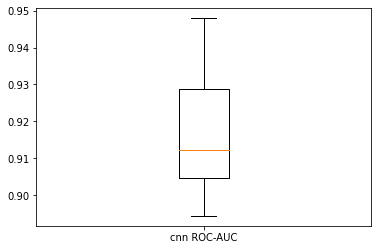

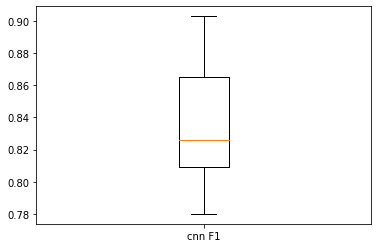

In [39]:
label1 = ["cnn Accuracy"]
label2 = ["cnn Cohen Kappa"]
label3 = ["cnn ROC-AUC"]
label4 = ["cnn F1"]
box_plot_accuracy_data = [ten_fold_cnn_accuracy]
box_plot_cohen_kappa_data = [ten_fold_cnn_cohen_kappa]
box_plot_roc_auc_data = [ten_fold_cnn_roc_auc]
box_plot_f1_score_data = [ten_fold_cnn_f1]

plt.boxplot(box_plot_accuracy_data, labels=label1)
plt.show()

plt.boxplot(box_plot_cohen_kappa_data, labels=label2)
plt.show()

plt.boxplot(box_plot_roc_auc_data, labels=label3)
plt.show()

plt.boxplot(box_plot_f1_score_data, labels=label4)
plt.show()


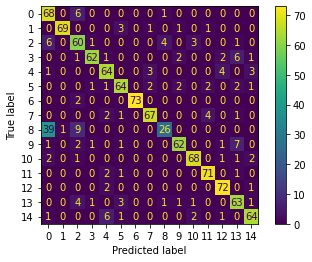

In [33]:
# confusion matrix
classes_of_classifier = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
cm = confusion_matrix(overall_ytest, overall_ypred_cnn, labels=classes_of_classifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_of_classifier)
disp.plot()
plt.show() 

In [35]:
# roc auc score and graphs
def roc_auc_score_and_graph(ytest, ypred_cnn):
    
    # Transform multi-class labels to binary labels
    lb = LabelBinarizer()
    lb.fit(ytest)
    ytest = lb.transform(ytest)
    ypred_cnn = lb.transform(ypred_cnn)
    
    plt.figure(figsize = (12, 8))

    for (i, label) in enumerate(leafNames):
        fpr, tpr, thresholds = roc_curve(ytest[:,i], ypred_cnn[:,i])
        plt.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))

    print(roc_auc_score(ytest, ypred_cnn, average="weighted", multi_class="ovr"))
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

0.9180952380952383


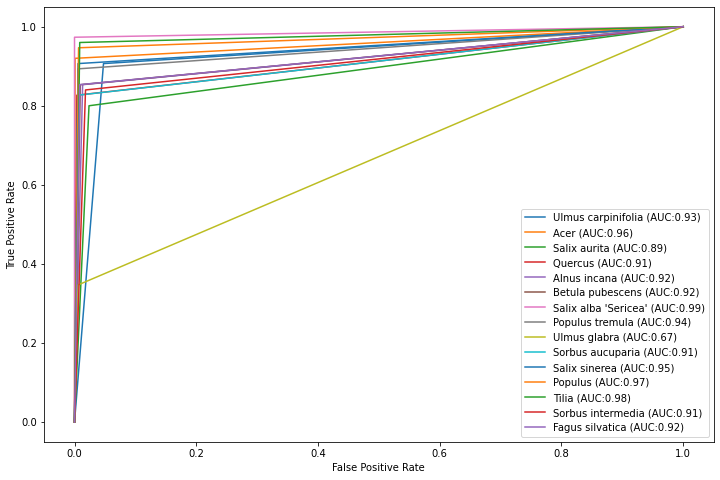

In [36]:
roc_auc_score_and_graph(overall_ytest, overall_ypred_cnn)